## Introduction

We show here an implementation of Smits (1999) reflectance recovery method.

The spectral power distributions figures compare both the original spectral power distribution (red function) and the recovered one (green function).

The first colour patches pairs display the current original colour and its computed value with the recovered spectral power distribution and the same illuminant.

> Note: There is a slight mismatch between the original colour and its computed value with the recovered spectral power distribution. We are unable yet to say if it's the result of an implementation error or something else. The perceptual difference is low and should not be an issue to judge the overall efficiency of the method.

The following colour patches pairs compare the colour as it should be if computed using the original spectral power distribution and the current illuminant with the recovered spectral power distribution and the same illuminant.

If you are interested at taking a look at the relative spectral power distribution of the illuminants in use, you can consult the following [IPython Notebook](http://nbviewer.ipython.org/github/colour-science/colour-ipython/blob/master/notebooks/colorimetry/illuminants.ipynb).

In [1]:
%matplotlib inline

*                                                                             *
*   "dark skin" - Reflectance Recovery                                        *
*                                                                             *


/colour-science/colour/colour/utilities/verbose.py:125: UserWarning: "(380.0, 720.0, 37.77777777777778)" shape could not be honored, using "(380.0, 720.0, 37.7777777778)"!
  warn(*args, **kwargs)


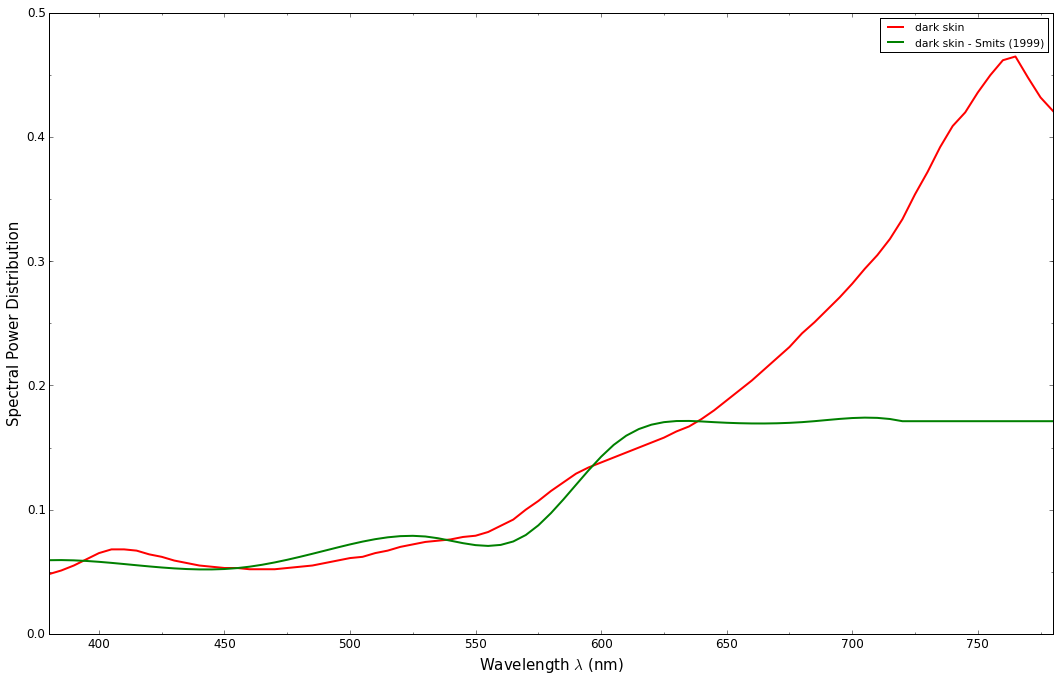

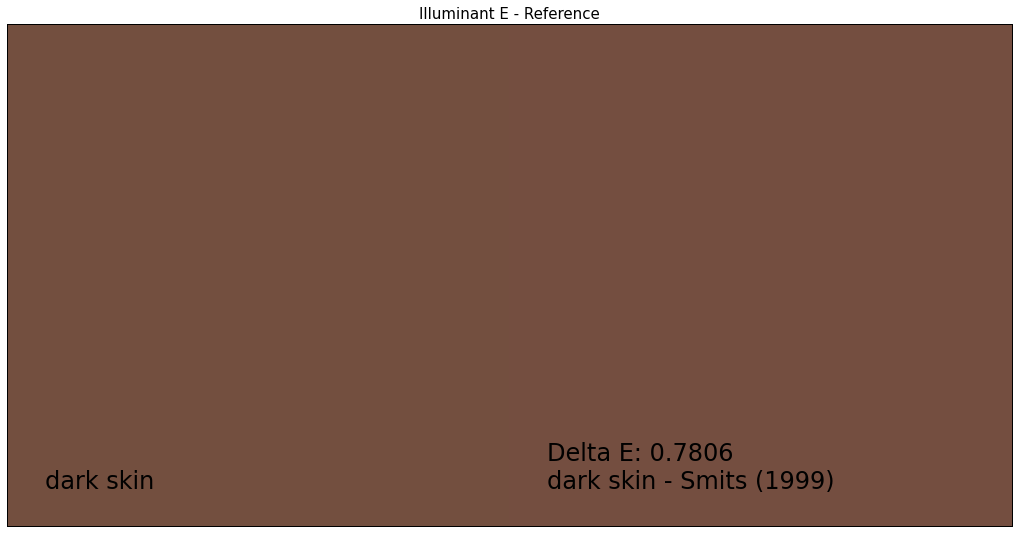

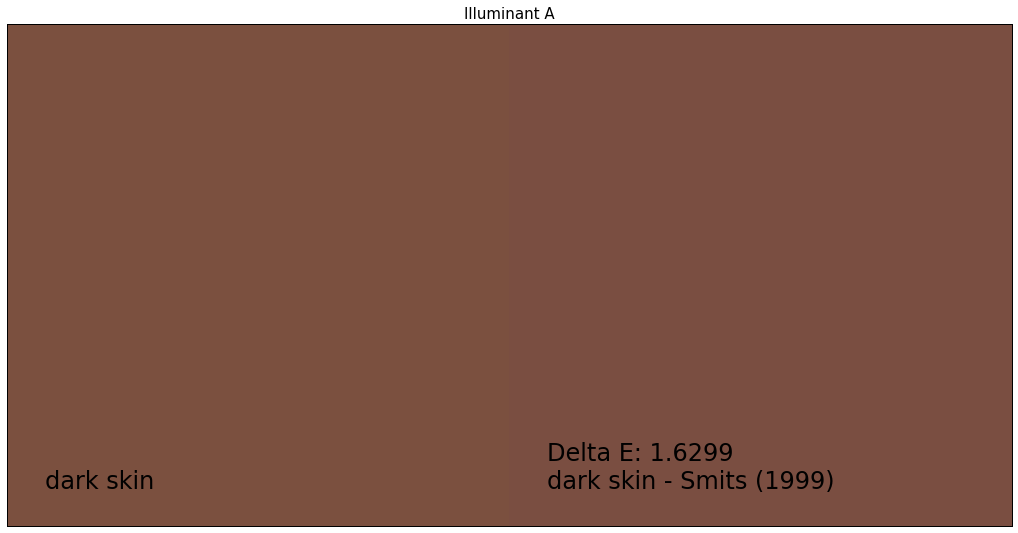

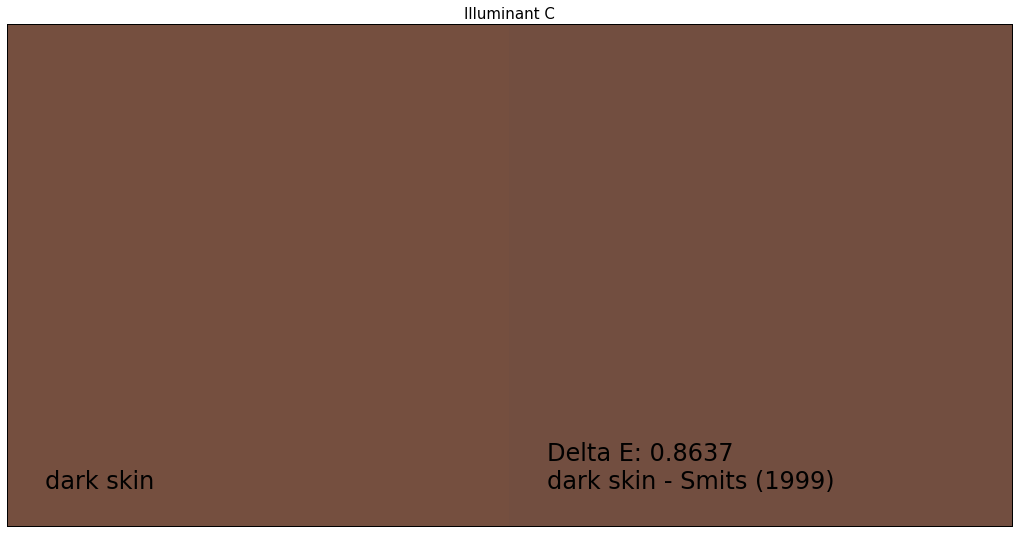

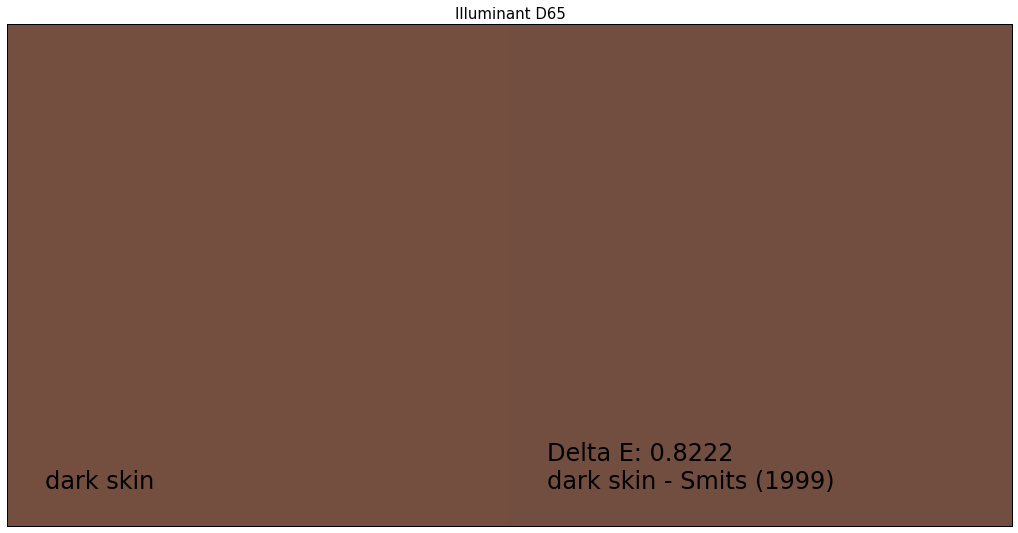

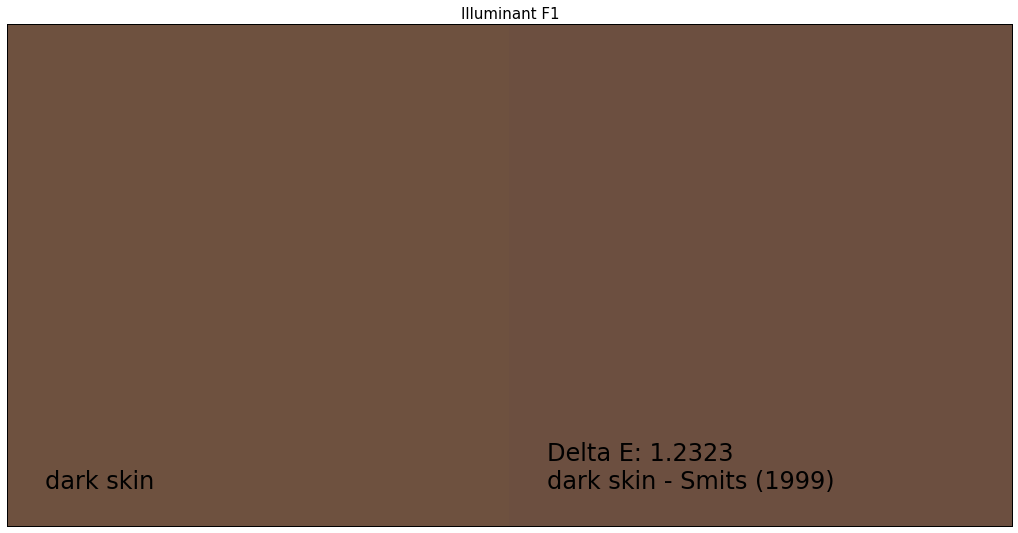

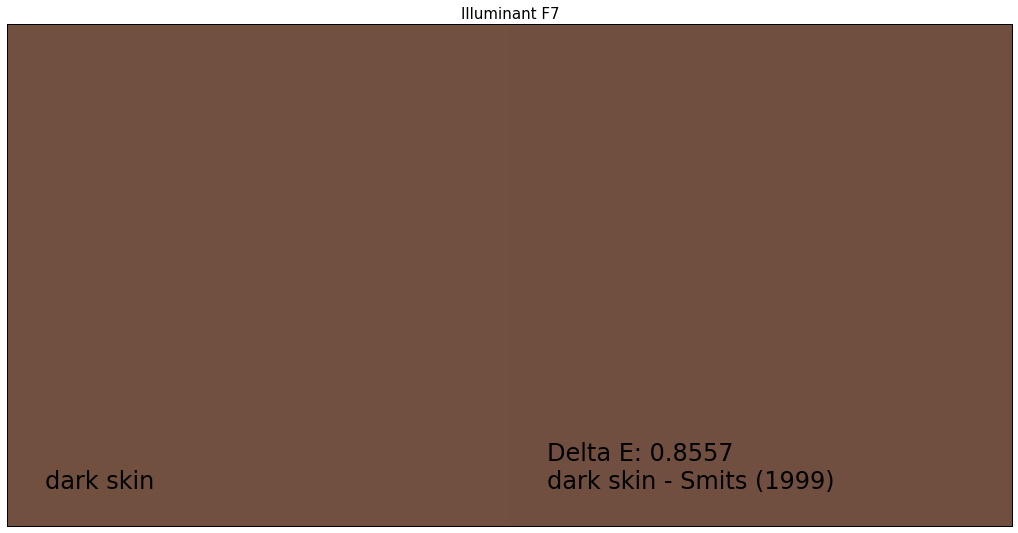

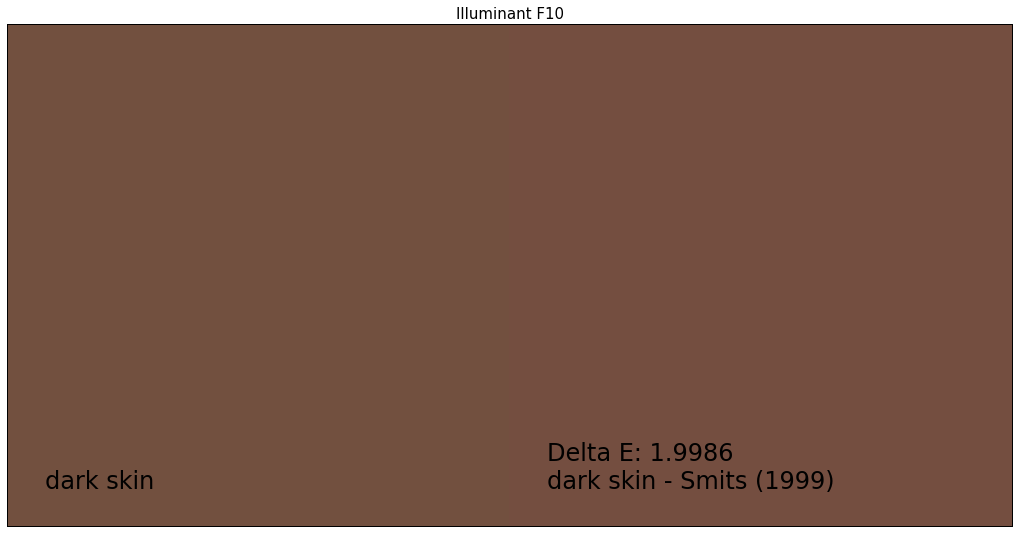

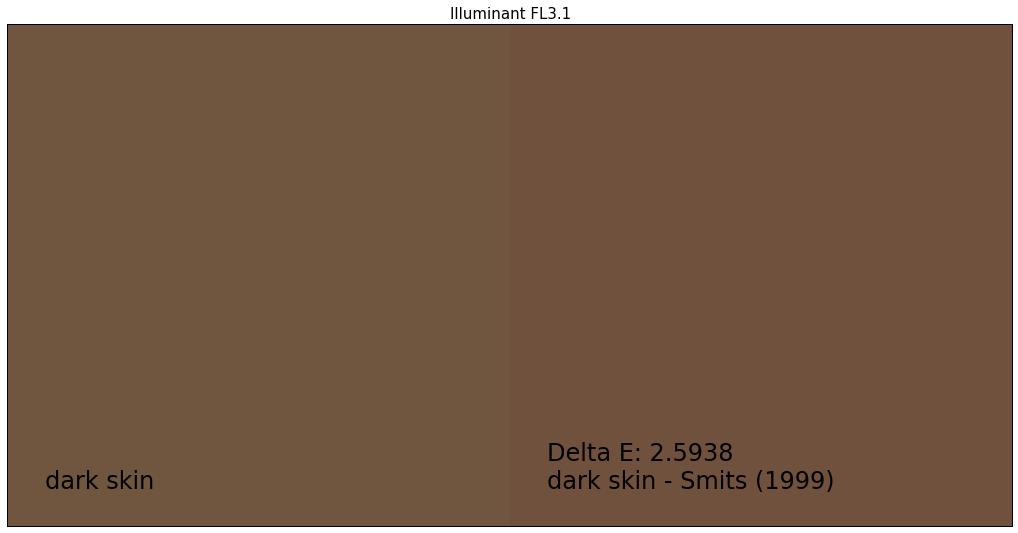

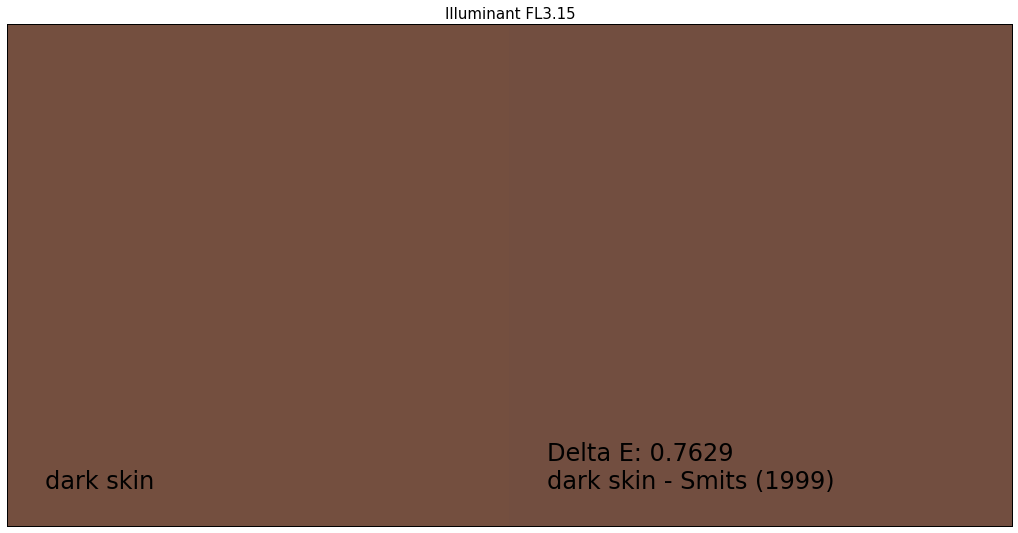

*                                                                             *
*   "light skin" - Reflectance Recovery                                       *
*                                                                             *


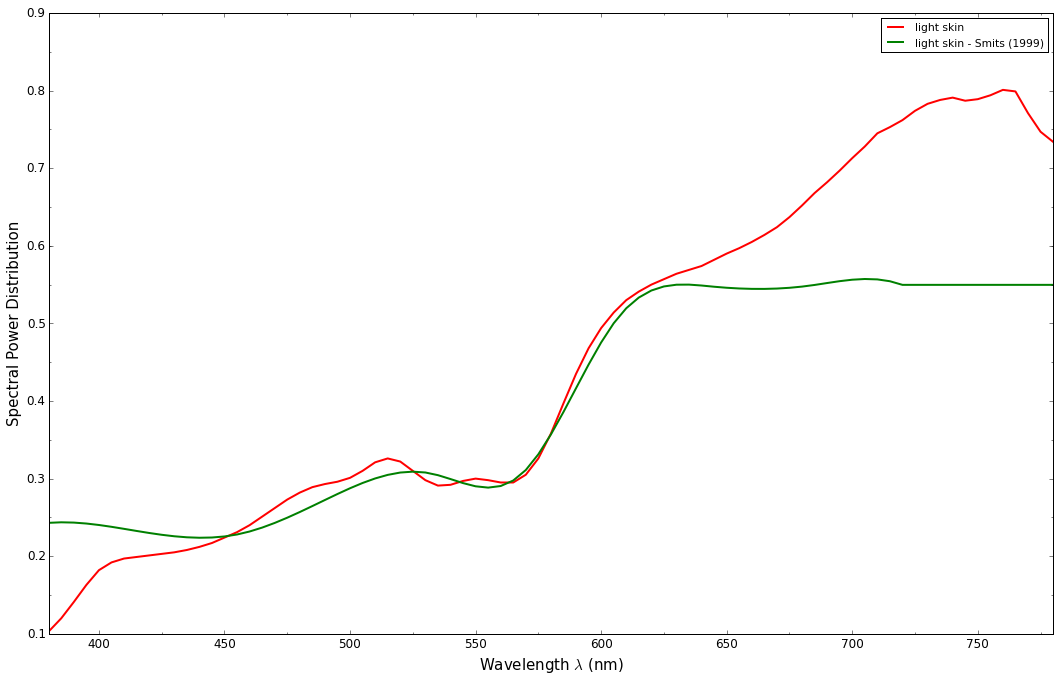

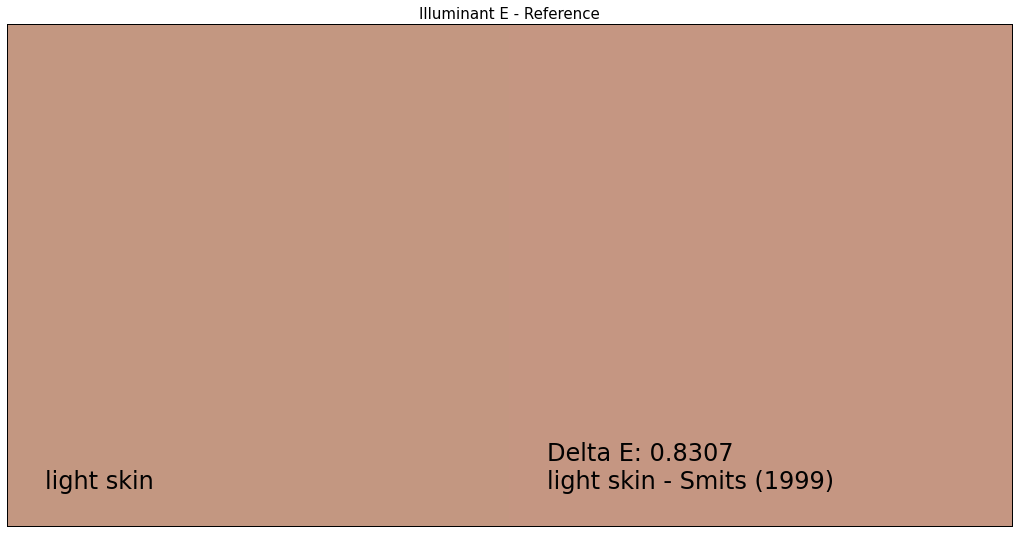

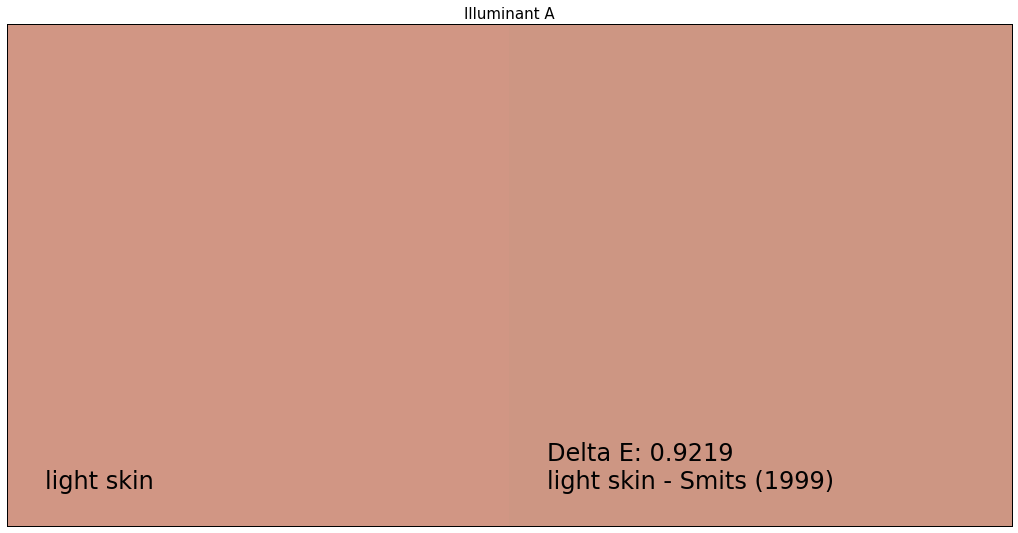

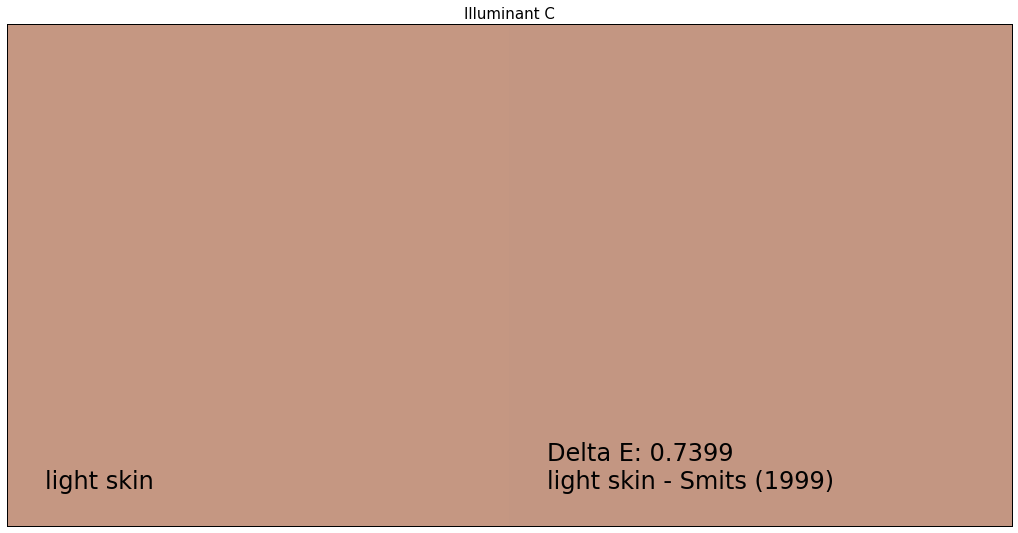

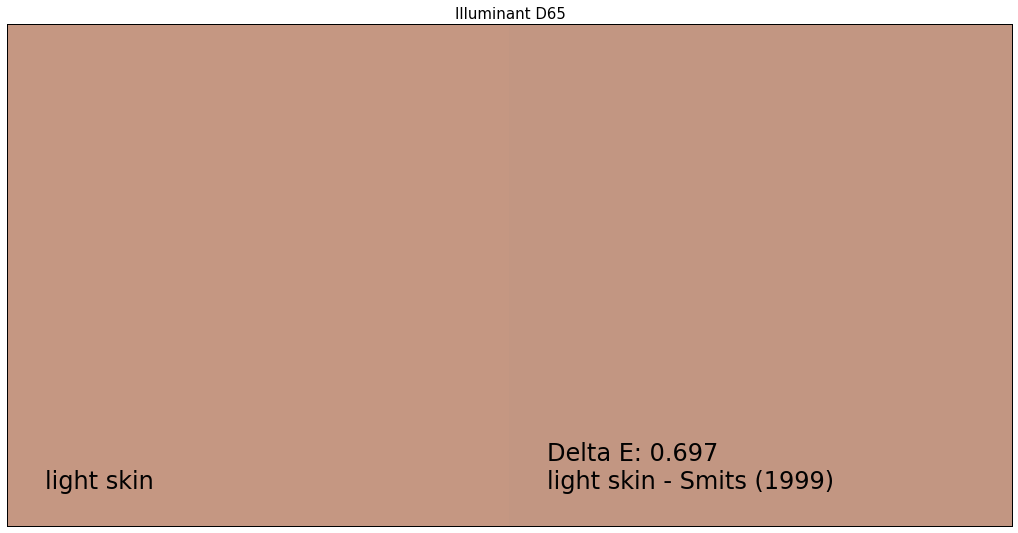

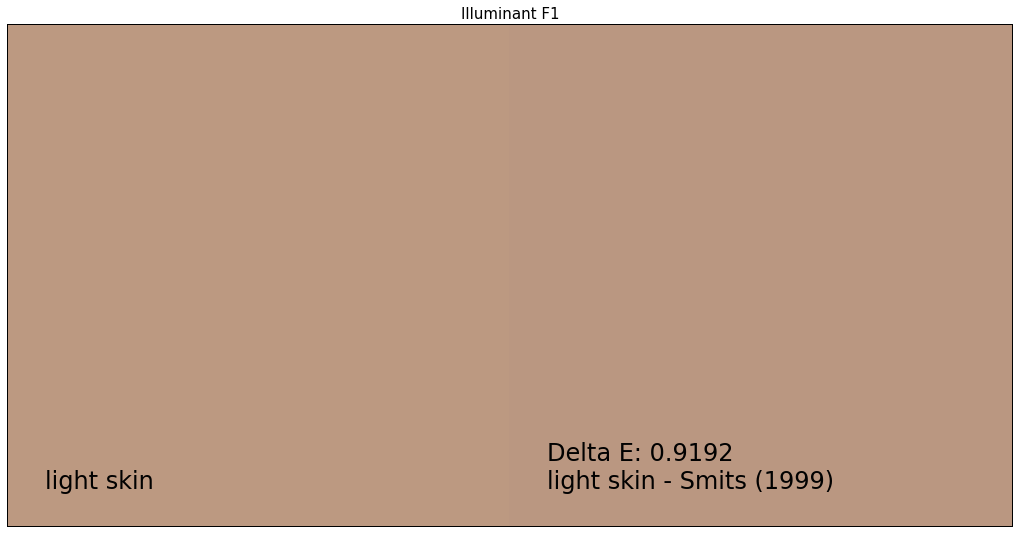

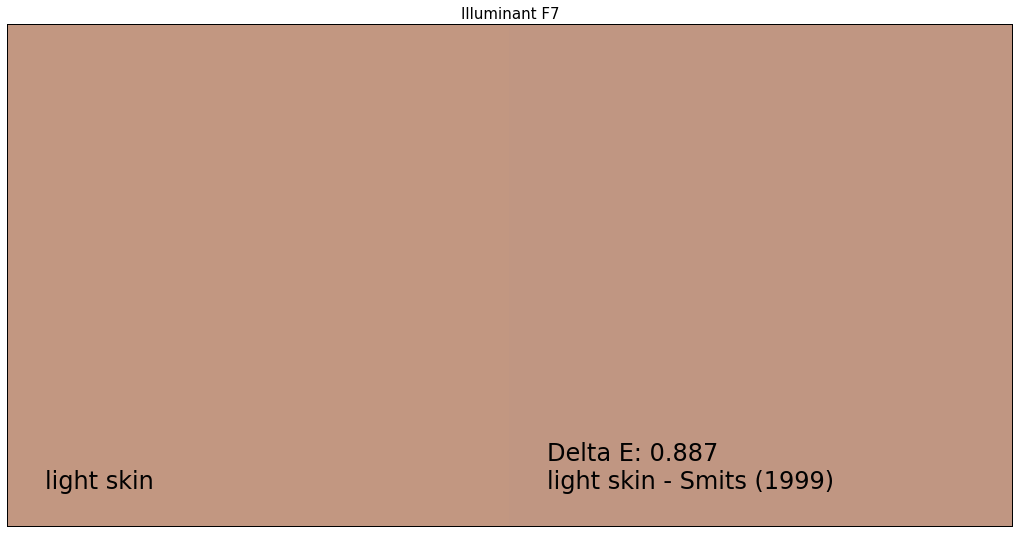

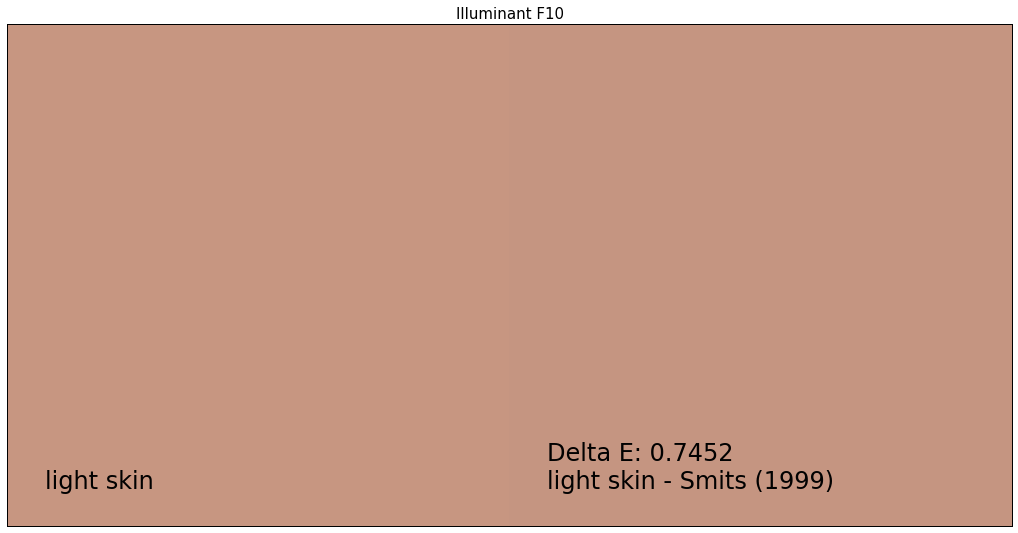

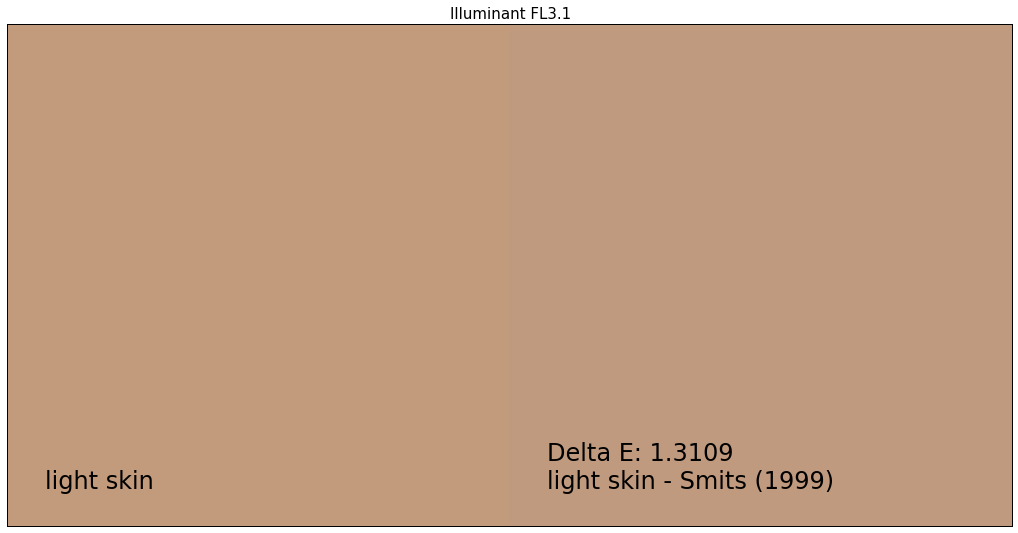

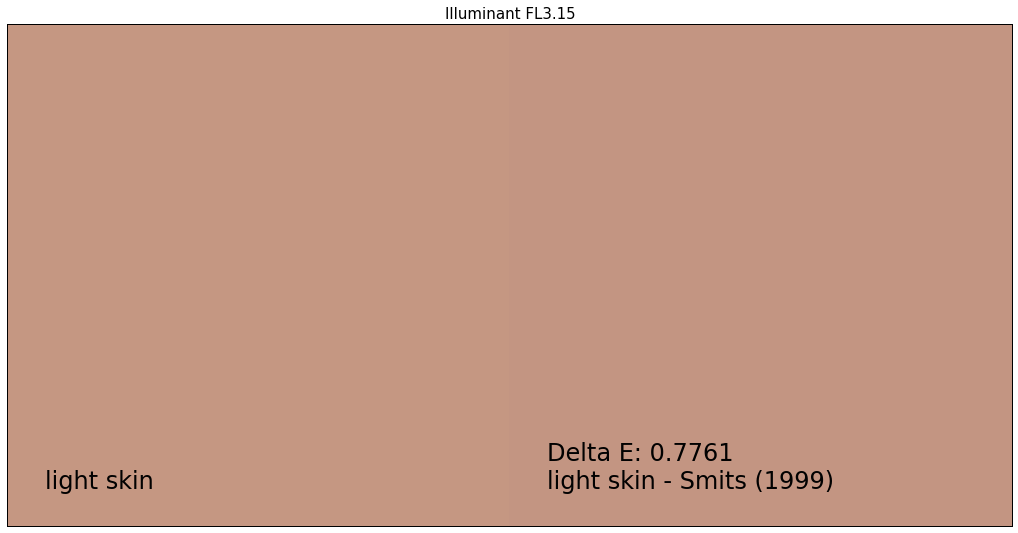

*                                                                             *
*   "blue sky" - Reflectance Recovery                                         *
*                                                                             *


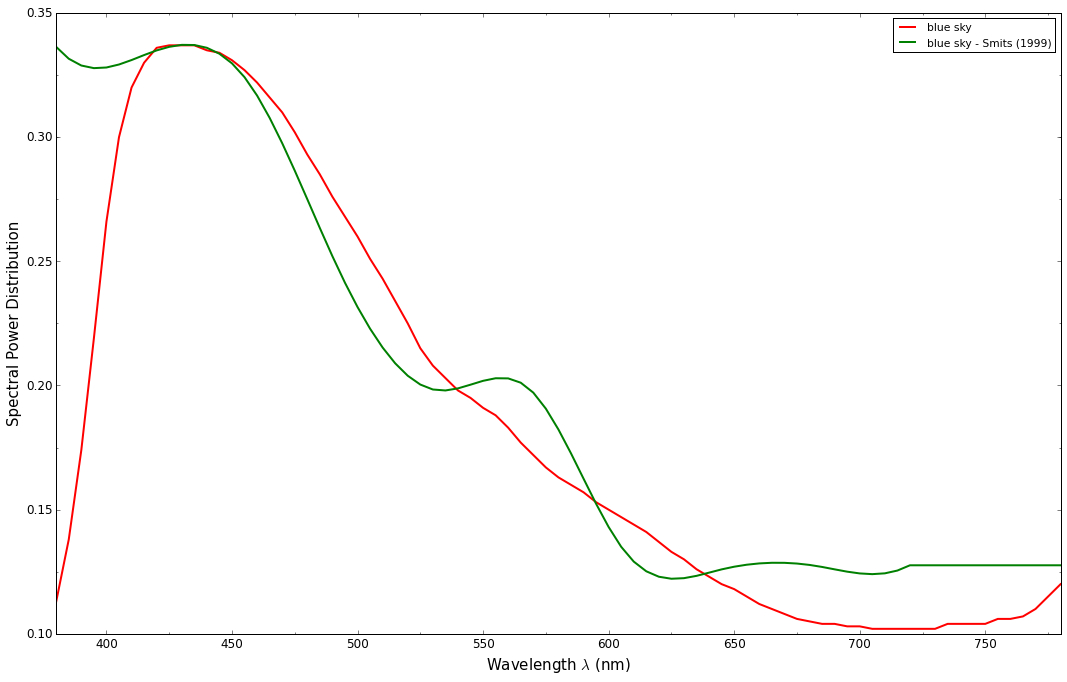

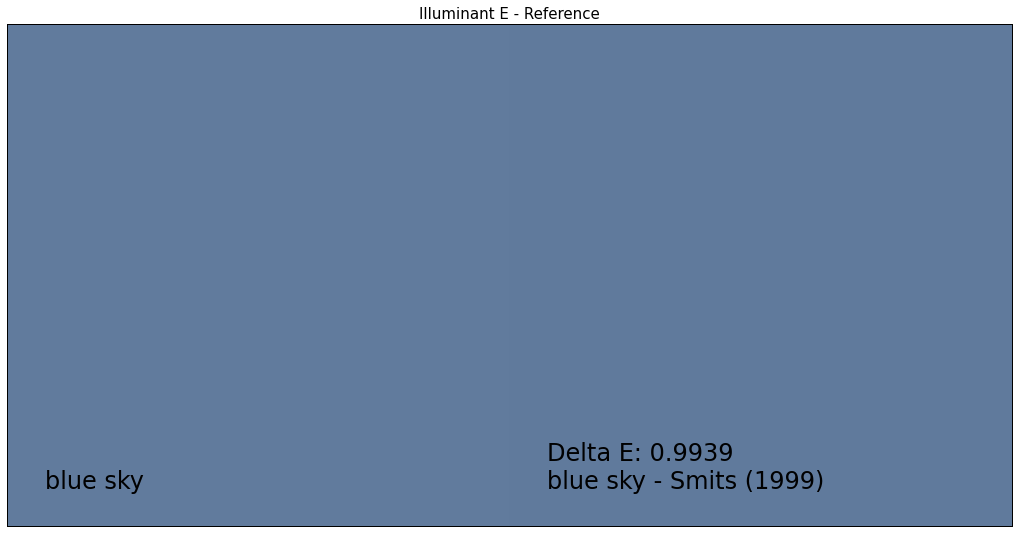

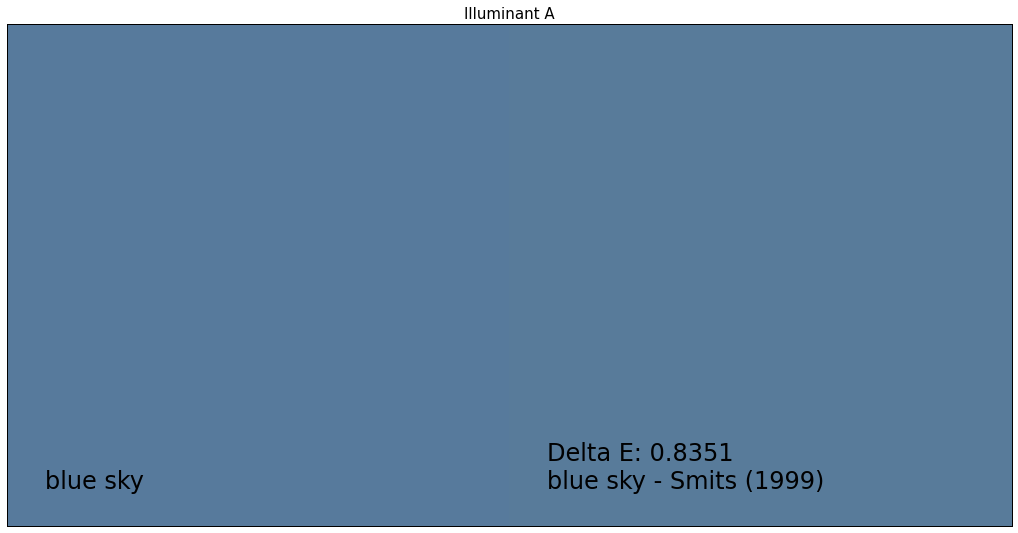

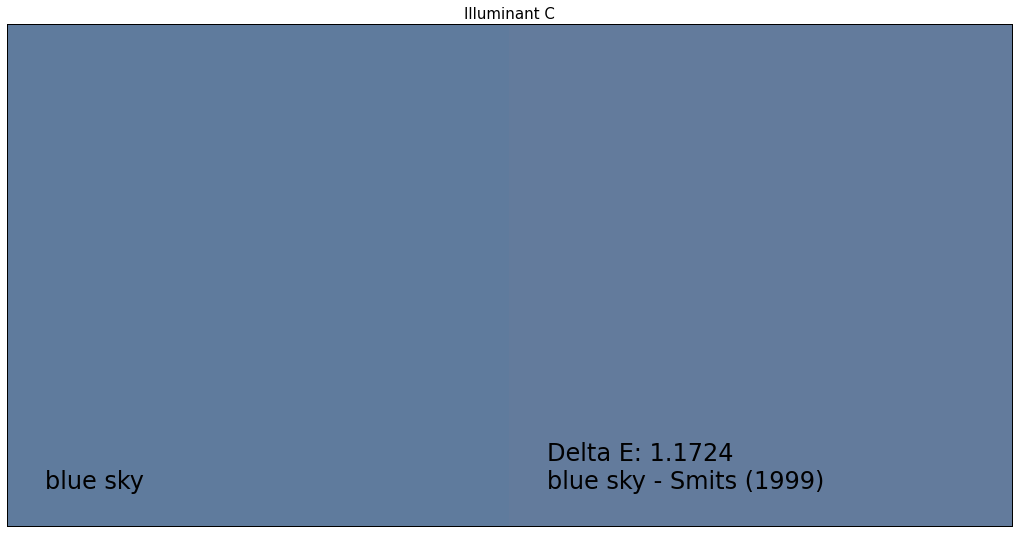

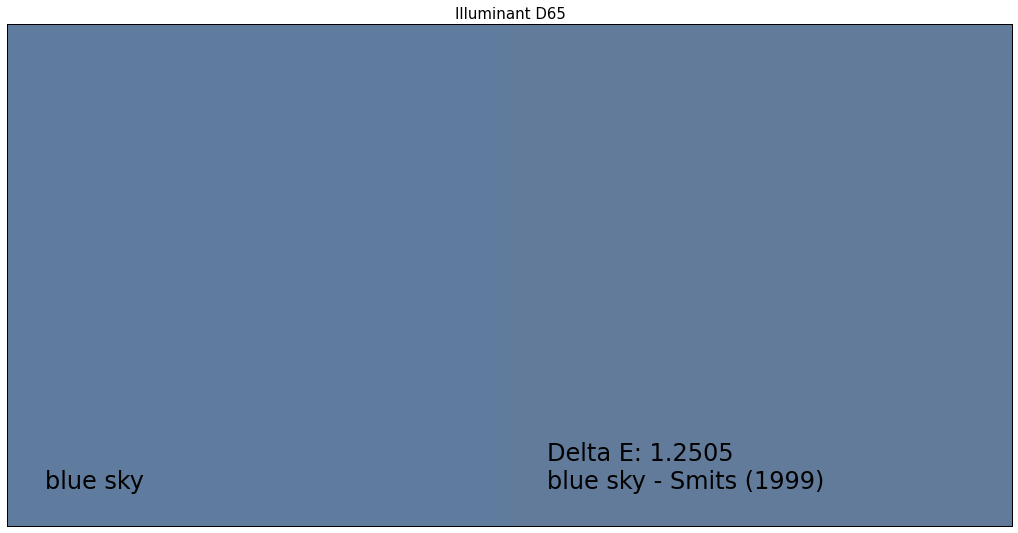

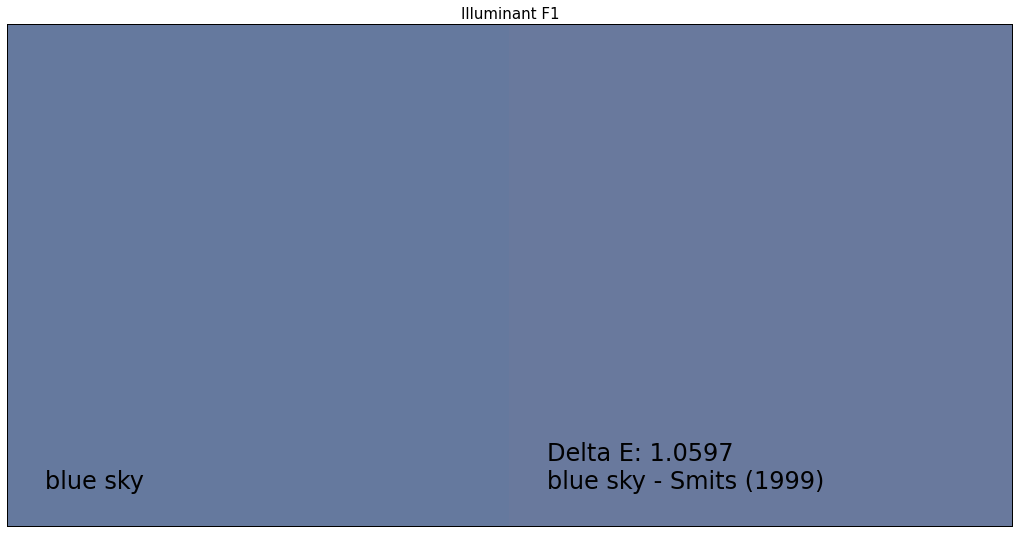

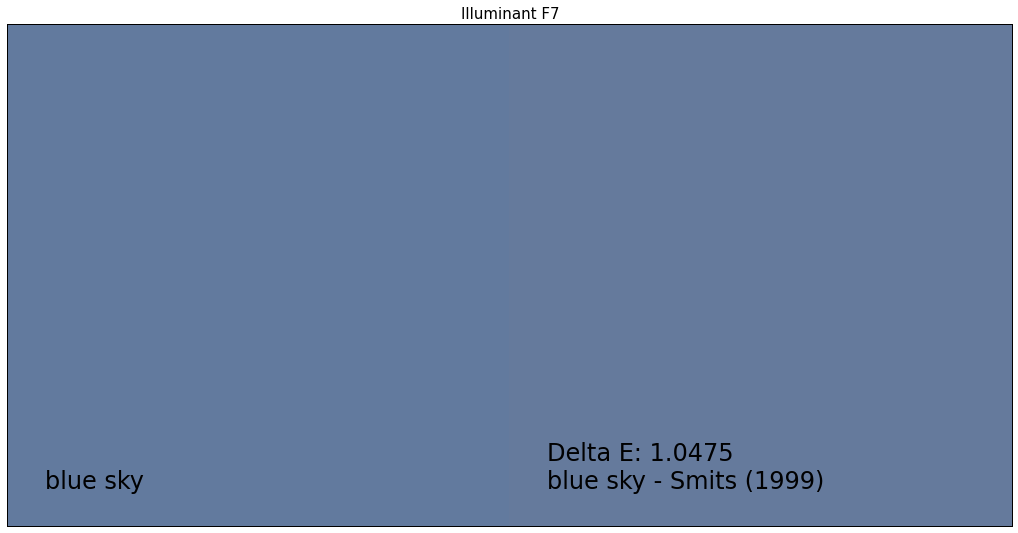

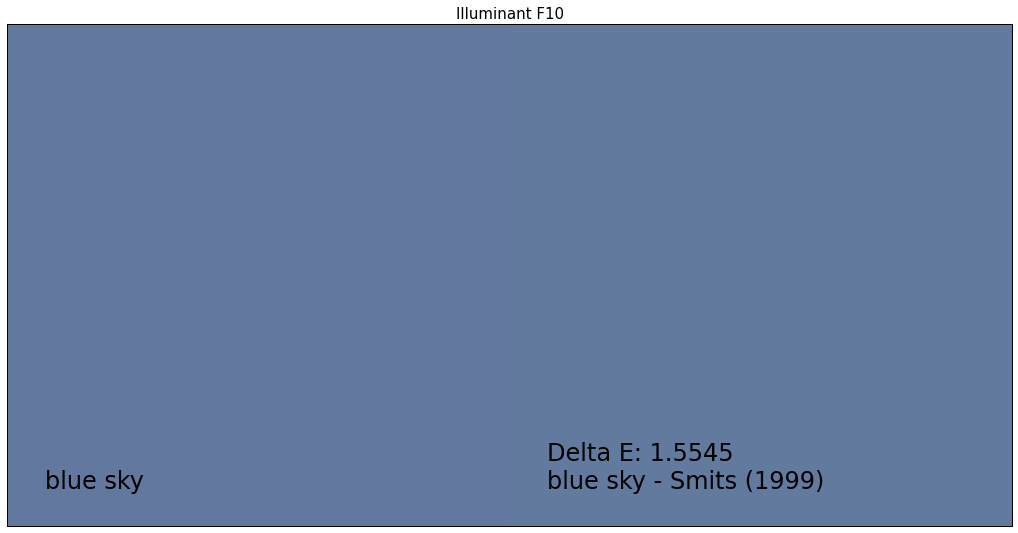

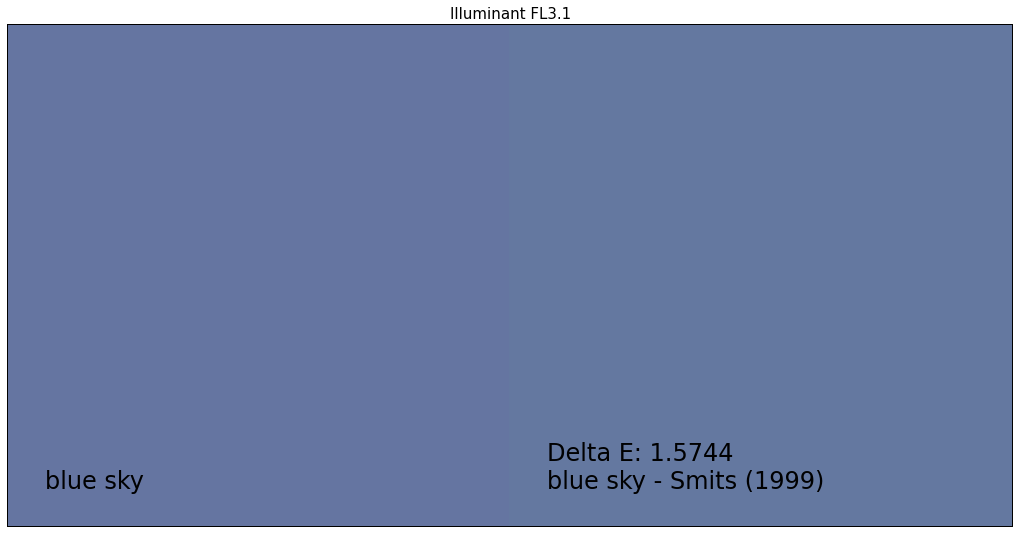

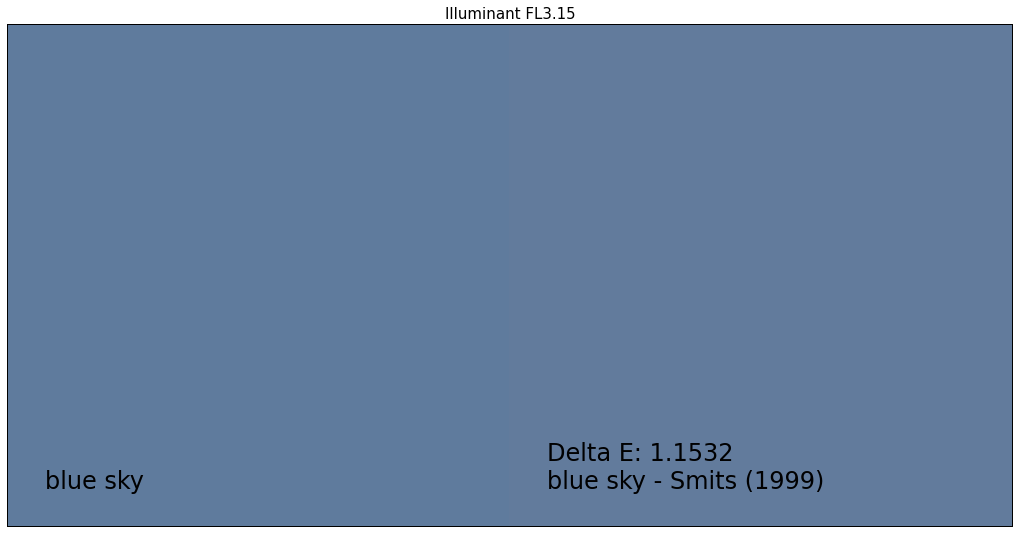

*                                                                             *
*   "foliage" - Reflectance Recovery                                          *
*                                                                             *


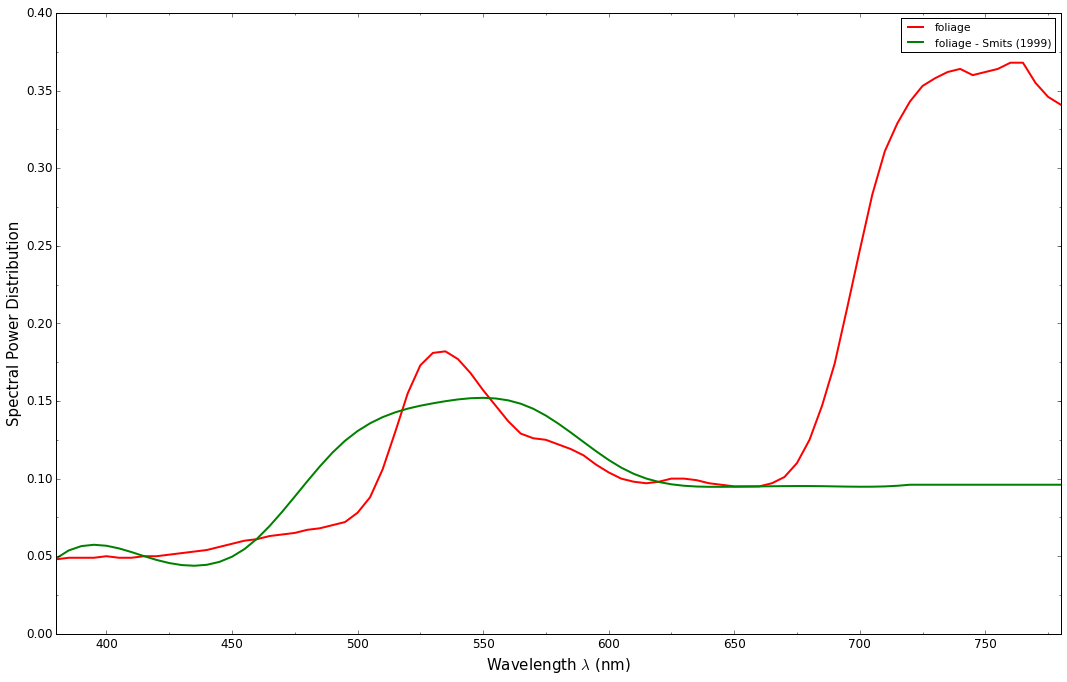

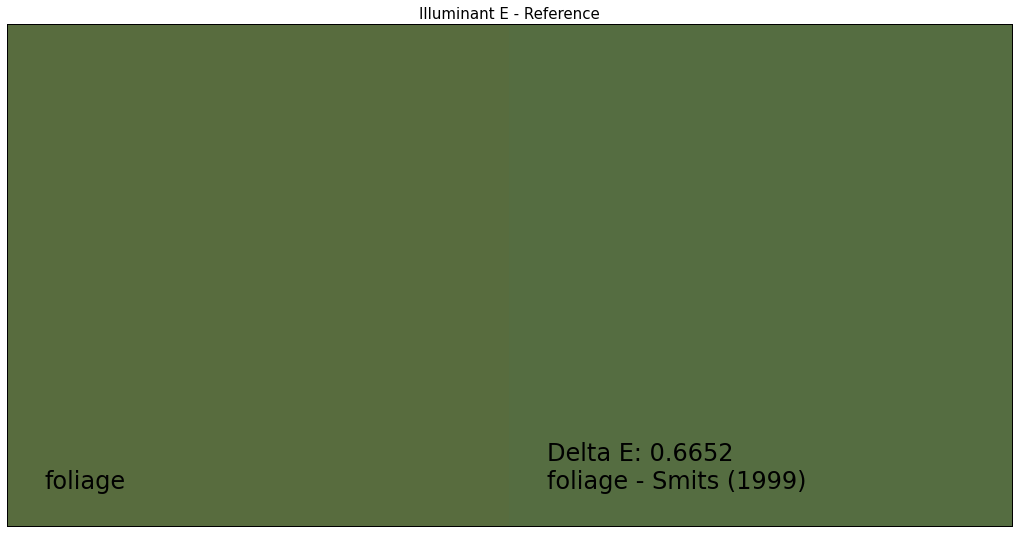

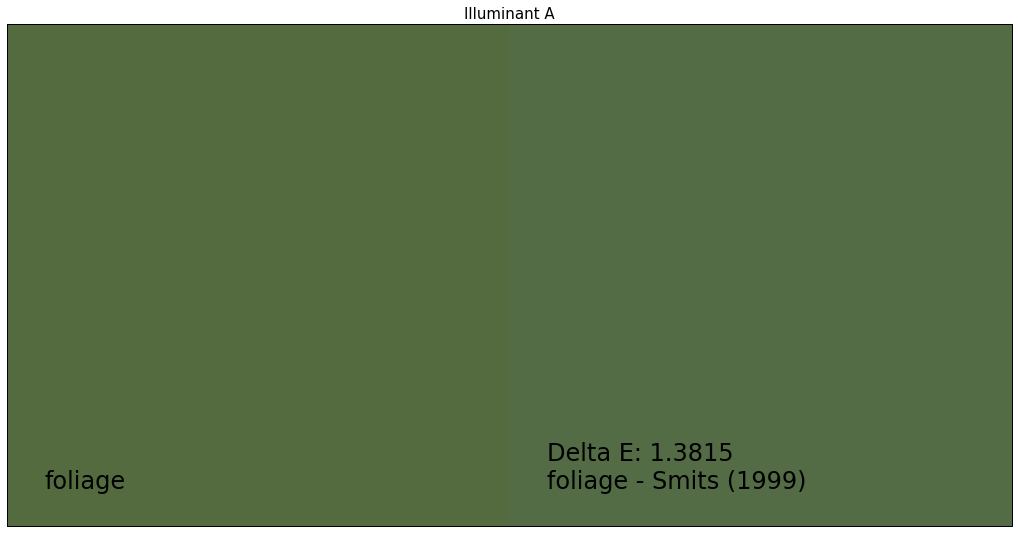

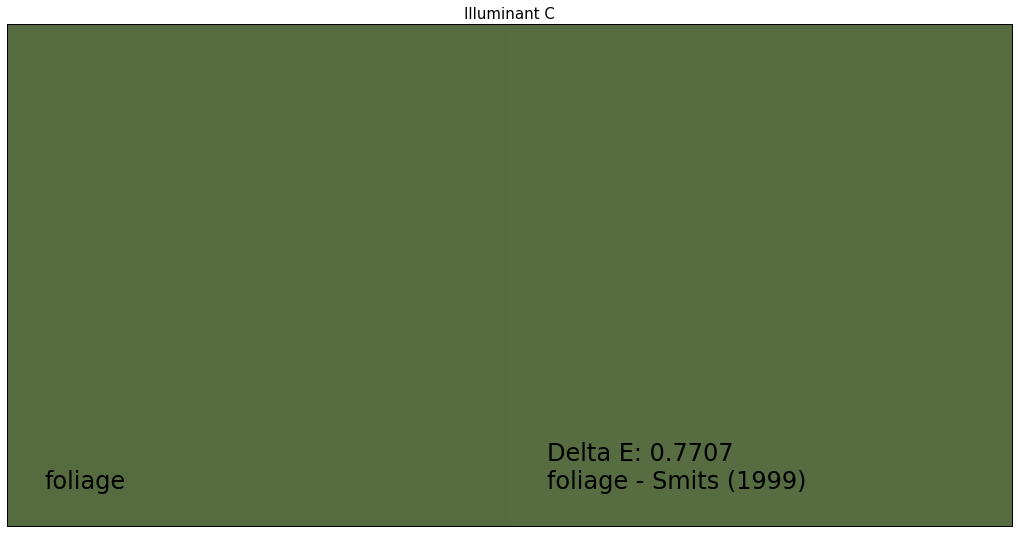

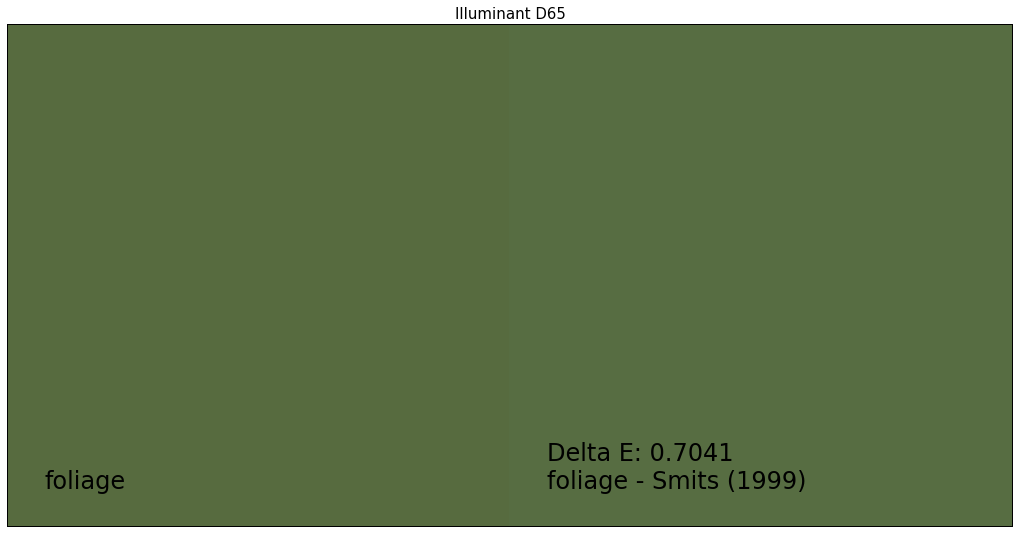

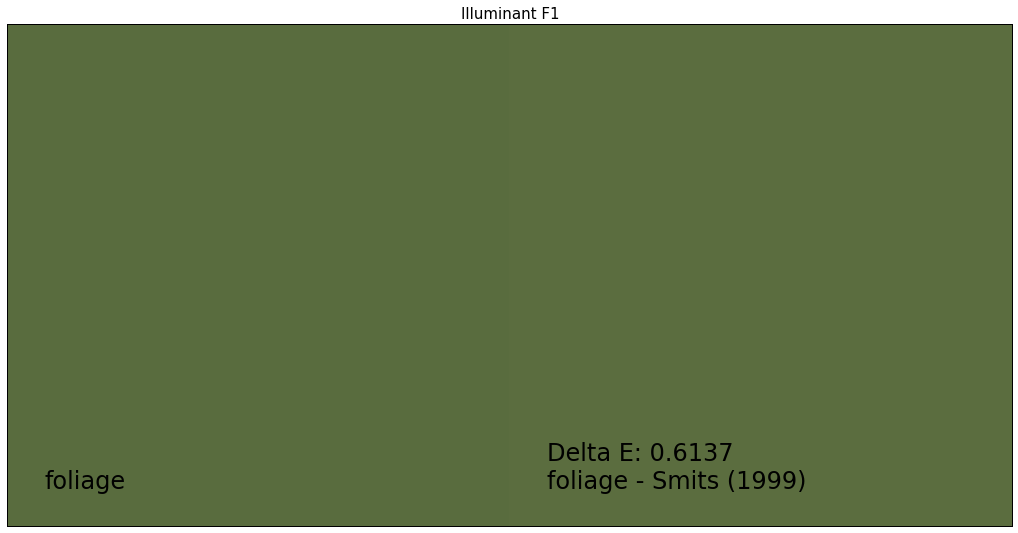

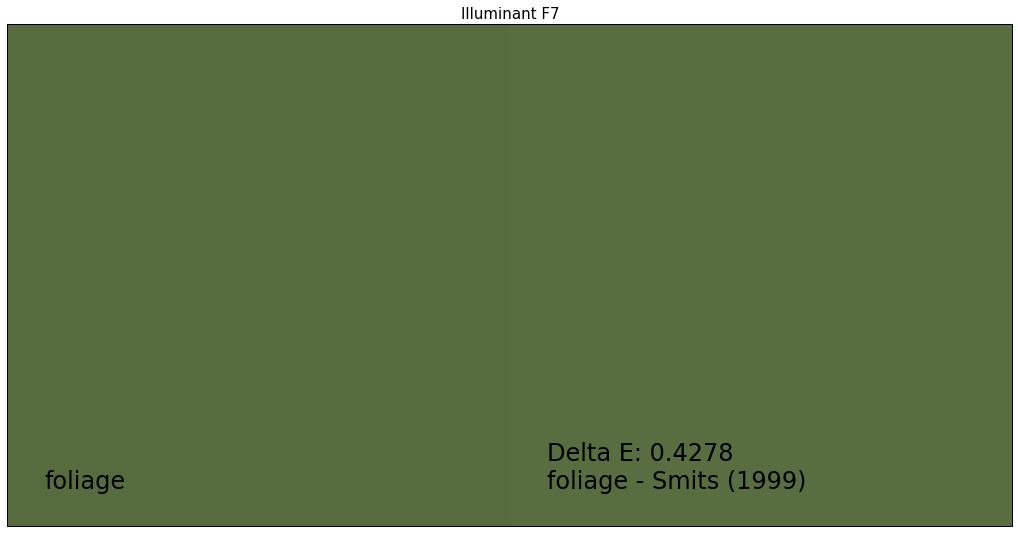

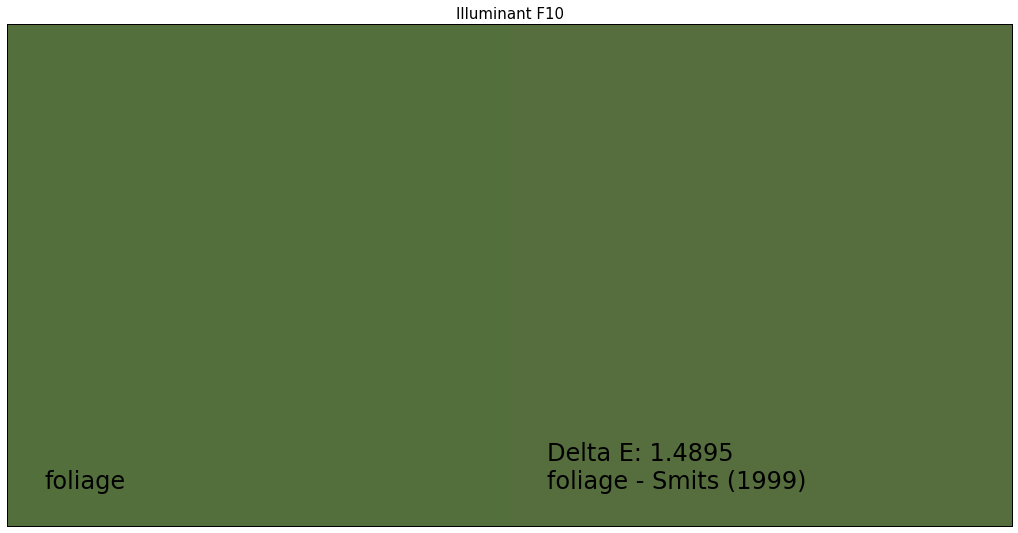

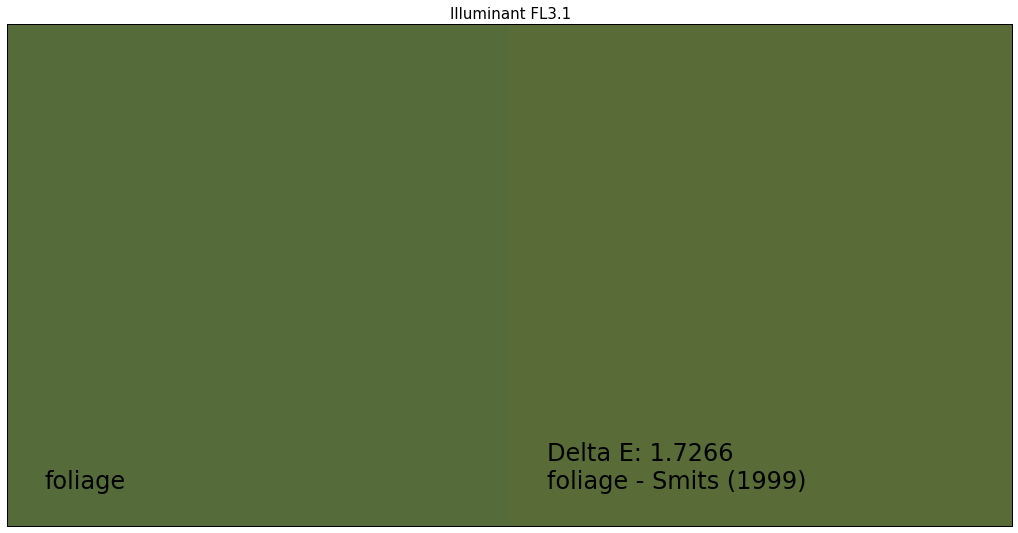

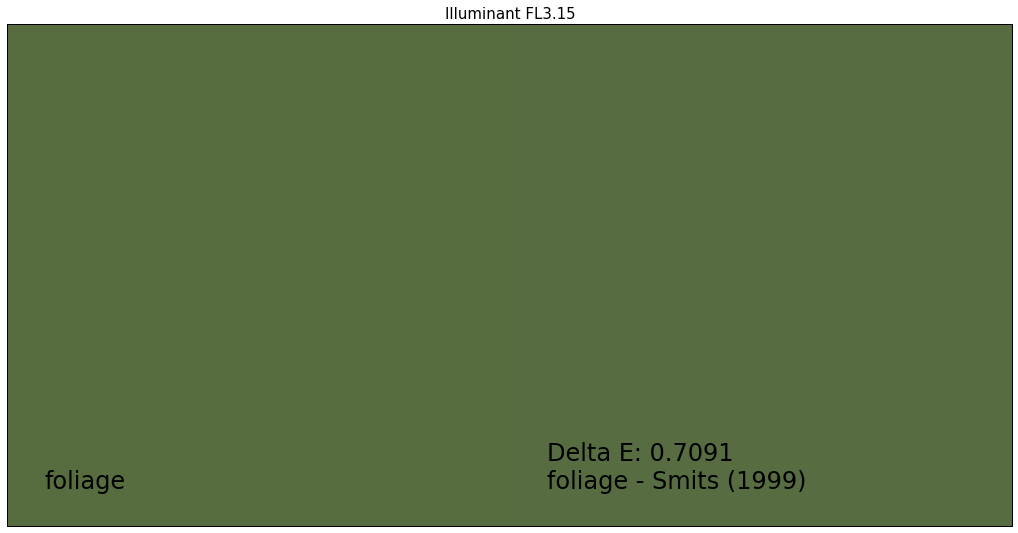

*                                                                             *
*   "blue flower" - Reflectance Recovery                                      *
*                                                                             *


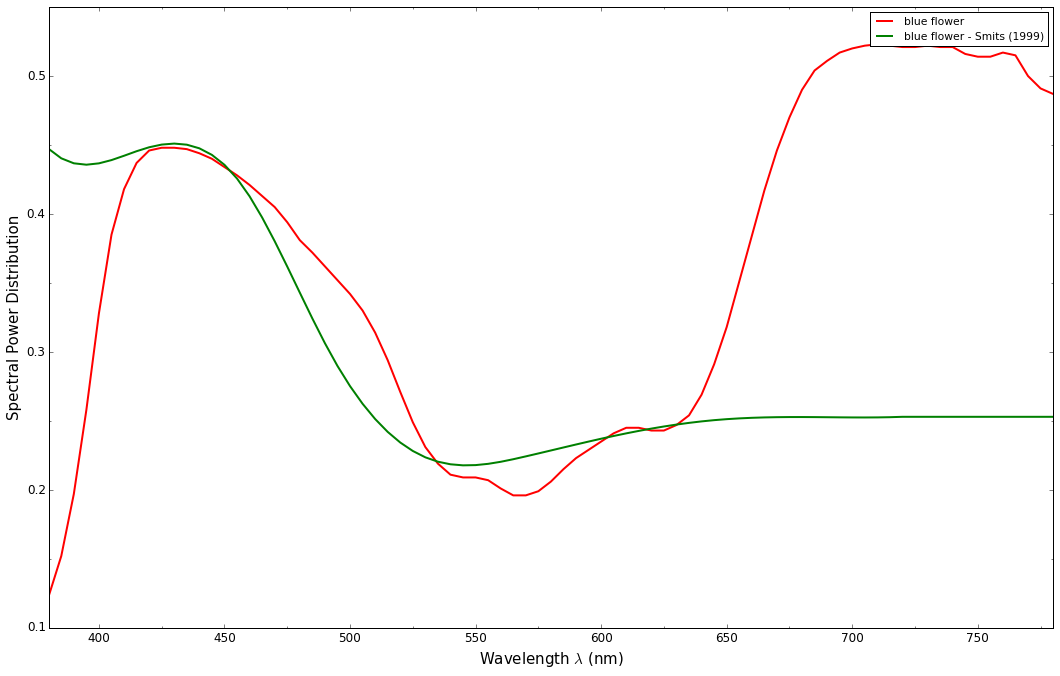

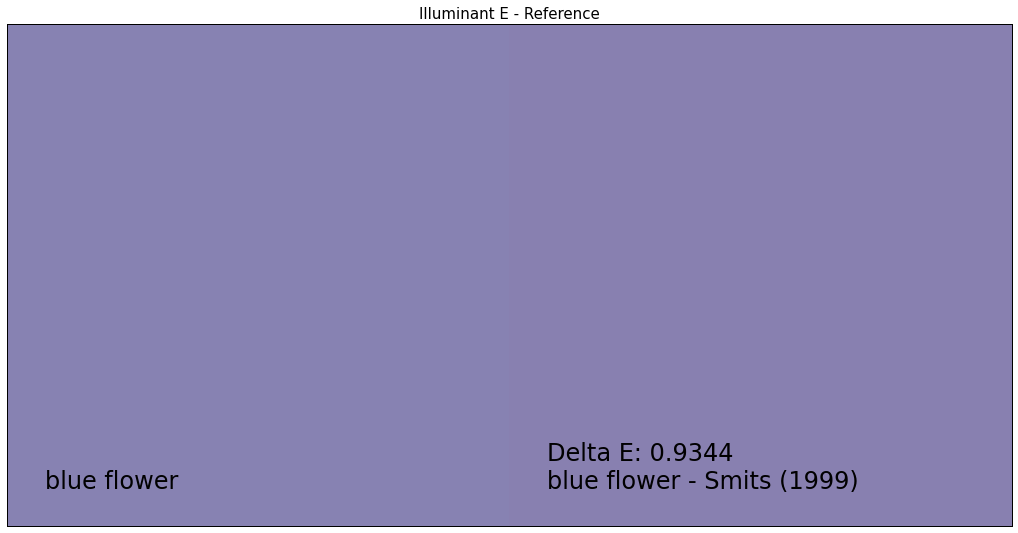

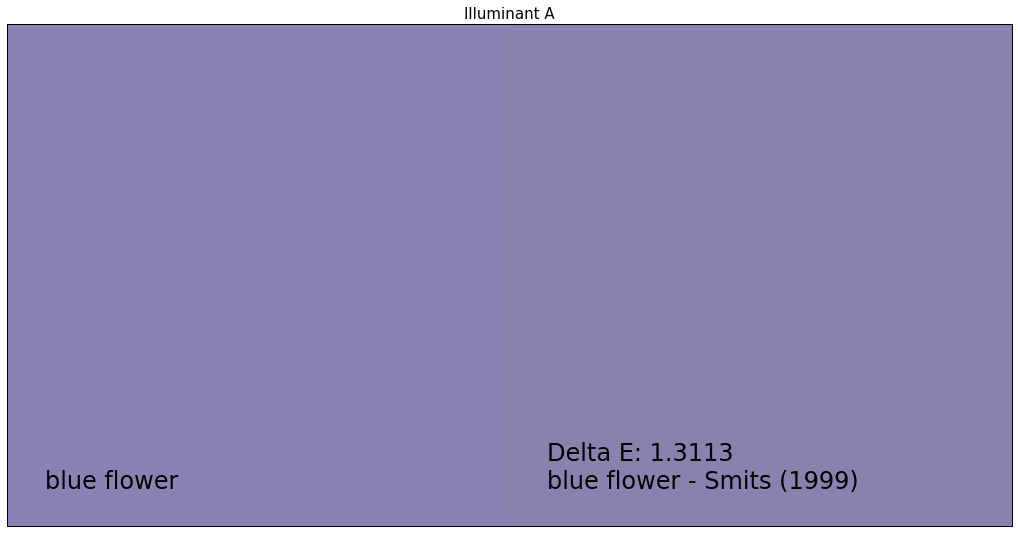

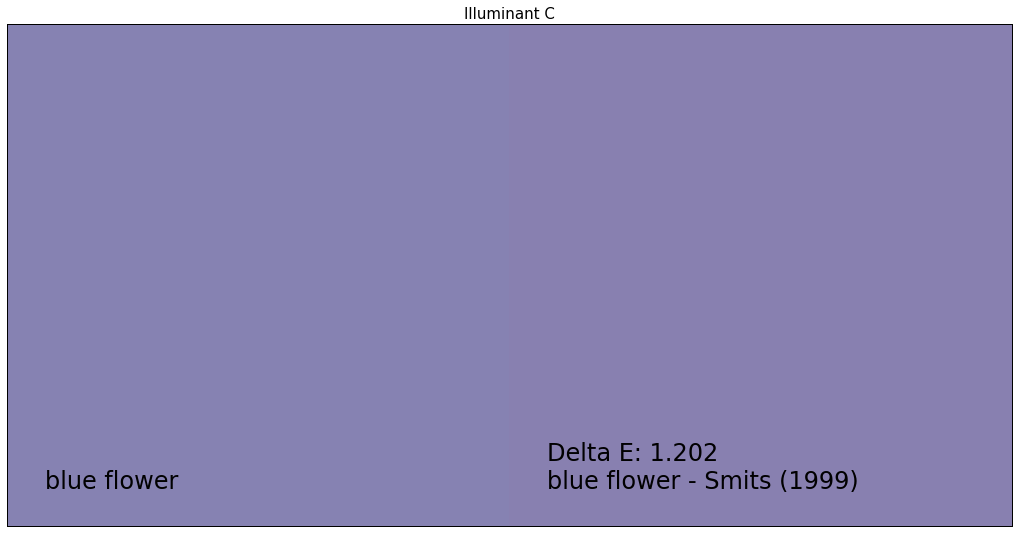

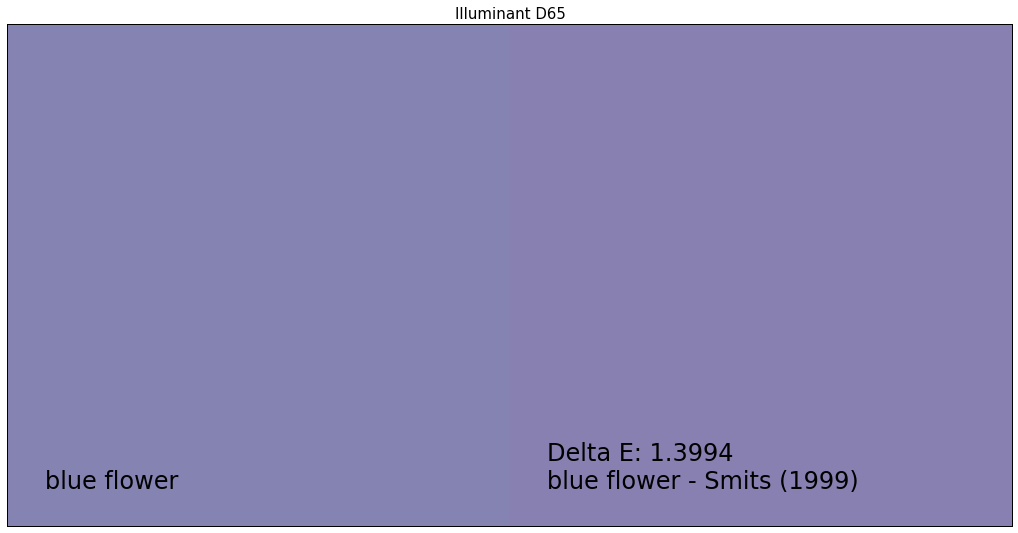

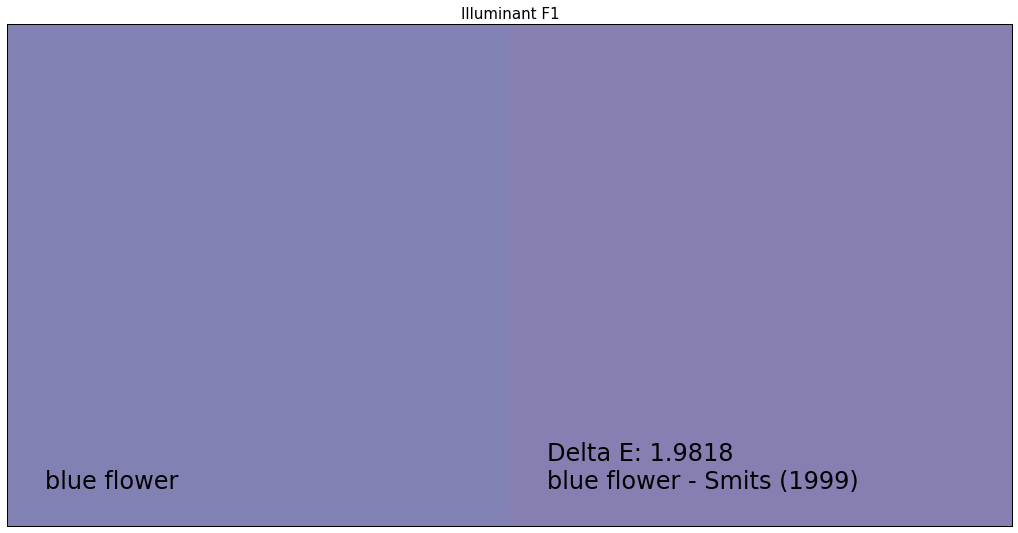

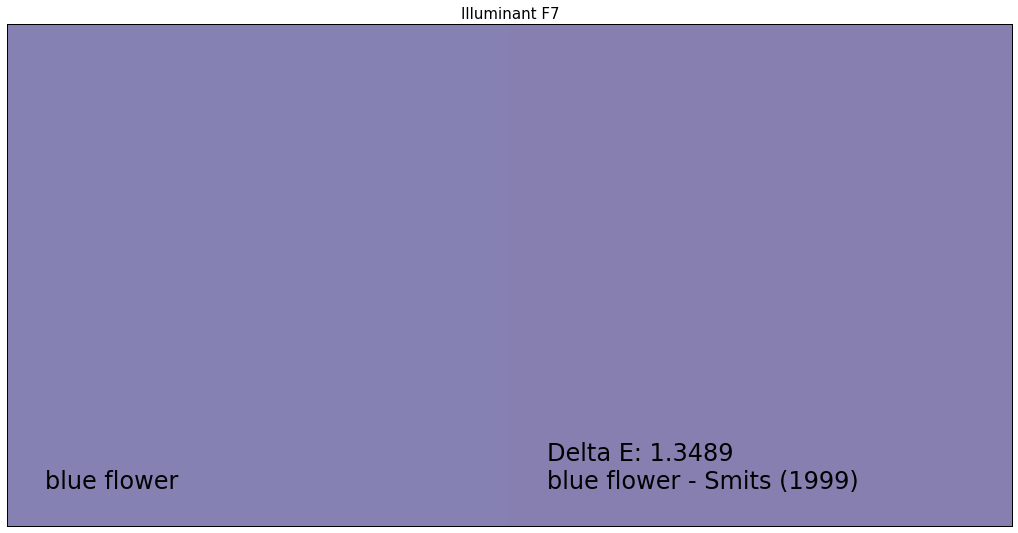

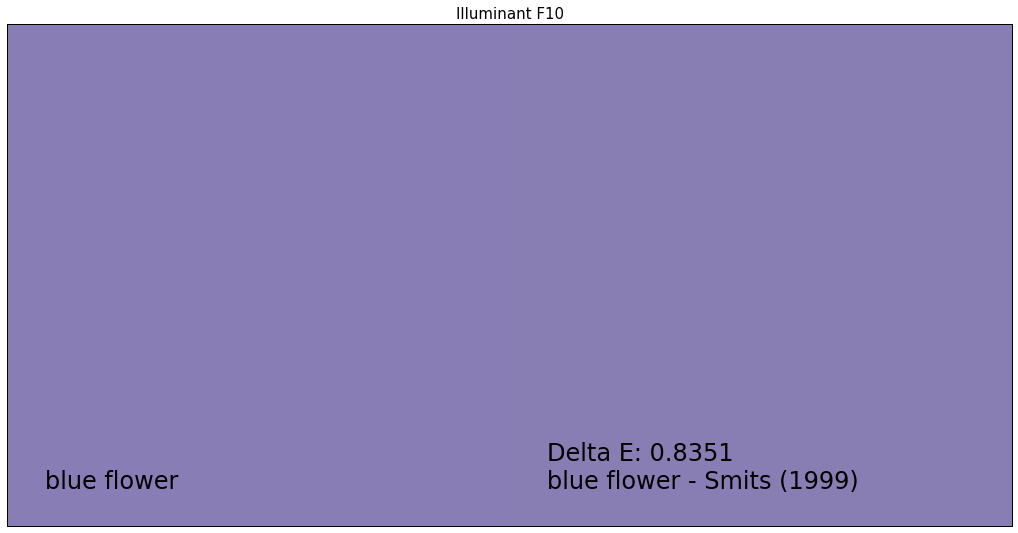

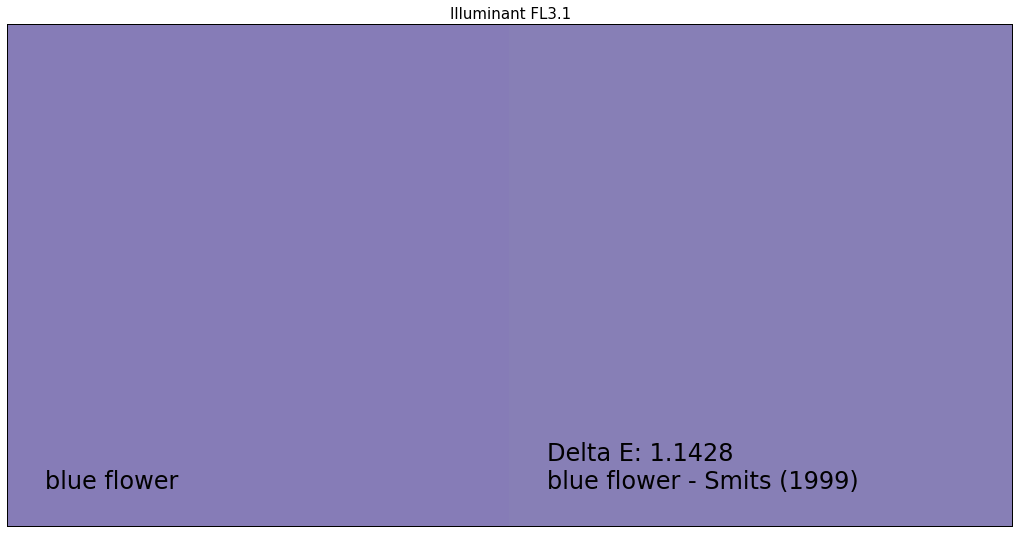

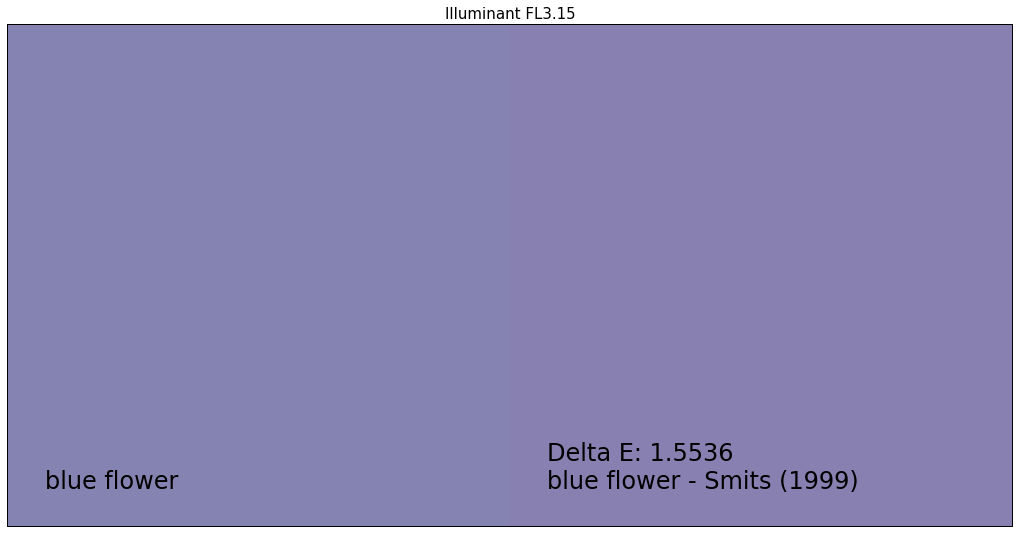

*                                                                             *
*   "bluish green" - Reflectance Recovery                                     *
*                                                                             *


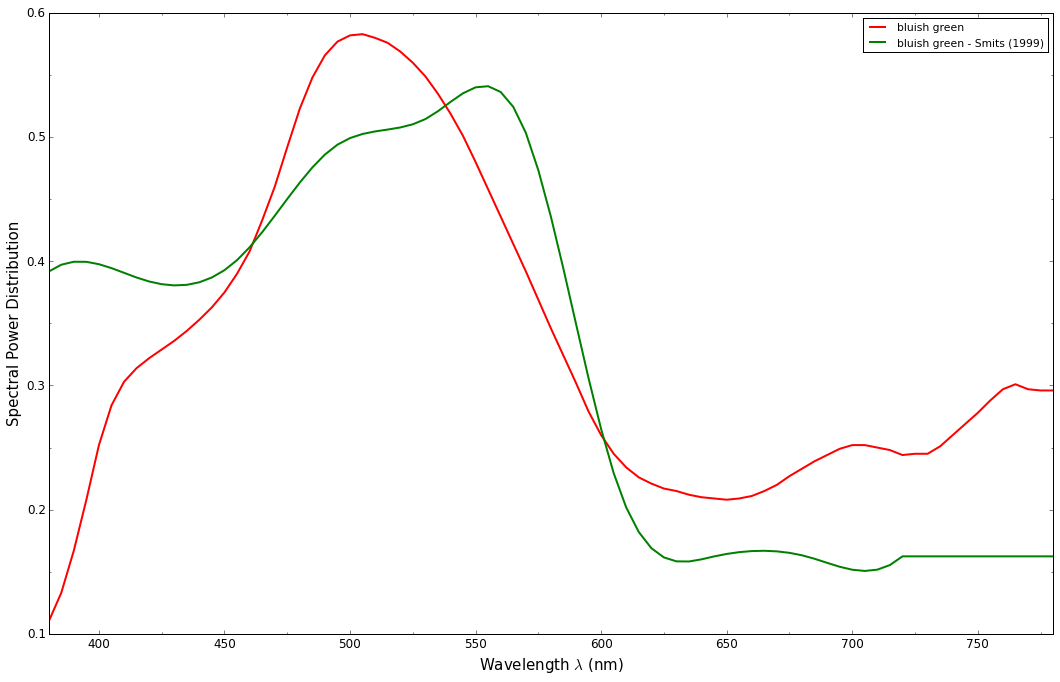

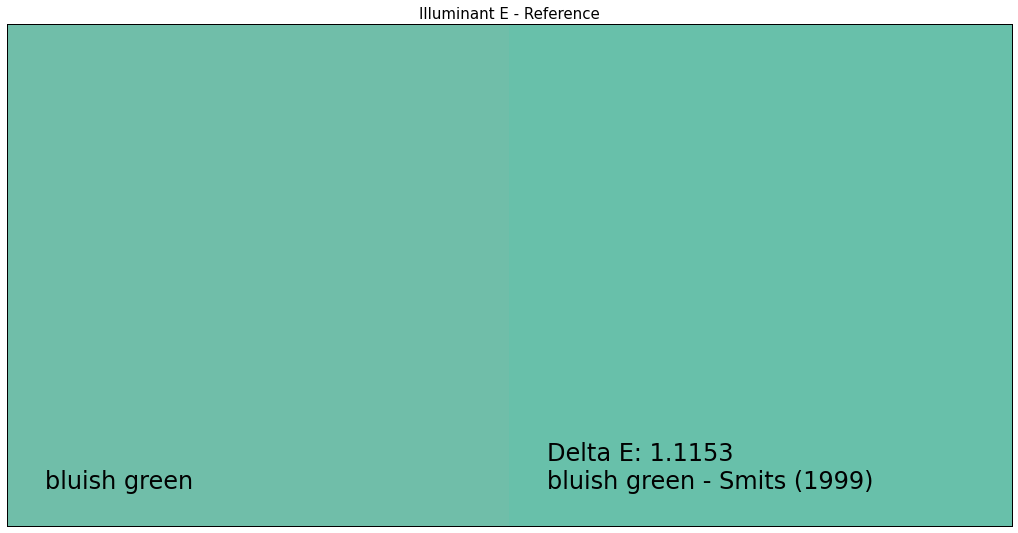

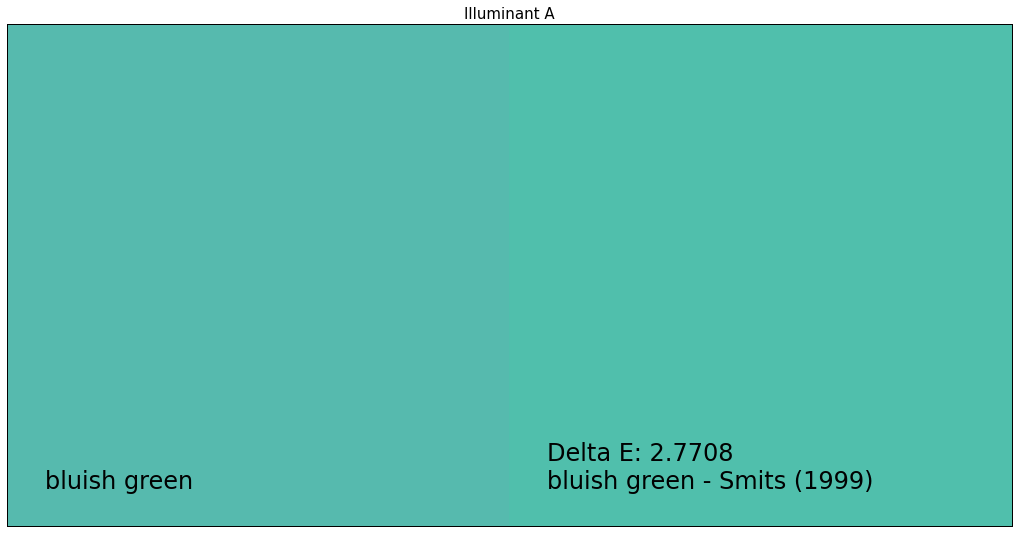

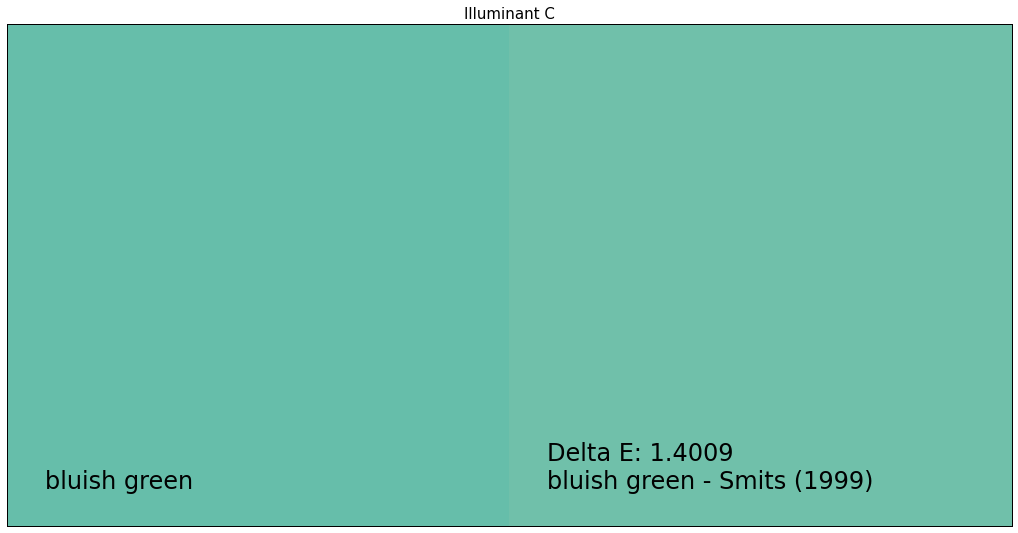

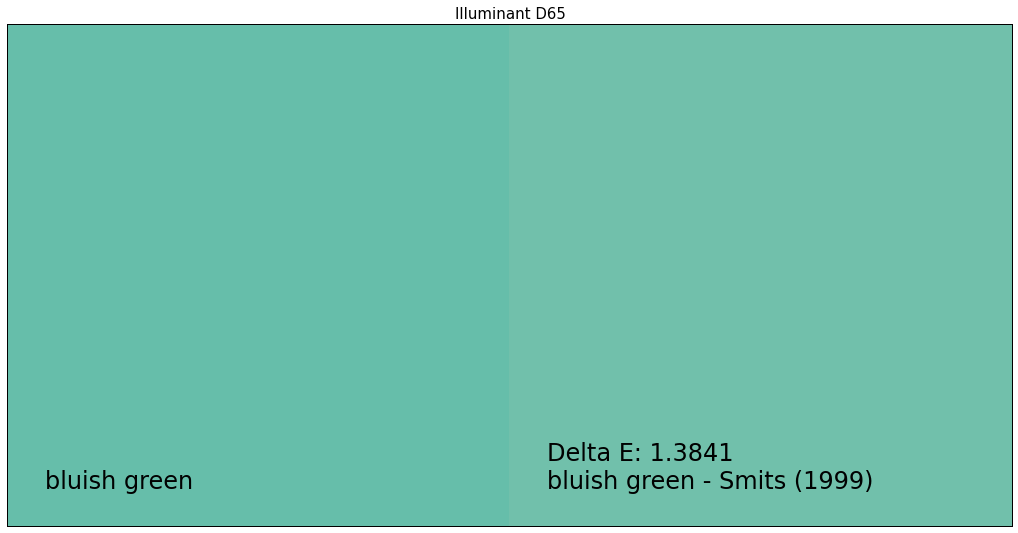

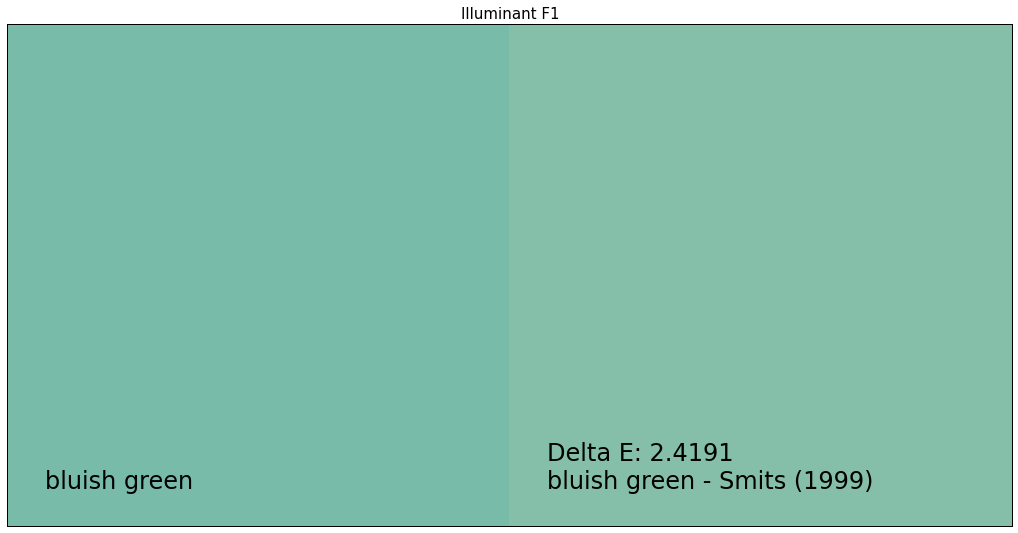

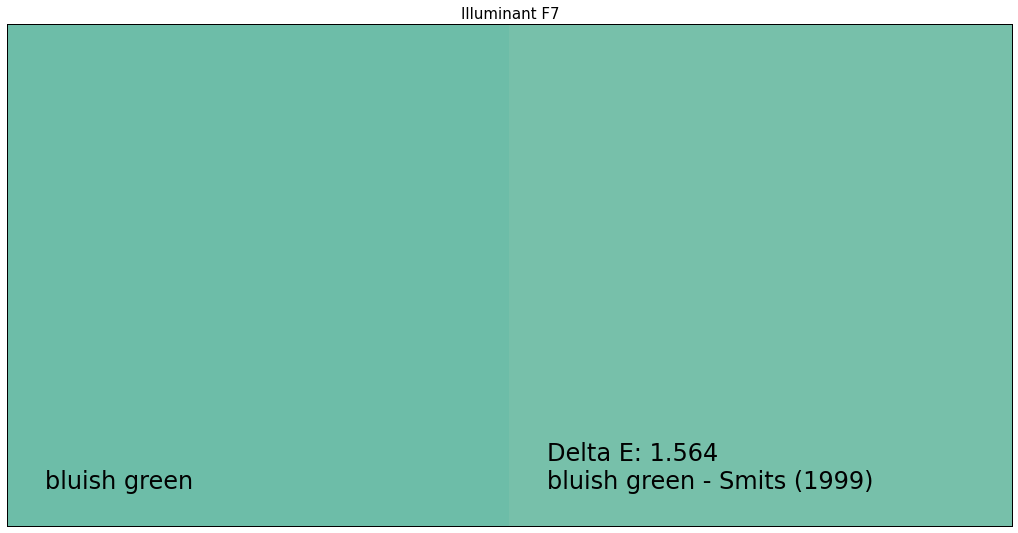

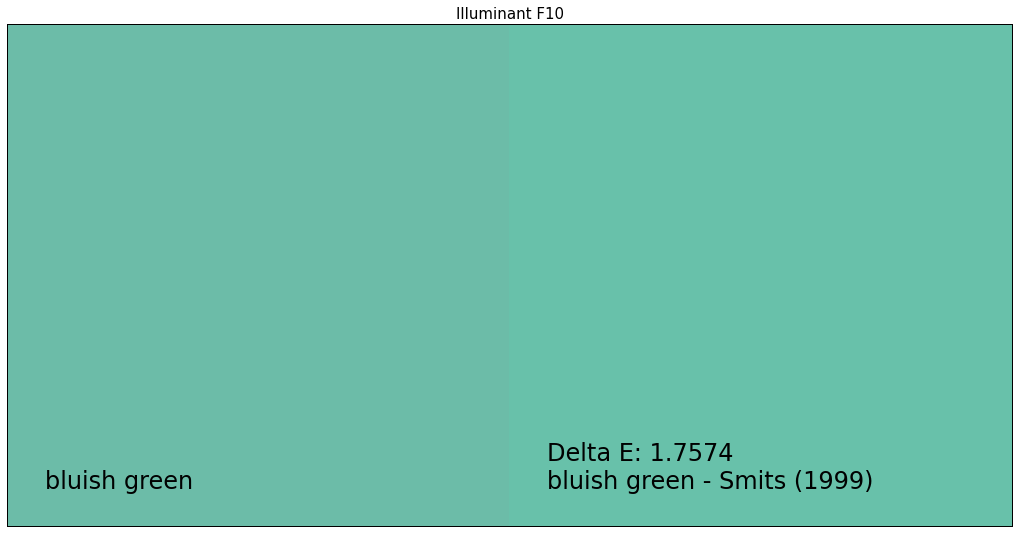

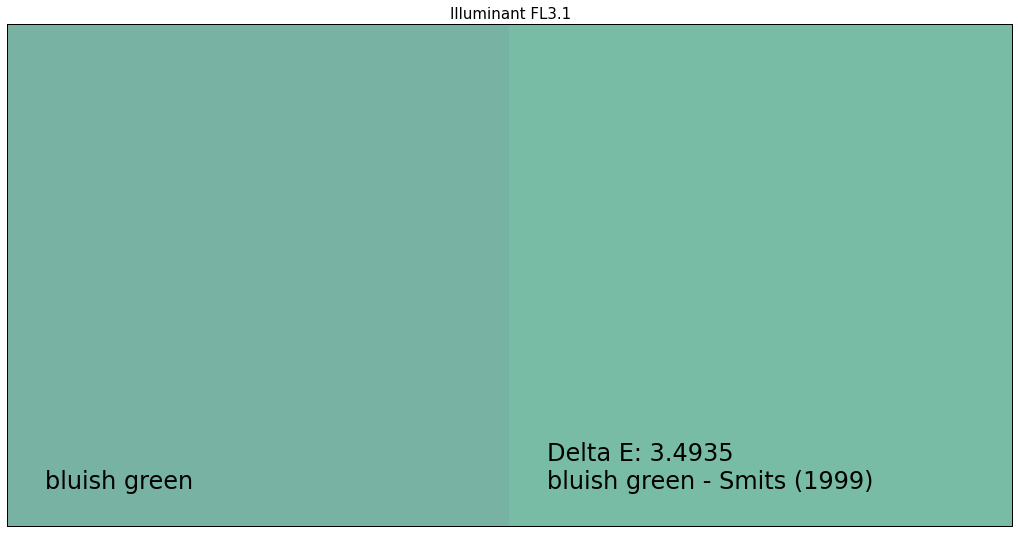

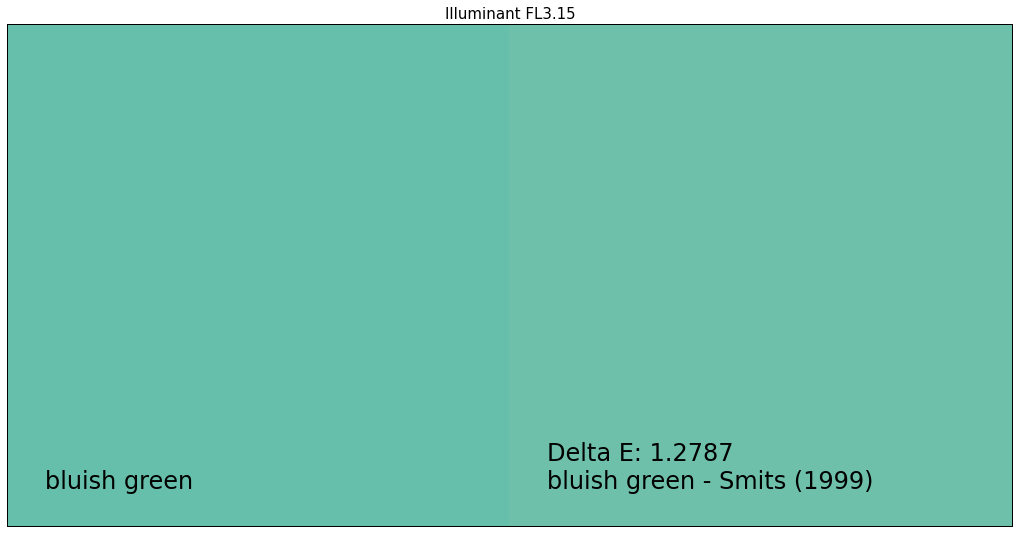

*                                                                             *
*   "orange" - Reflectance Recovery                                           *
*                                                                             *


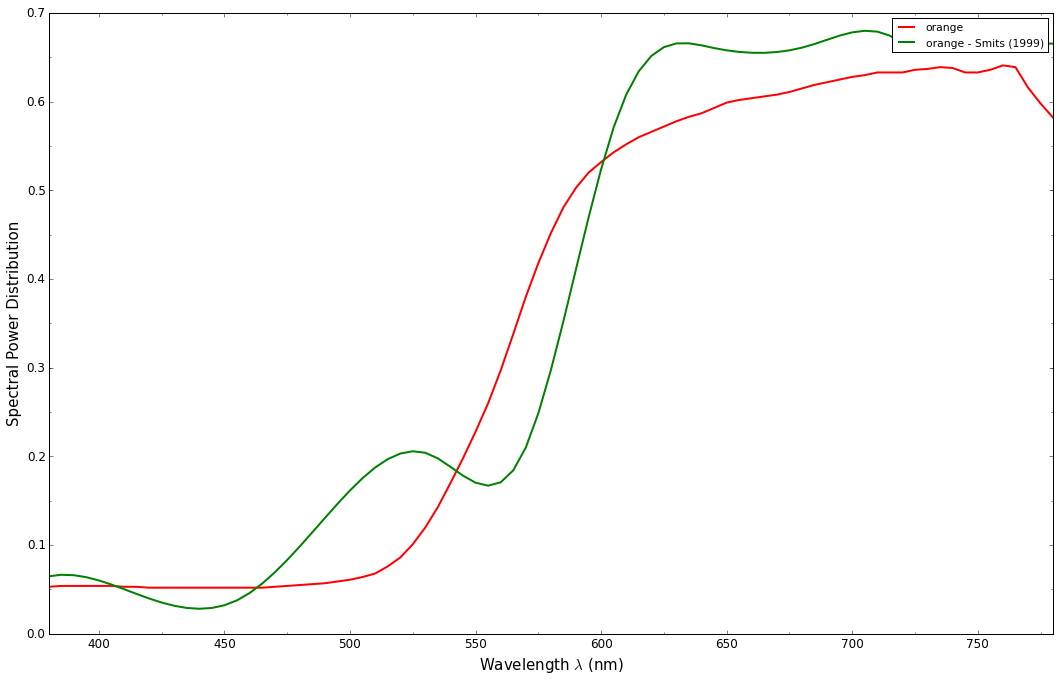

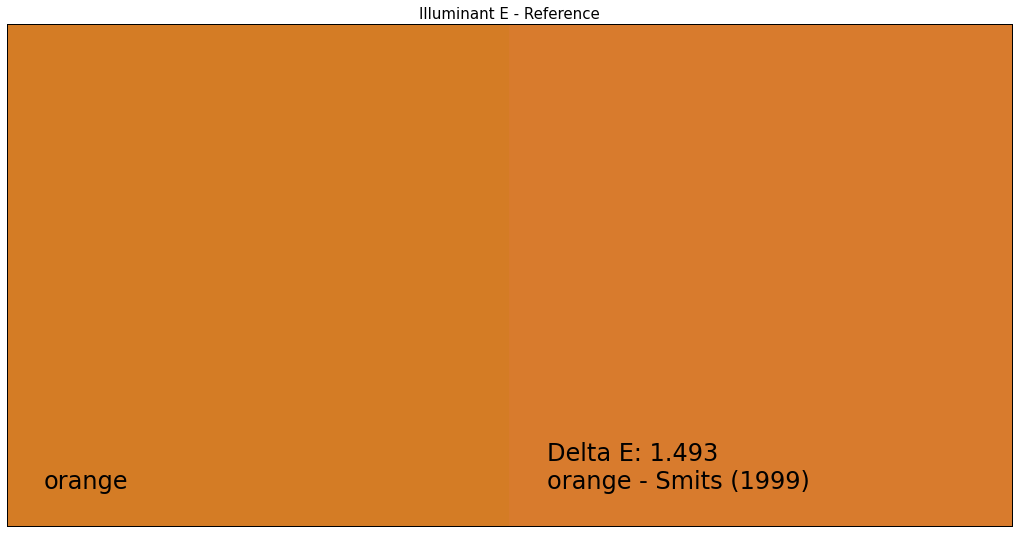

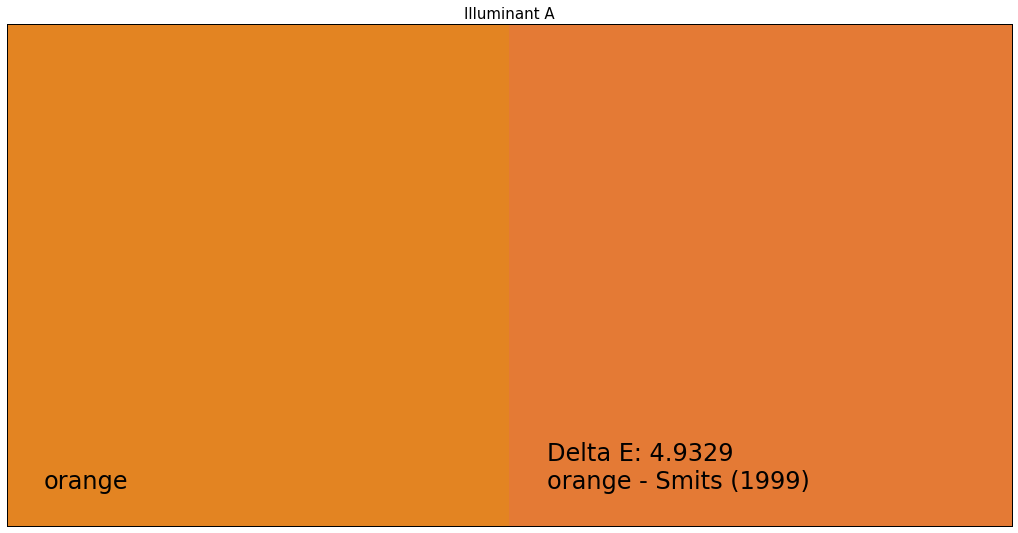

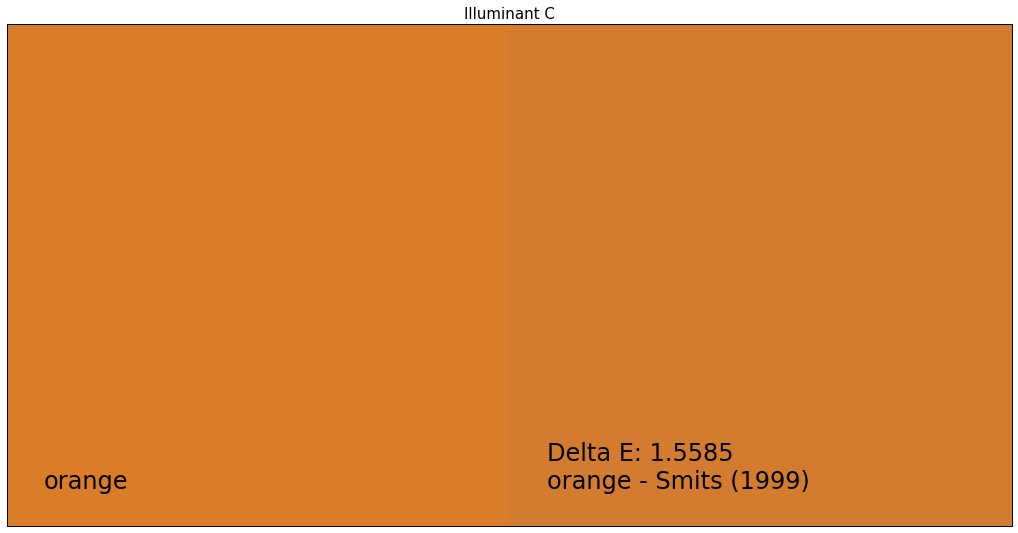

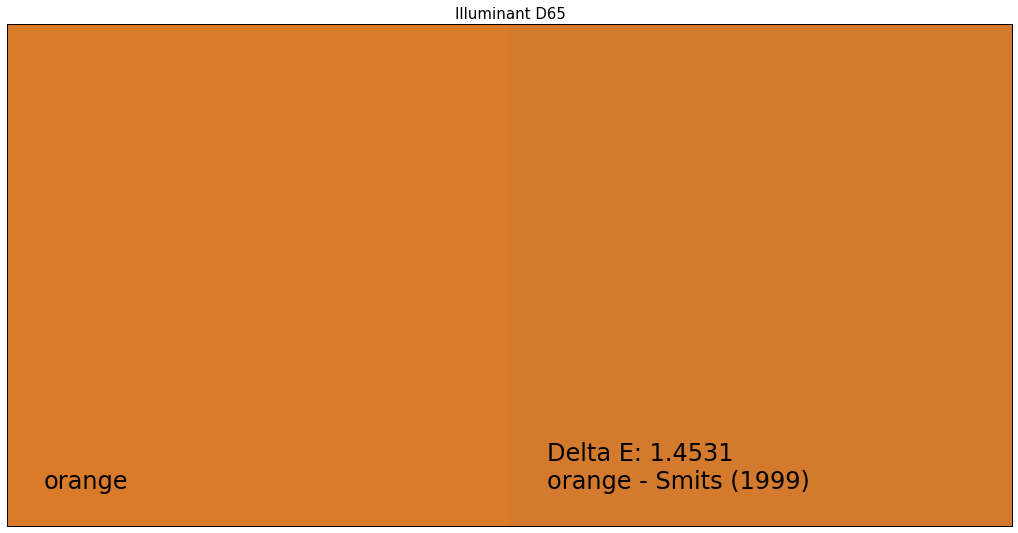

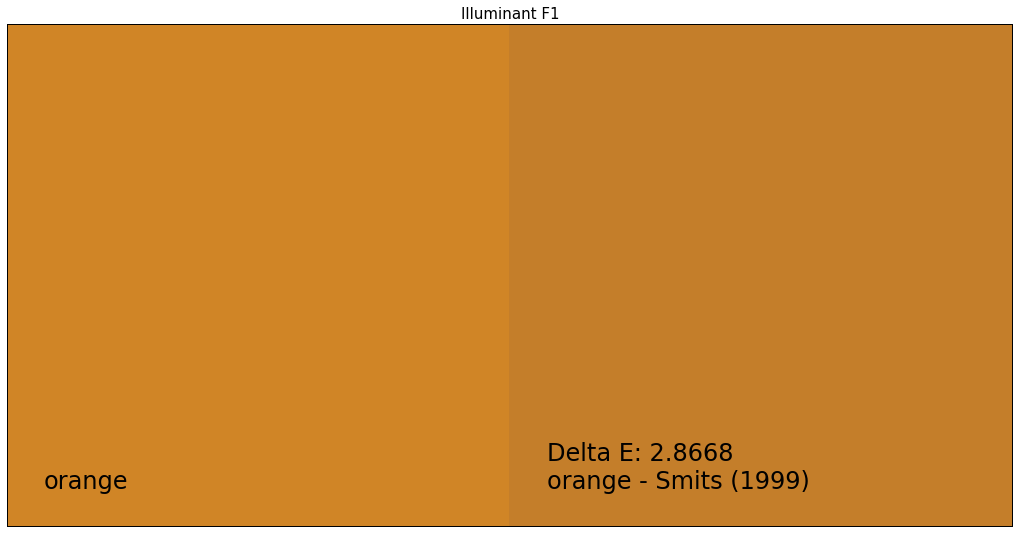

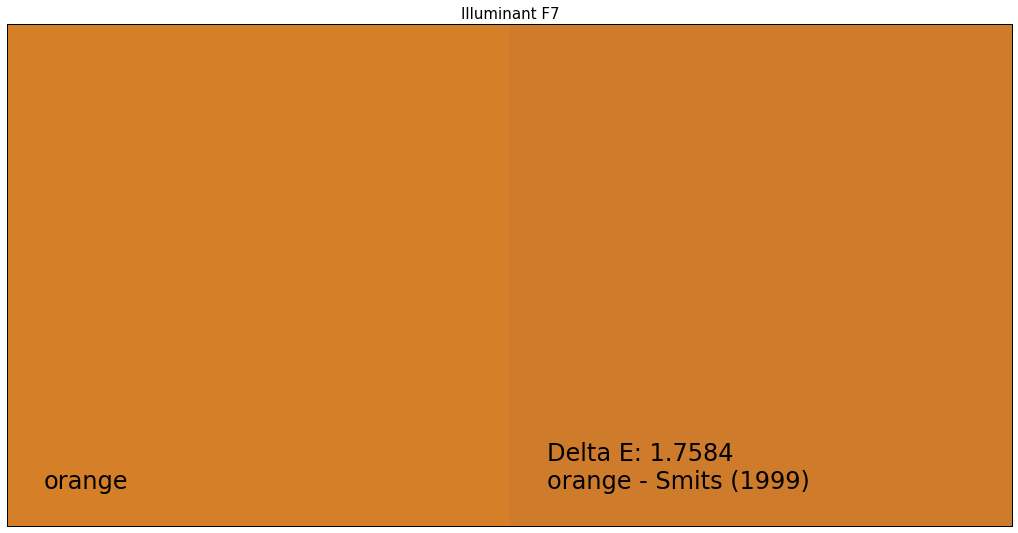

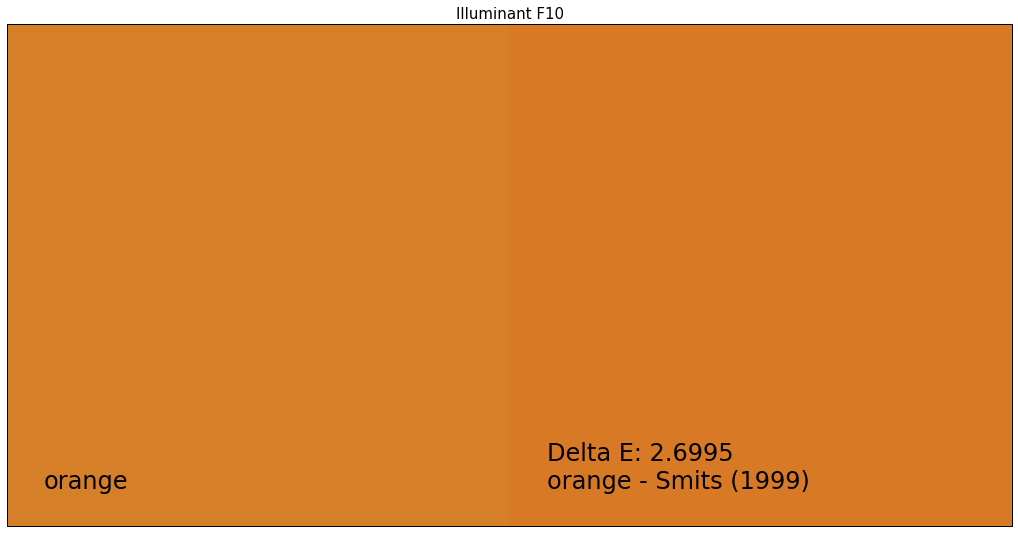

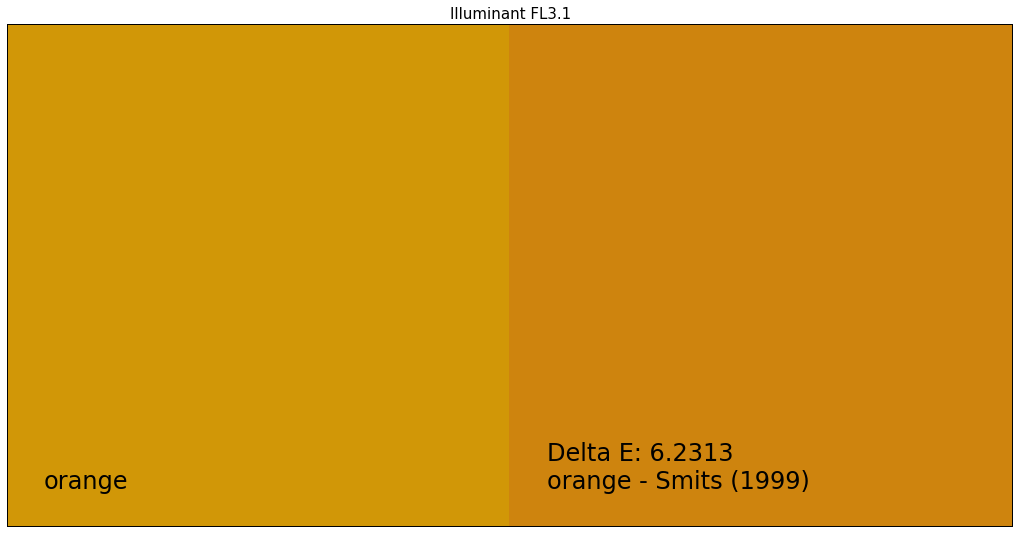

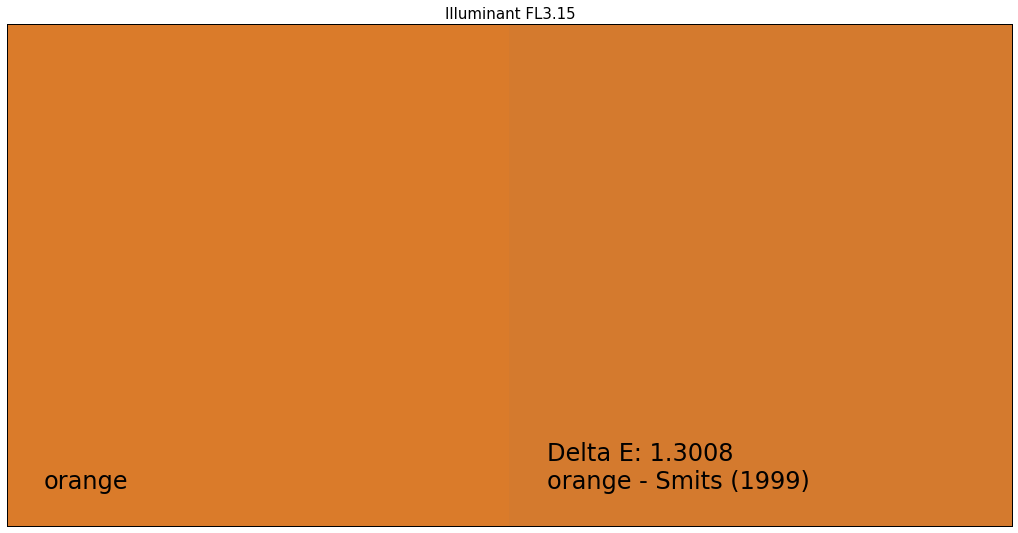

*                                                                             *
*   "purplish blue" - Reflectance Recovery                                    *
*                                                                             *


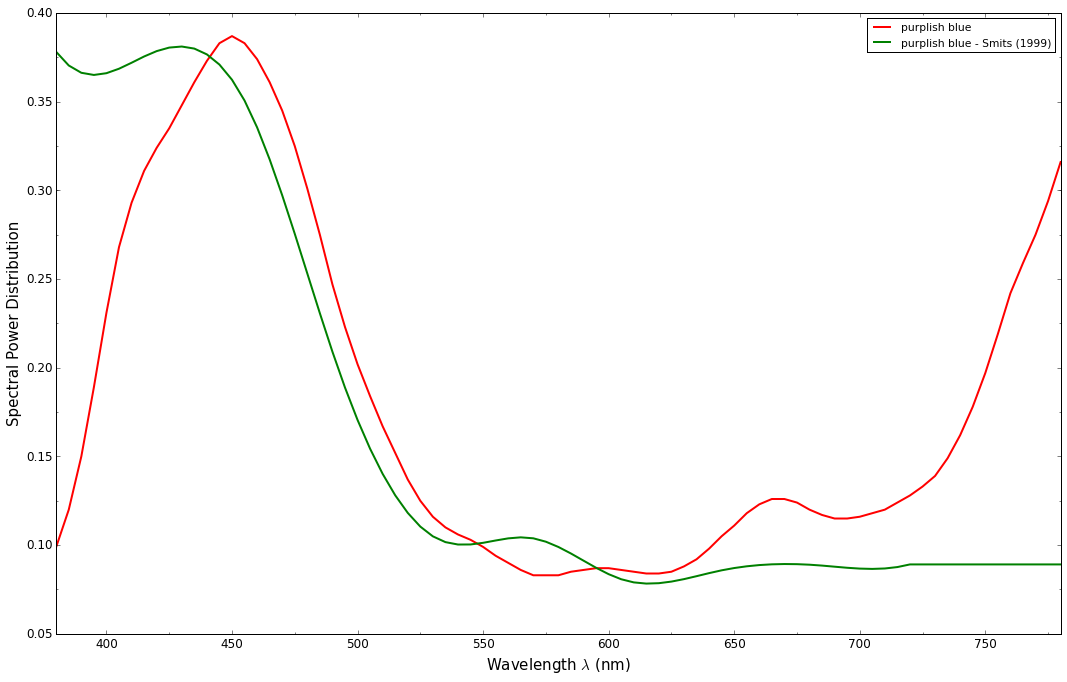

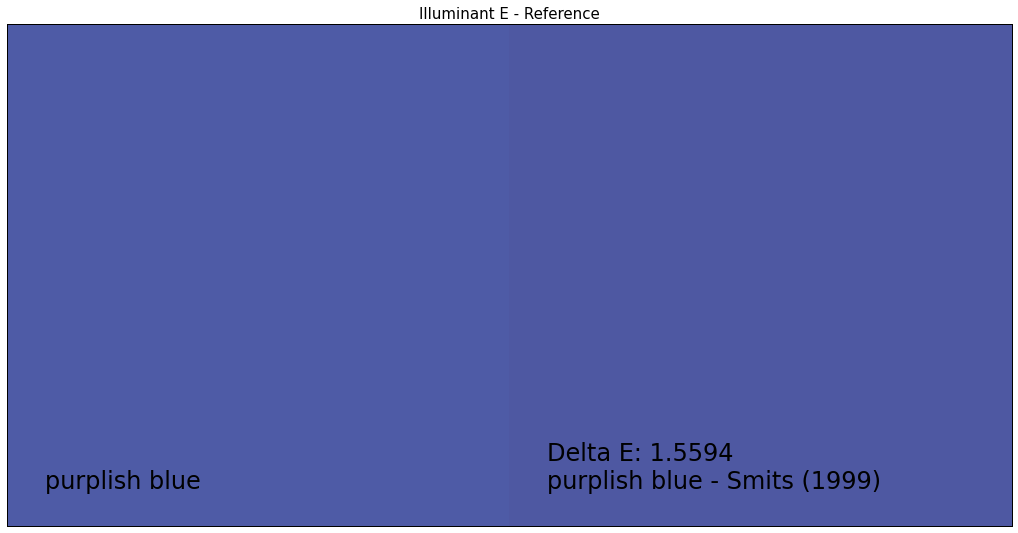

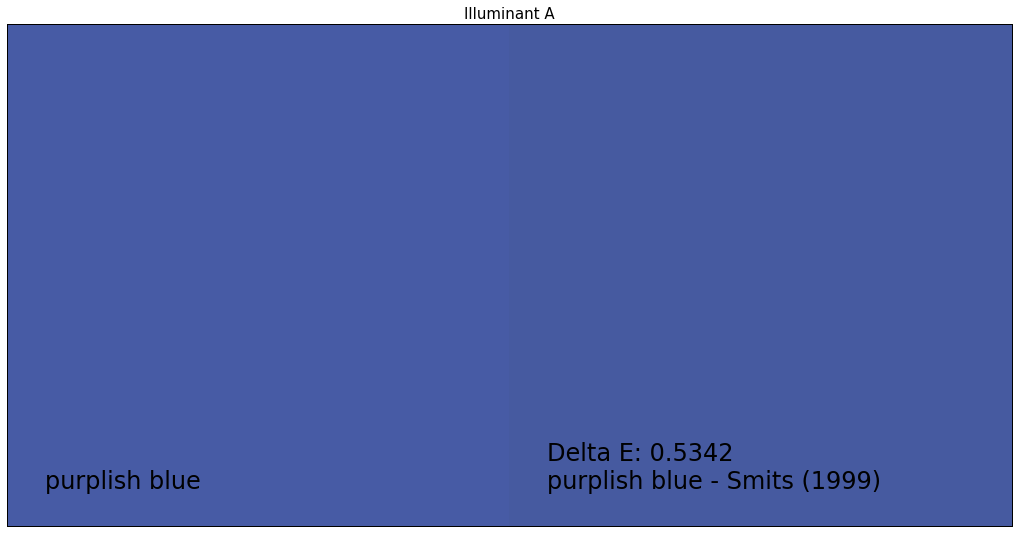

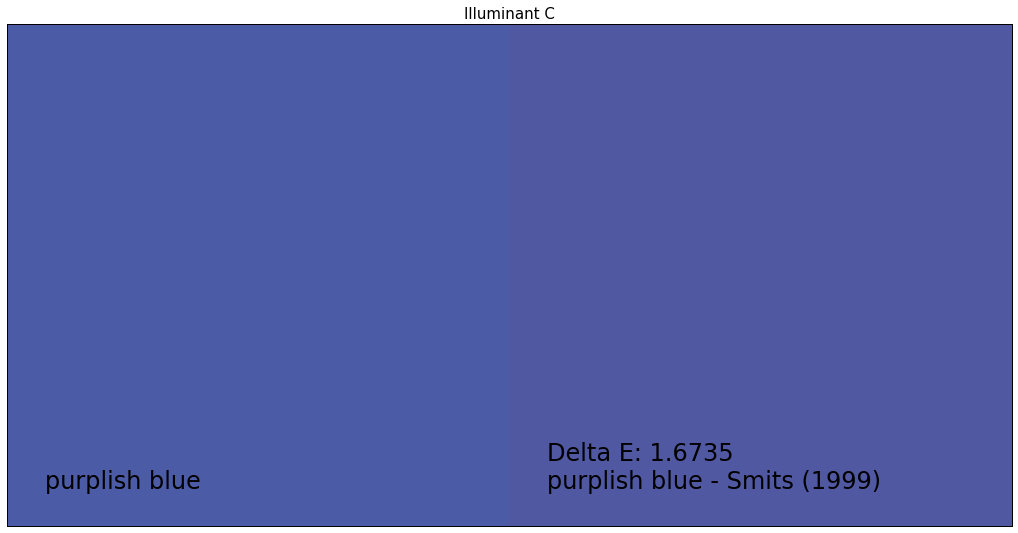

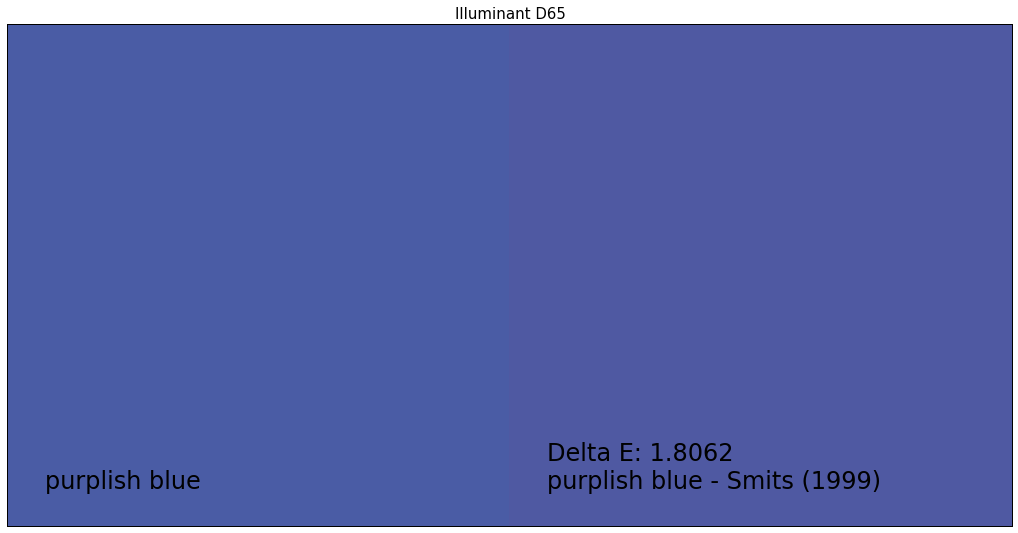

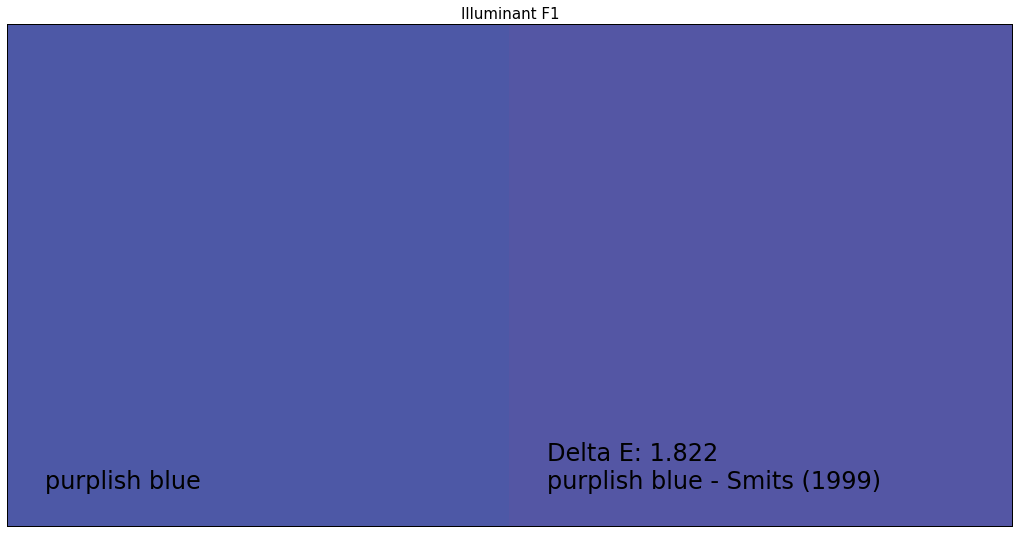

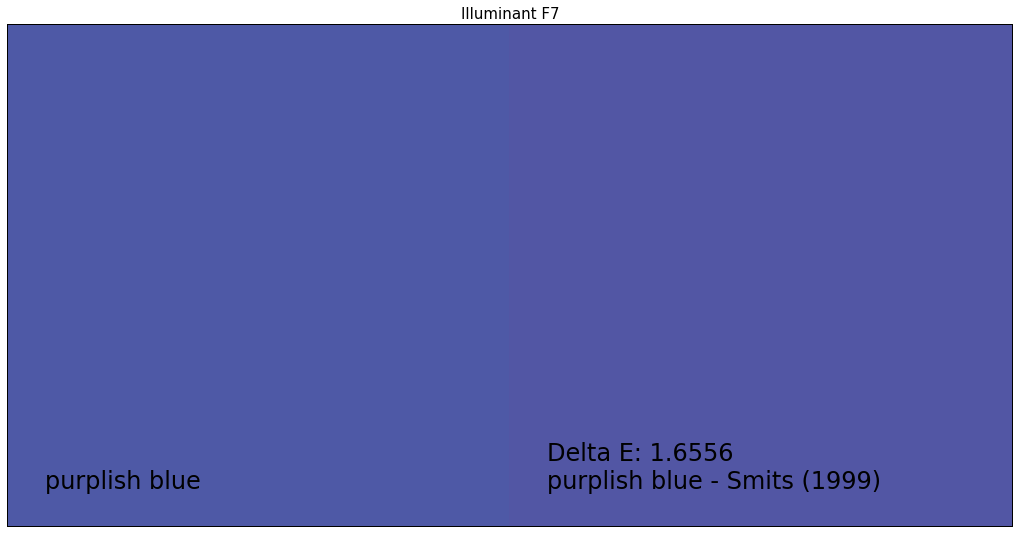

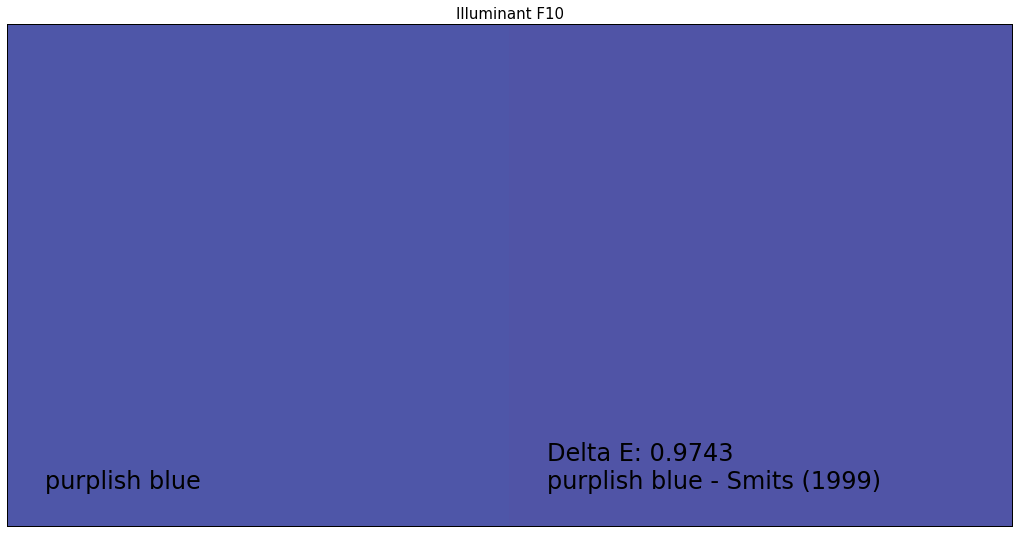

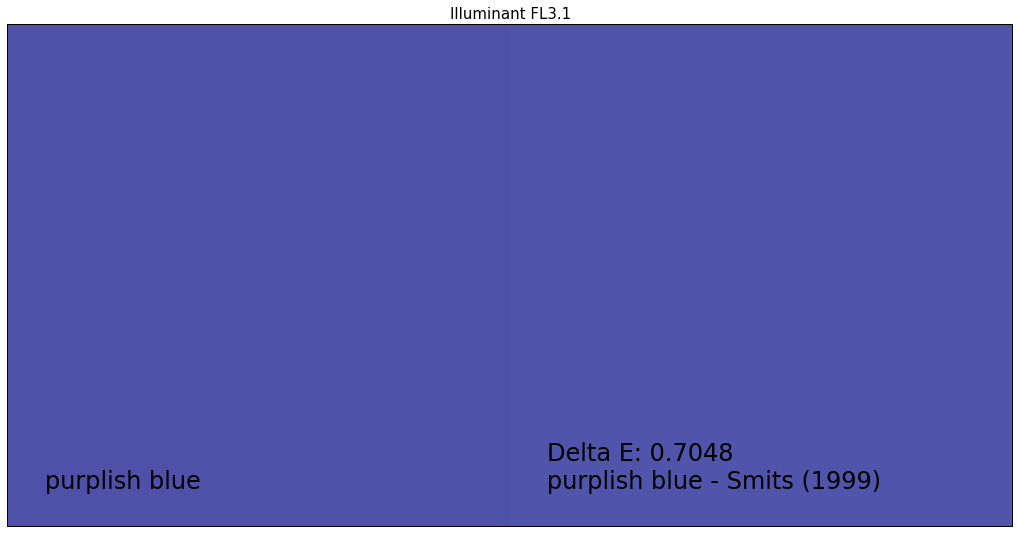

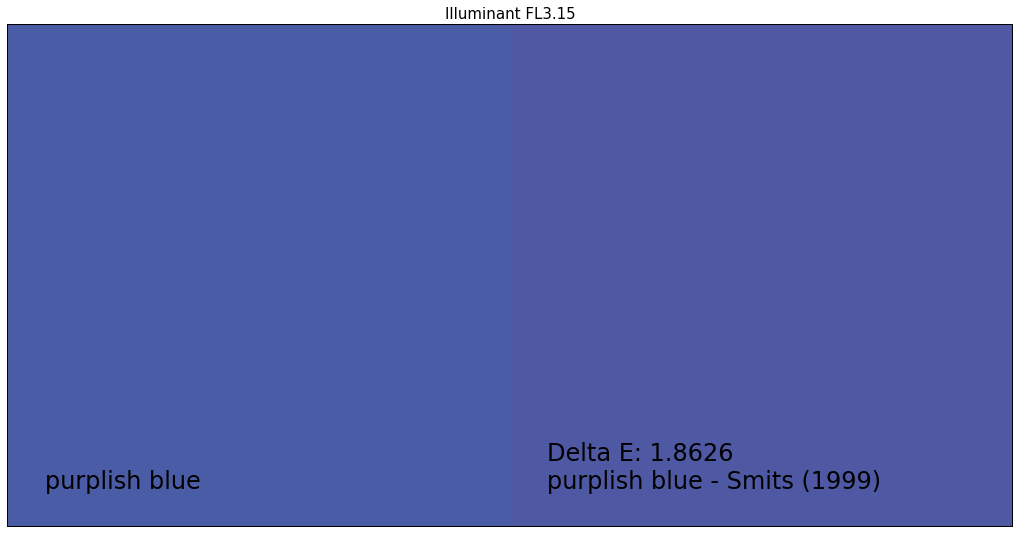

*                                                                             *
*   "moderate red" - Reflectance Recovery                                     *
*                                                                             *


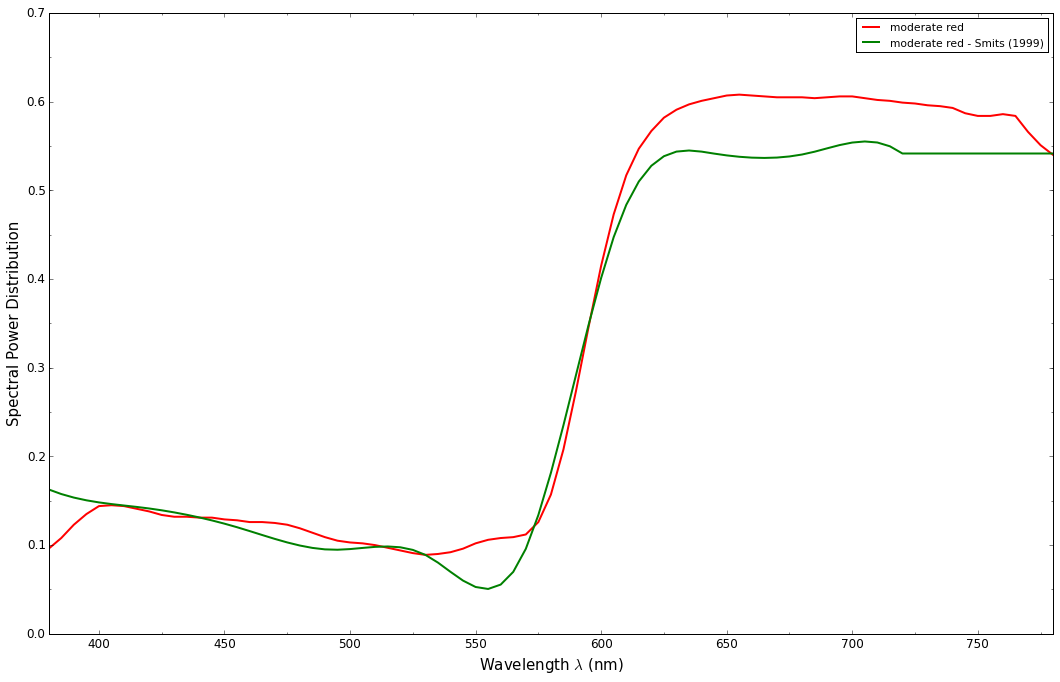

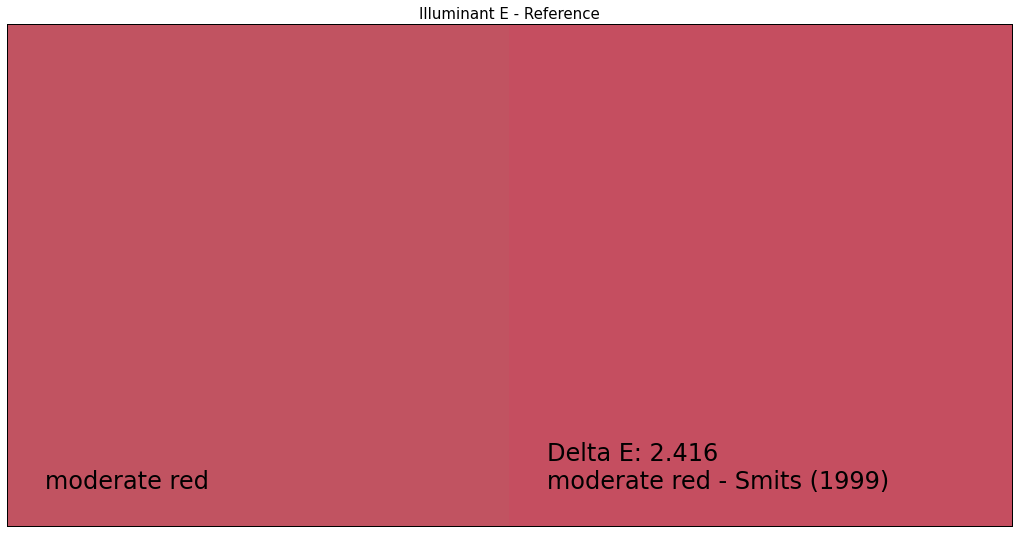

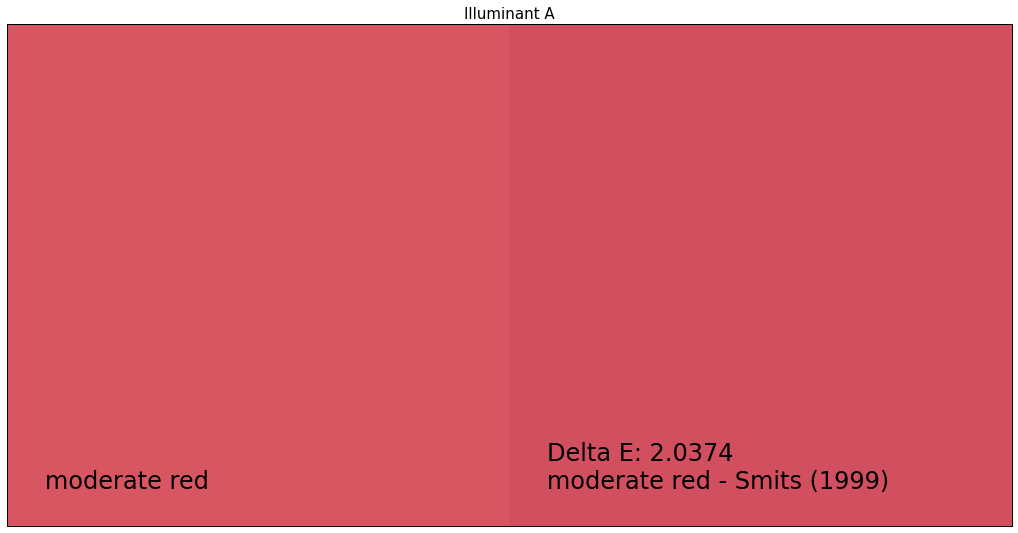

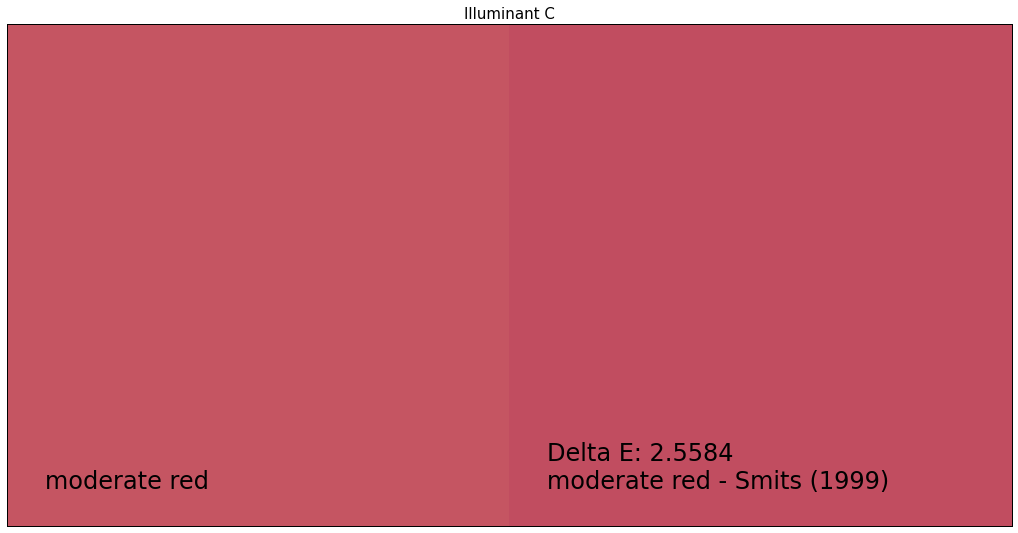

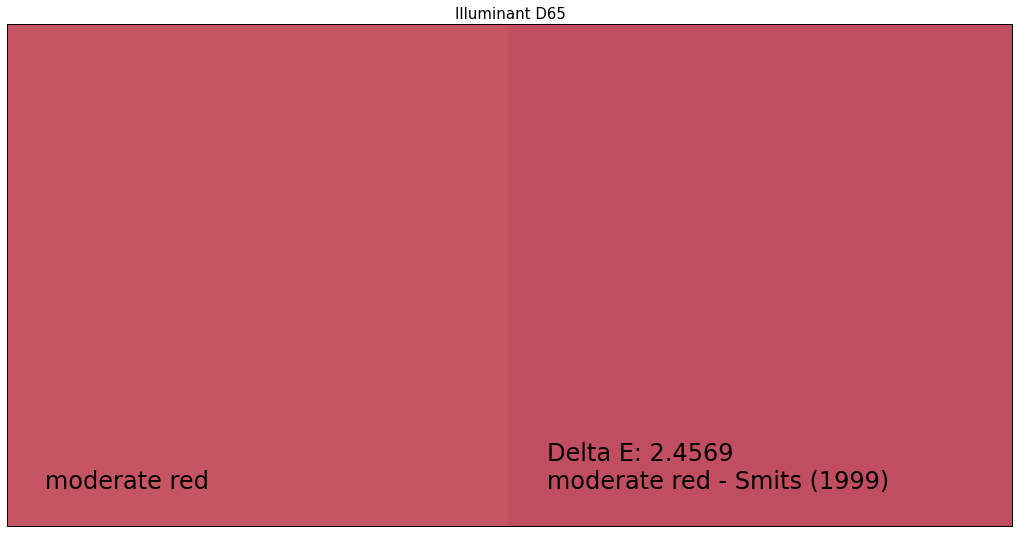

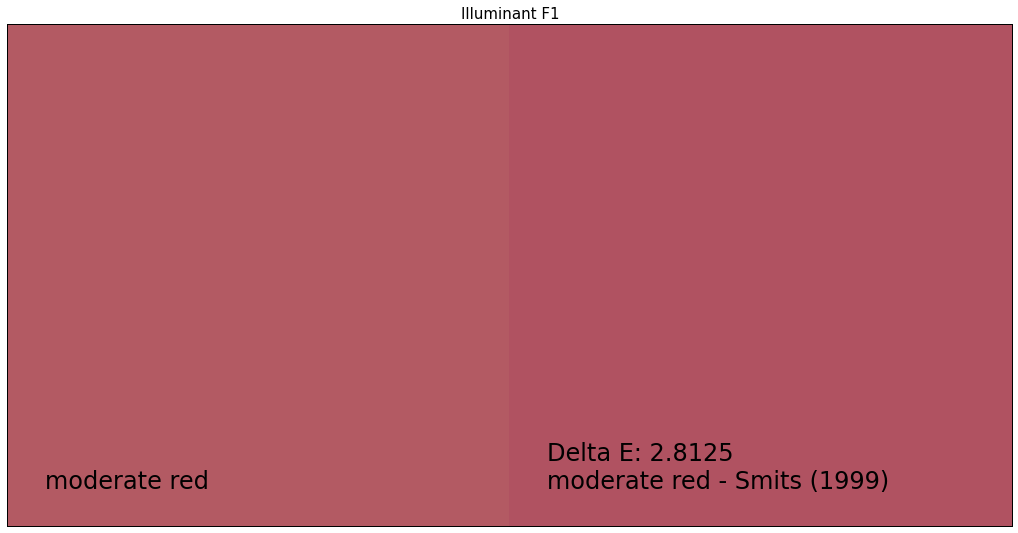

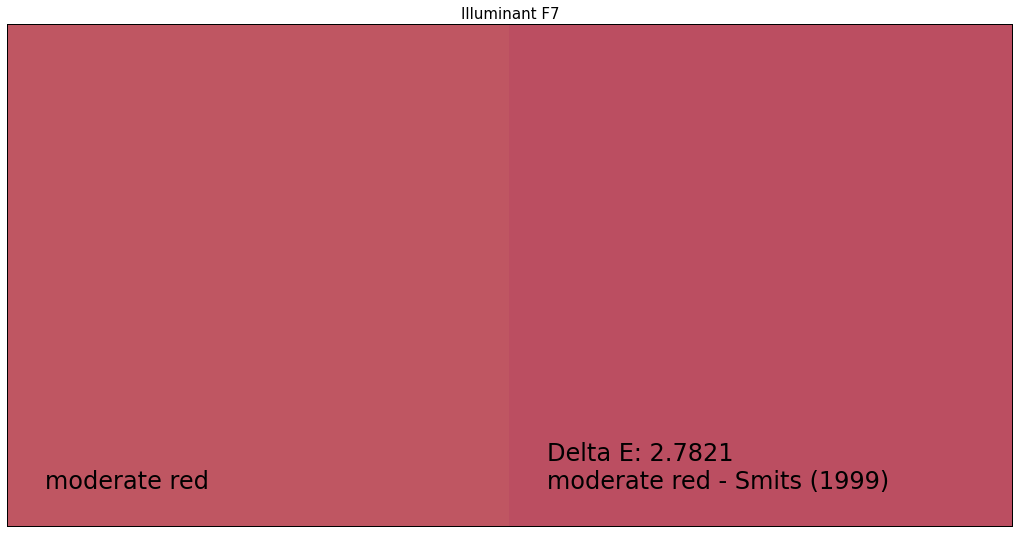

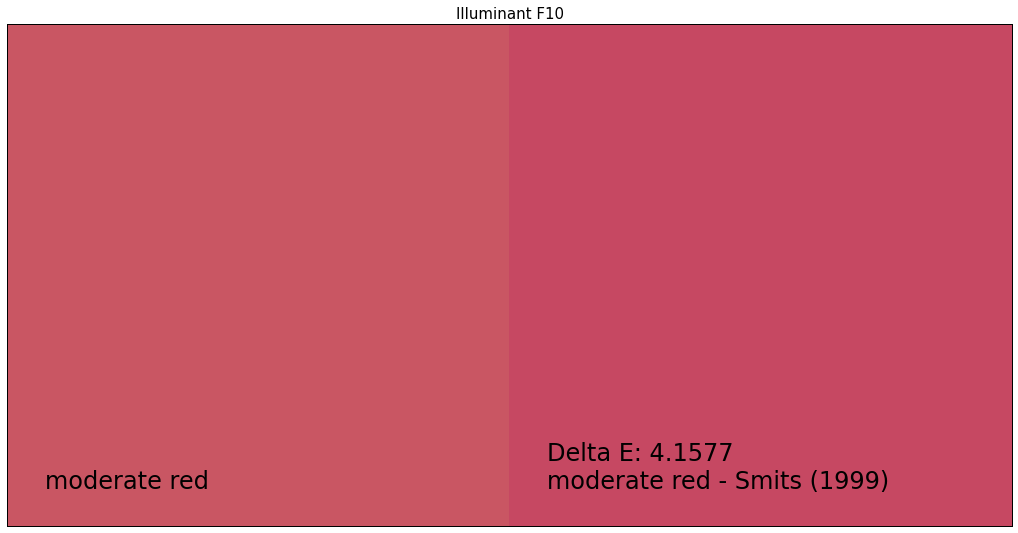

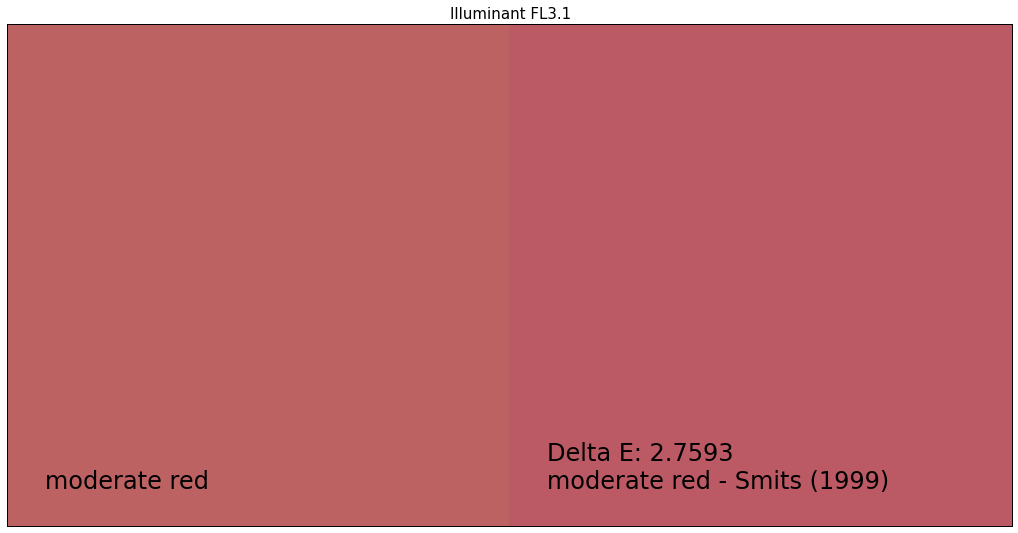

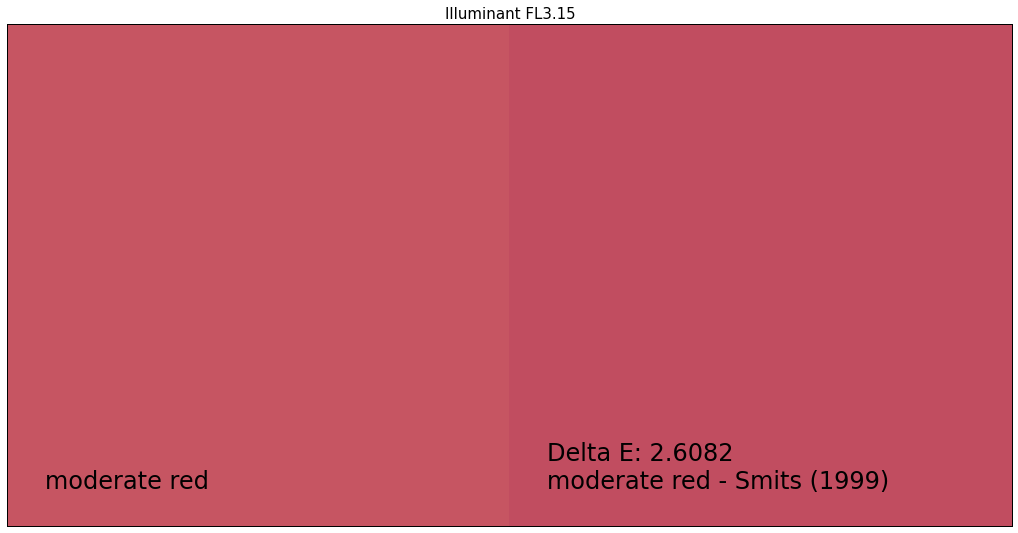

*                                                                             *
*   "purple" - Reflectance Recovery                                           *
*                                                                             *


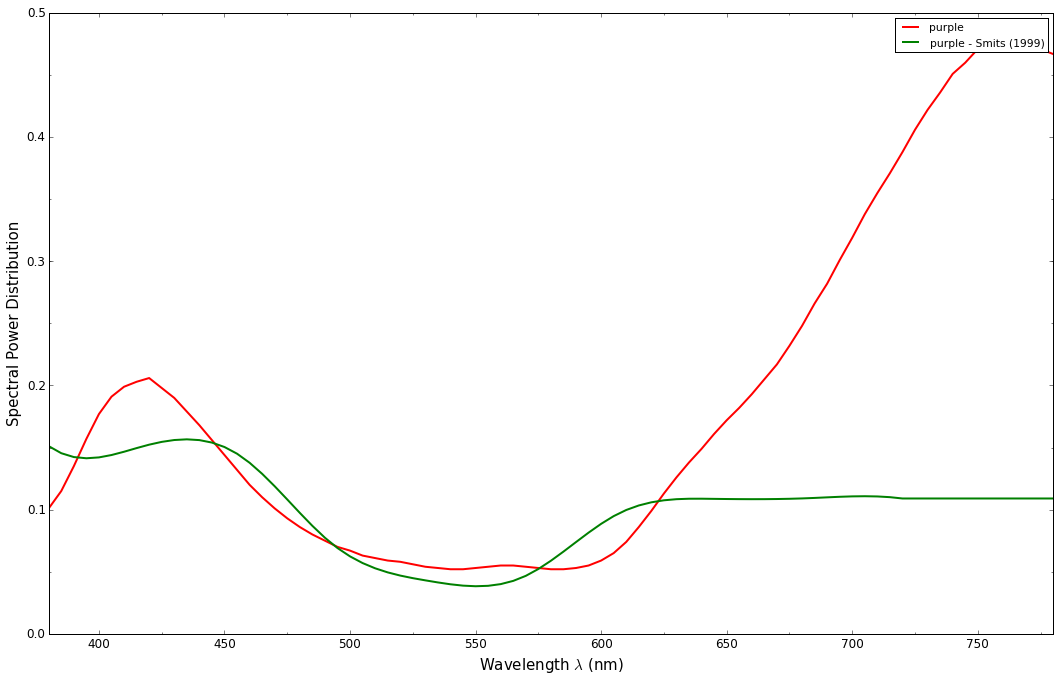

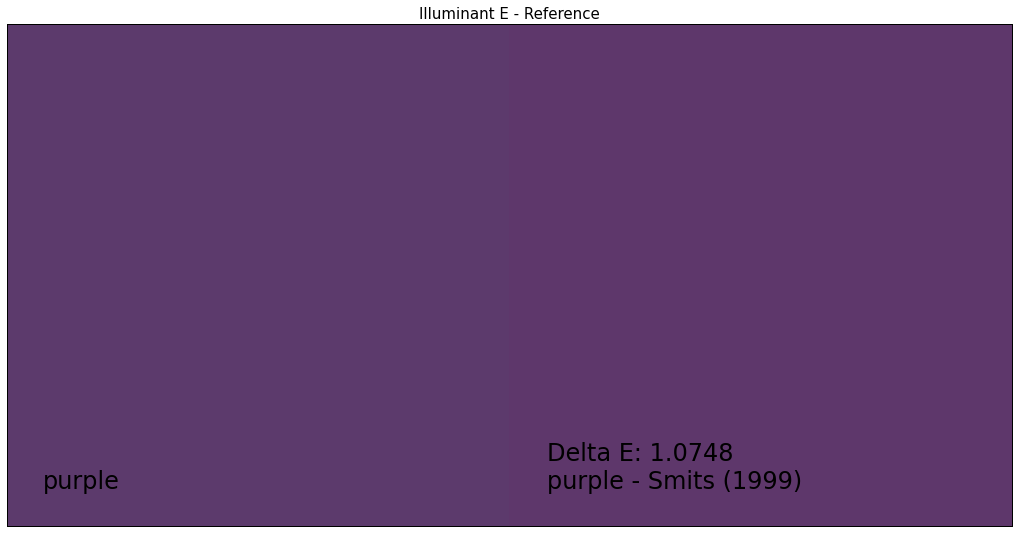

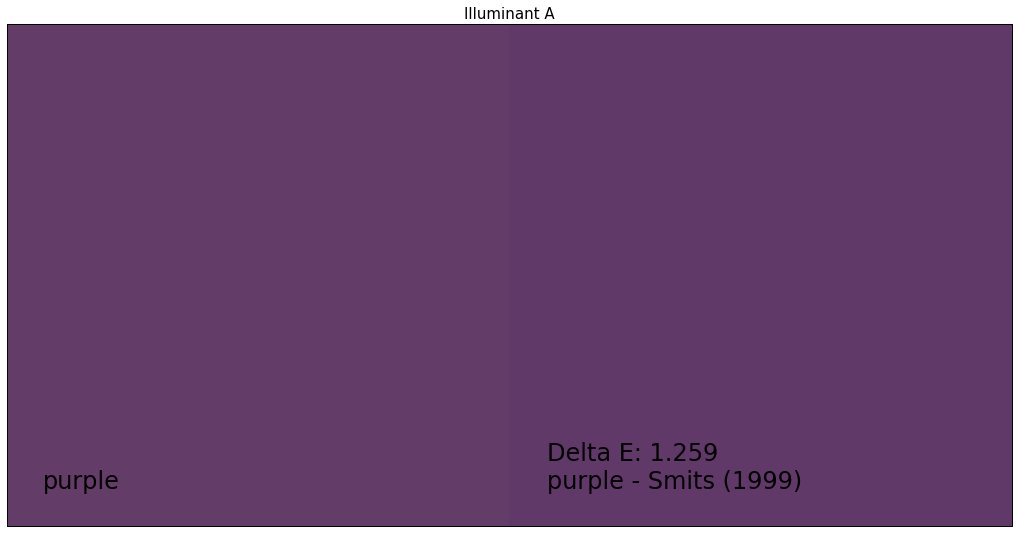

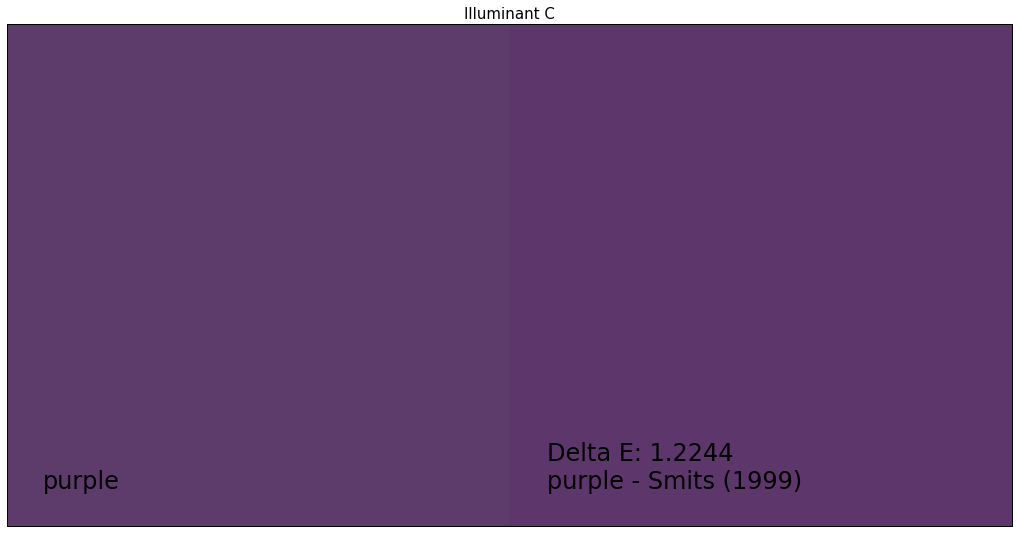

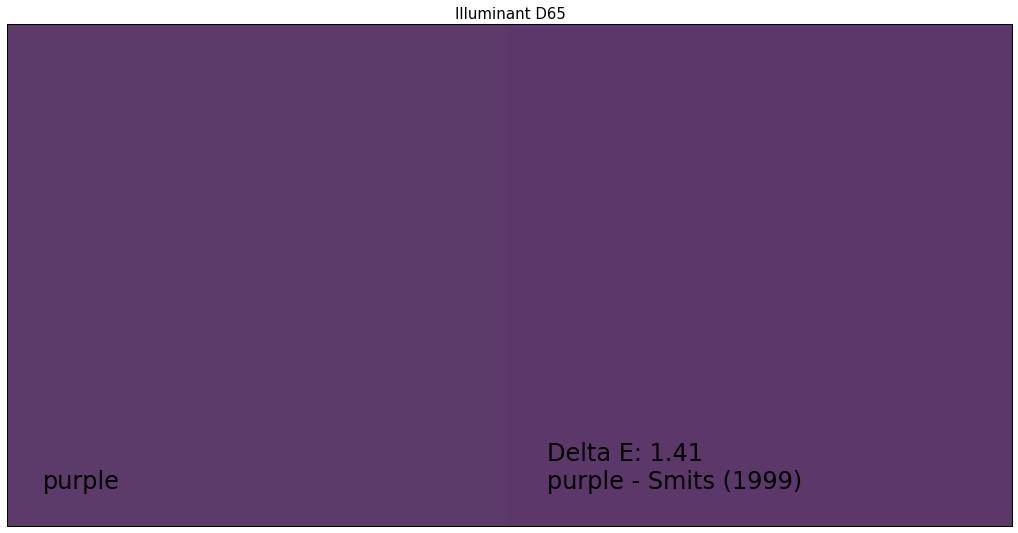

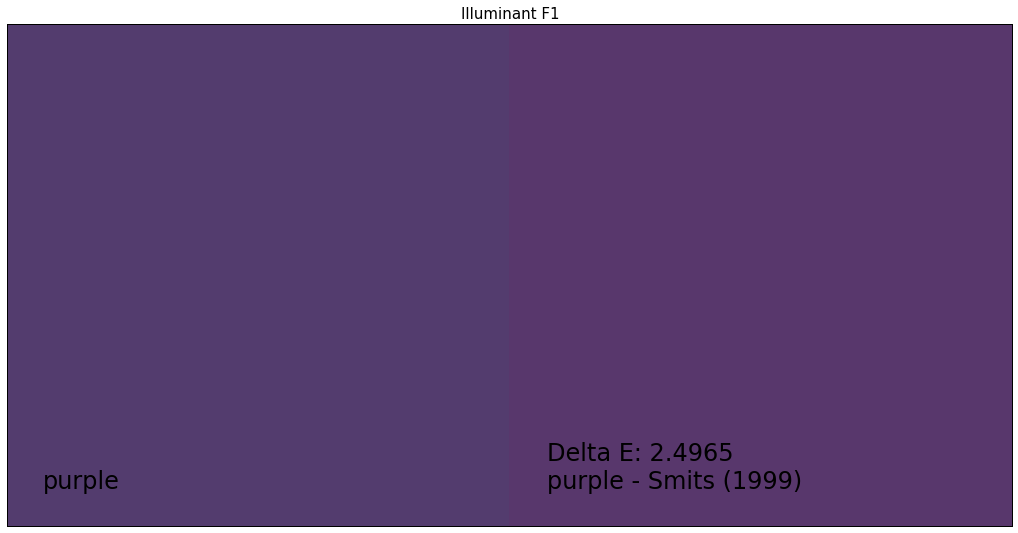

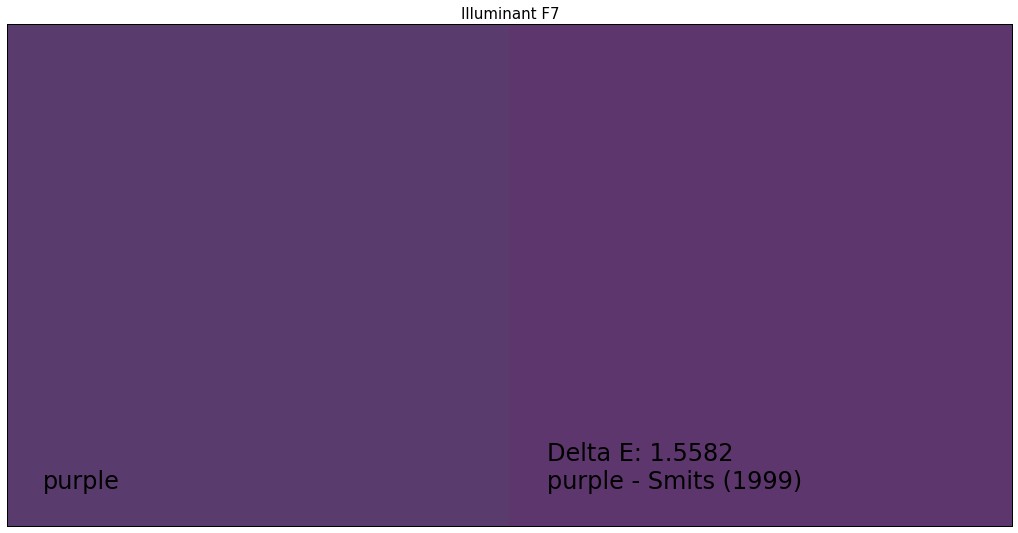

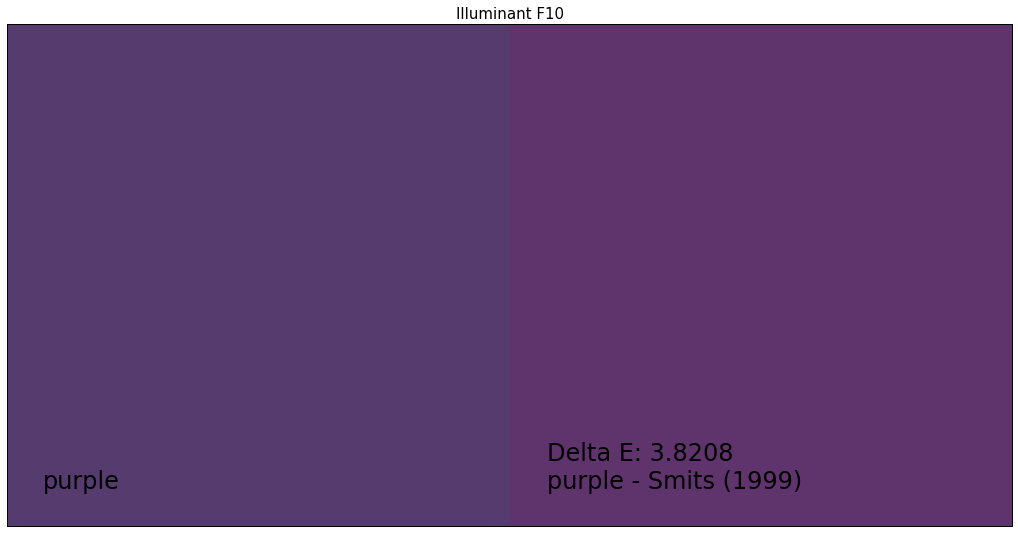

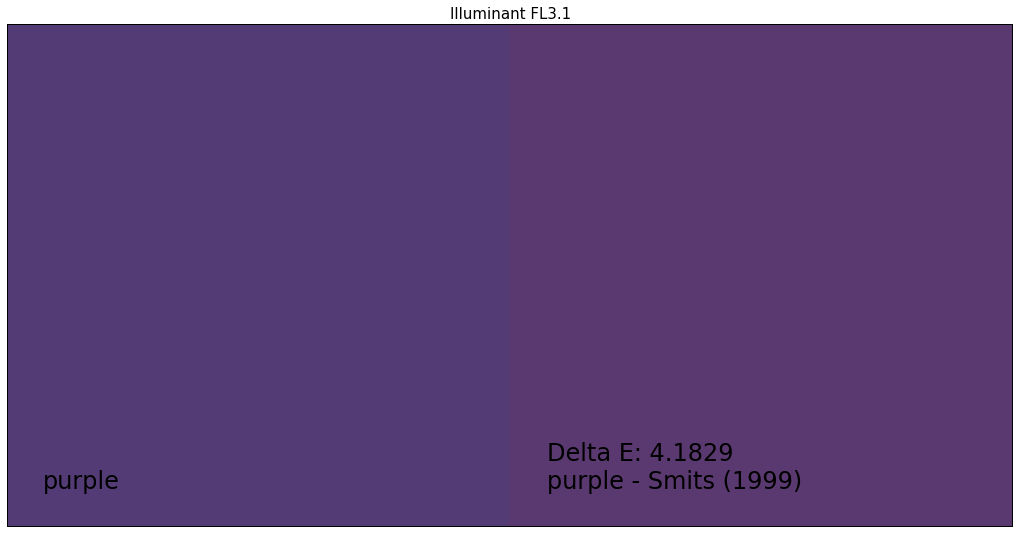

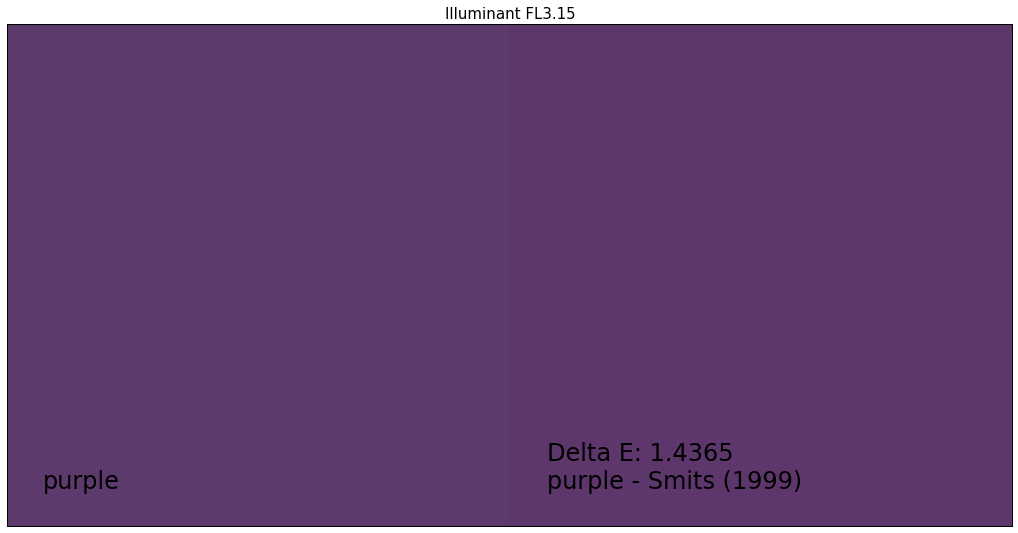

*                                                                             *
*   "yellow green" - Reflectance Recovery                                     *
*                                                                             *


/colour-science/colour/colour/models/dataset/srgb.py:111: RuntimeWarning: invalid value encountered in power
  1.055 * (value ** (1 / 2.4)) - 0.055)


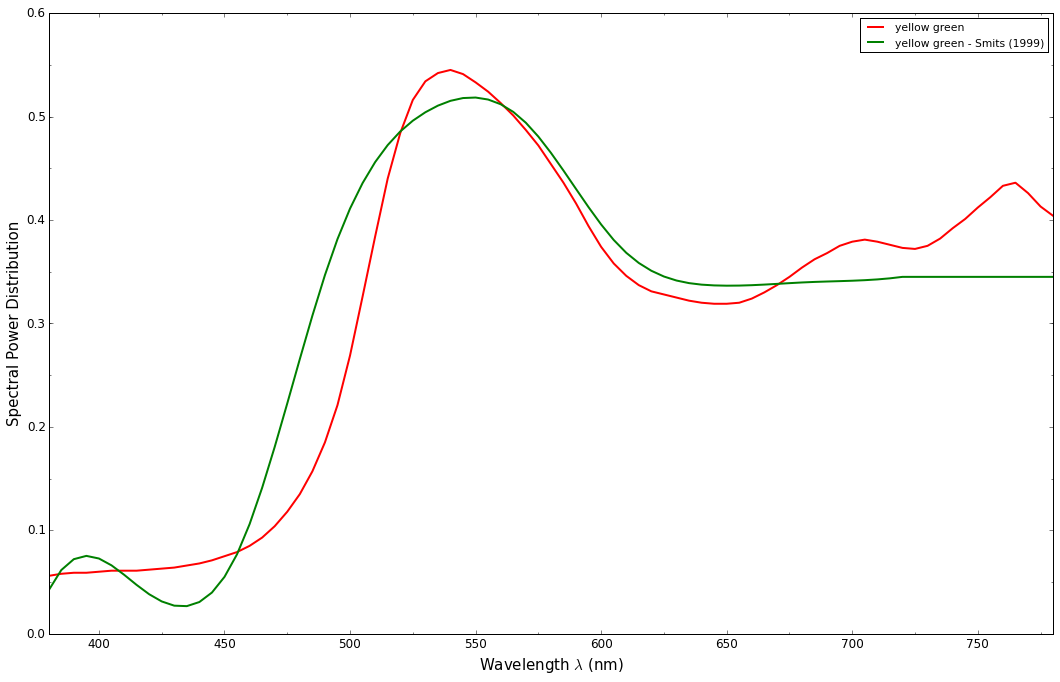

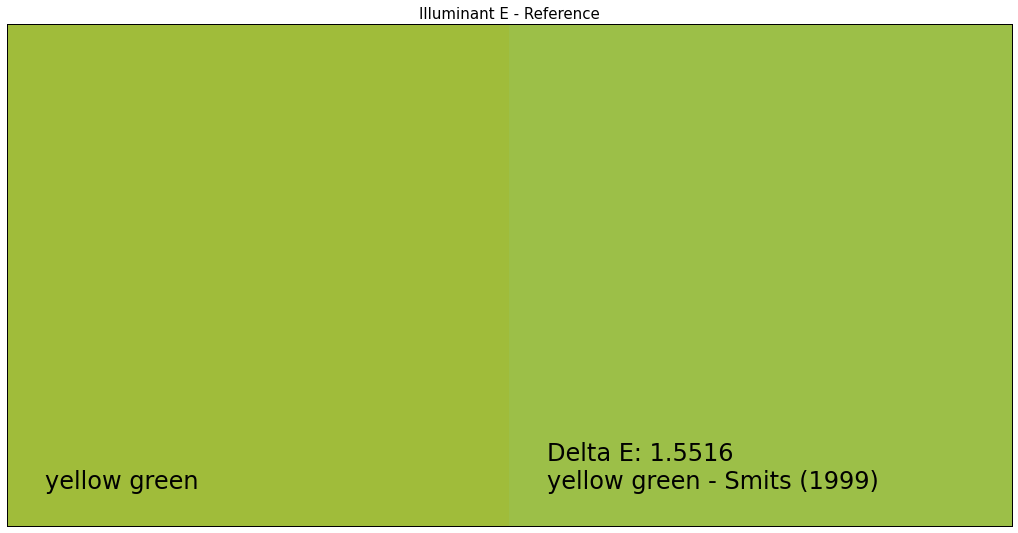

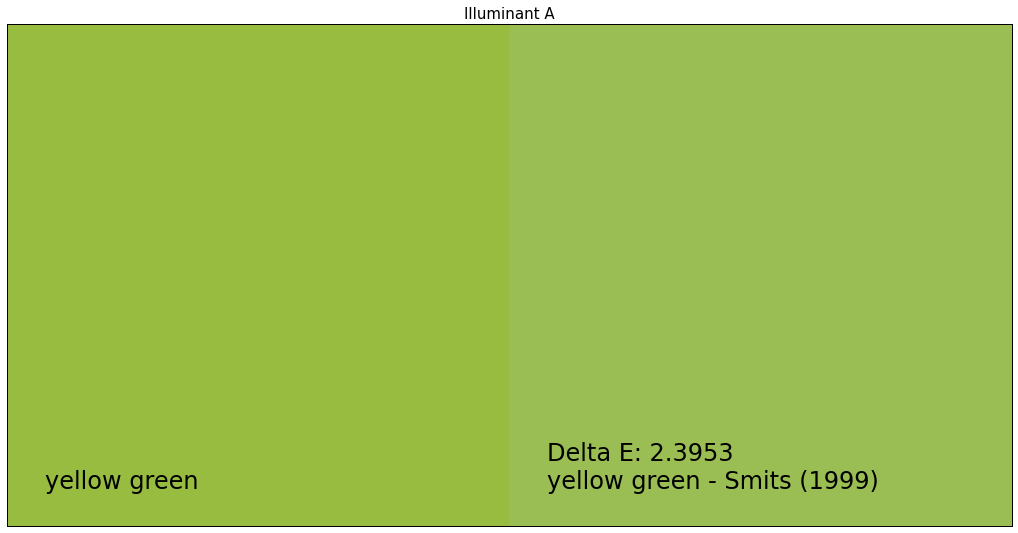

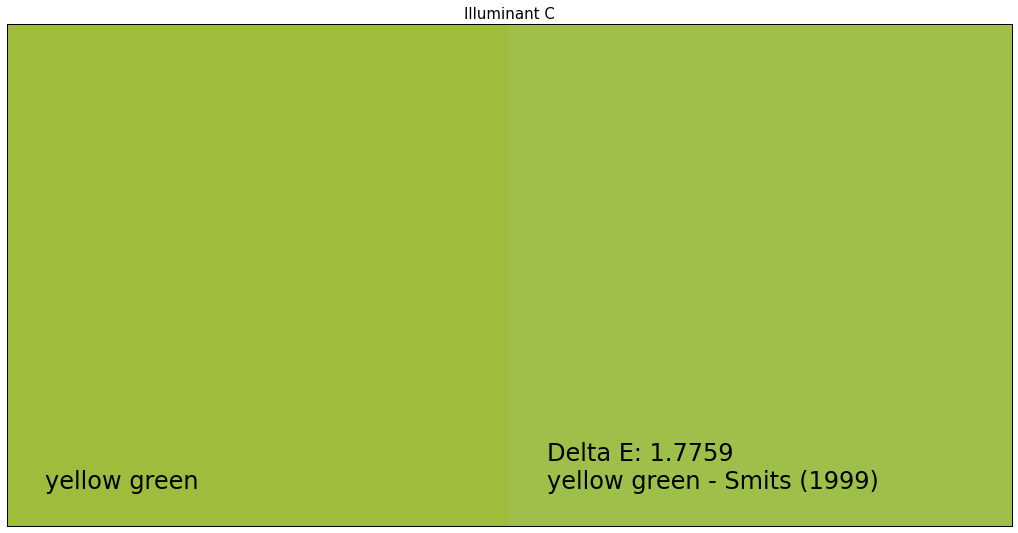

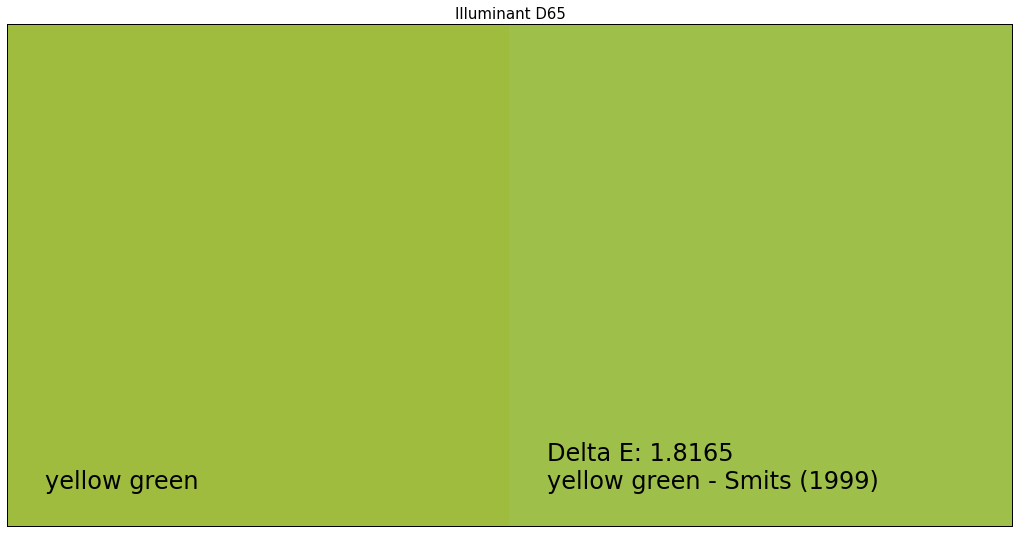

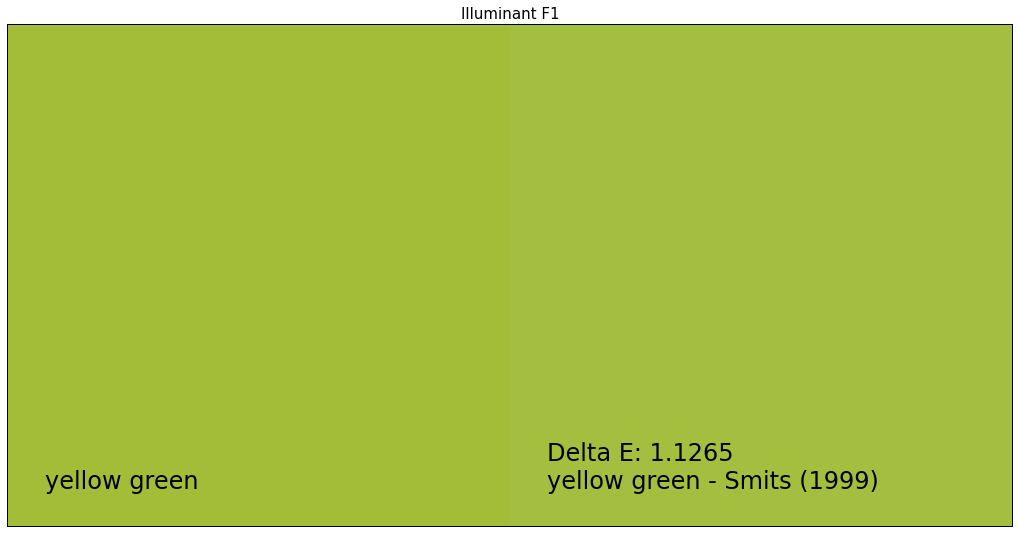

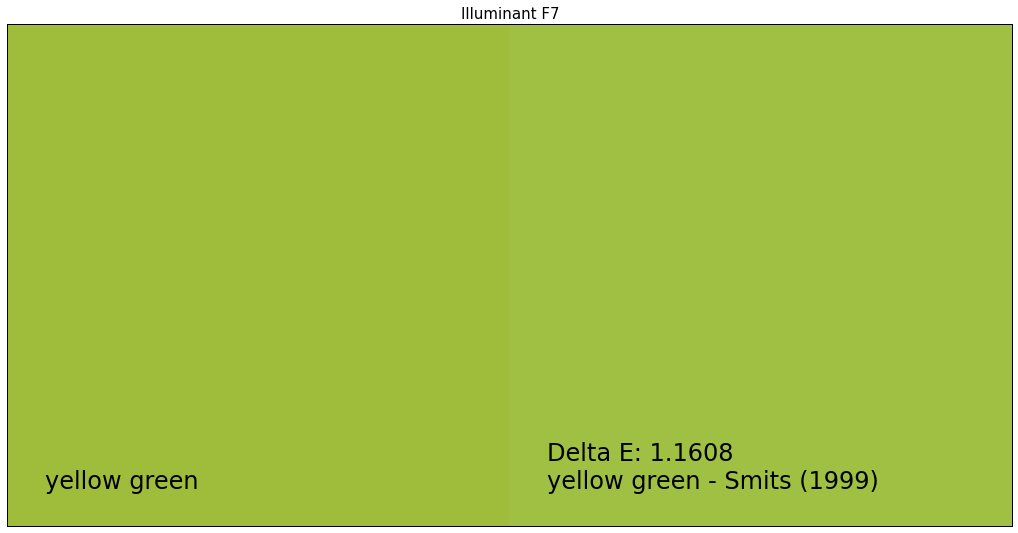

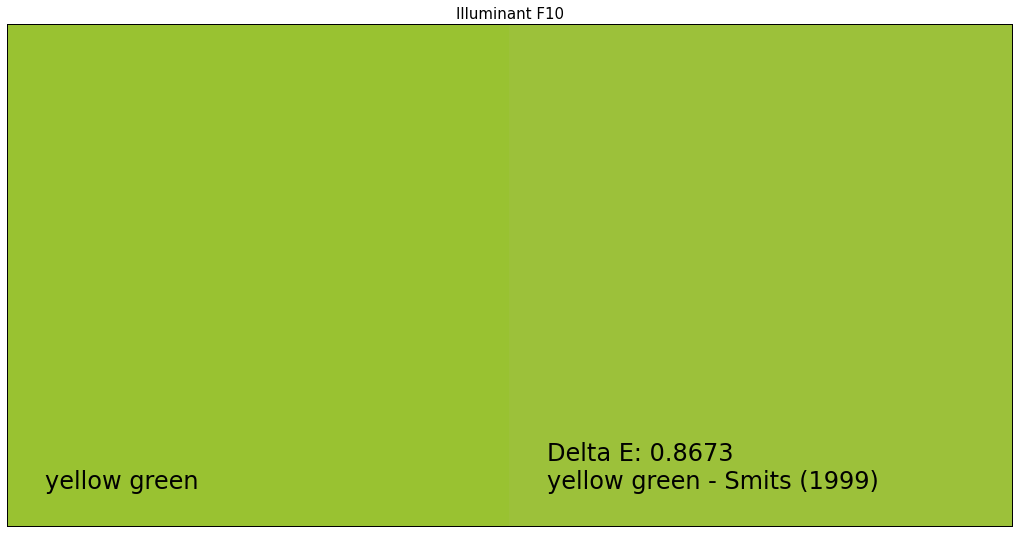

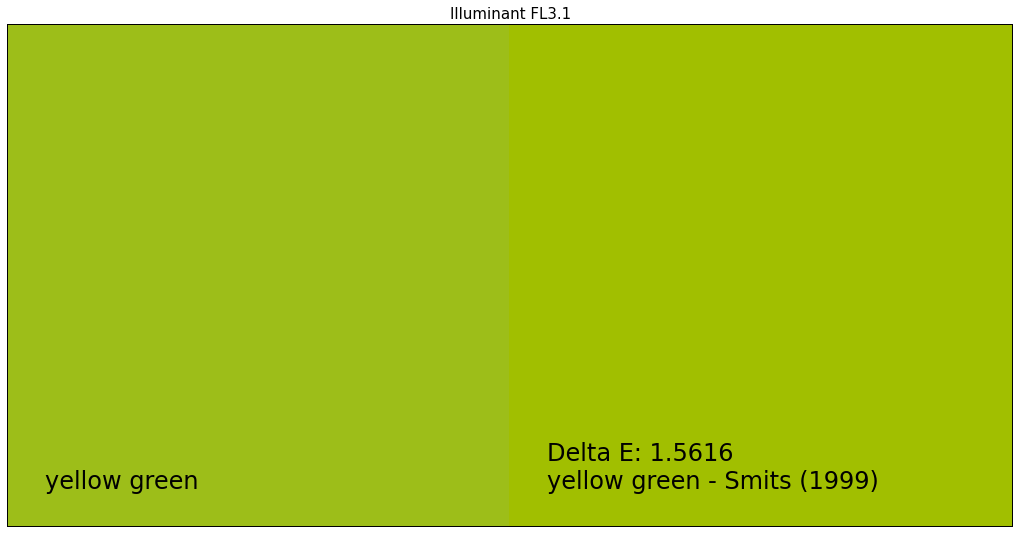

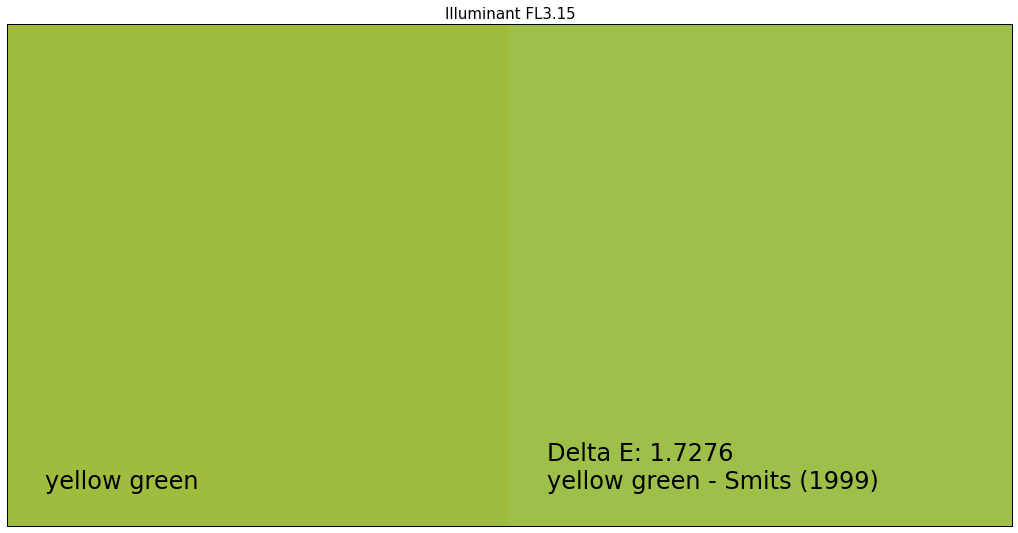

*                                                                             *
*   "orange yellow" - Reflectance Recovery                                    *
*                                                                             *


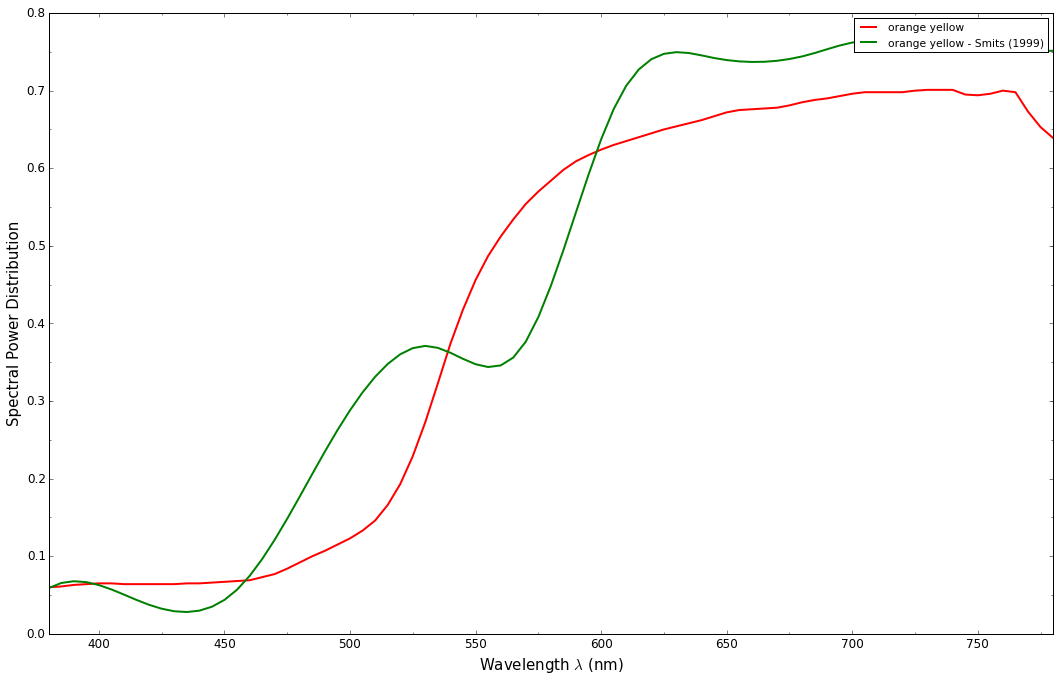

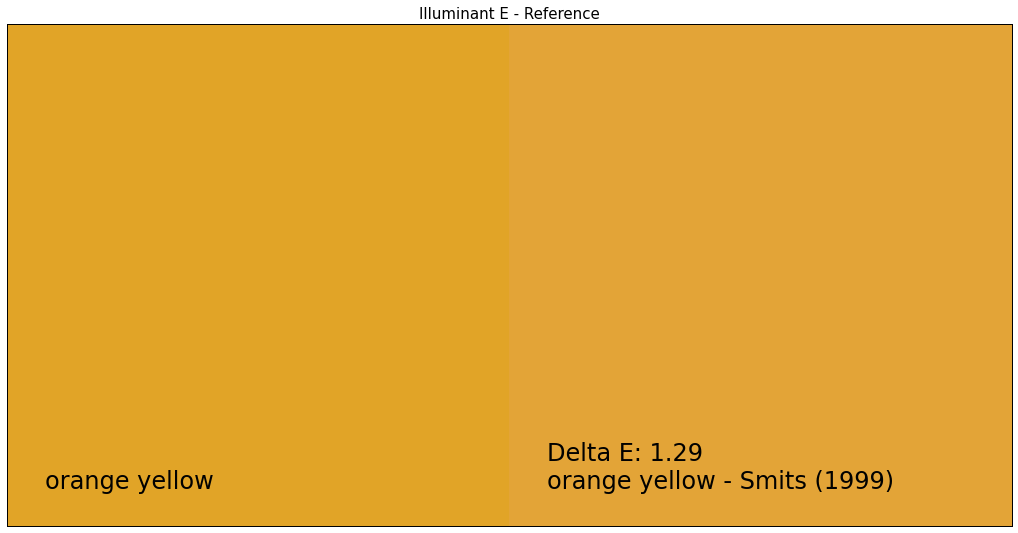

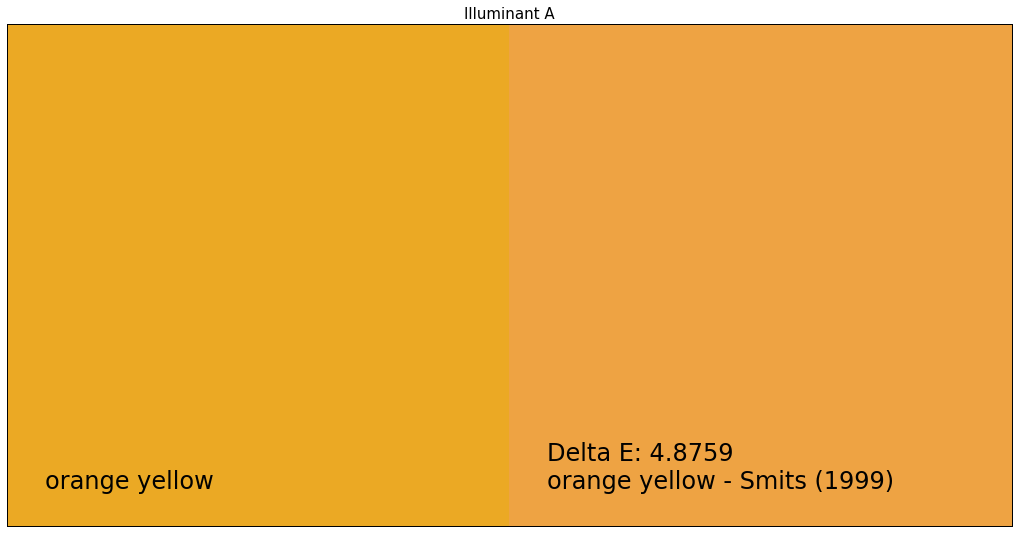

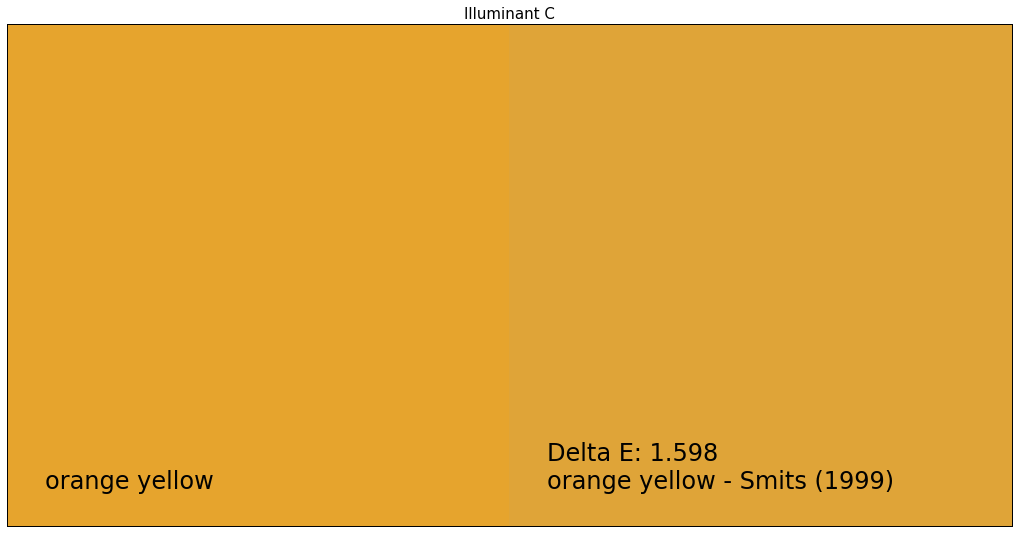

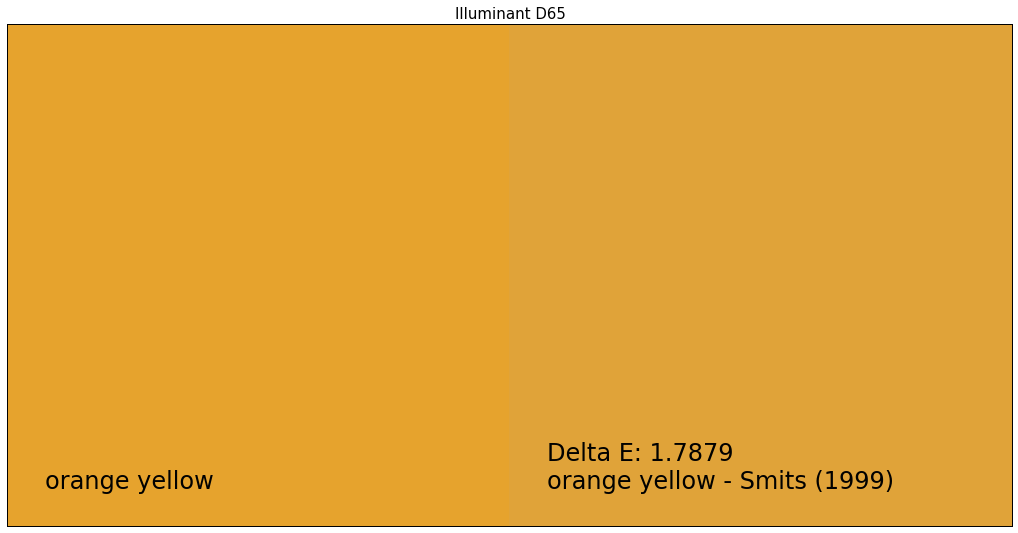

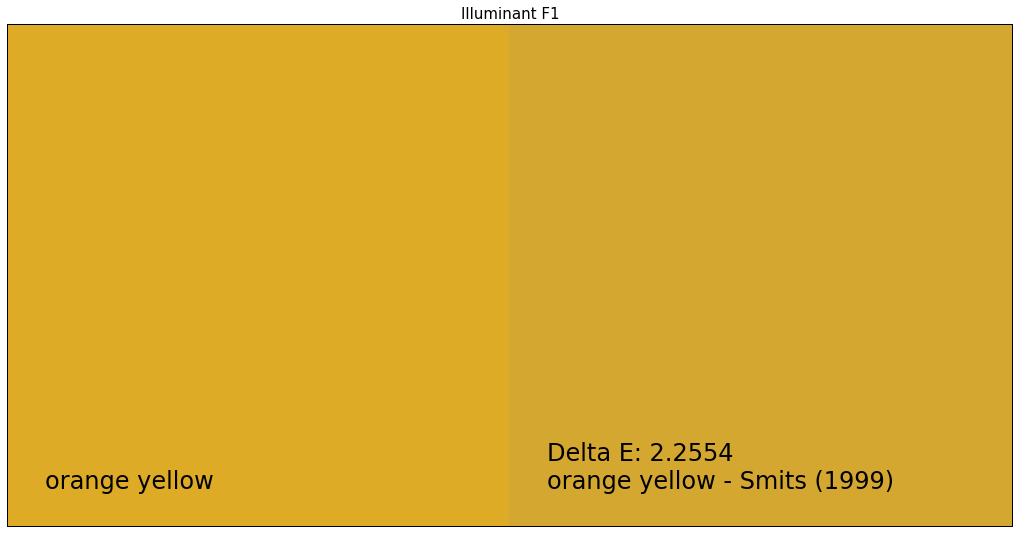

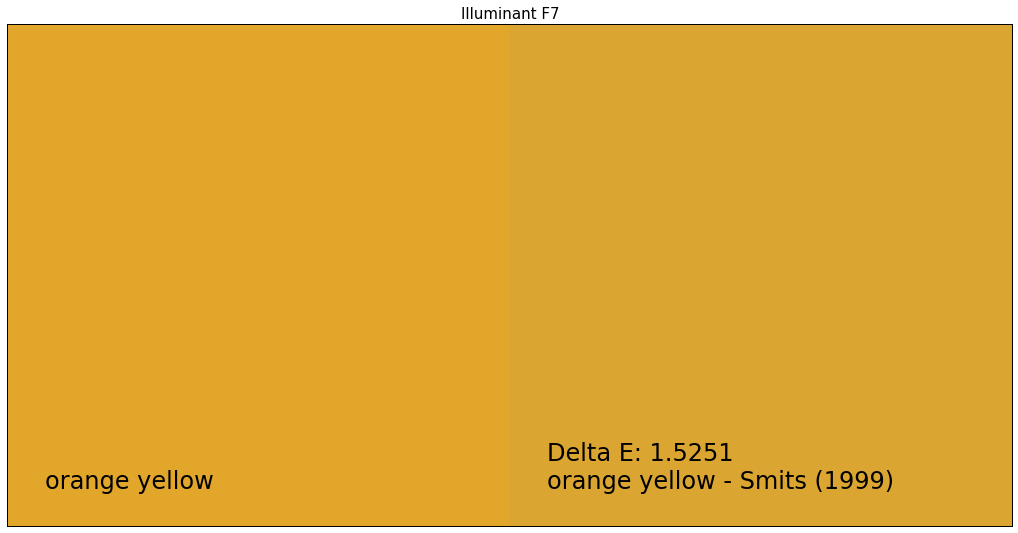

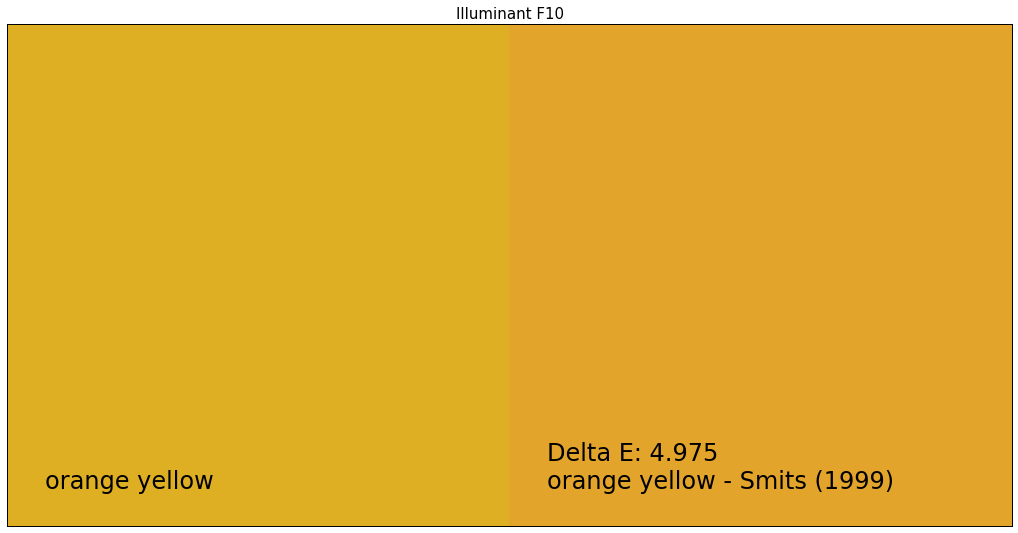

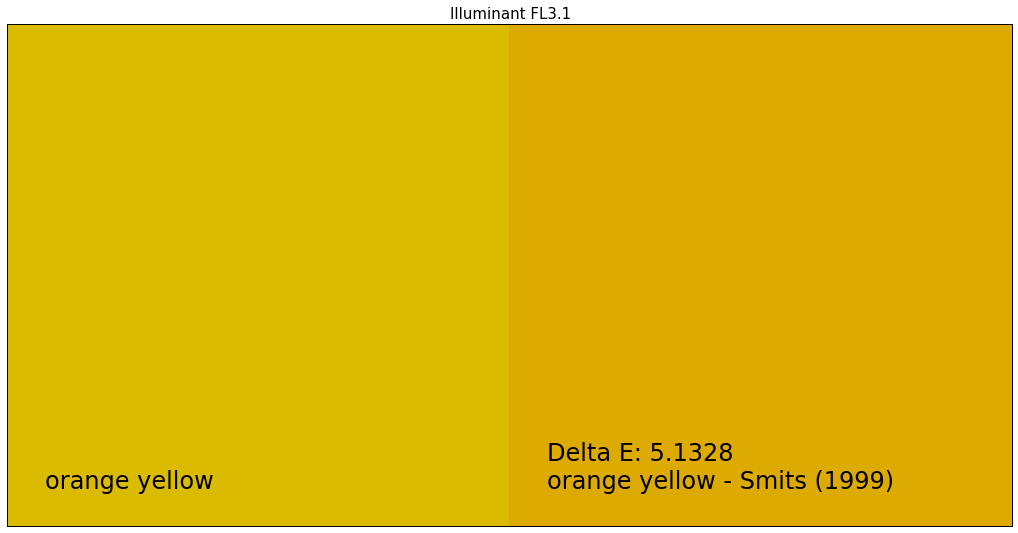

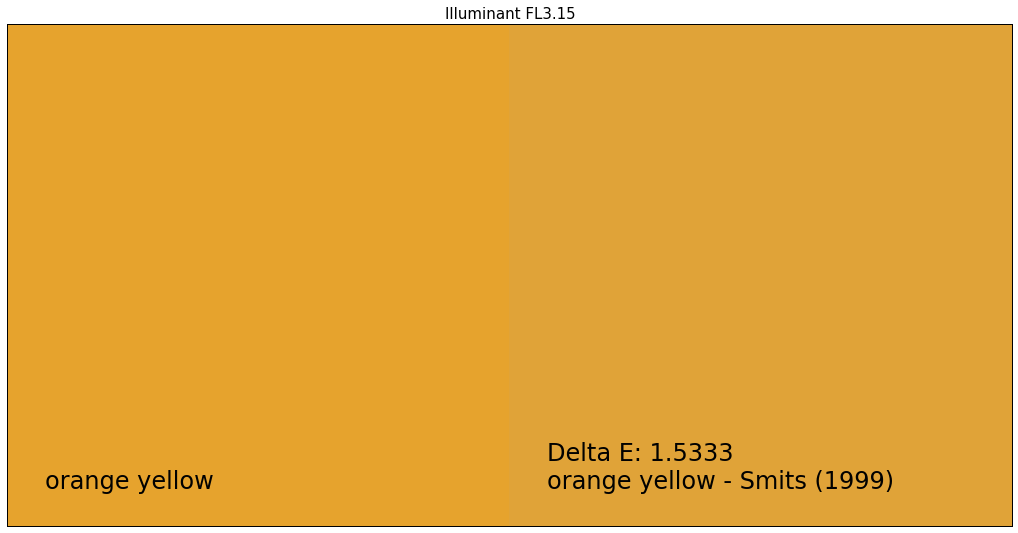

*                                                                             *
*   "blue" - Reflectance Recovery                                             *
*                                                                             *


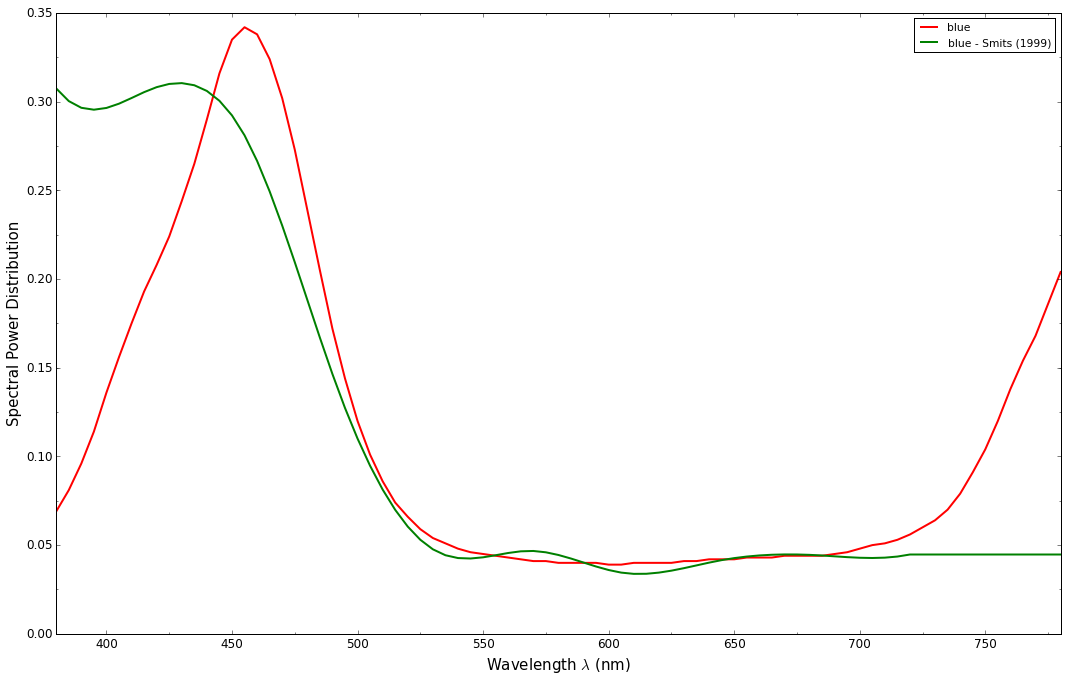

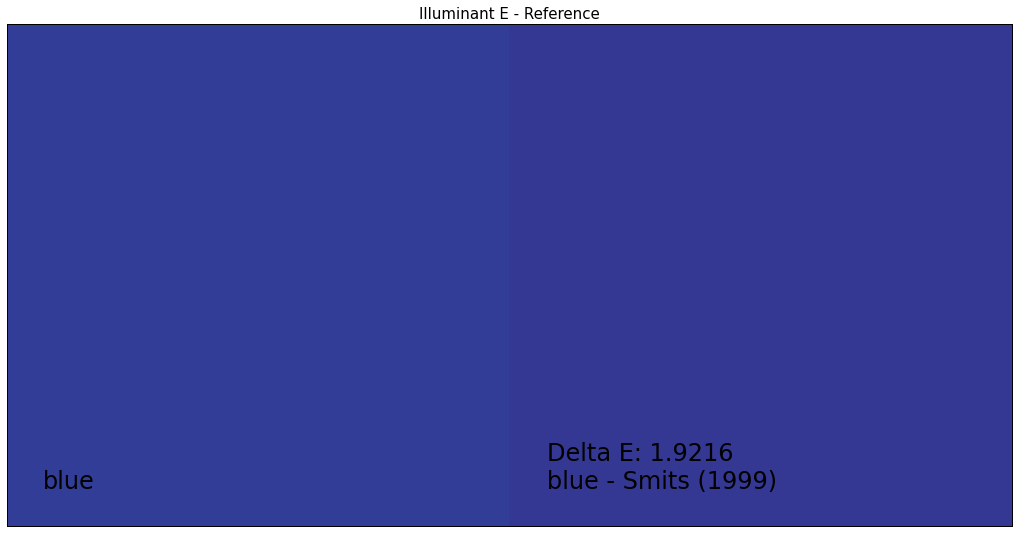

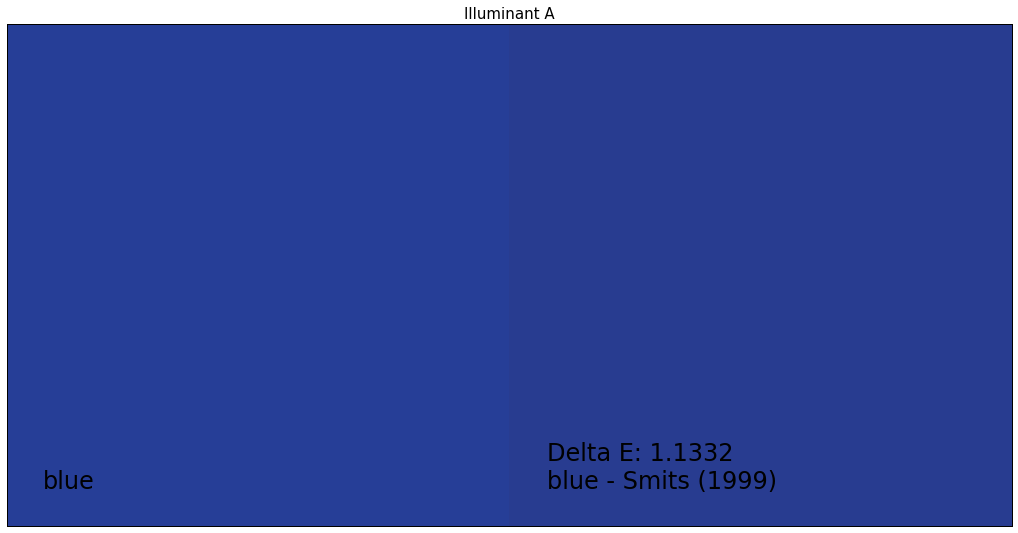

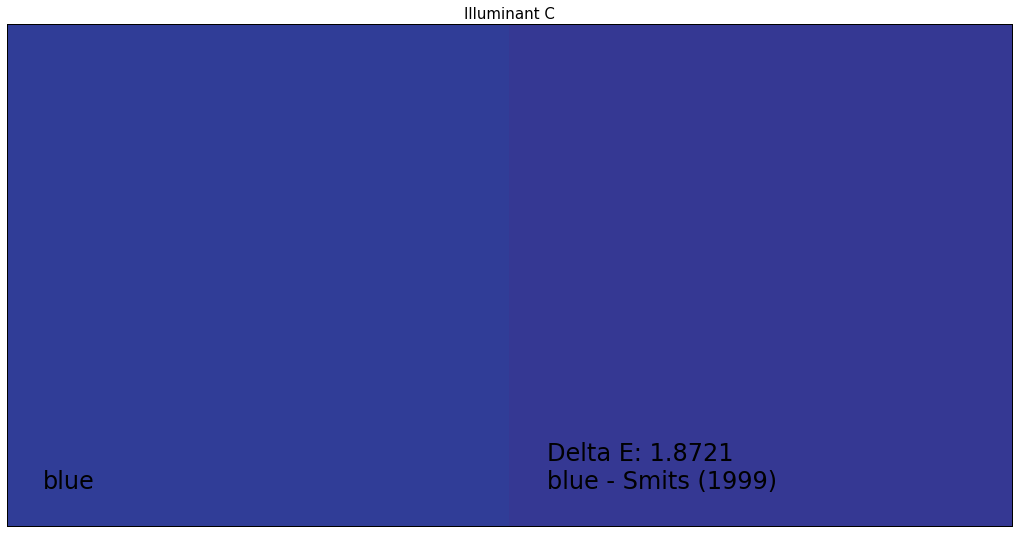

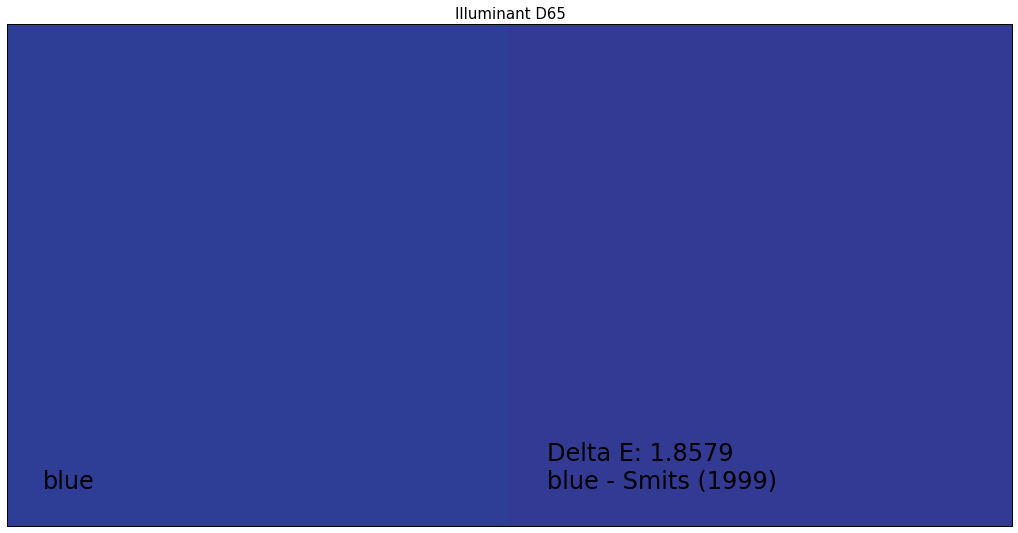

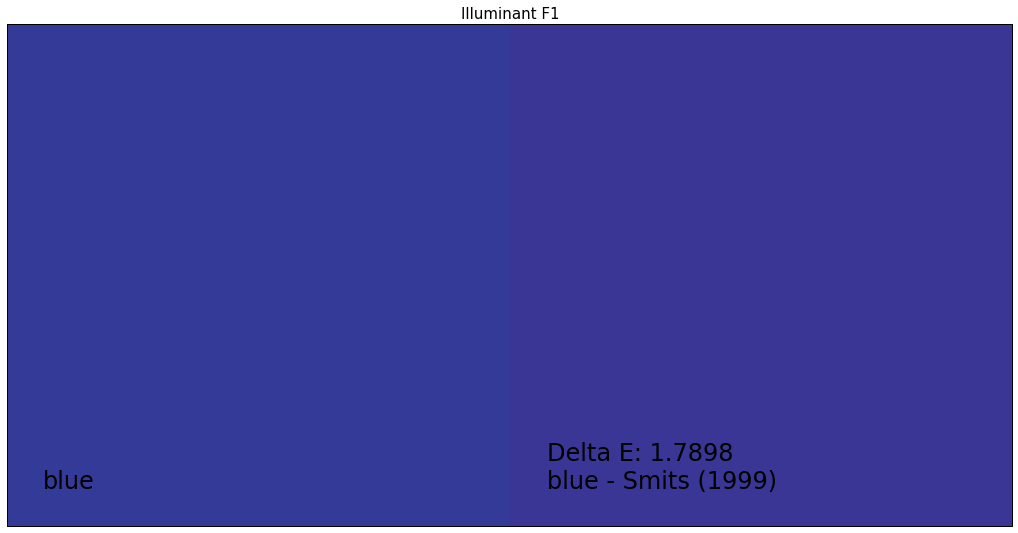

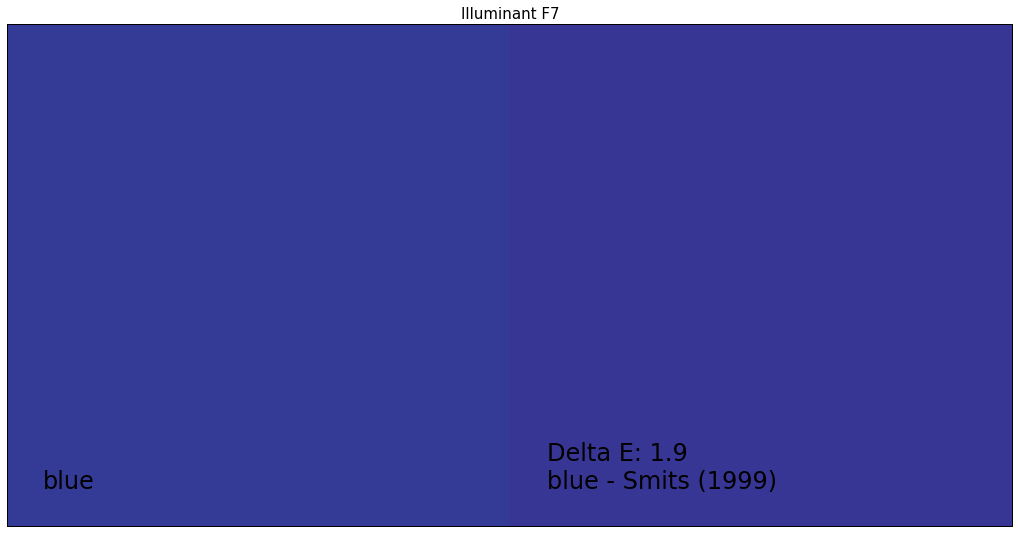

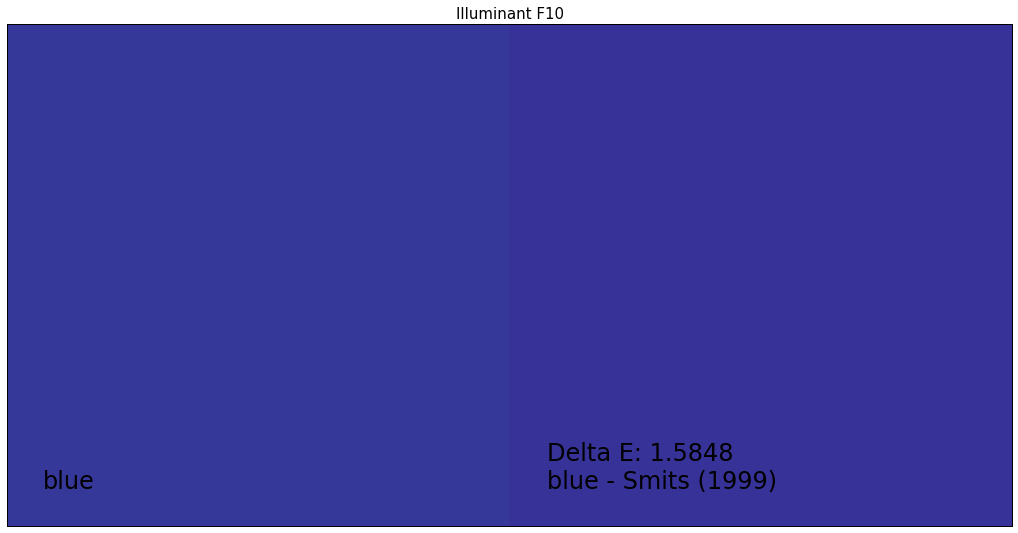

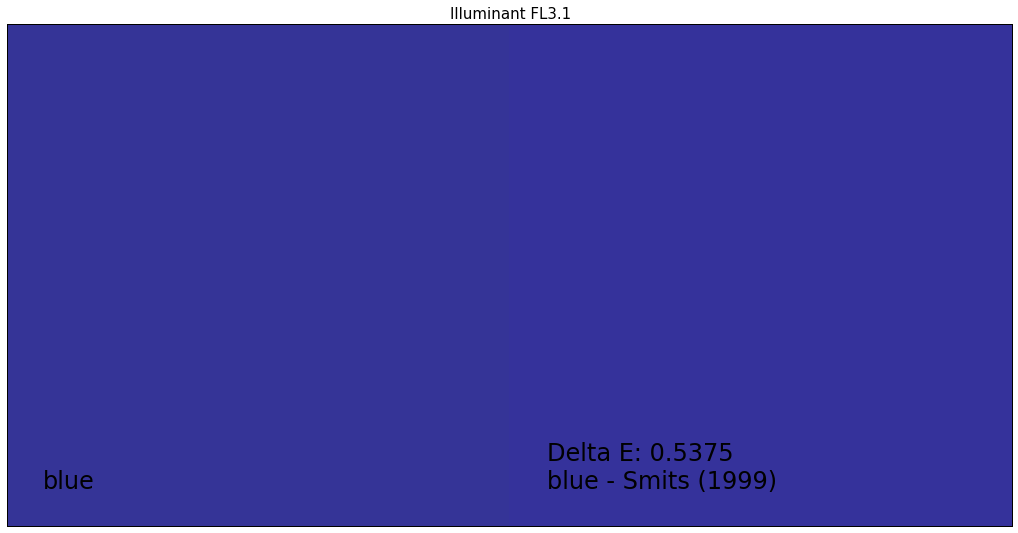

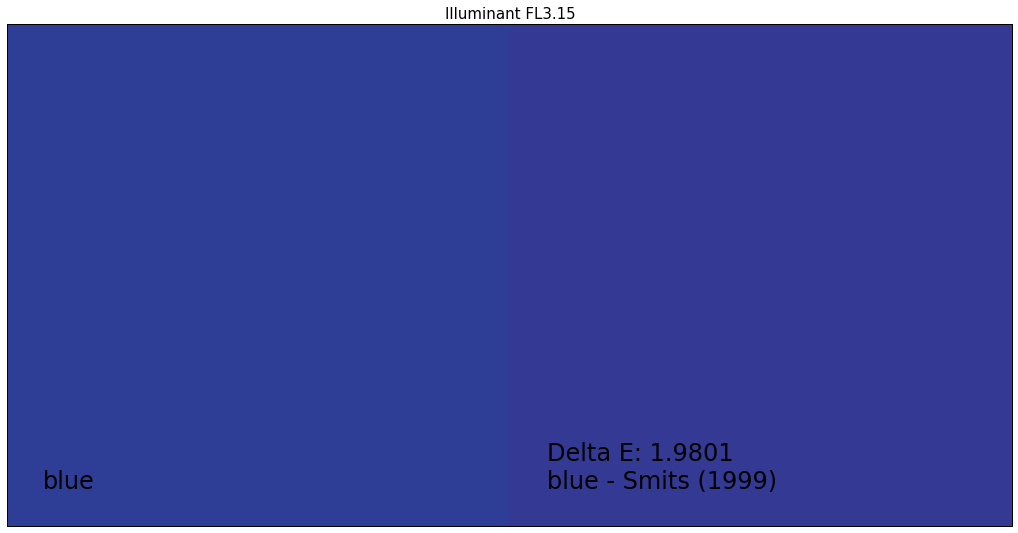

*                                                                             *
*   "green" - Reflectance Recovery                                            *
*                                                                             *


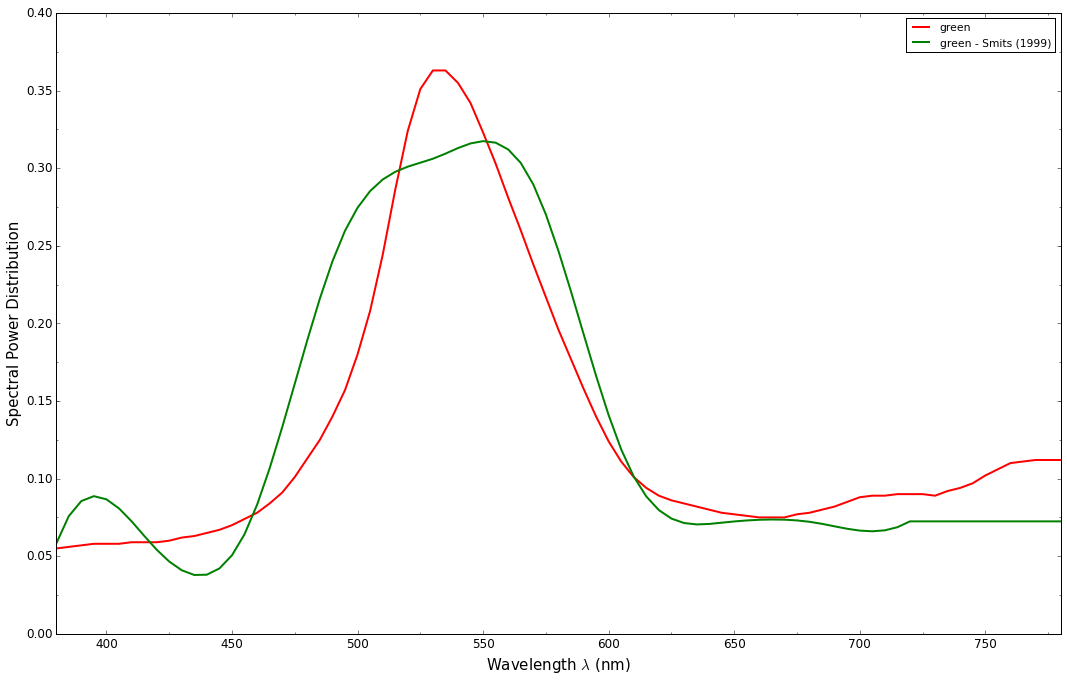

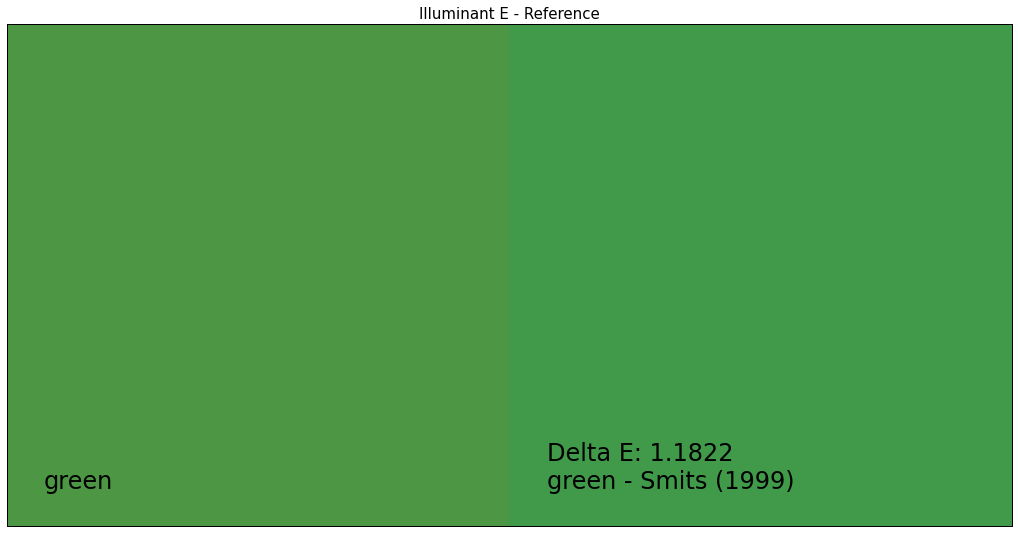

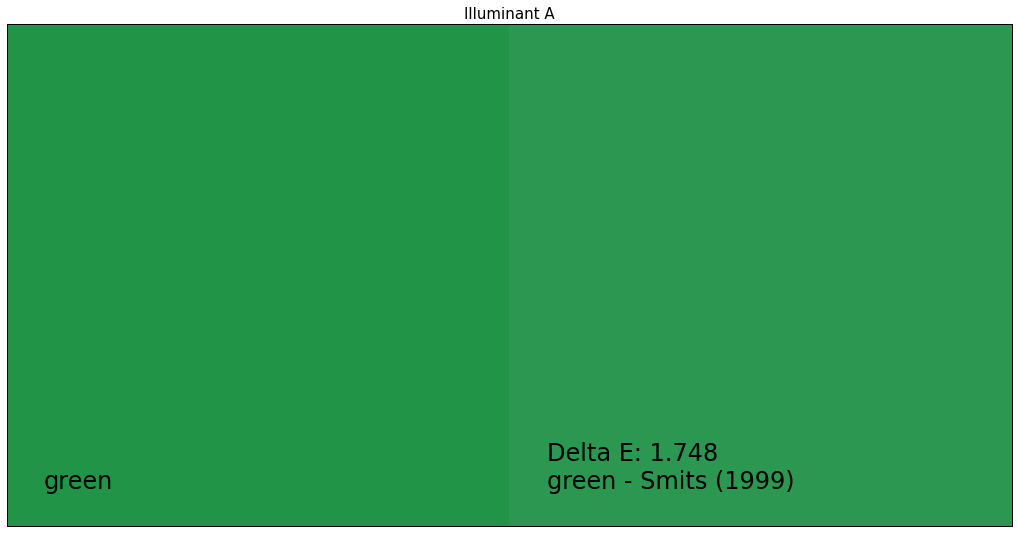

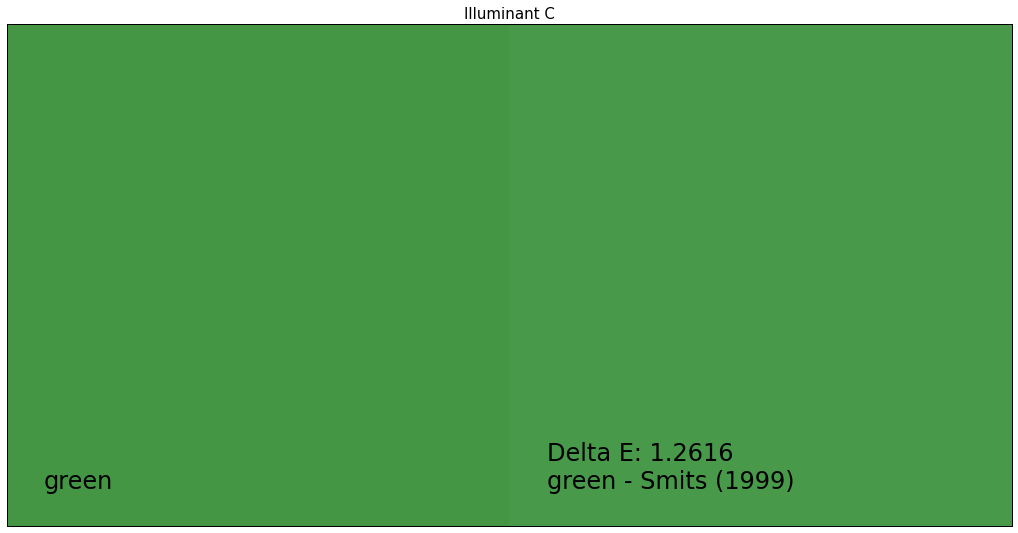

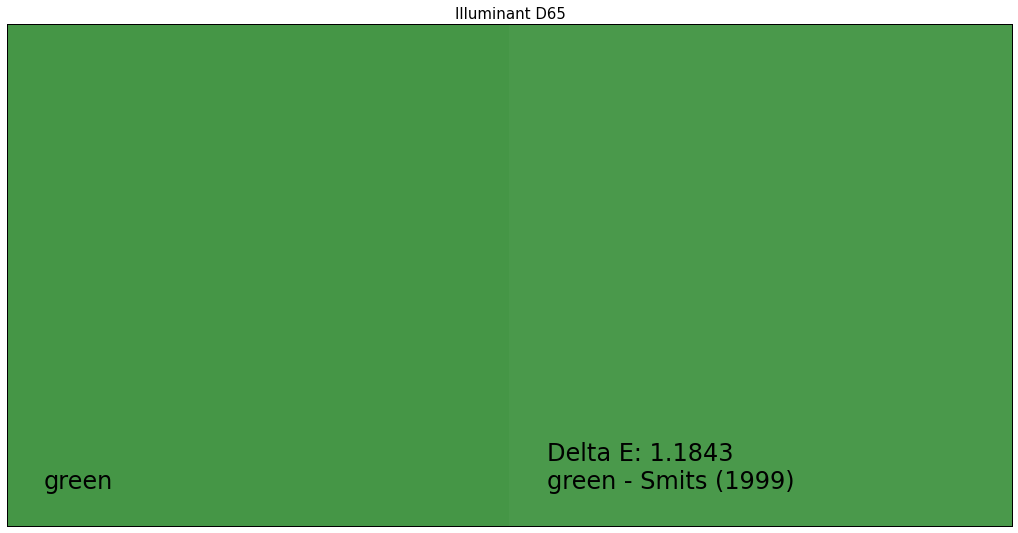

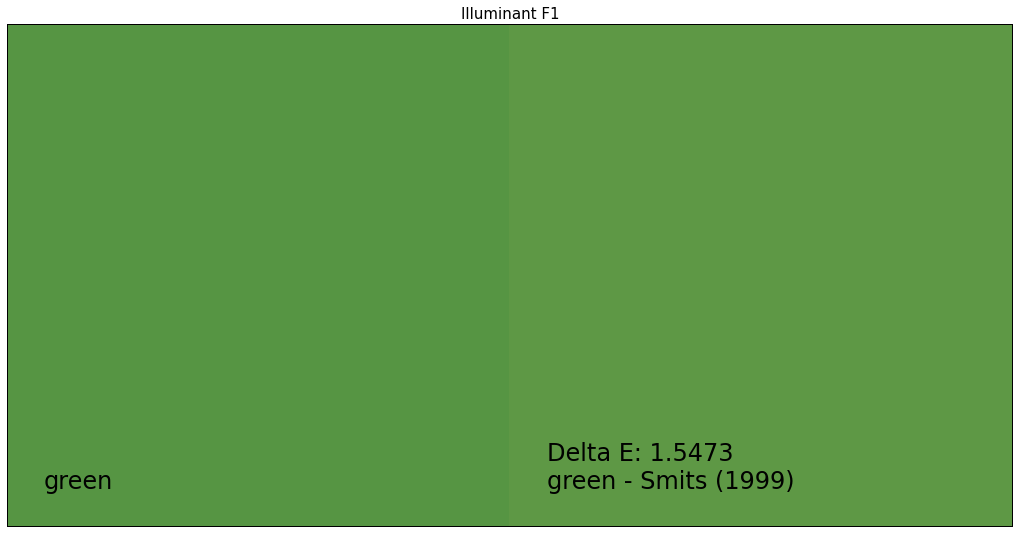

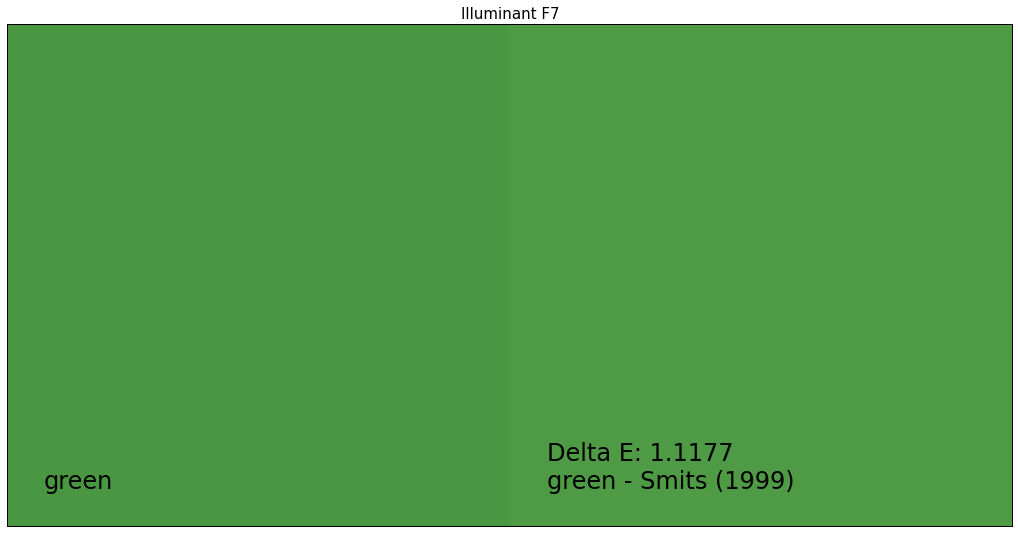

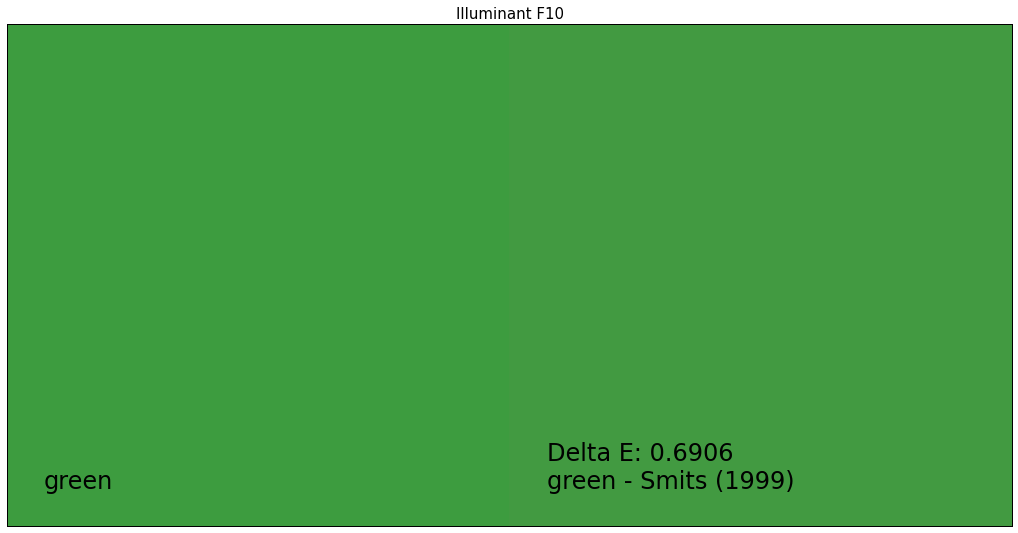

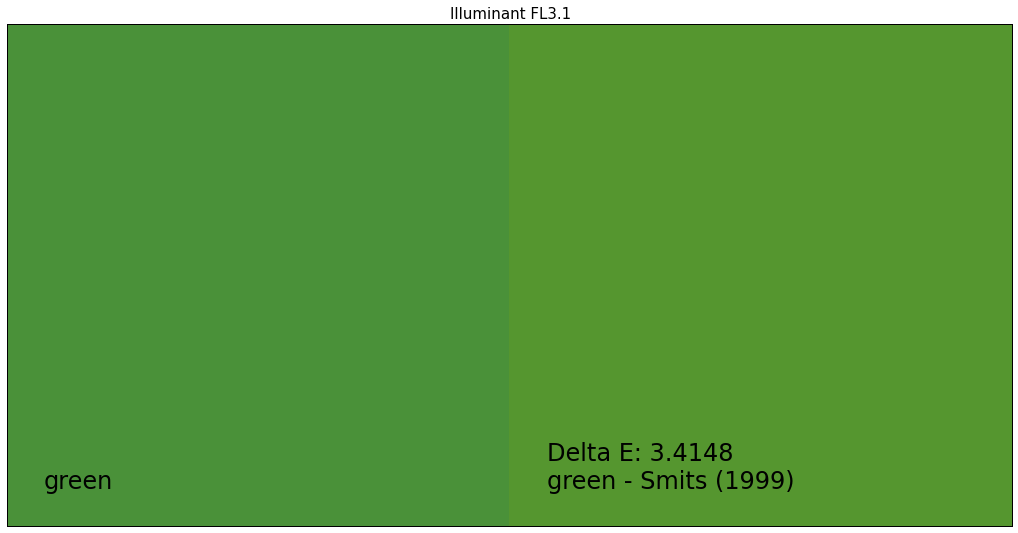

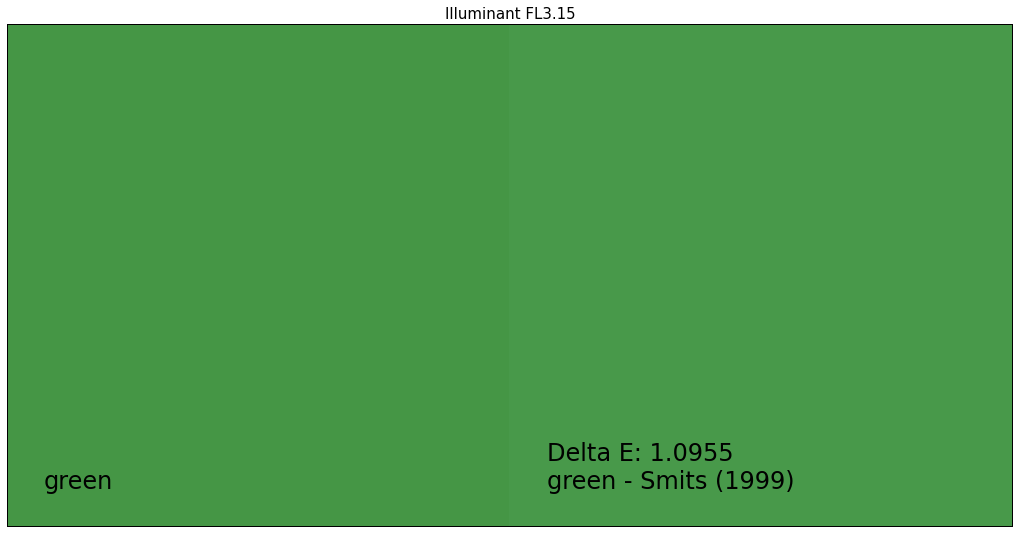

*                                                                             *
*   "red" - Reflectance Recovery                                              *
*                                                                             *


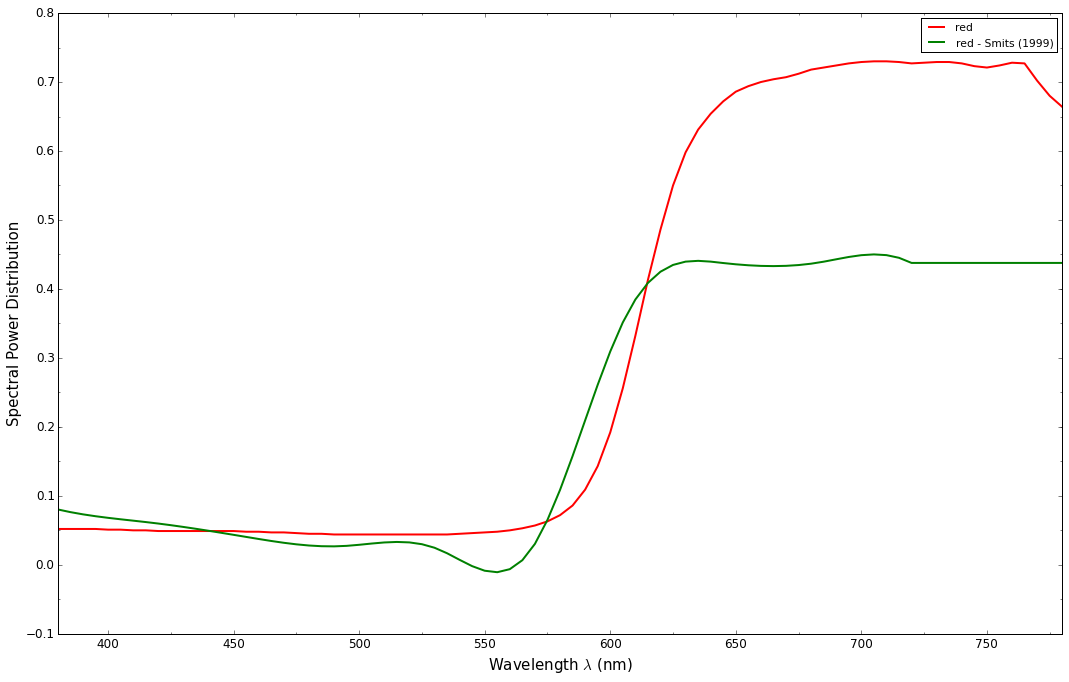

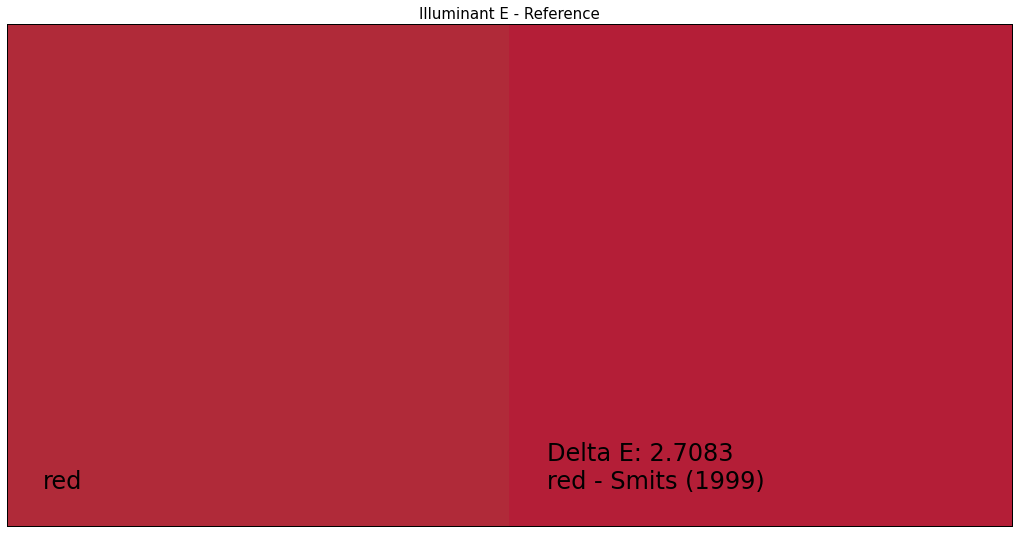

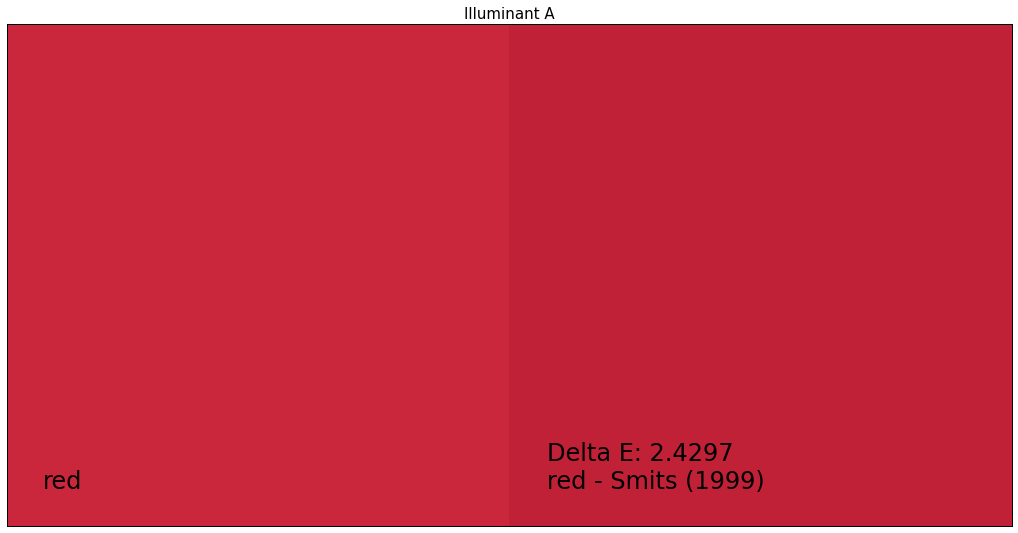

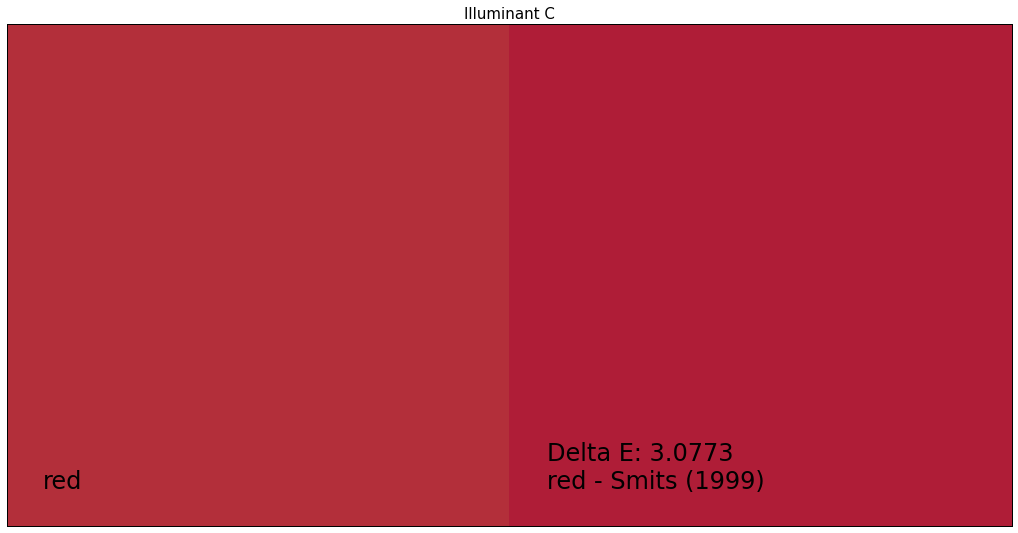

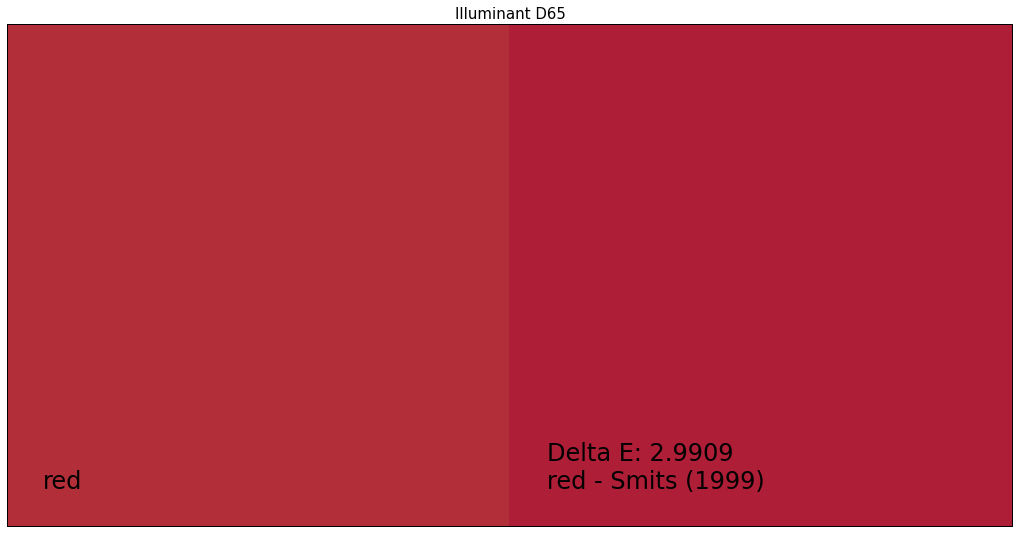

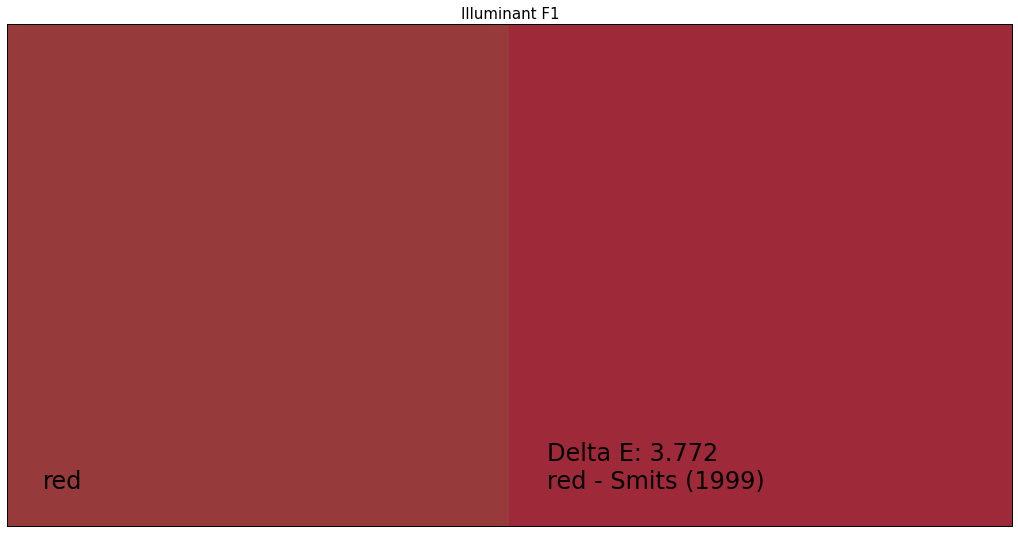

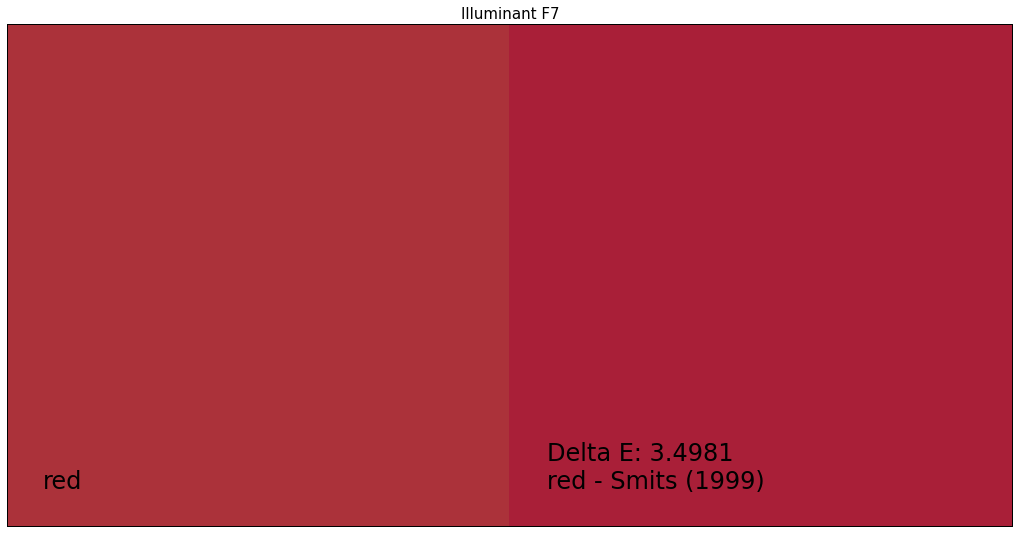

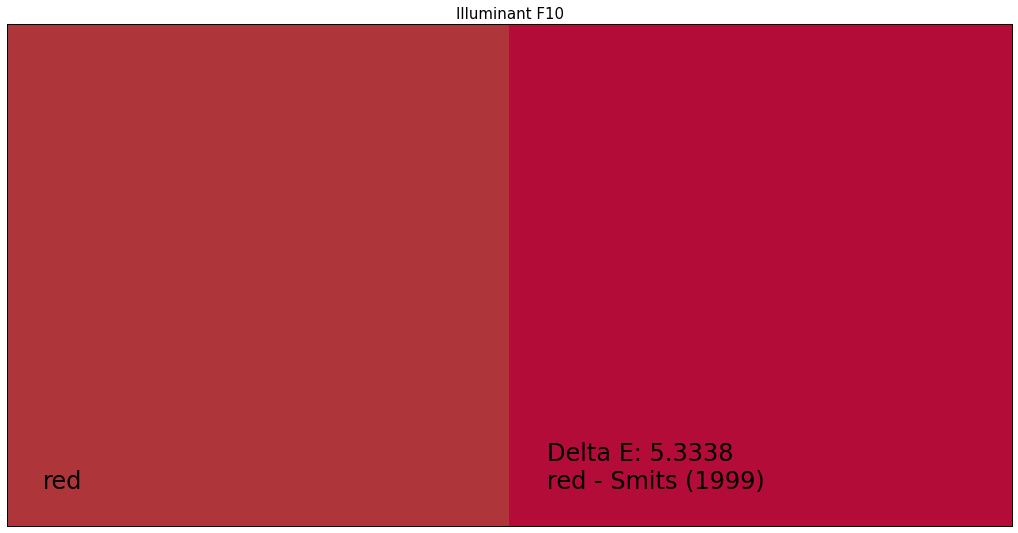

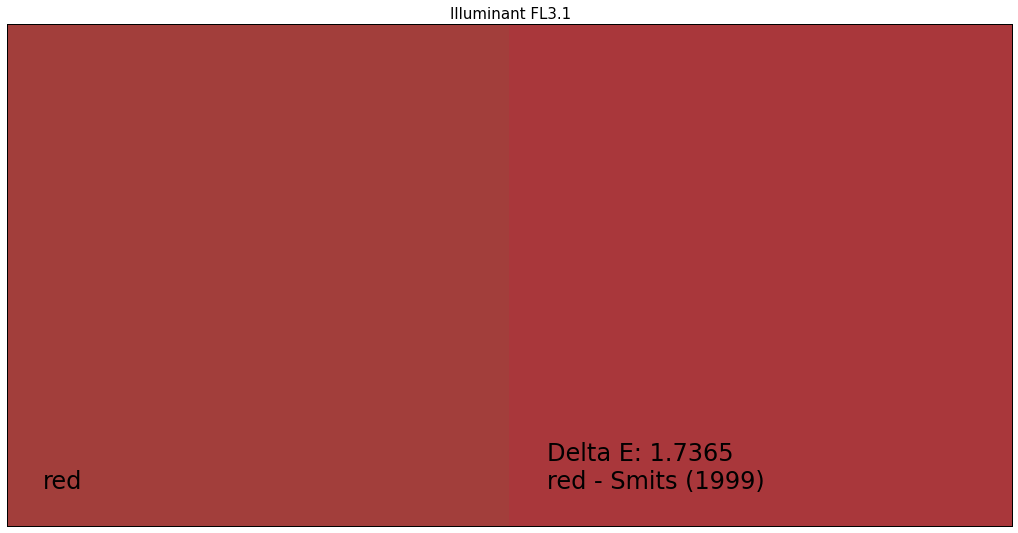

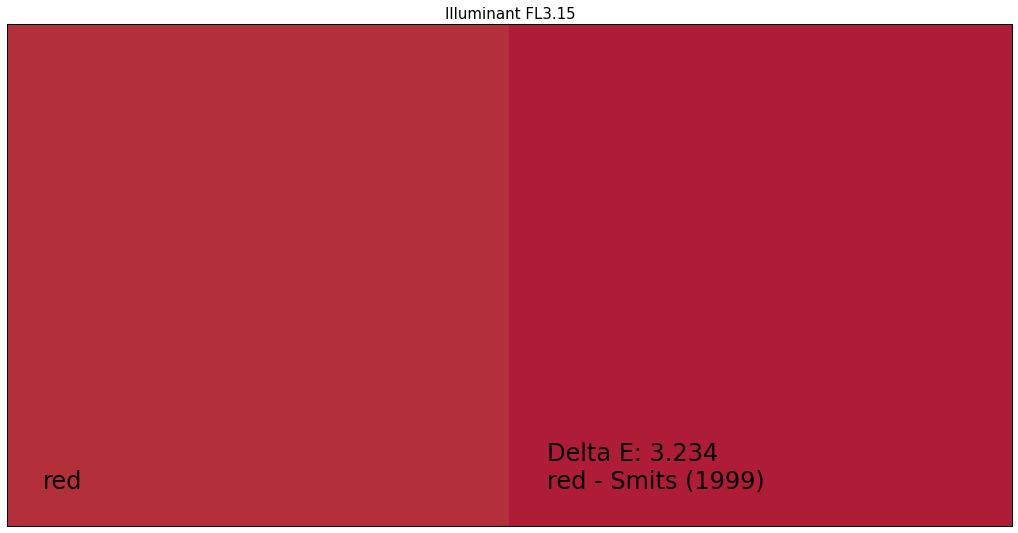

*                                                                             *
*   "yellow" - Reflectance Recovery                                           *
*                                                                             *


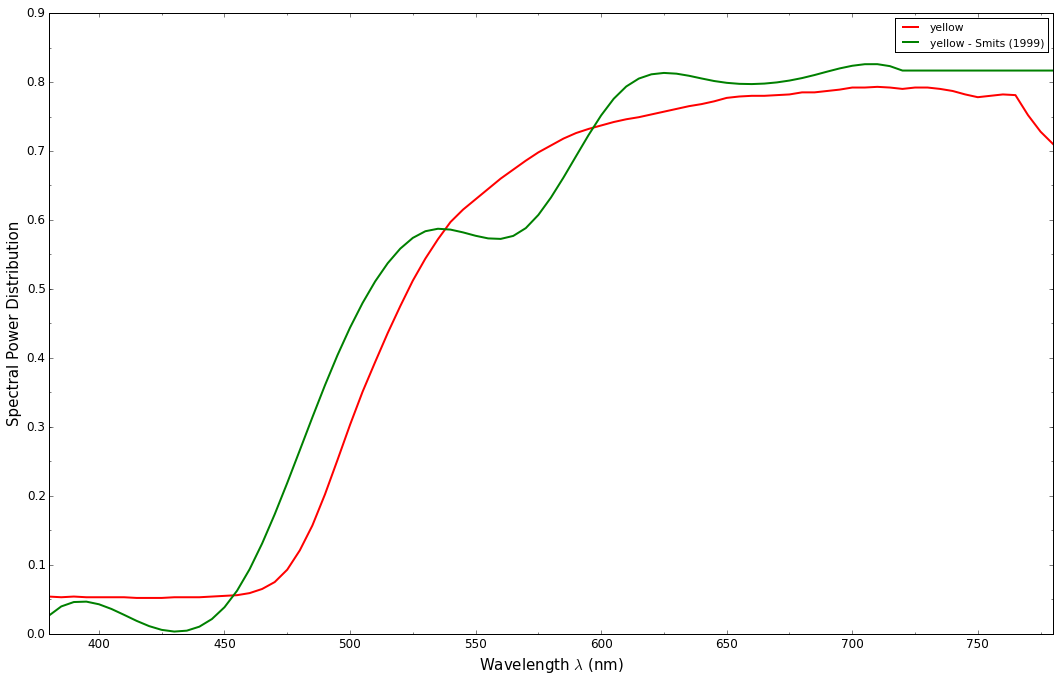

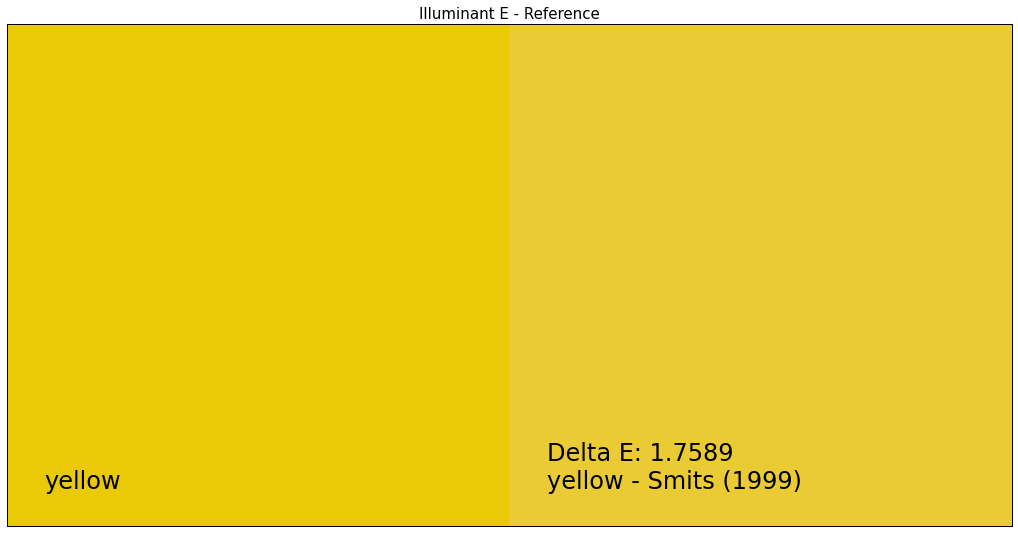

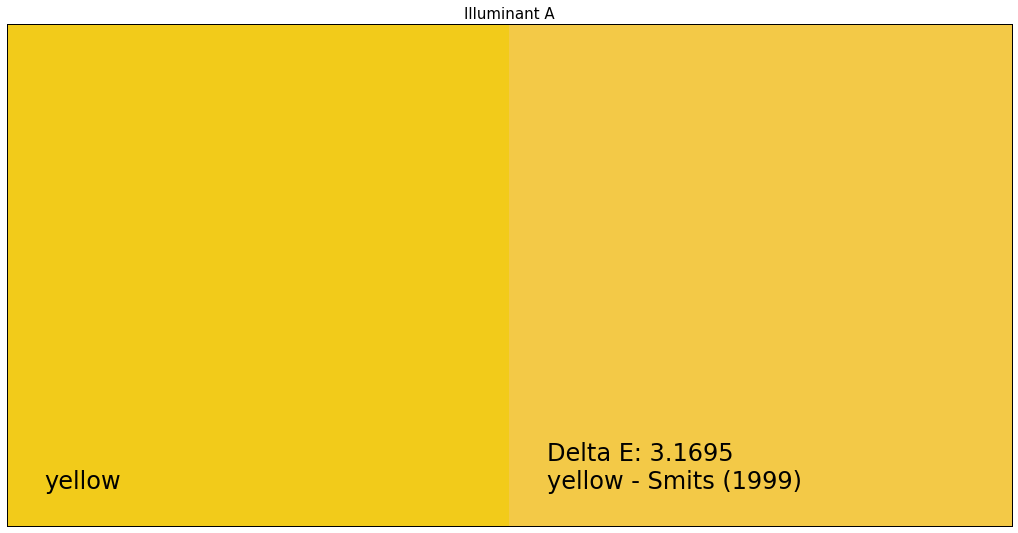

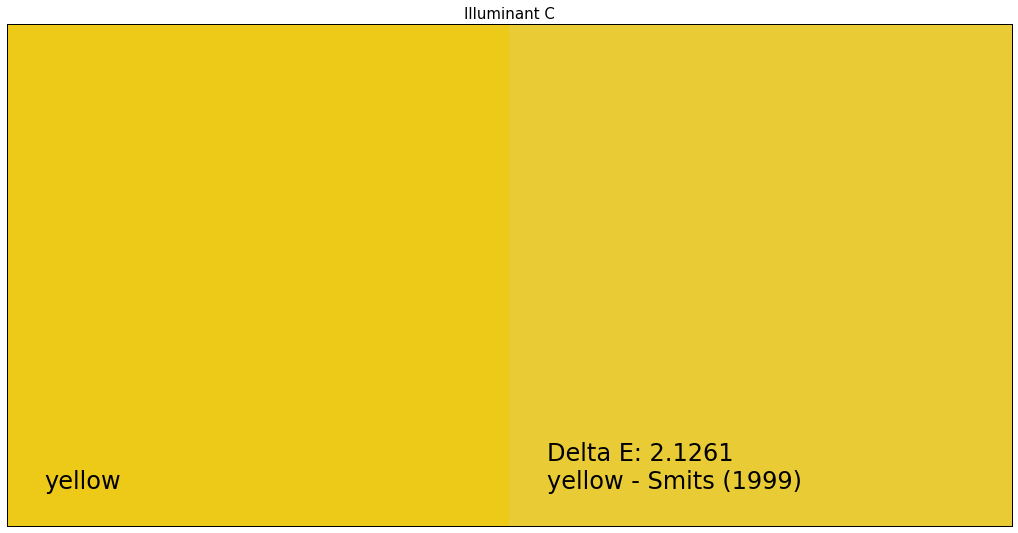

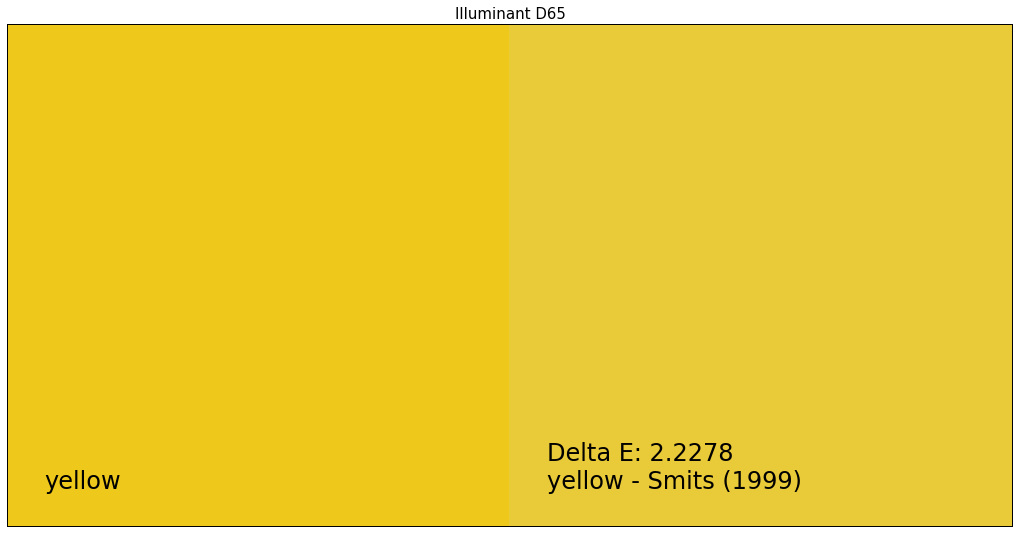

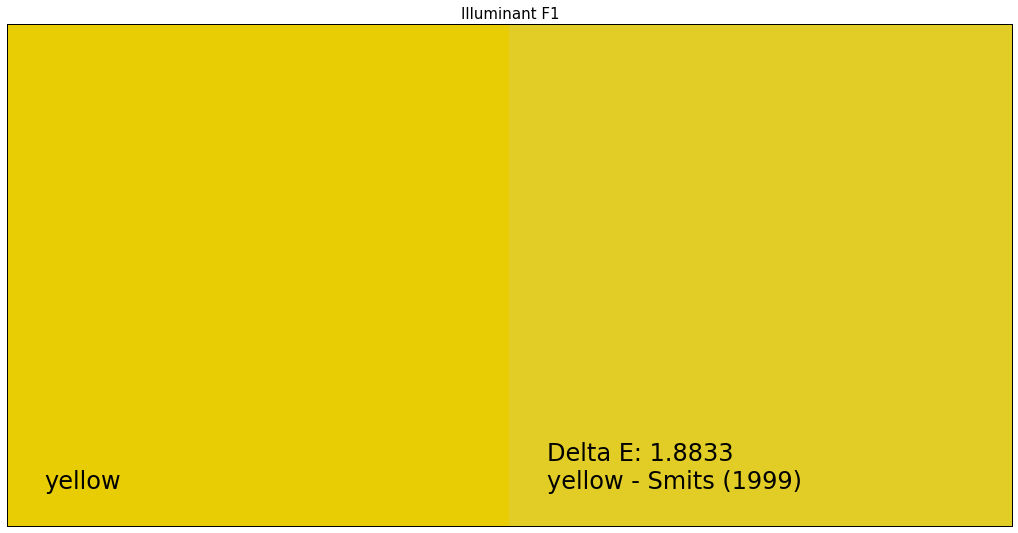

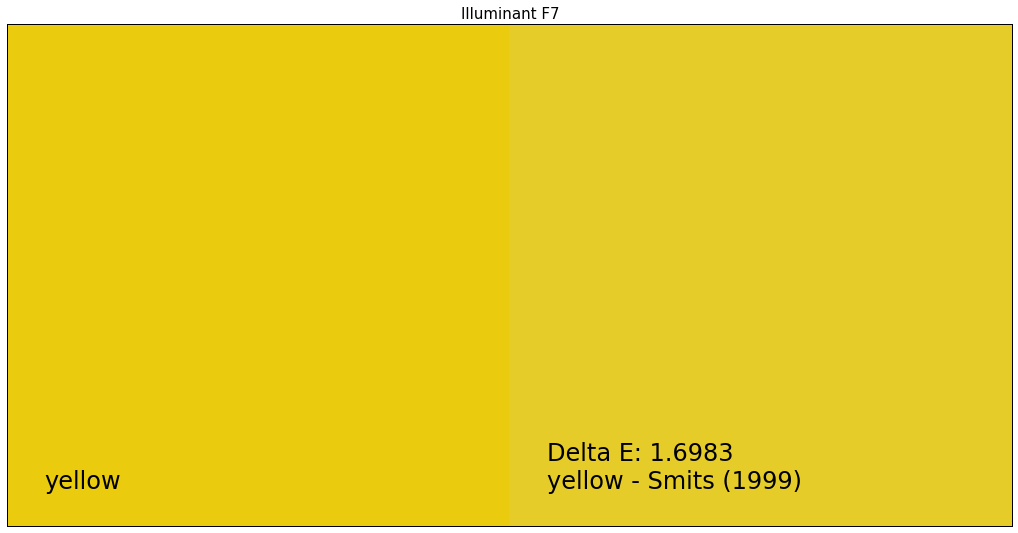

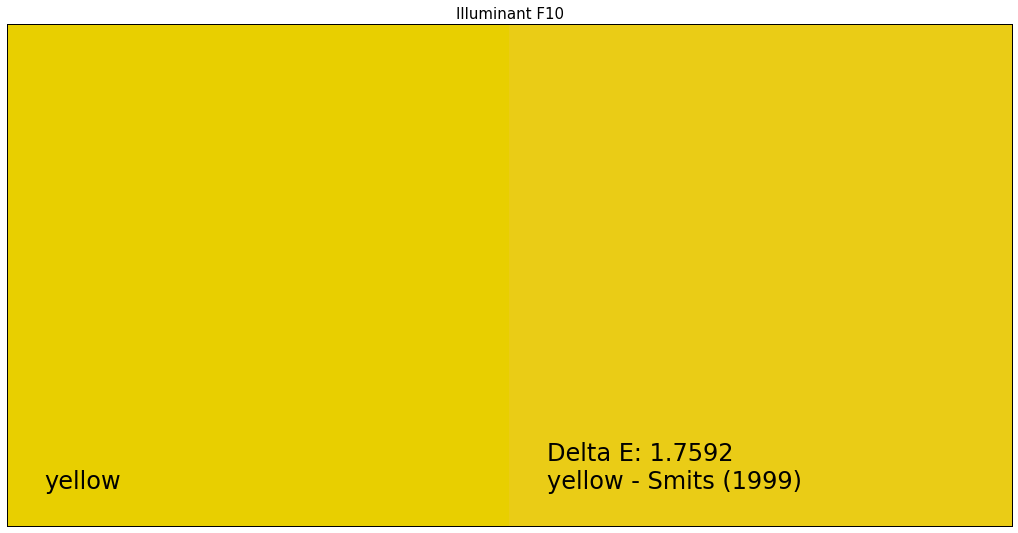

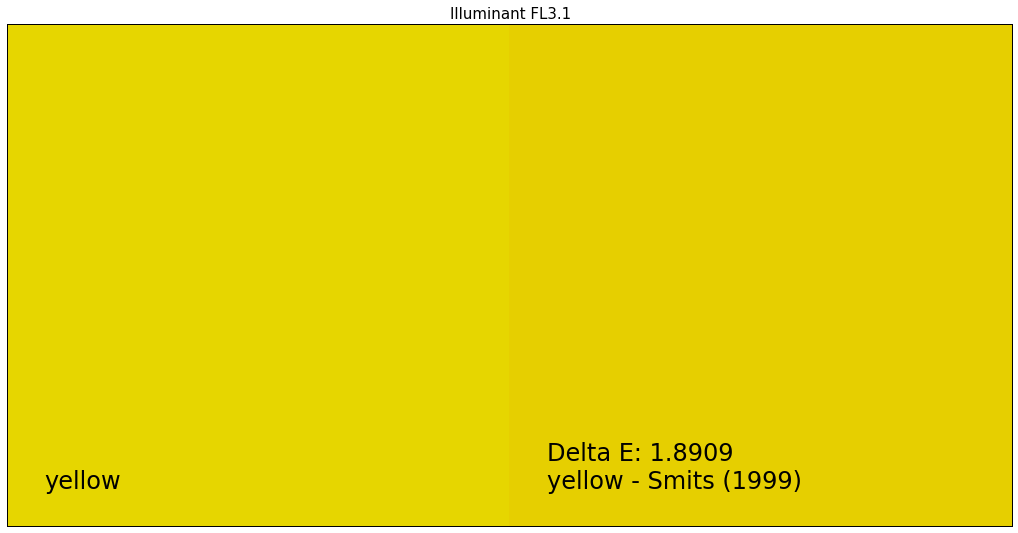

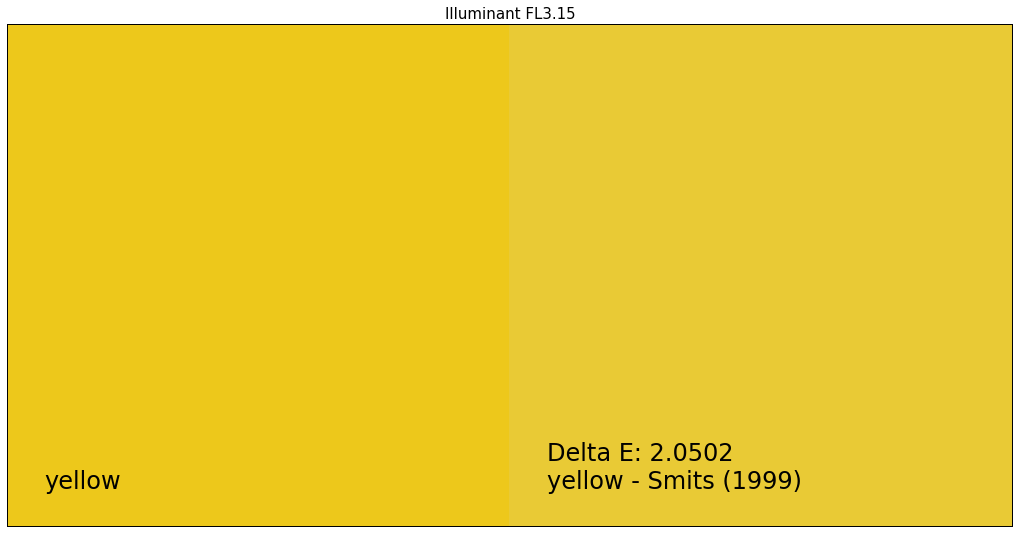

*                                                                             *
*   "magenta" - Reflectance Recovery                                          *
*                                                                             *


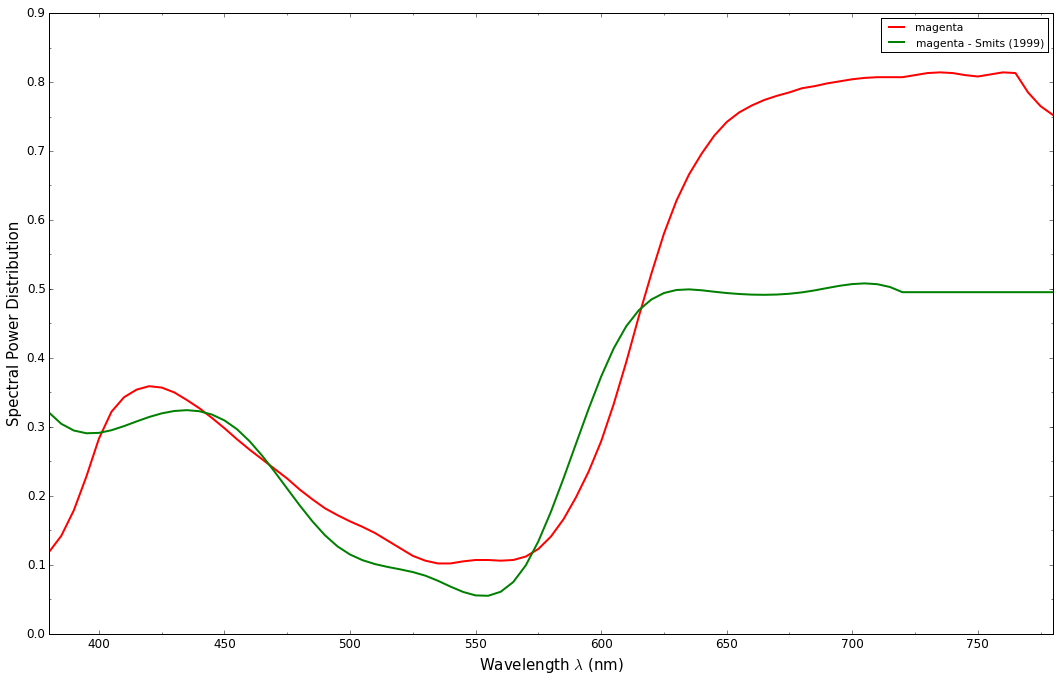

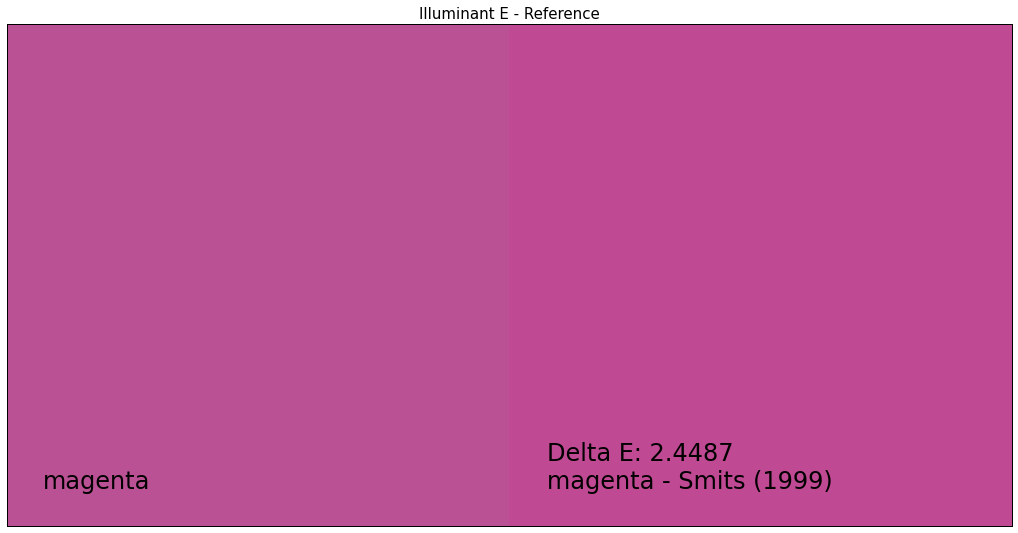

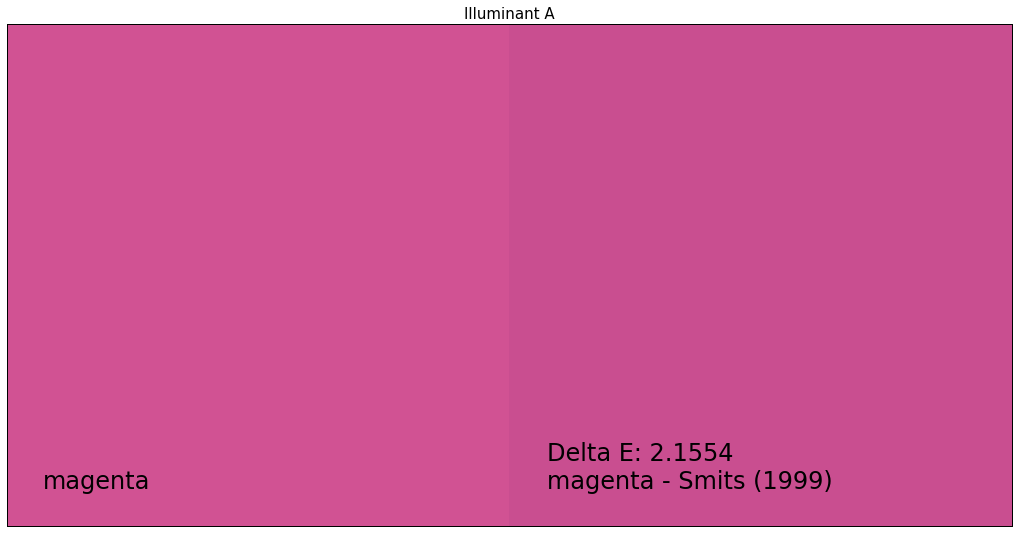

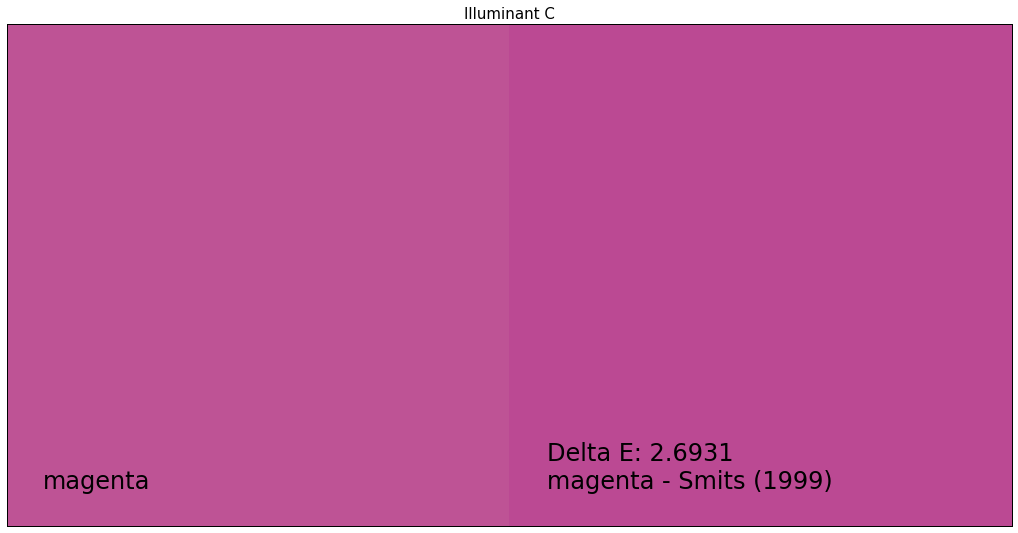

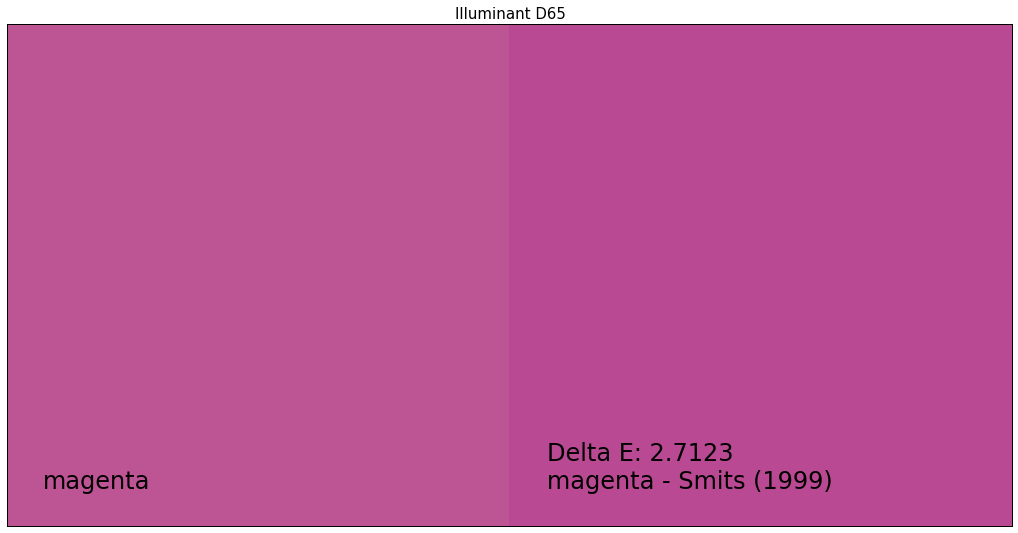

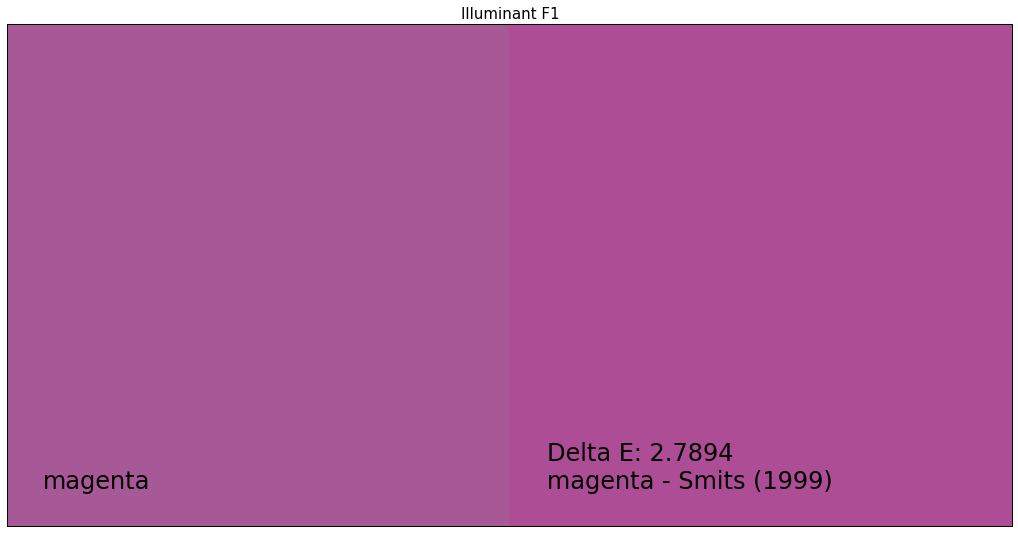

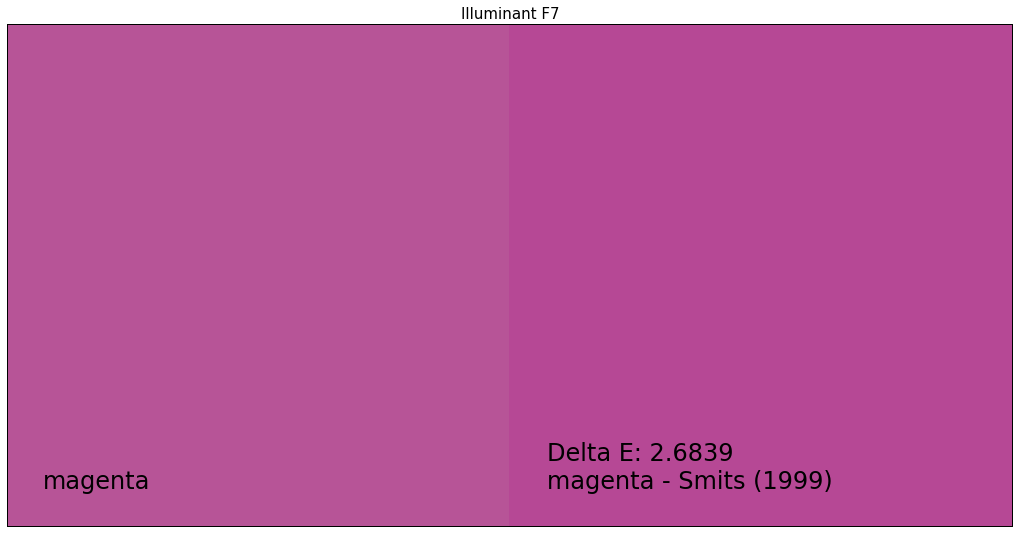

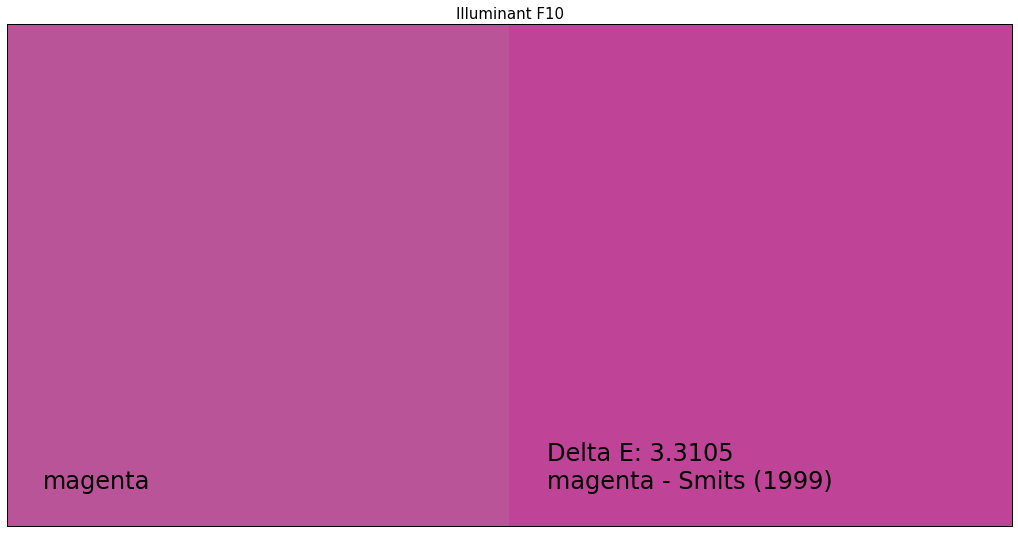

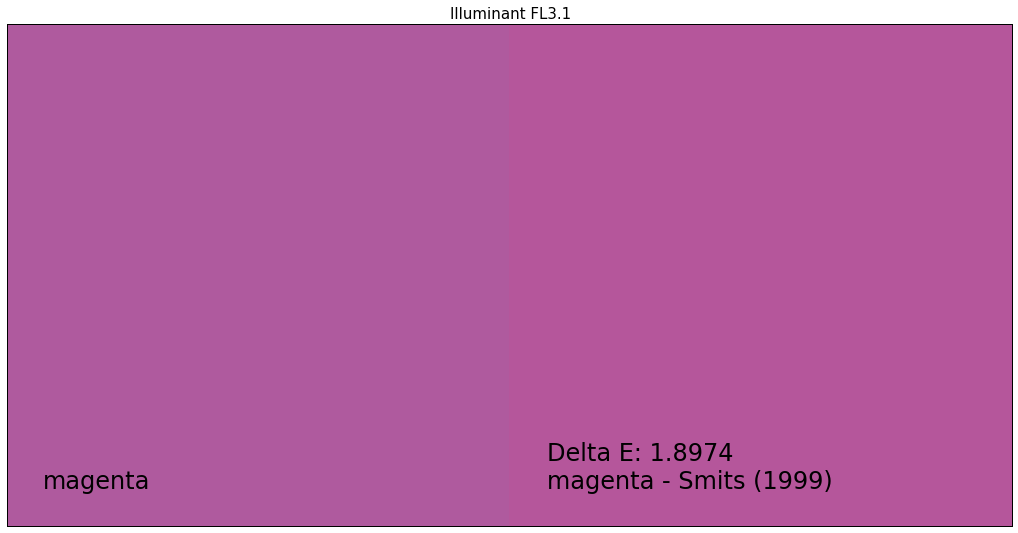

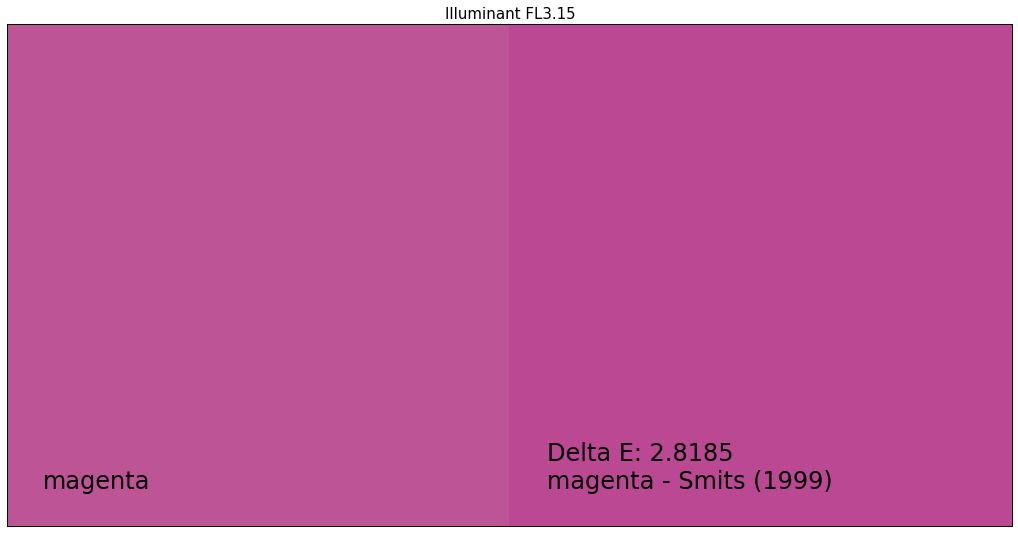

*                                                                             *
*   "cyan" - Reflectance Recovery                                             *
*                                                                             *


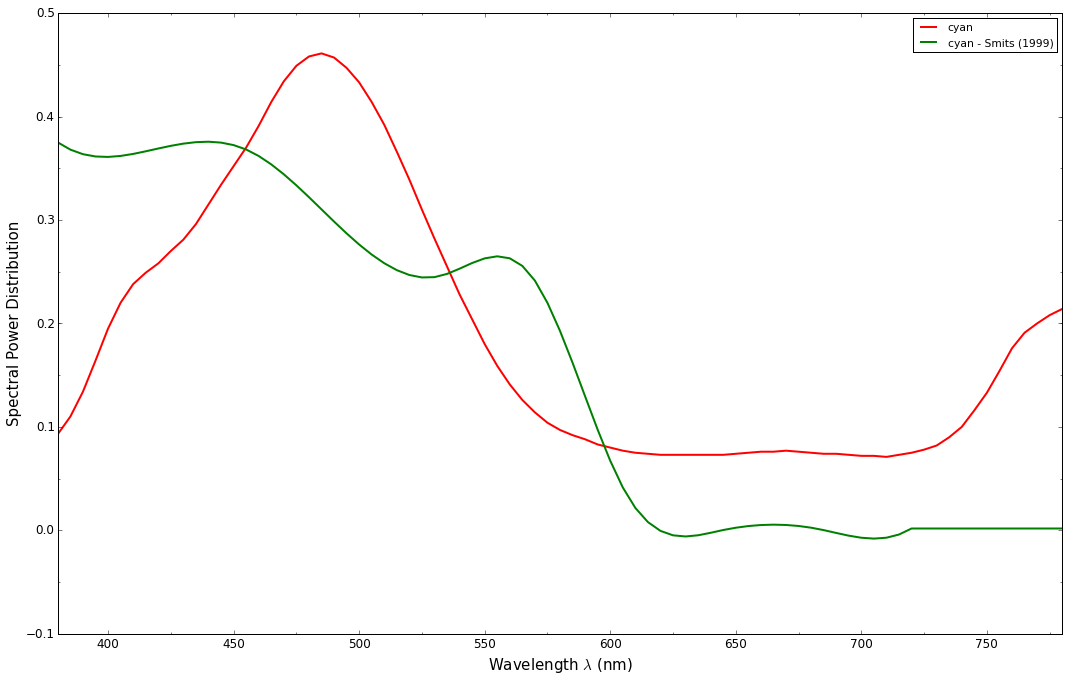

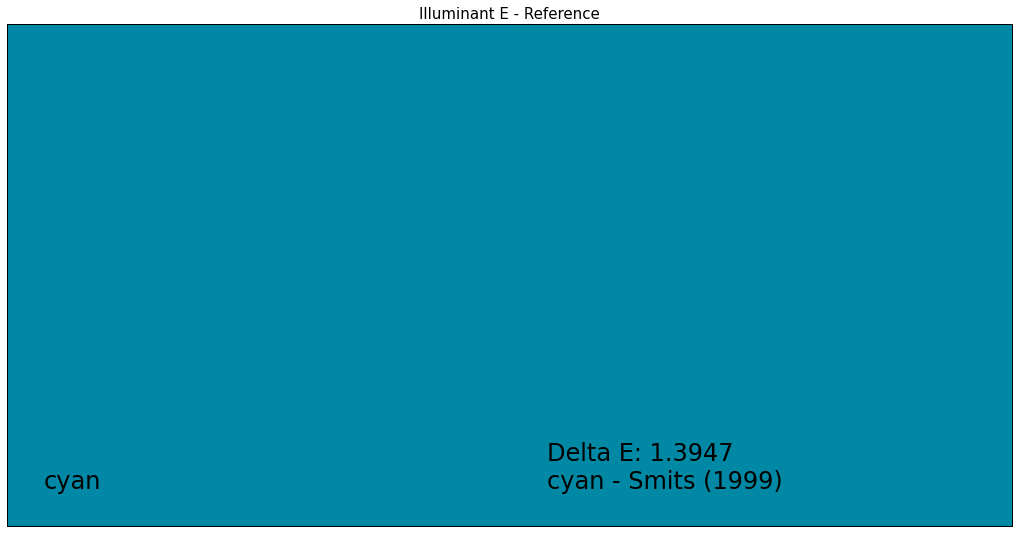

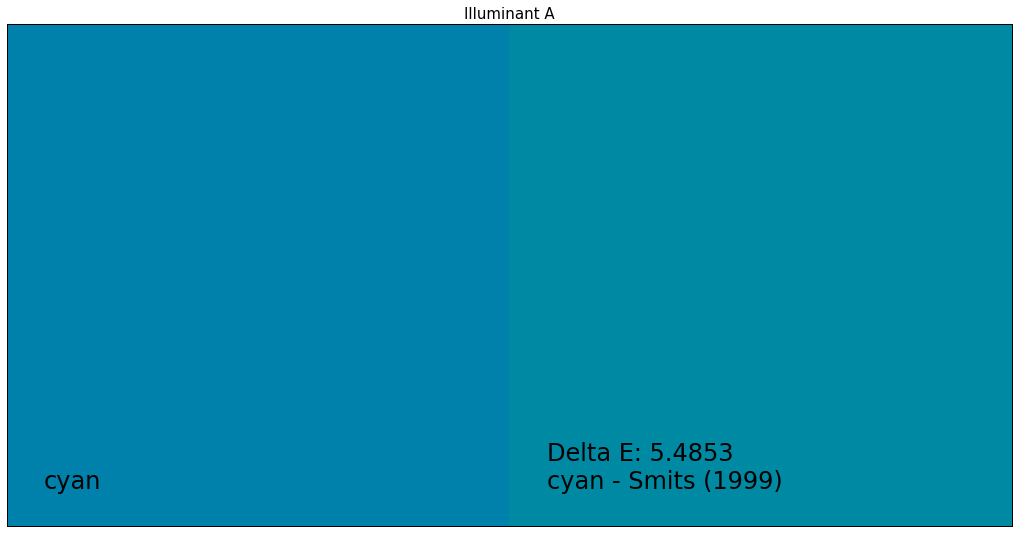

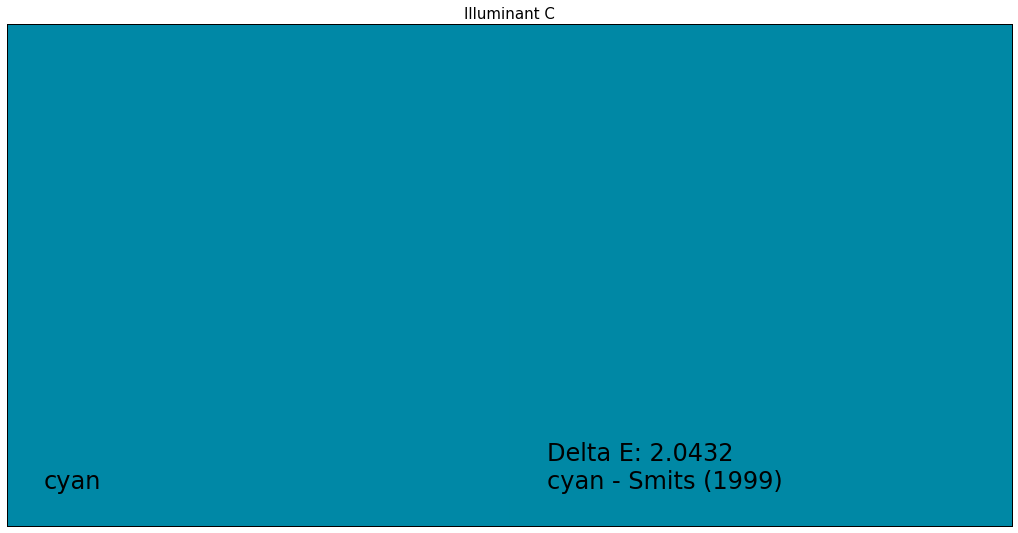

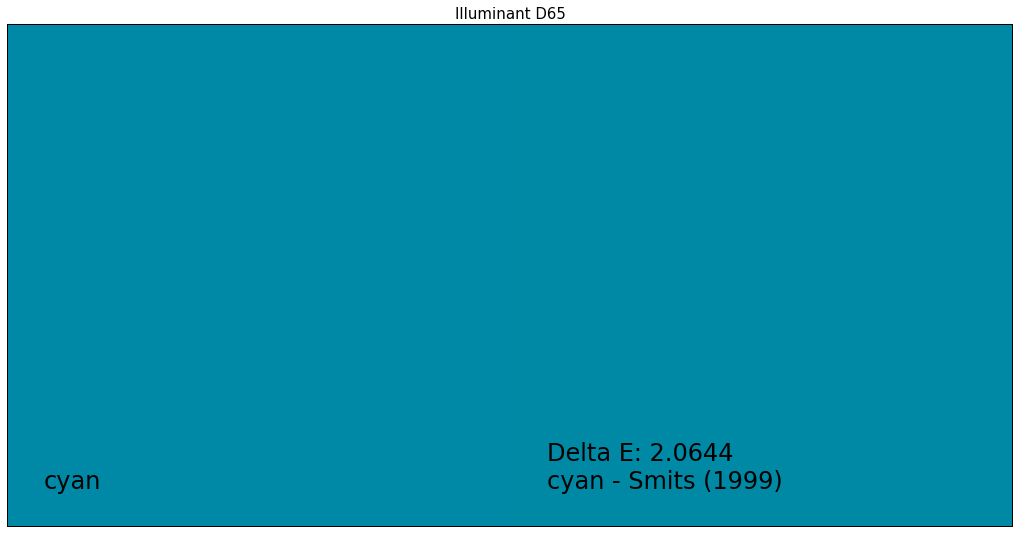

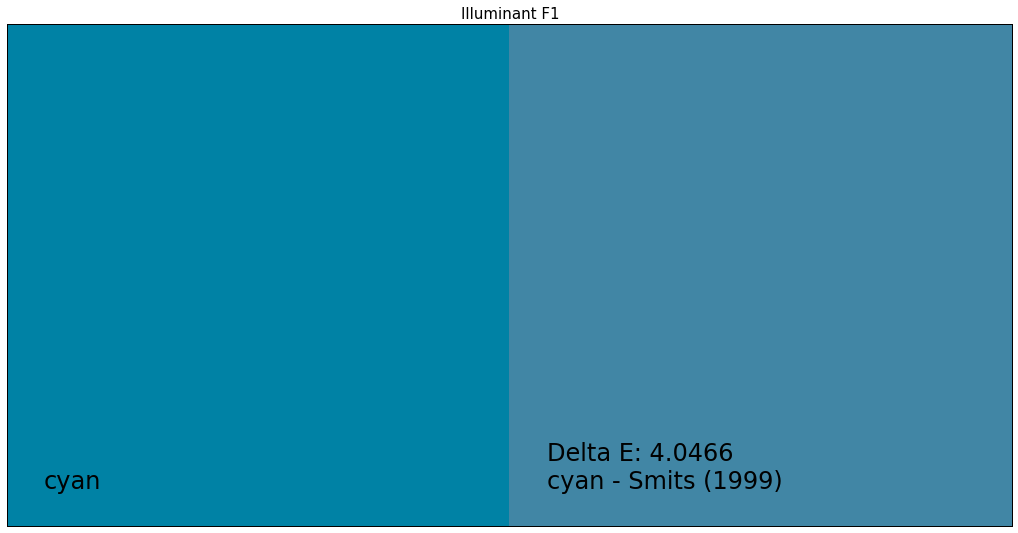

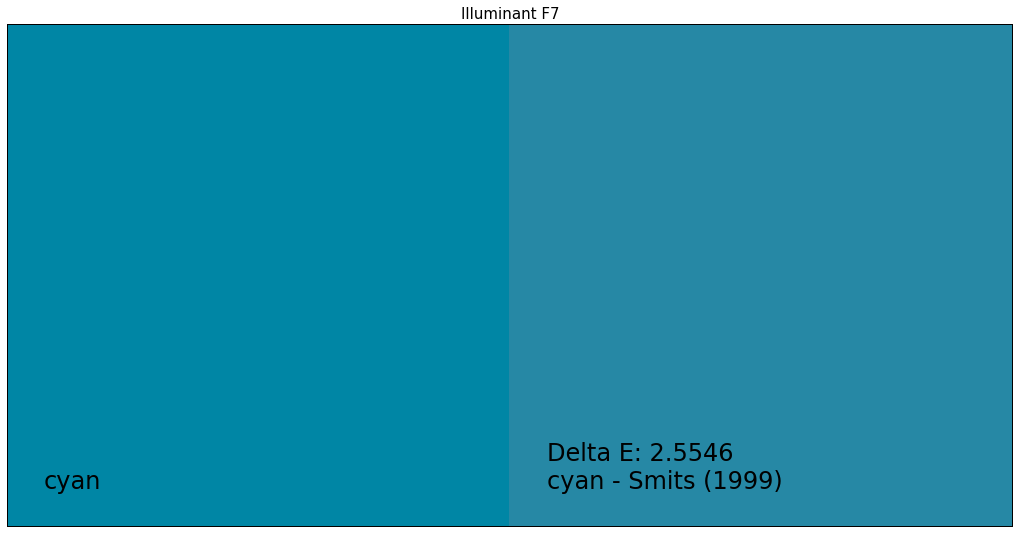

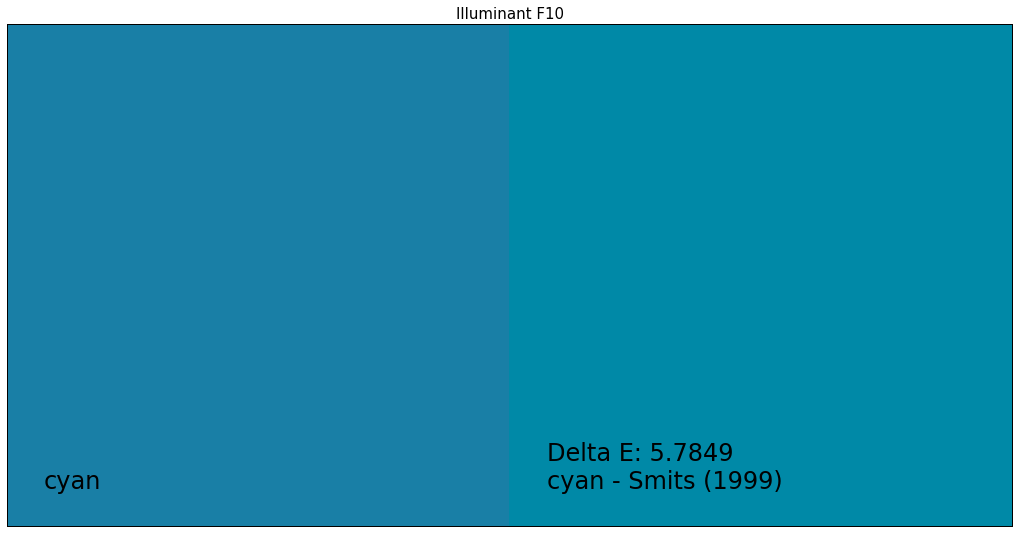

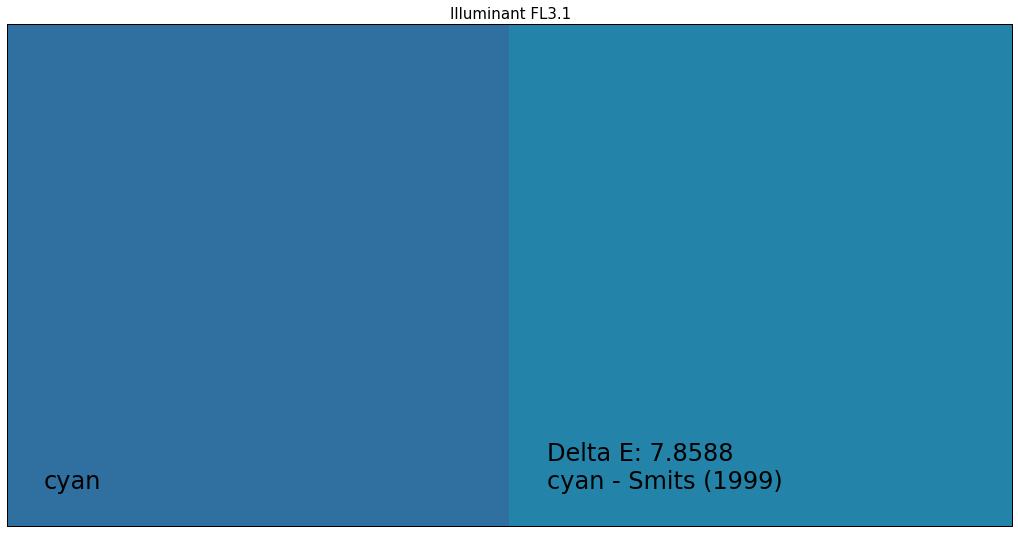

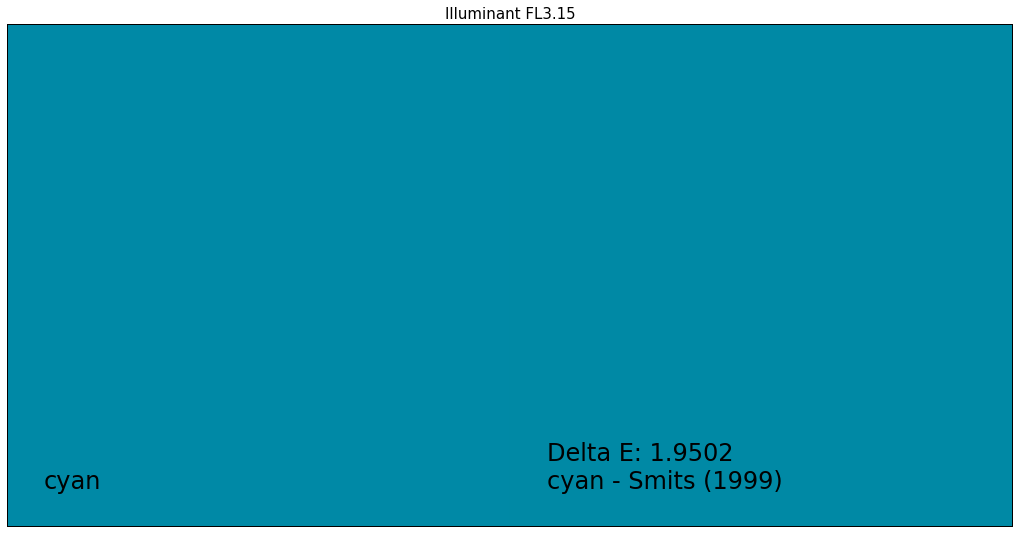

*                                                                             *
*   "white 9.5 (.05 D)" - Reflectance Recovery                                *
*                                                                             *


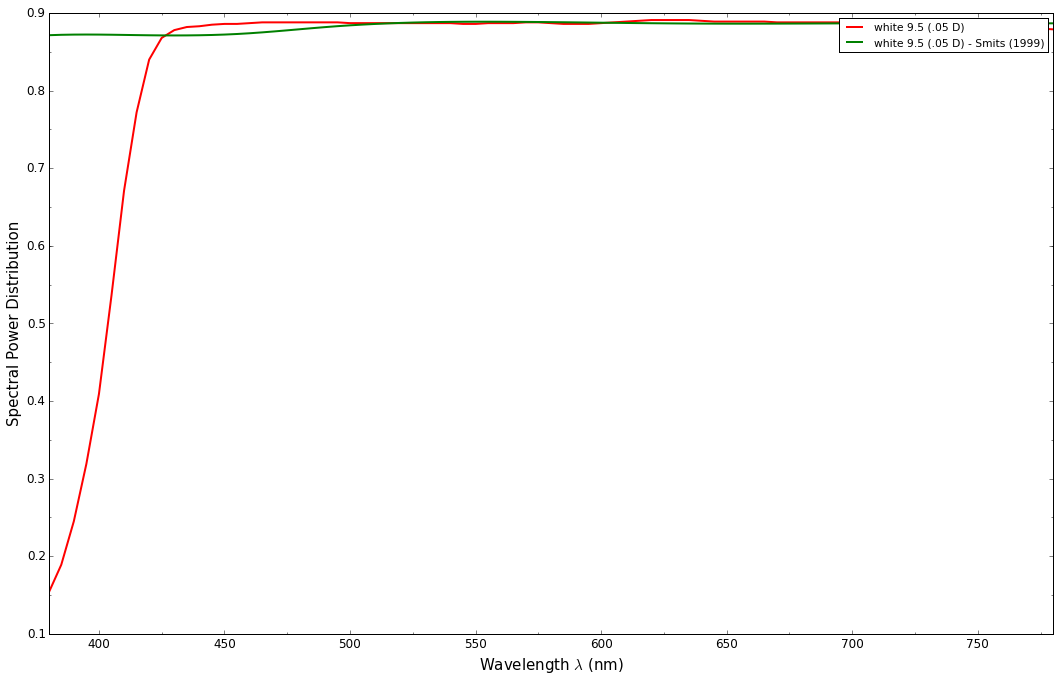

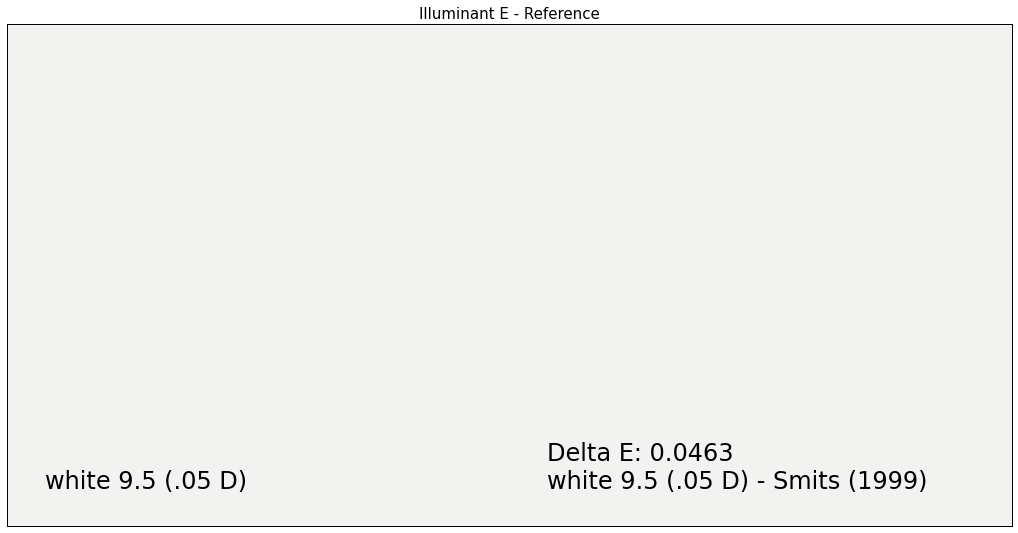

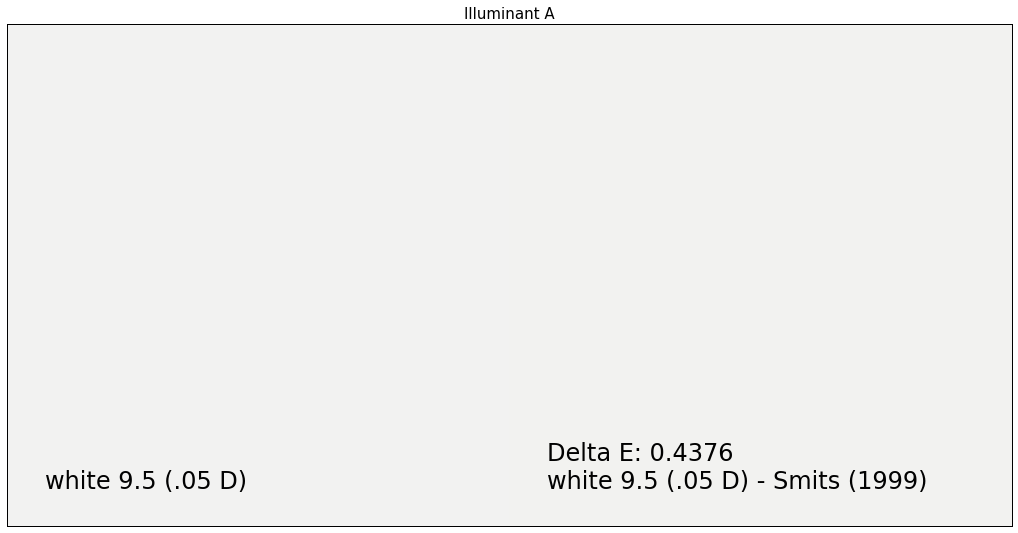

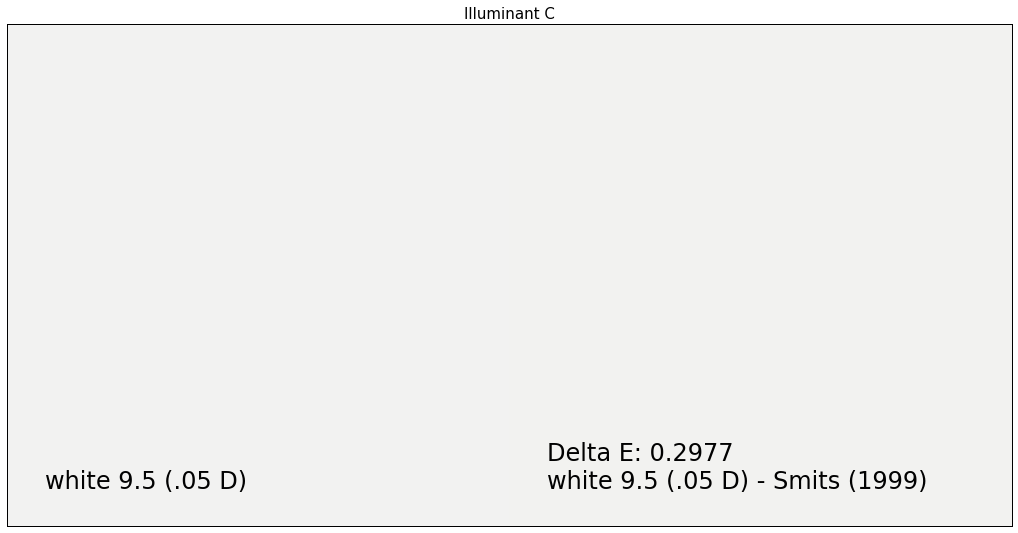

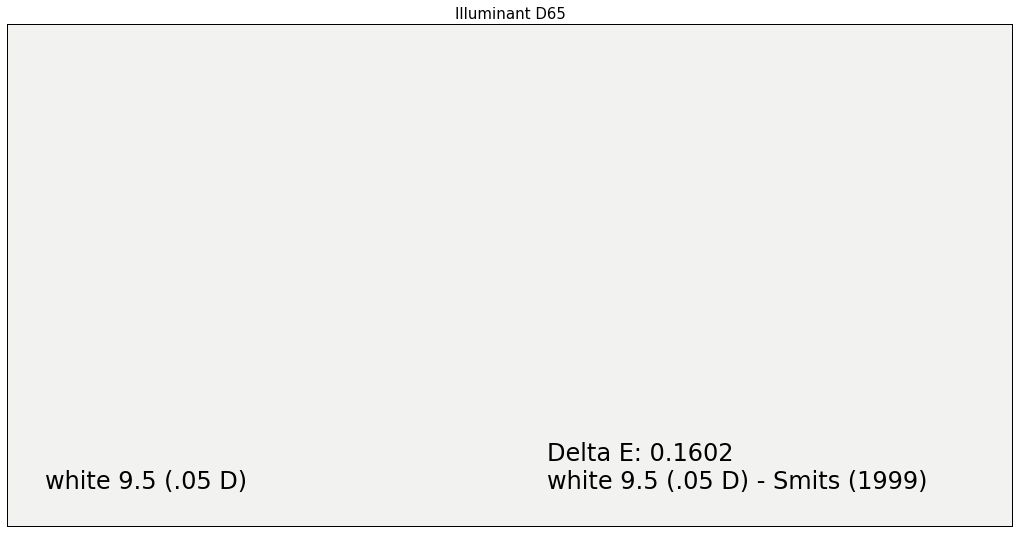

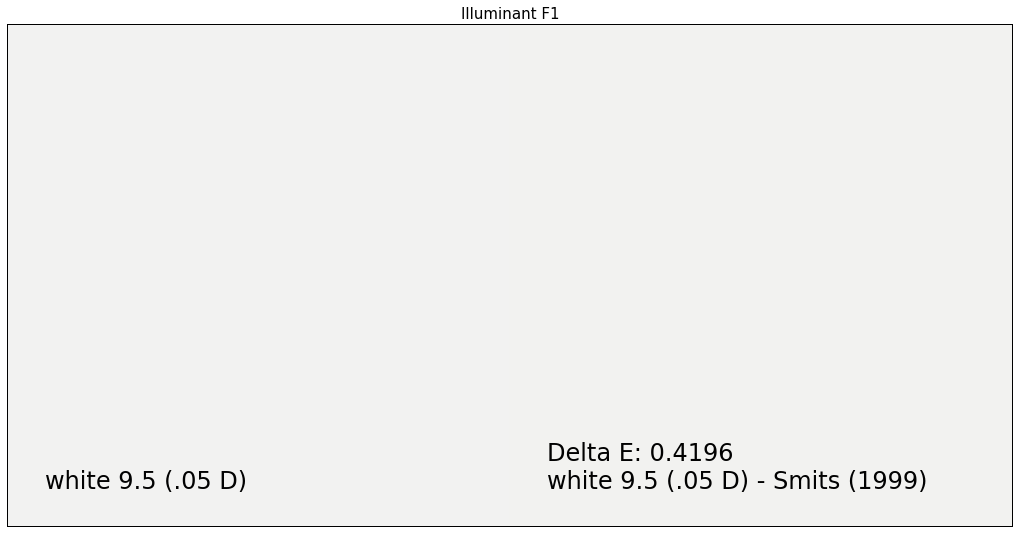

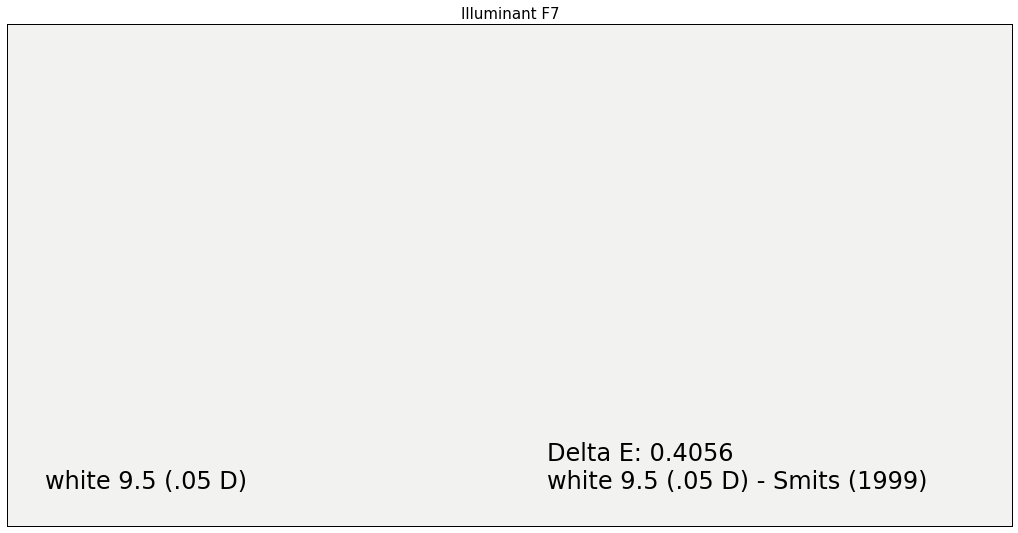

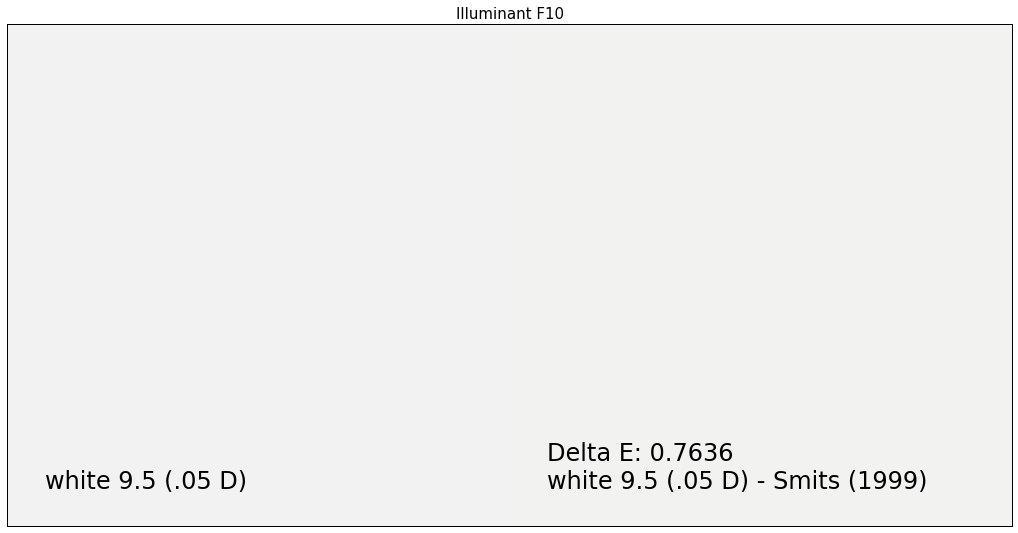

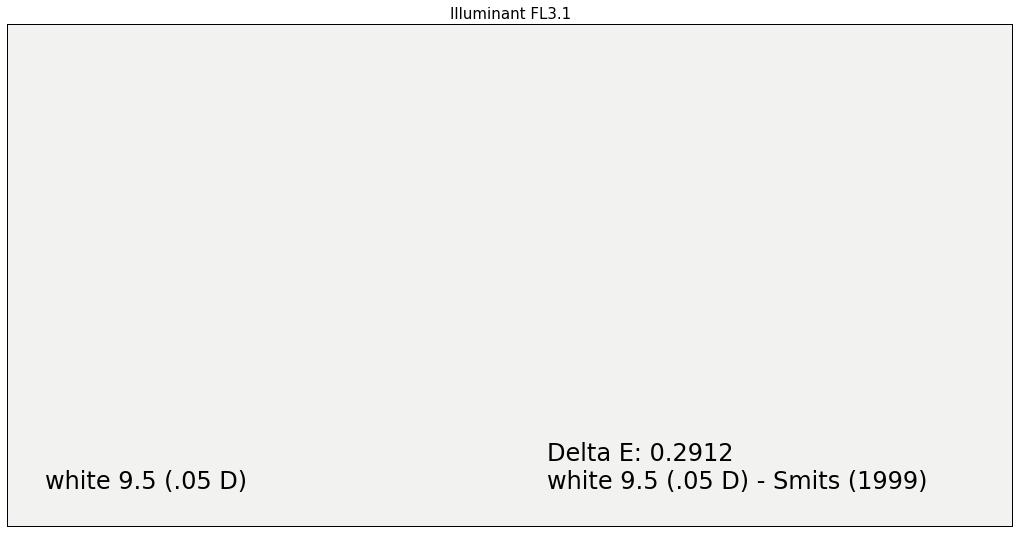

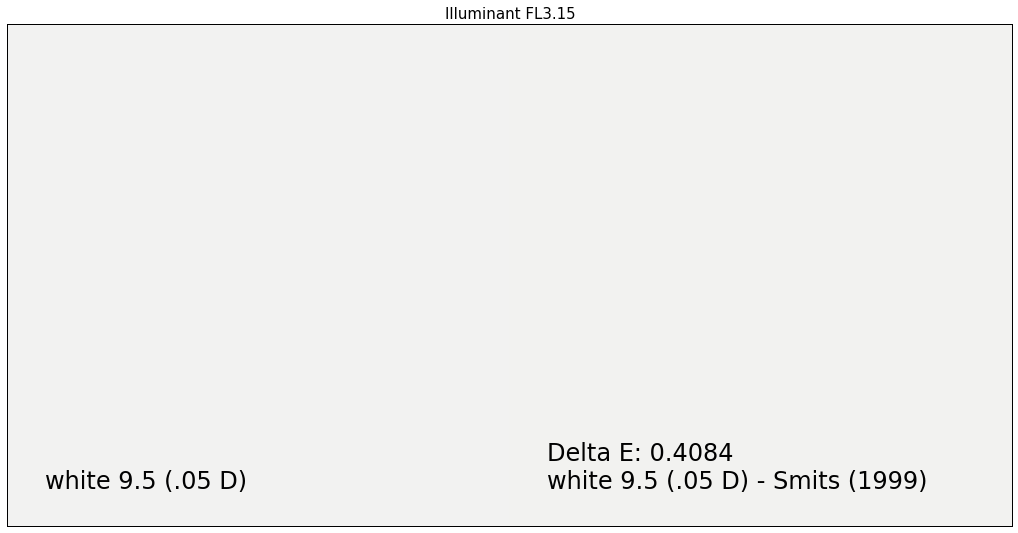

*                                                                             *
*   "neutral 8 (.23 D)" - Reflectance Recovery                                *
*                                                                             *


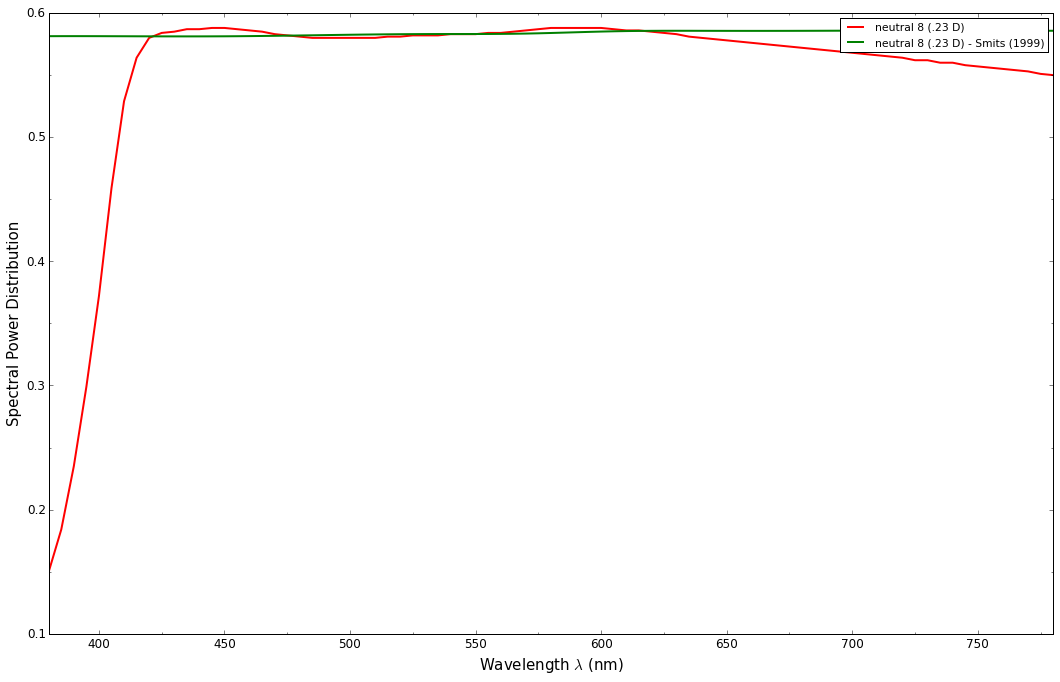

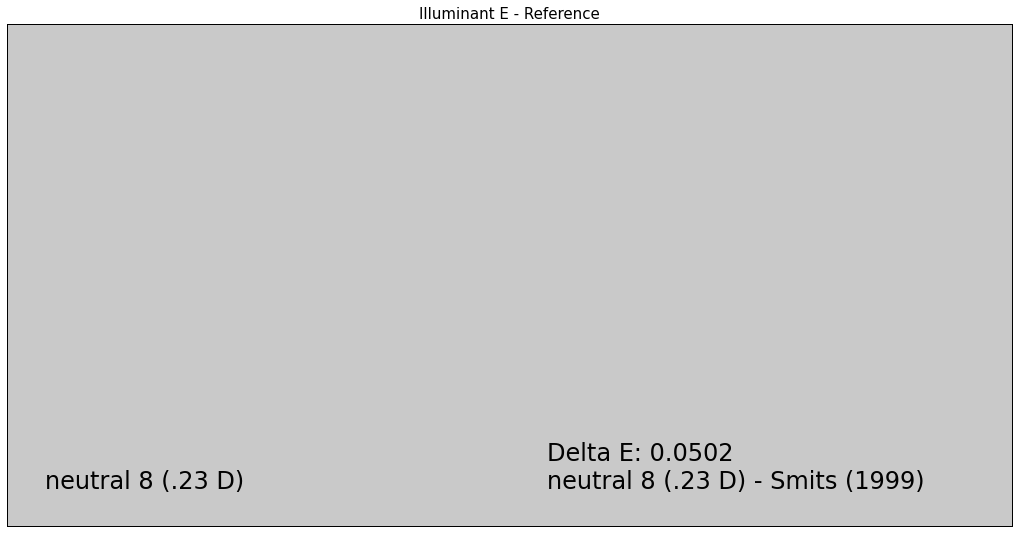

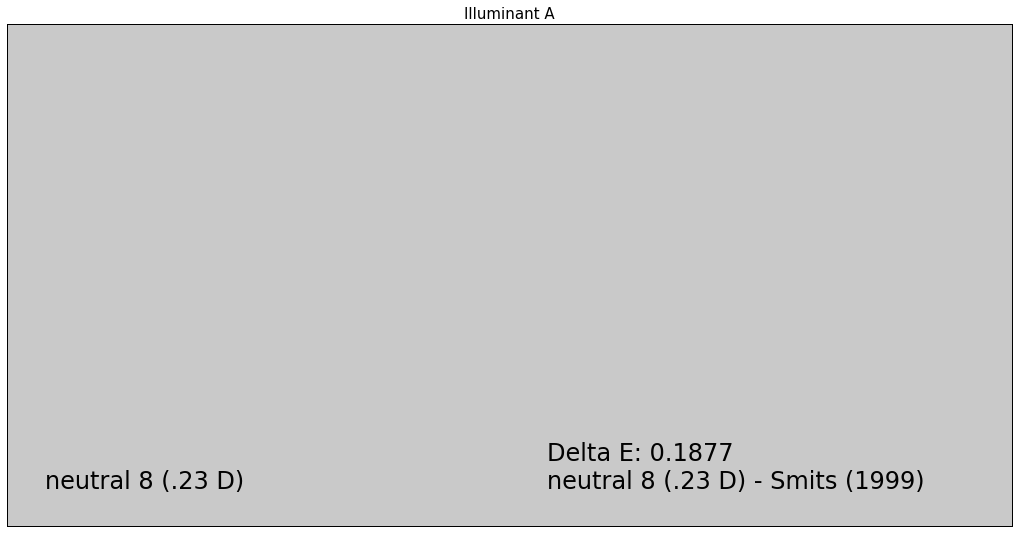

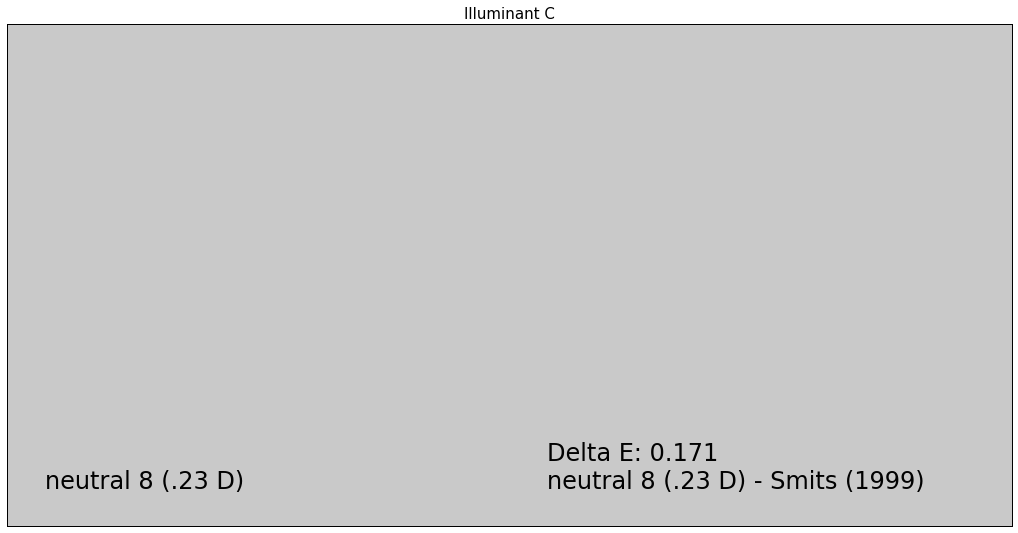

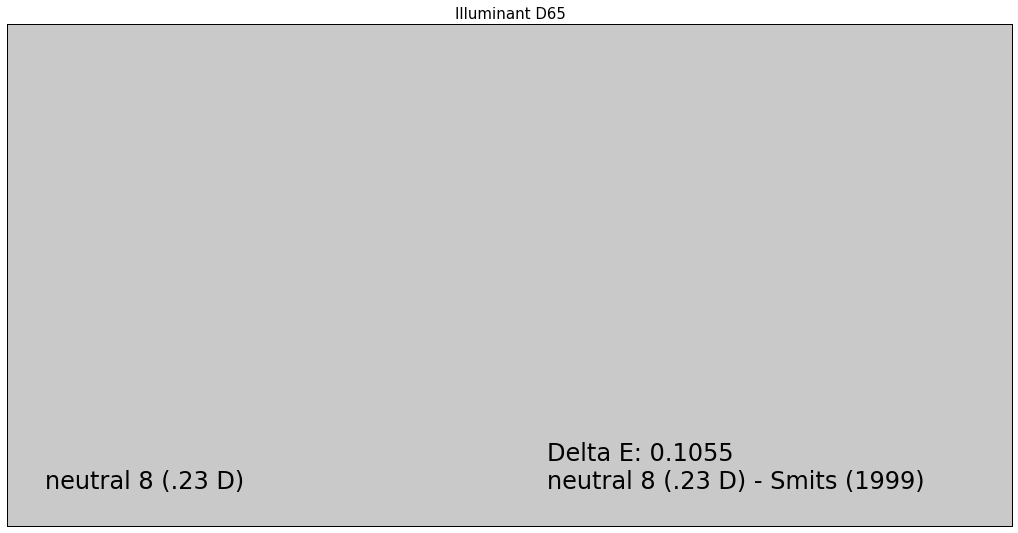

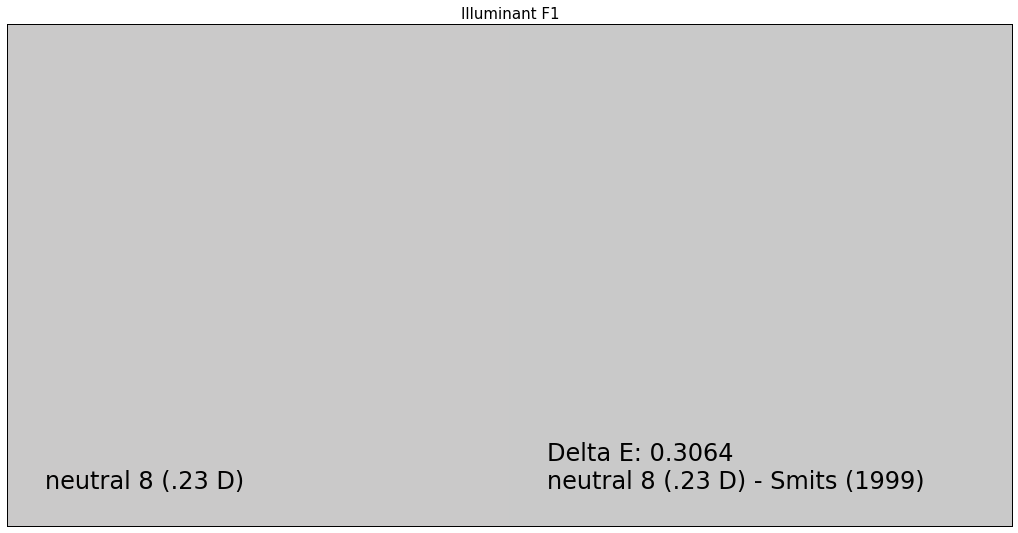

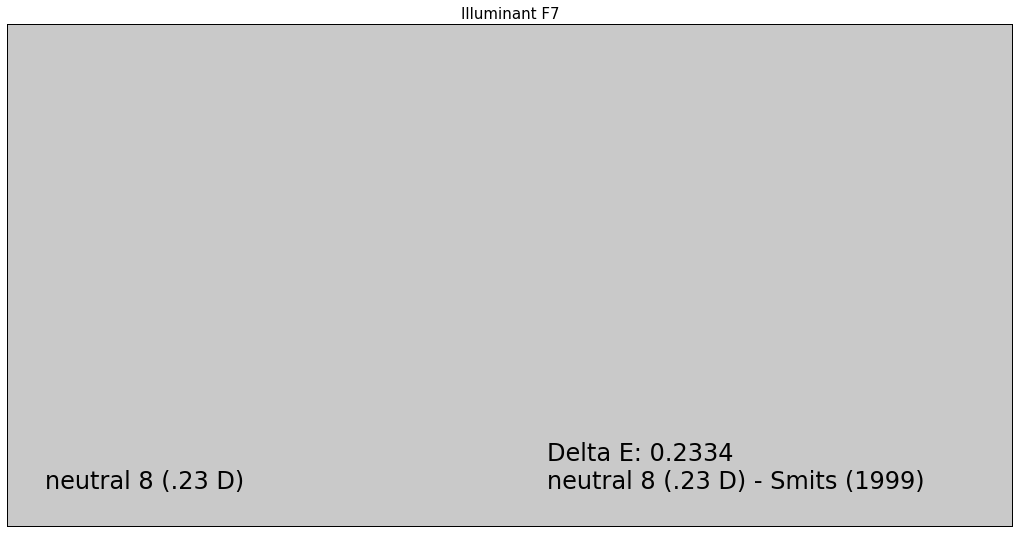

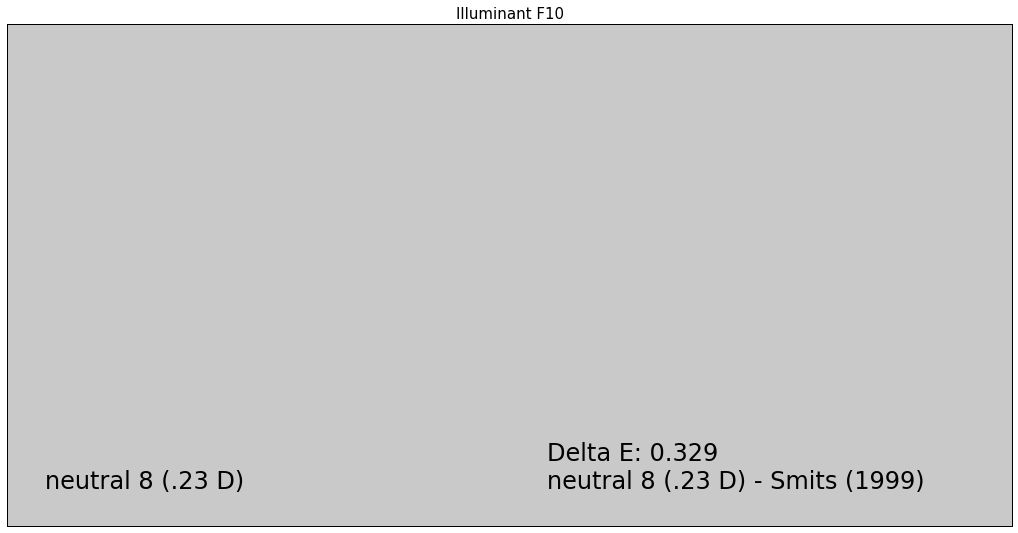

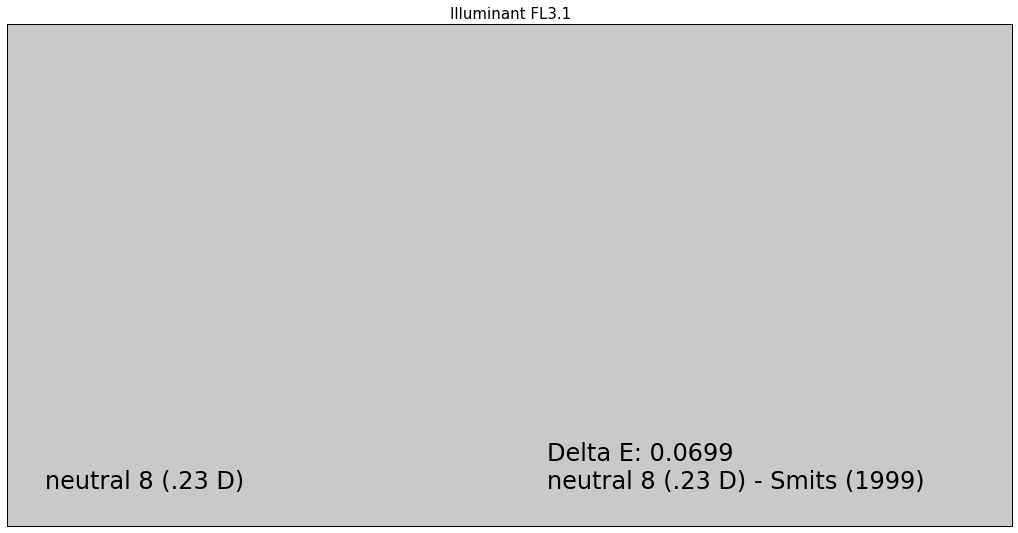

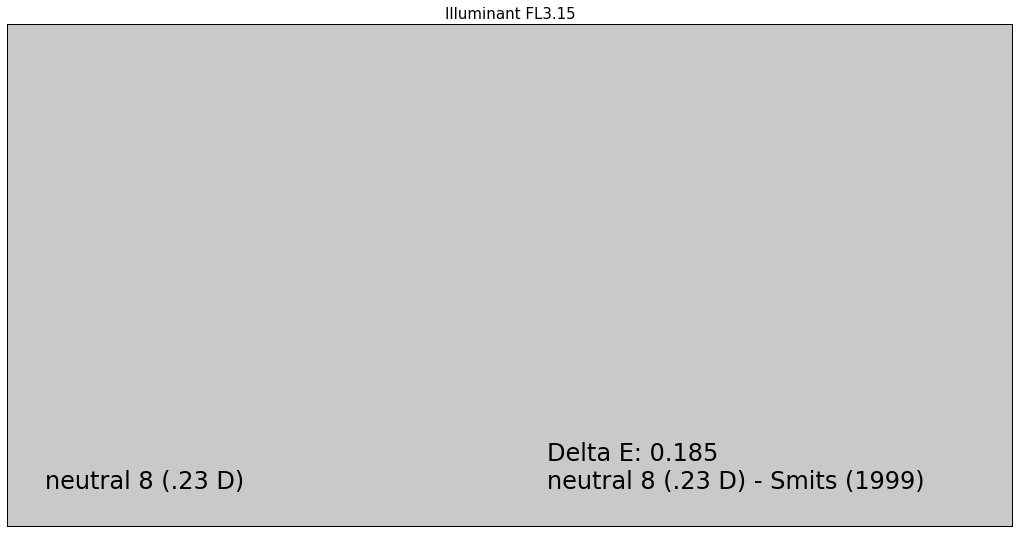

*                                                                             *
*   "neutral 6.5 (.44 D)" - Reflectance Recovery                              *
*                                                                             *


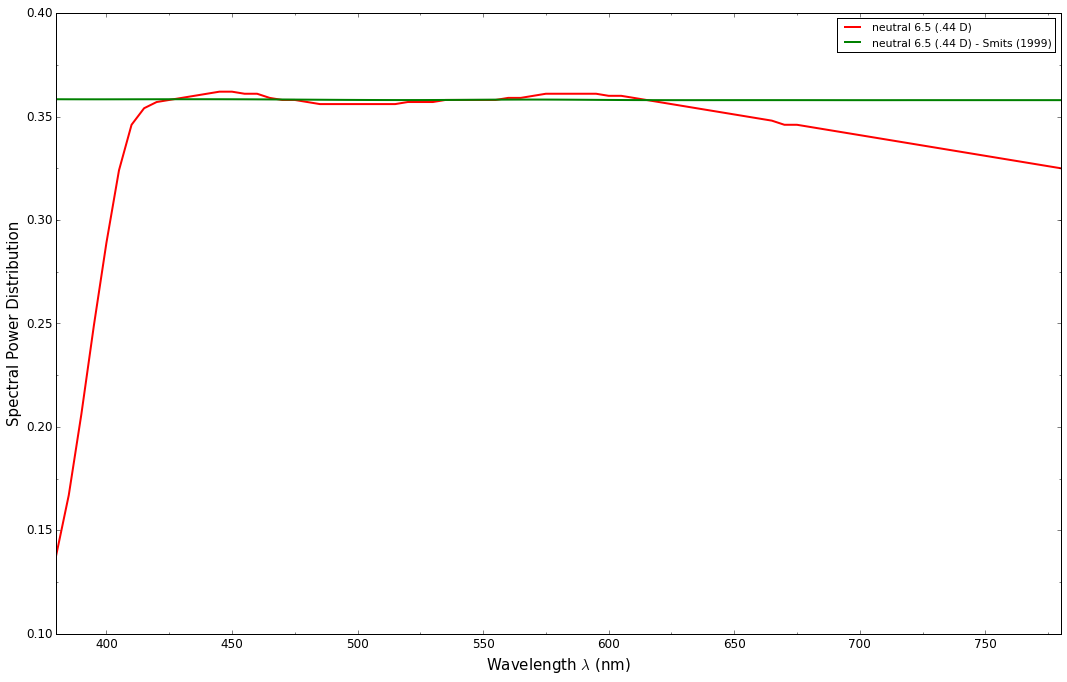

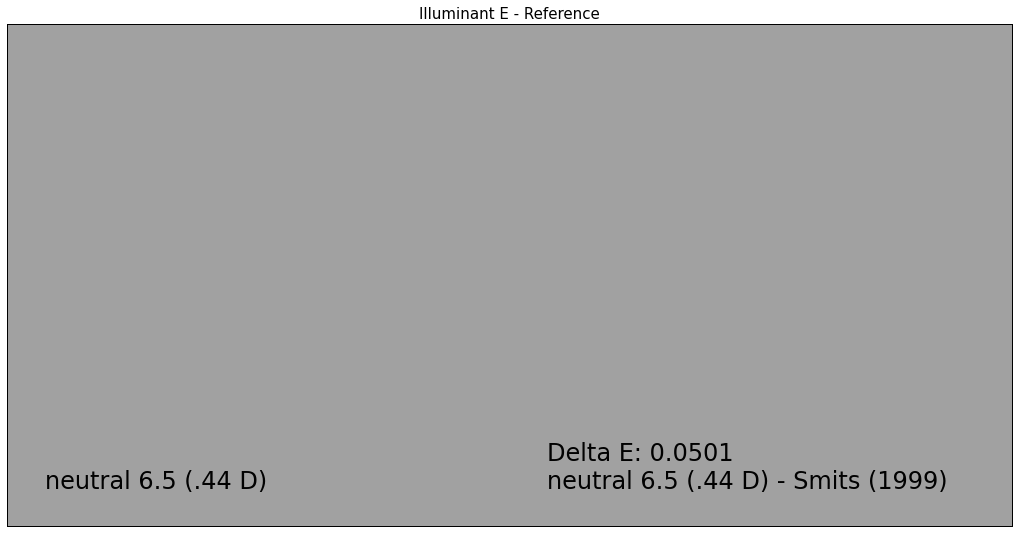

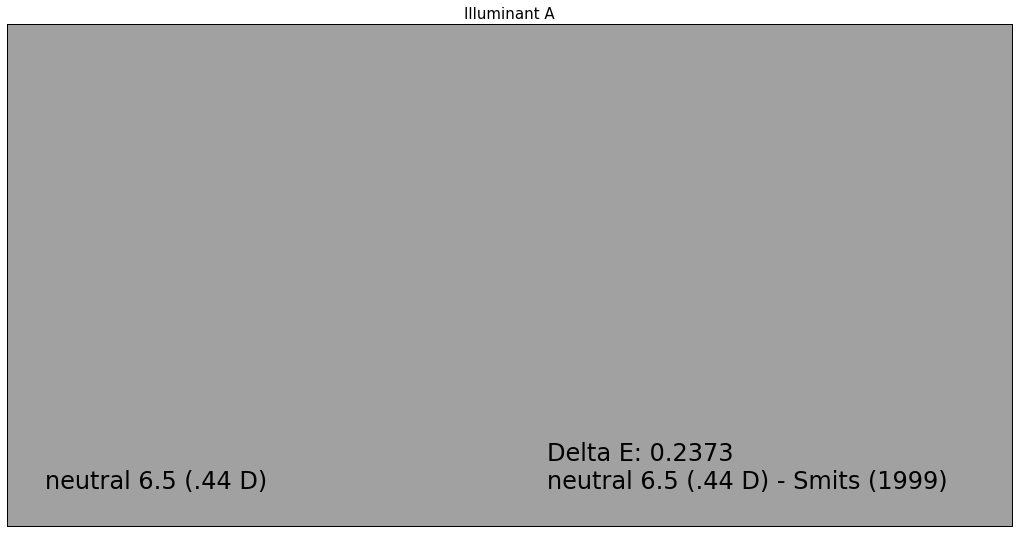

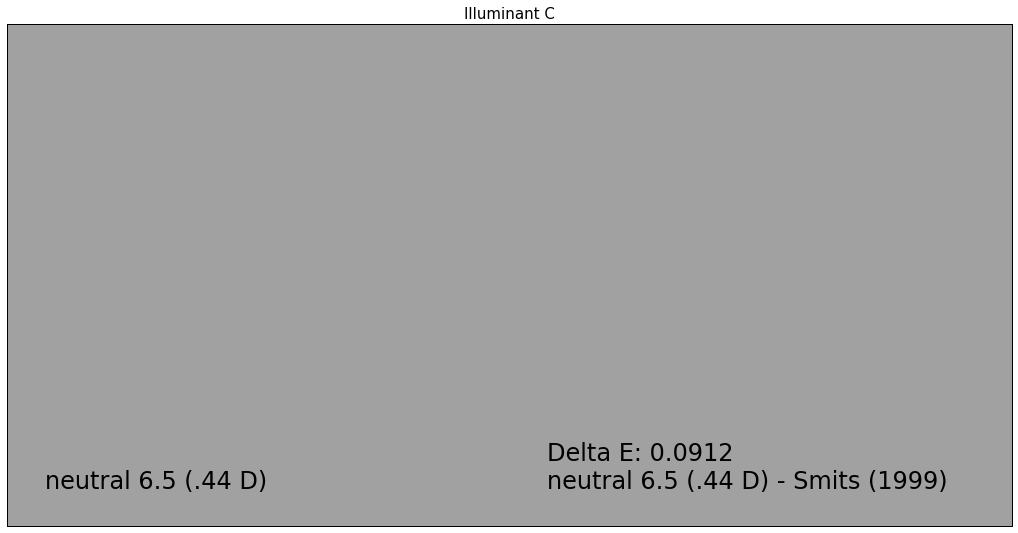

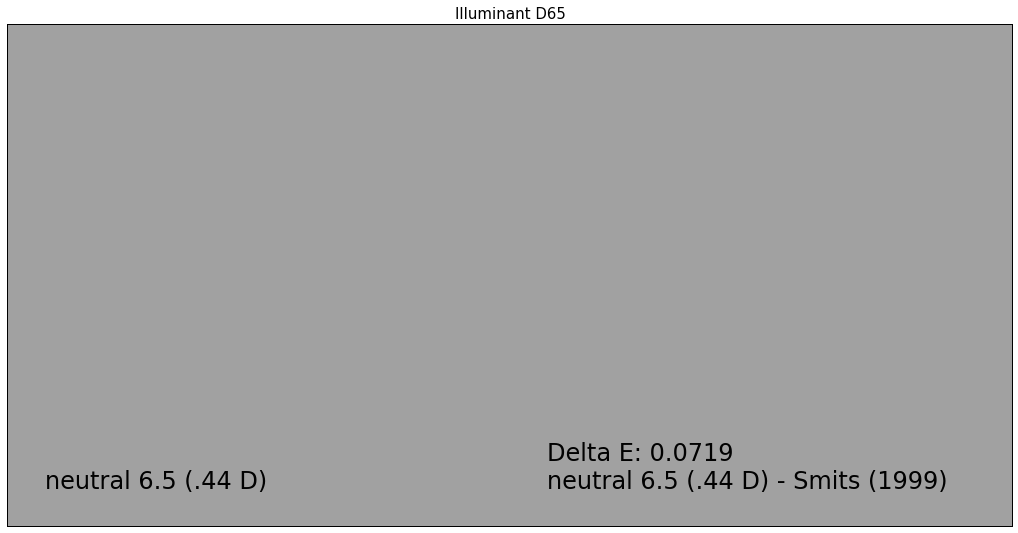

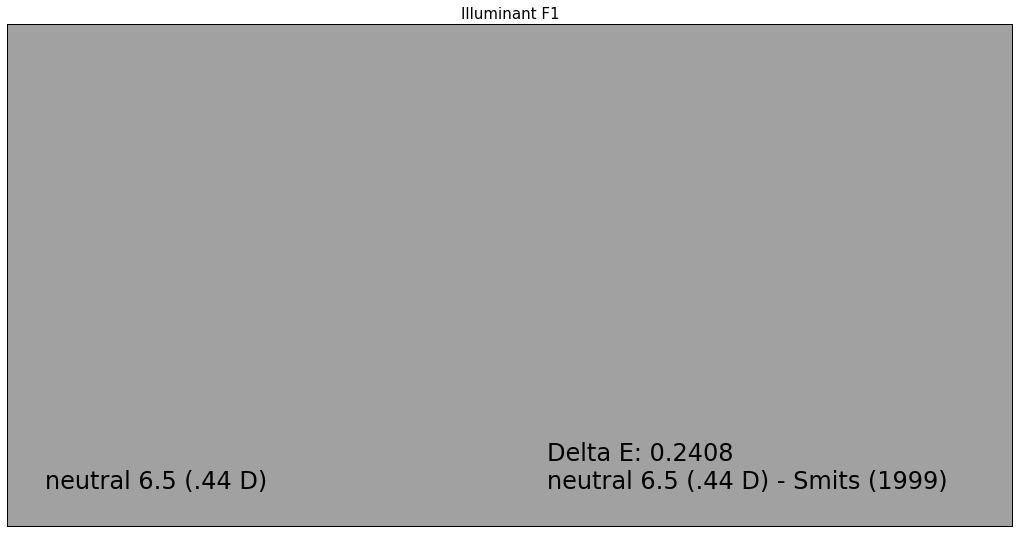

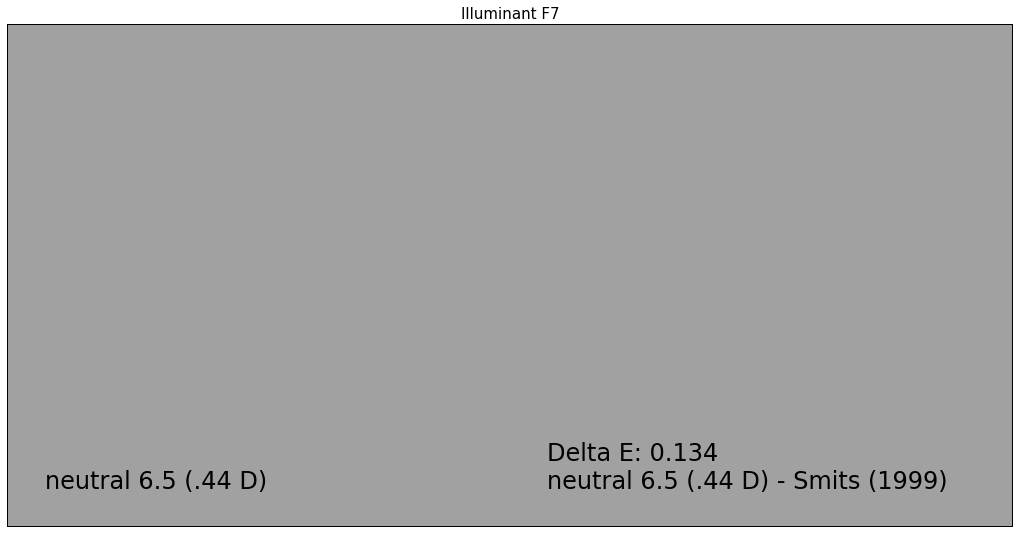

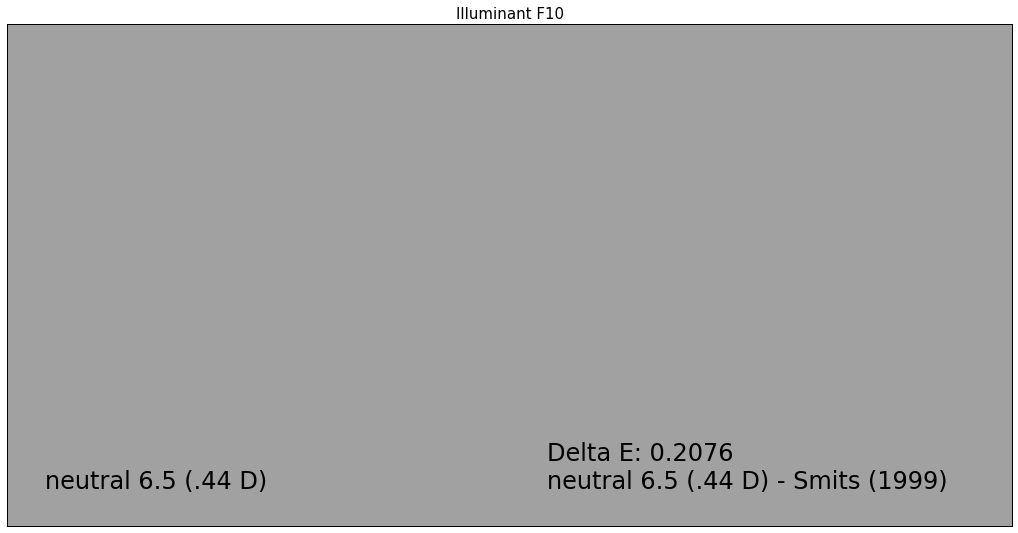

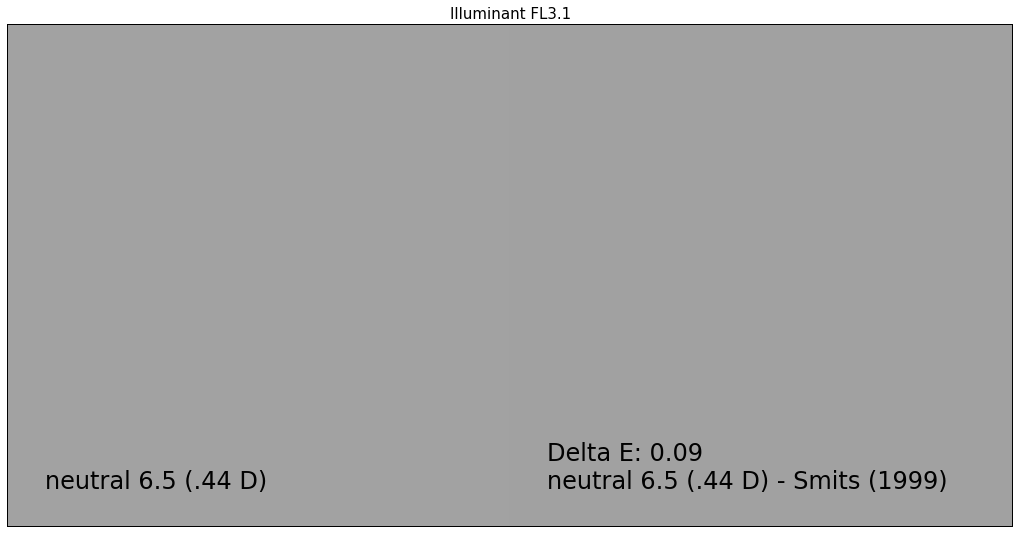

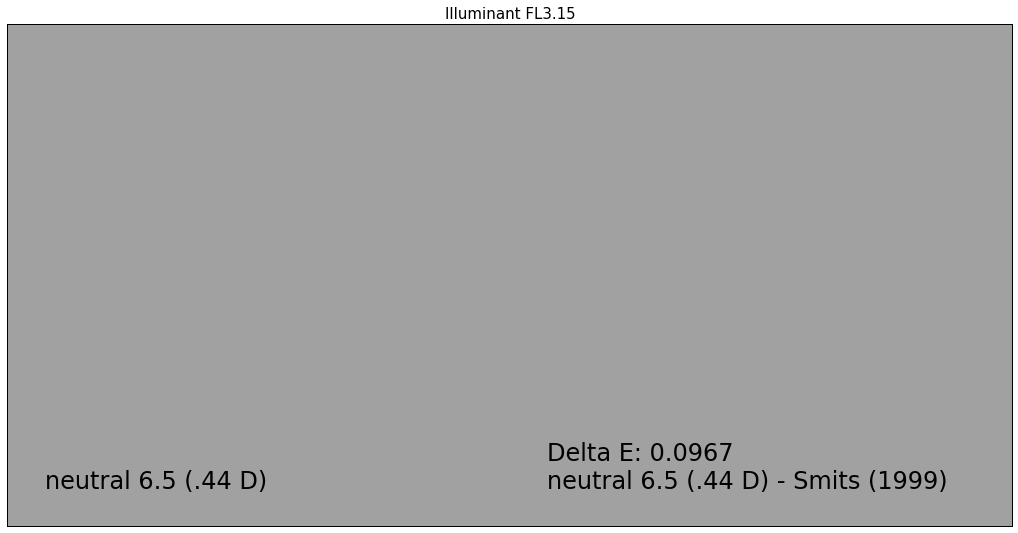

*                                                                             *
*   "neutral 5 (.70 D)" - Reflectance Recovery                                *
*                                                                             *


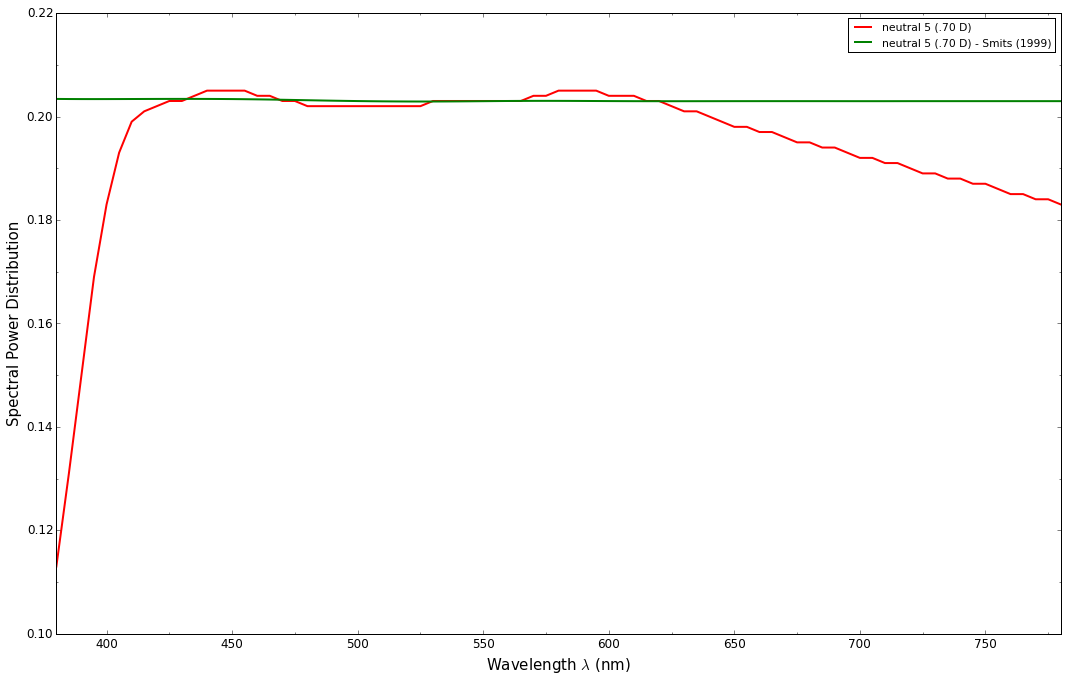

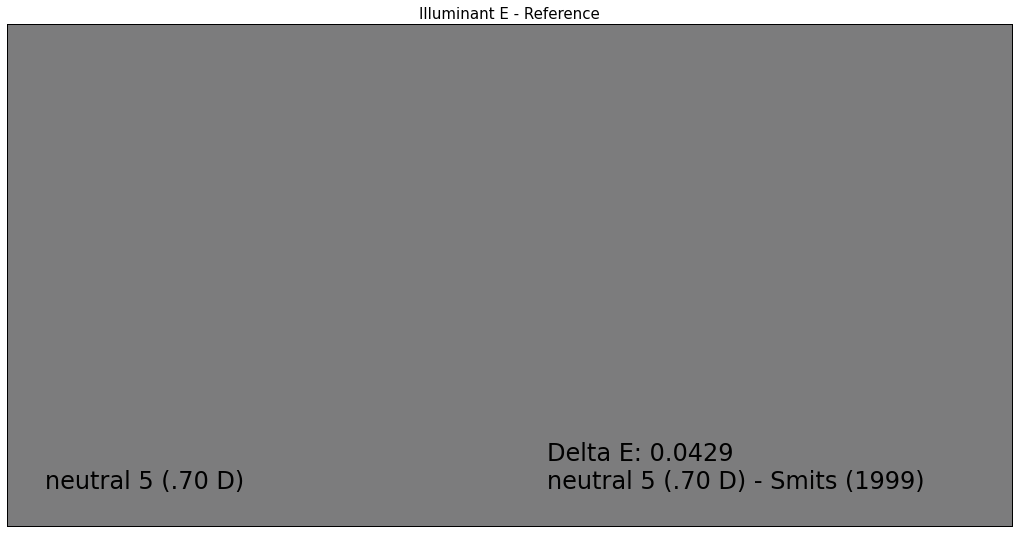

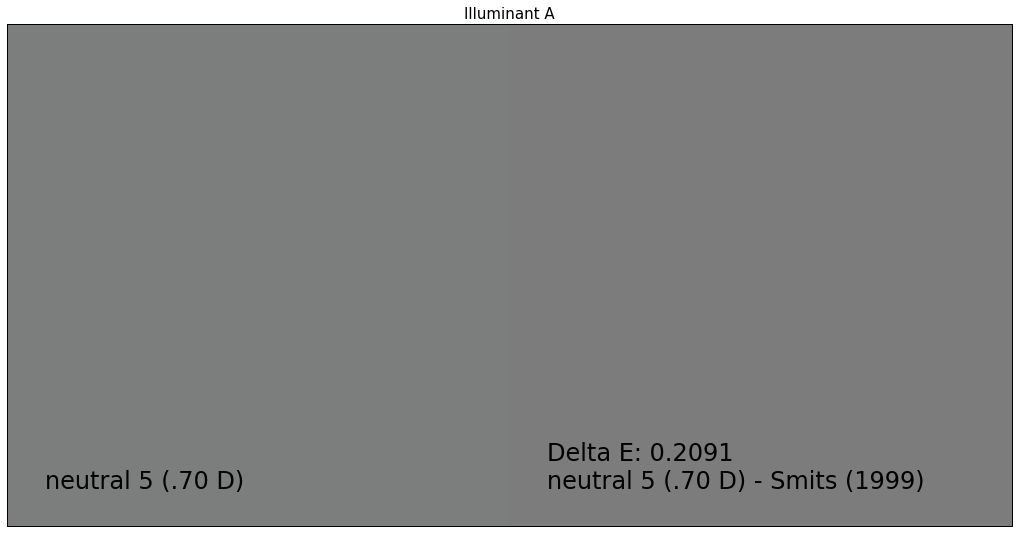

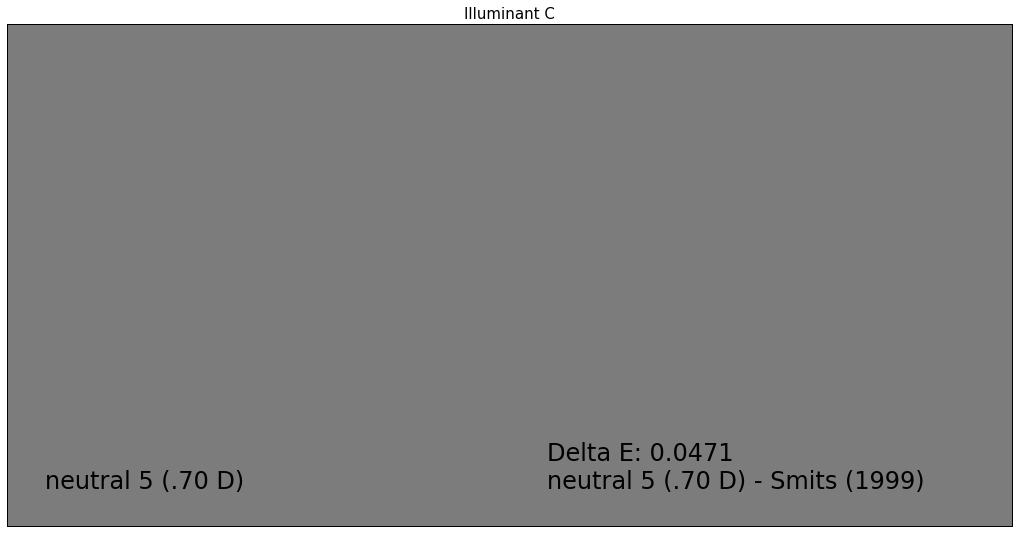

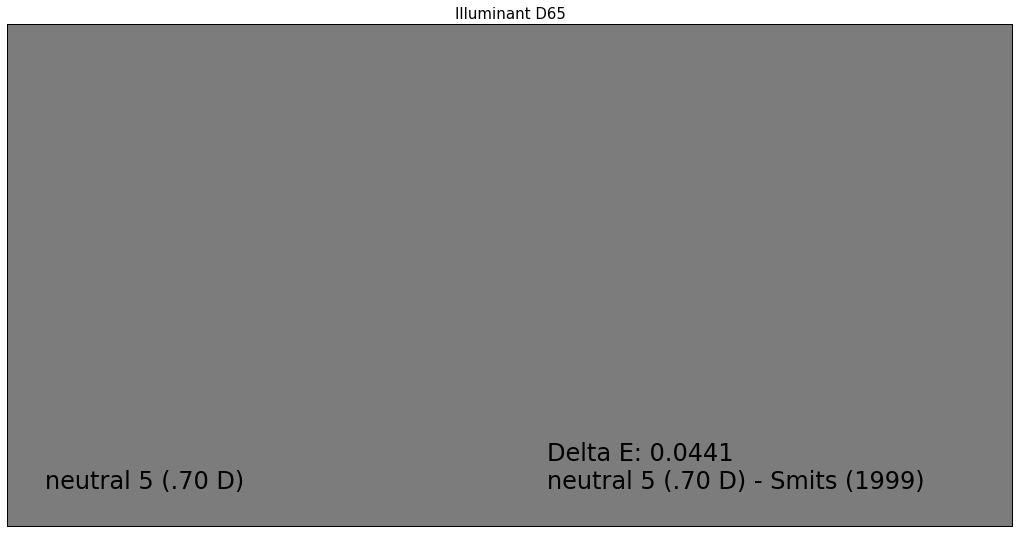

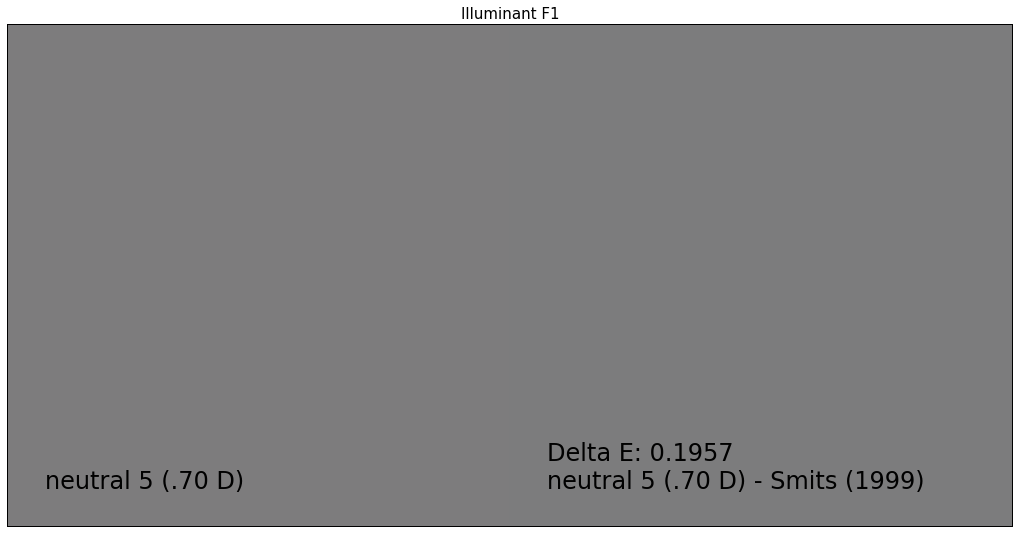

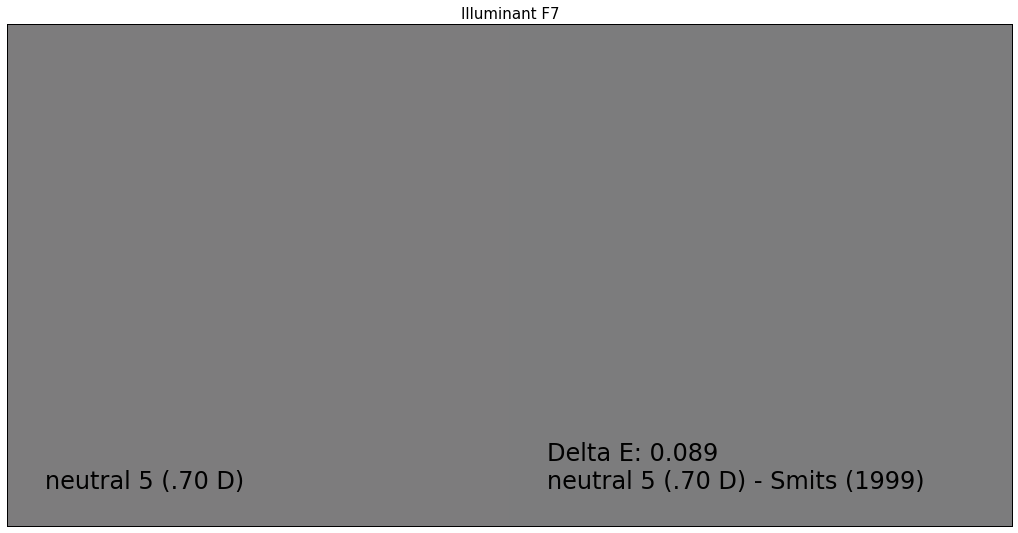

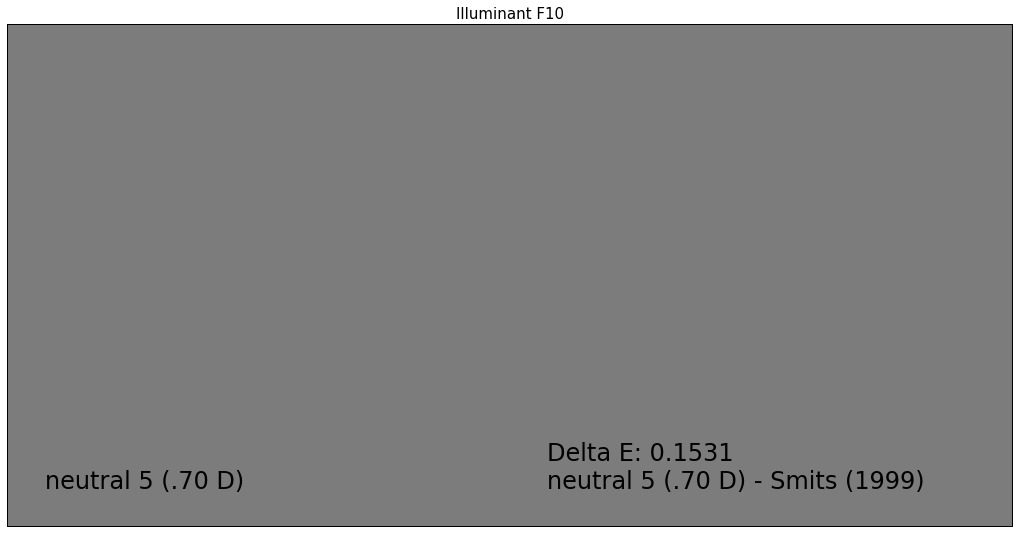

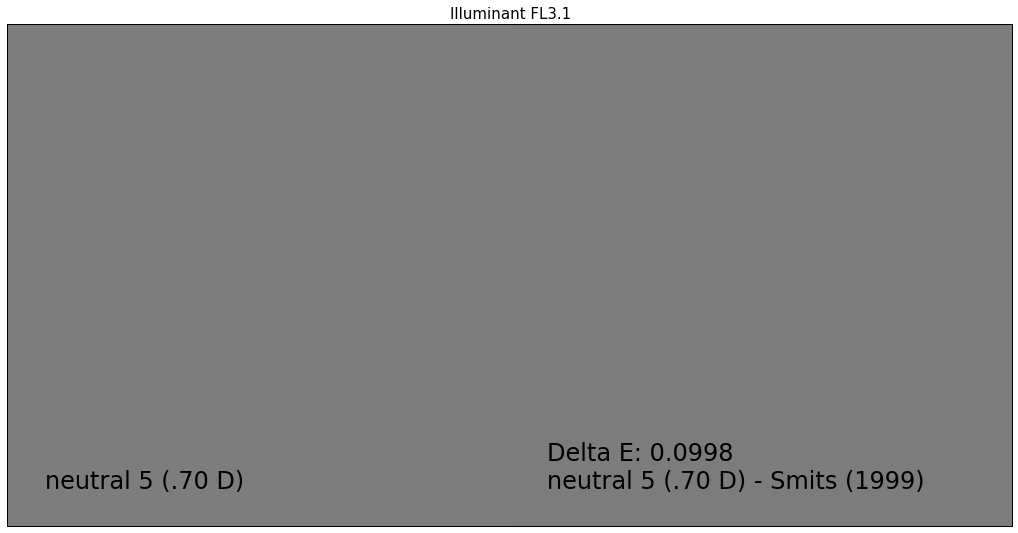

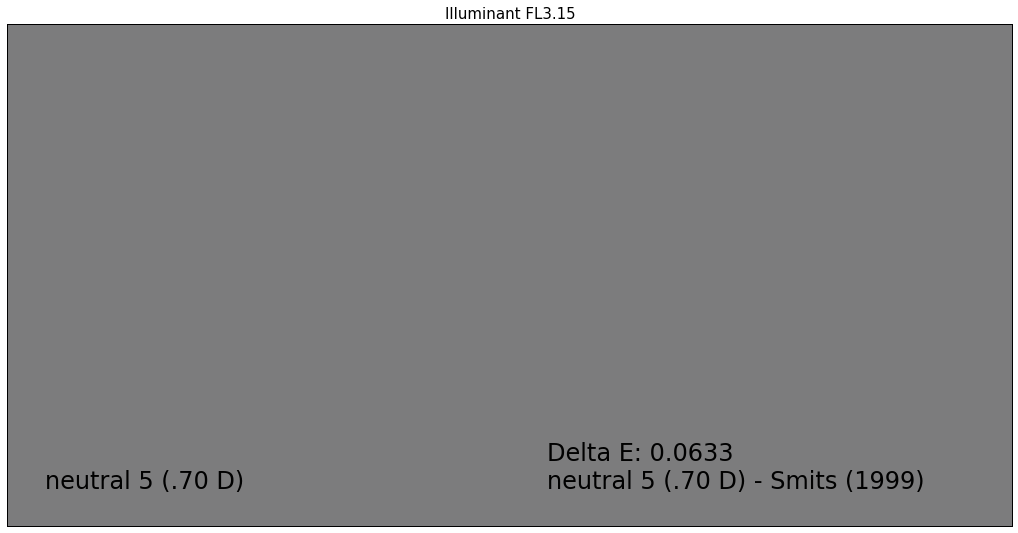

*                                                                             *
*   "neutral 3.5 (1.05 D)" - Reflectance Recovery                             *
*                                                                             *


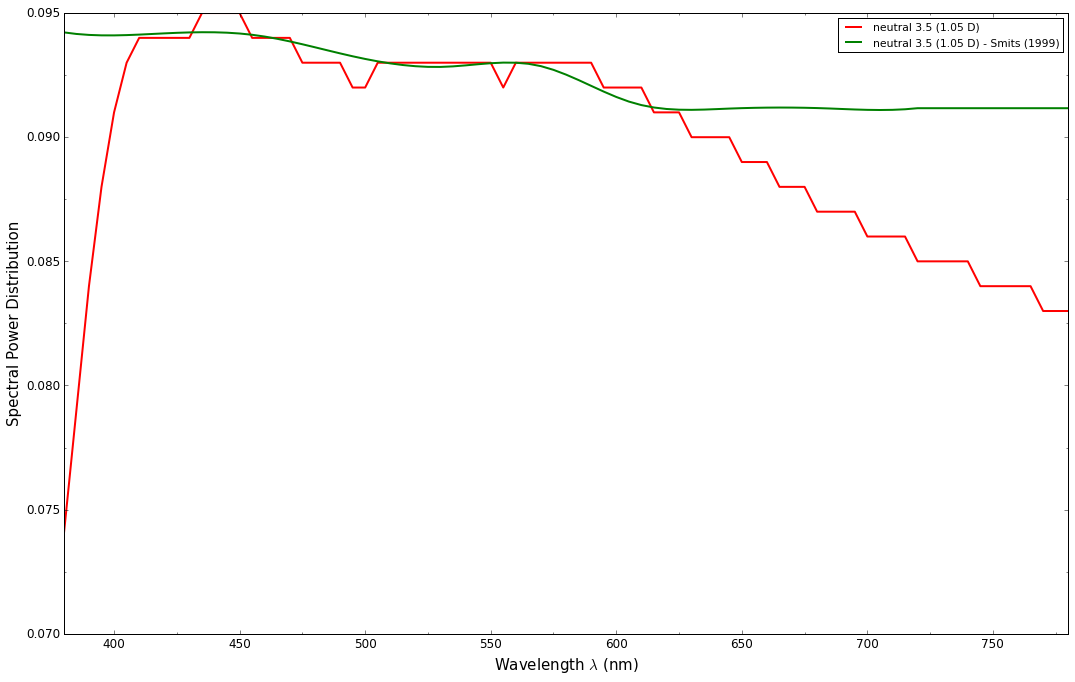

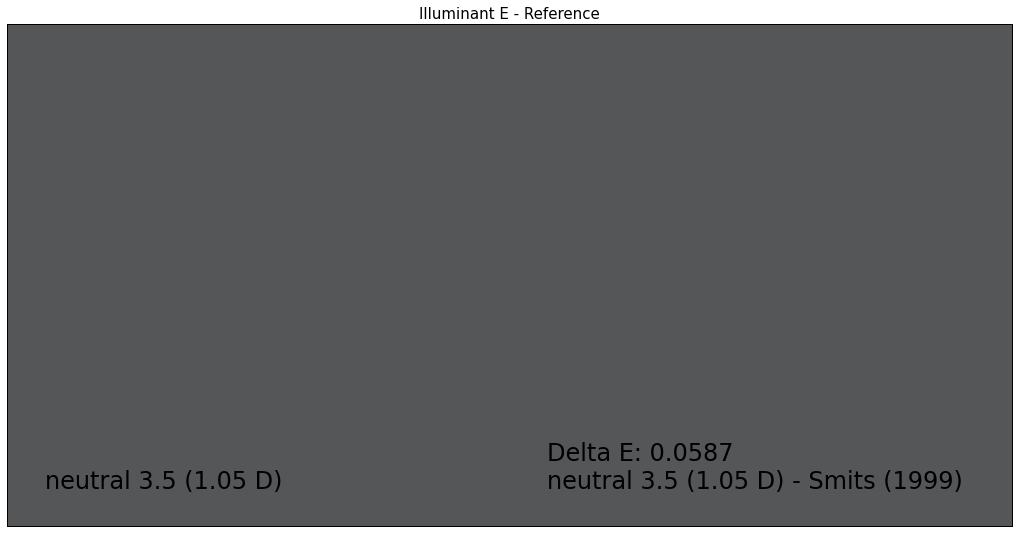

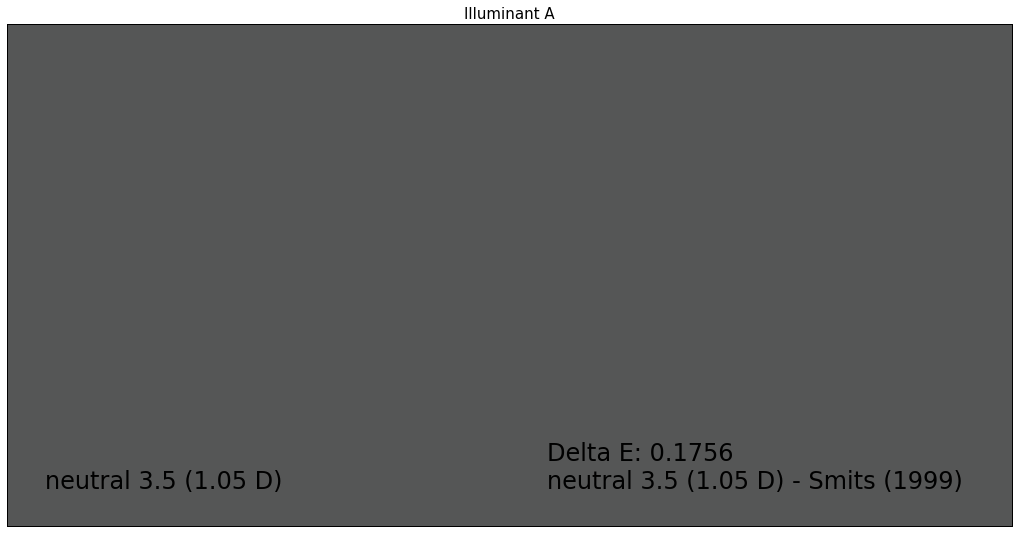

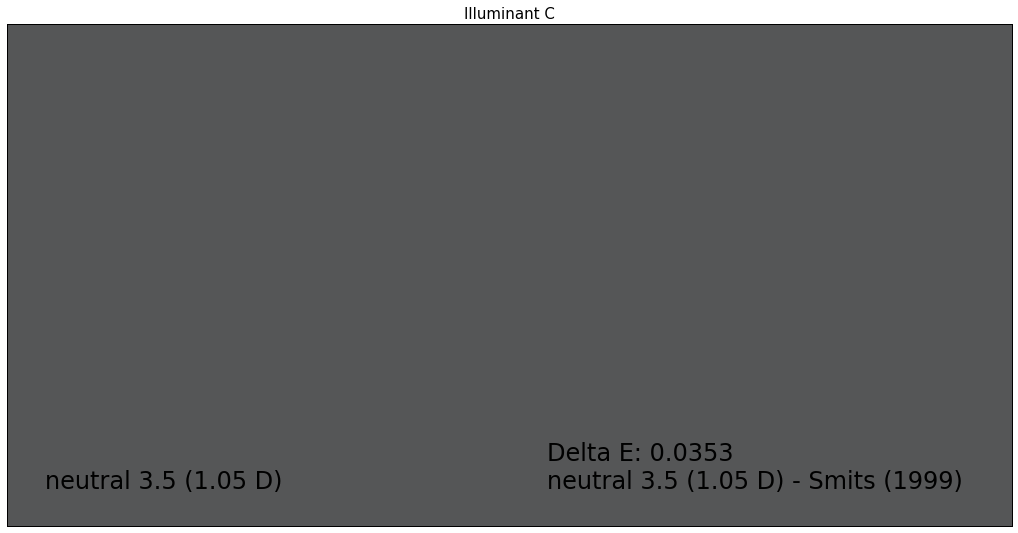

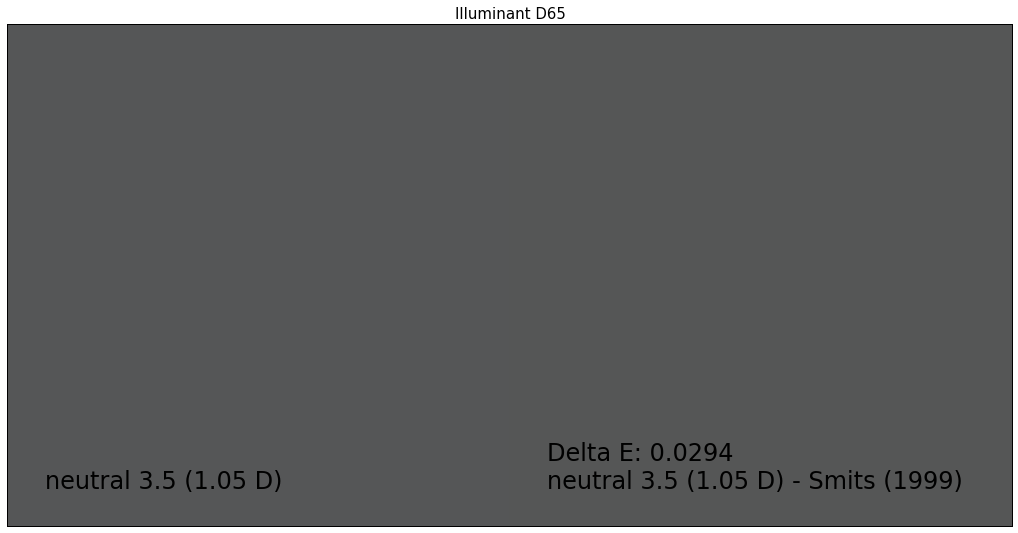

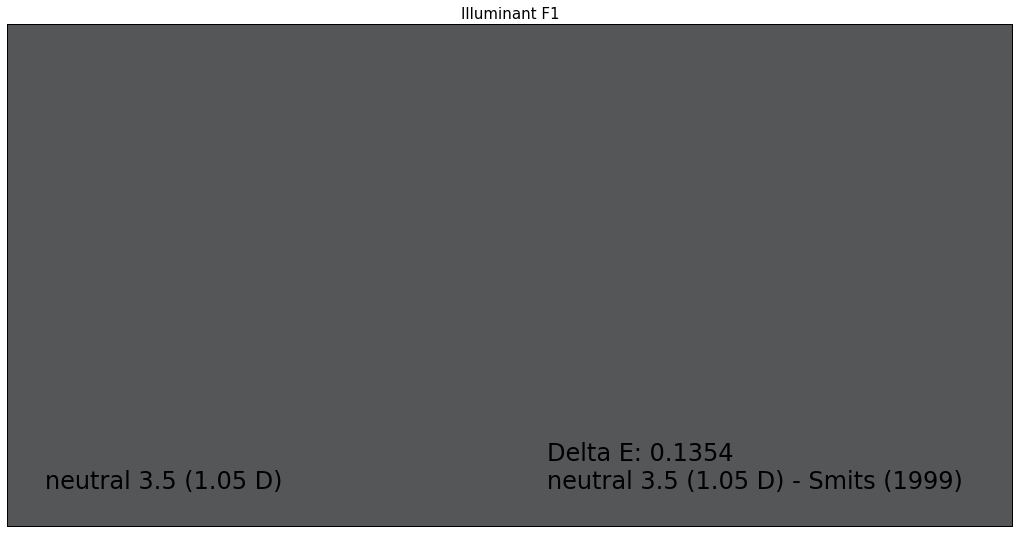

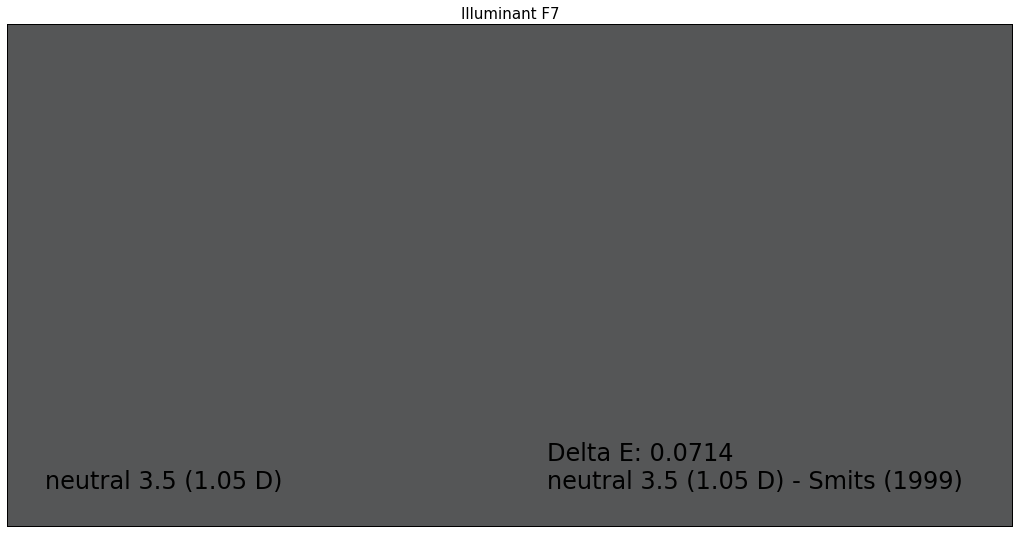

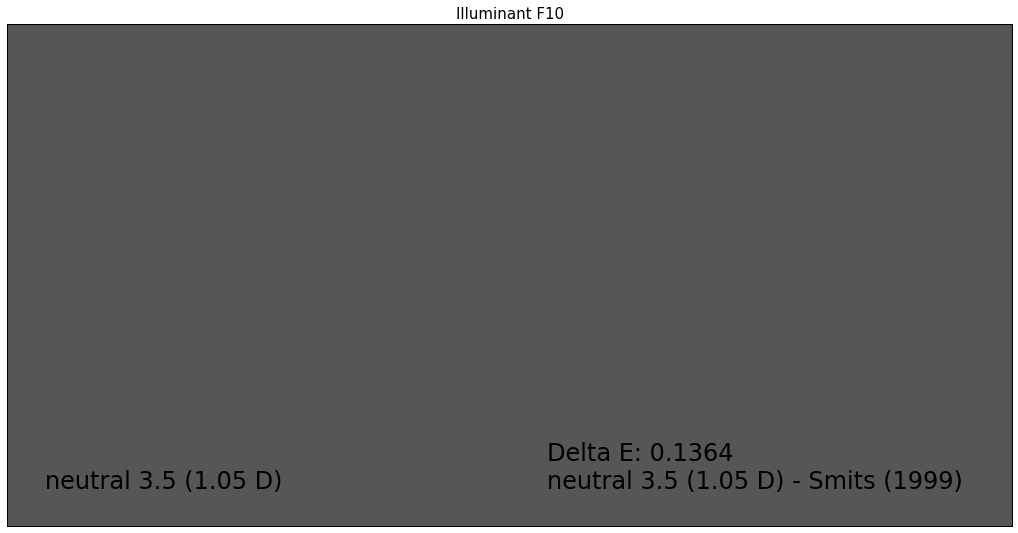

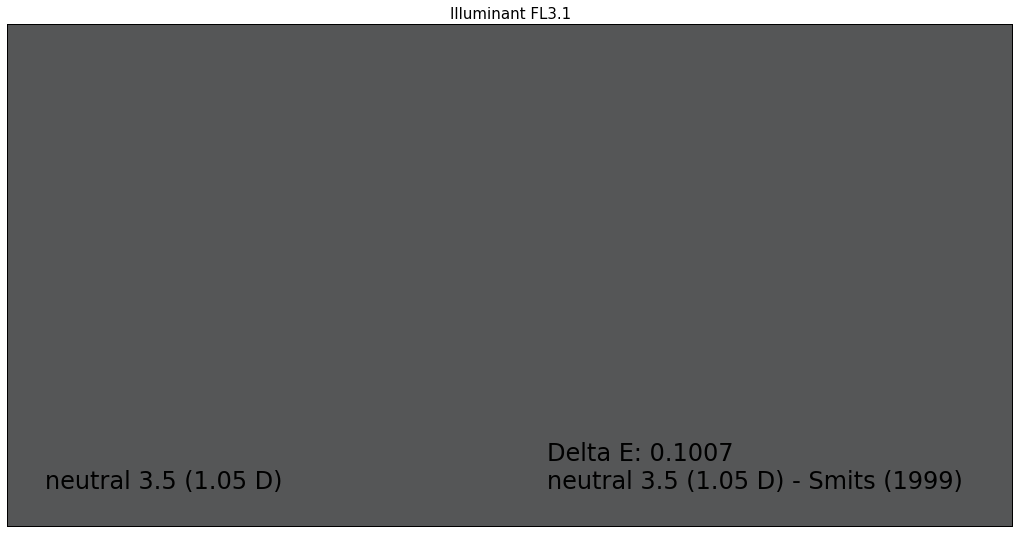

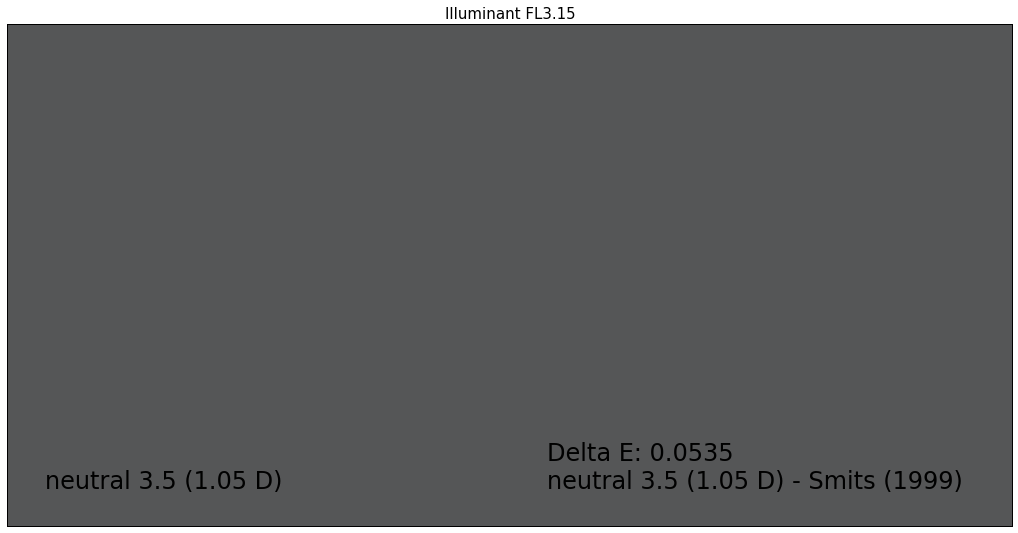

*                                                                             *
*   "black 2 (1.5 D)" - Reflectance Recovery                                  *
*                                                                             *


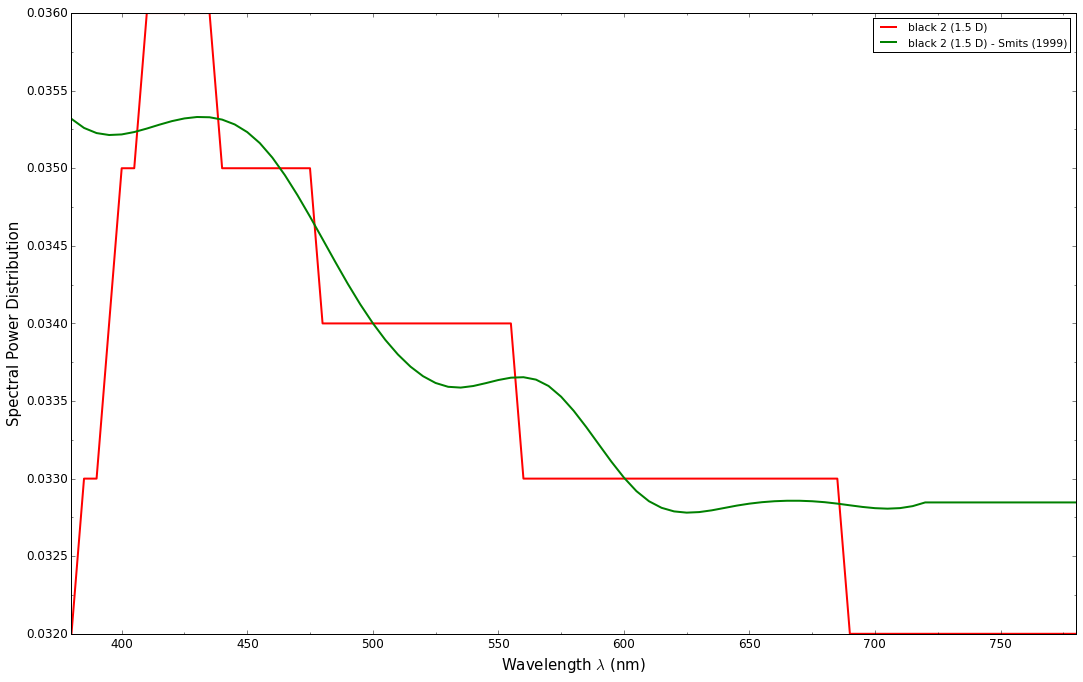

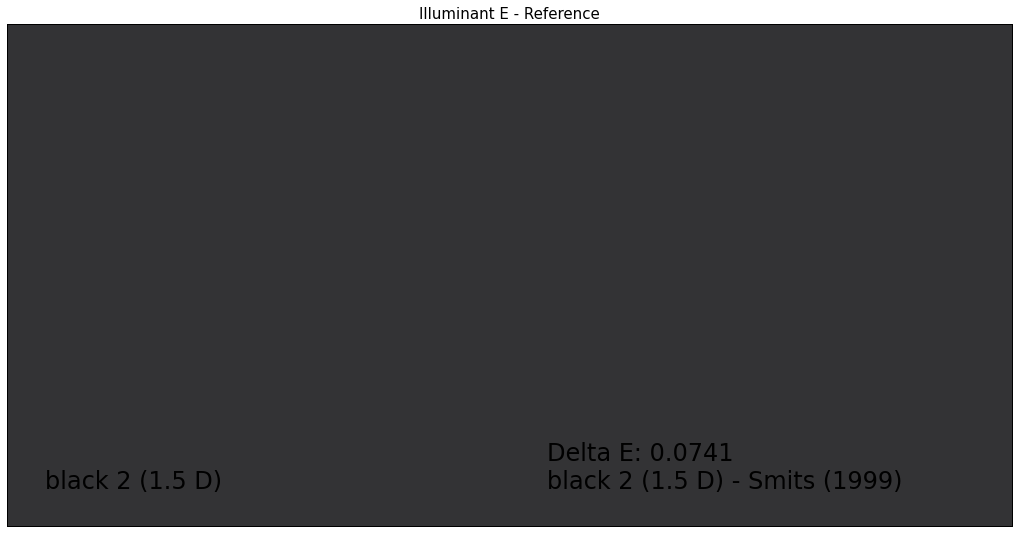

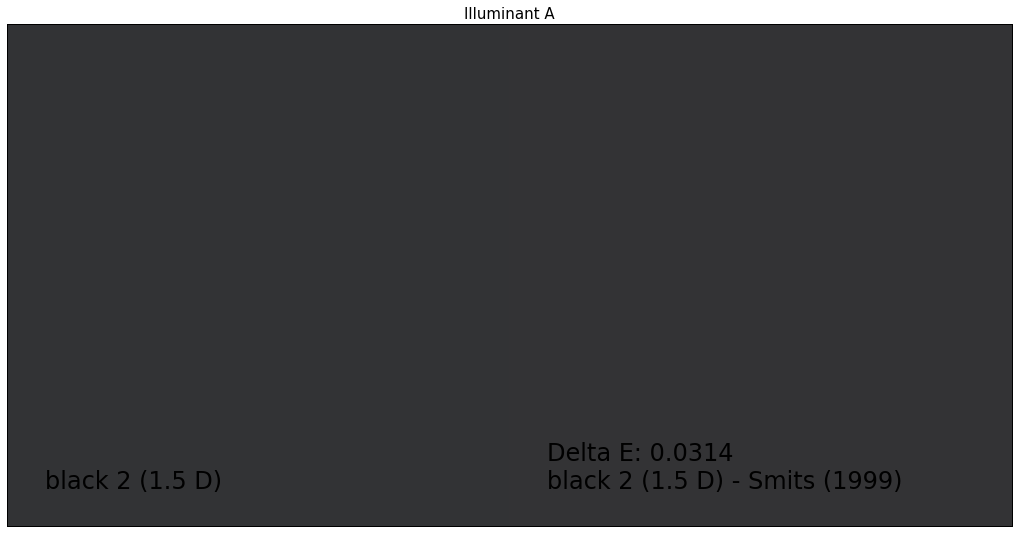

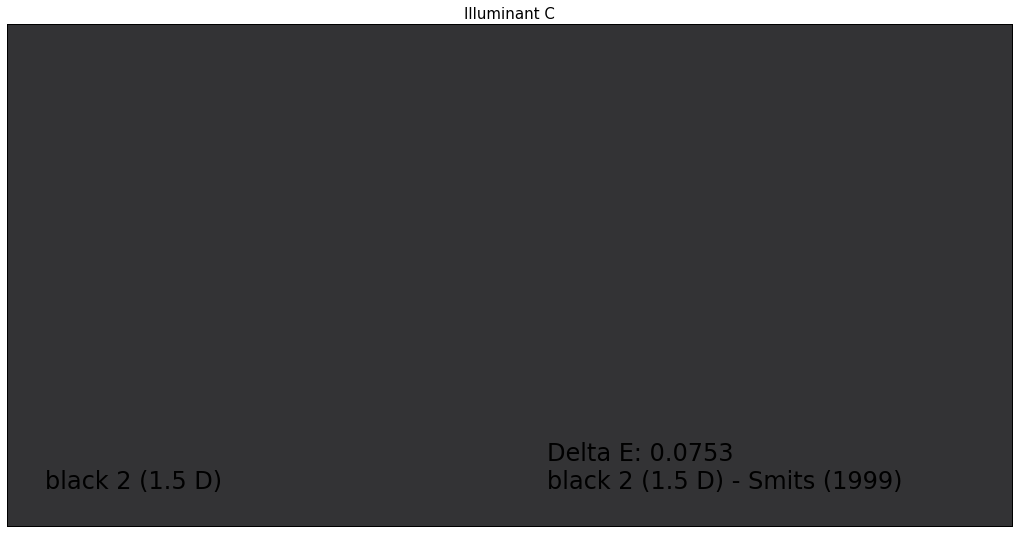

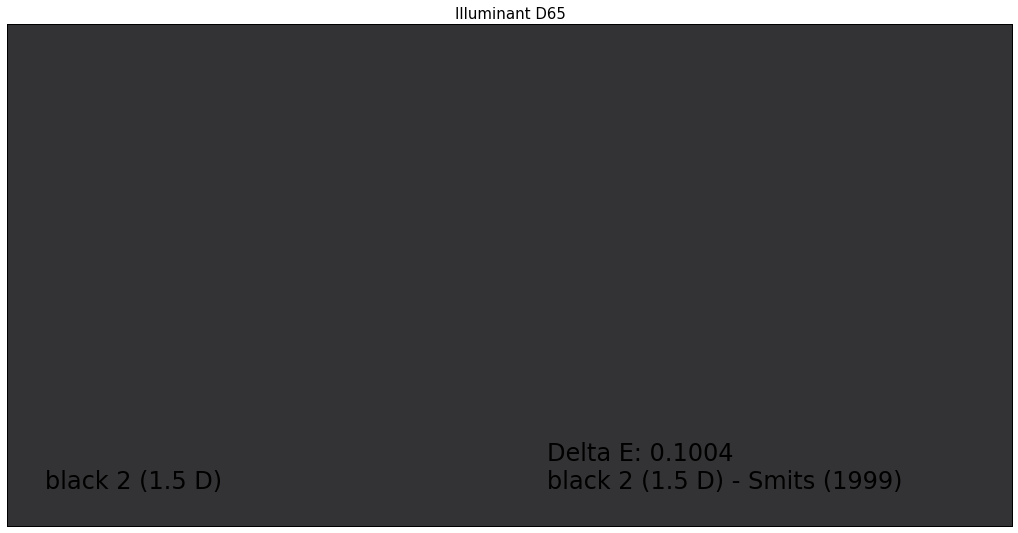

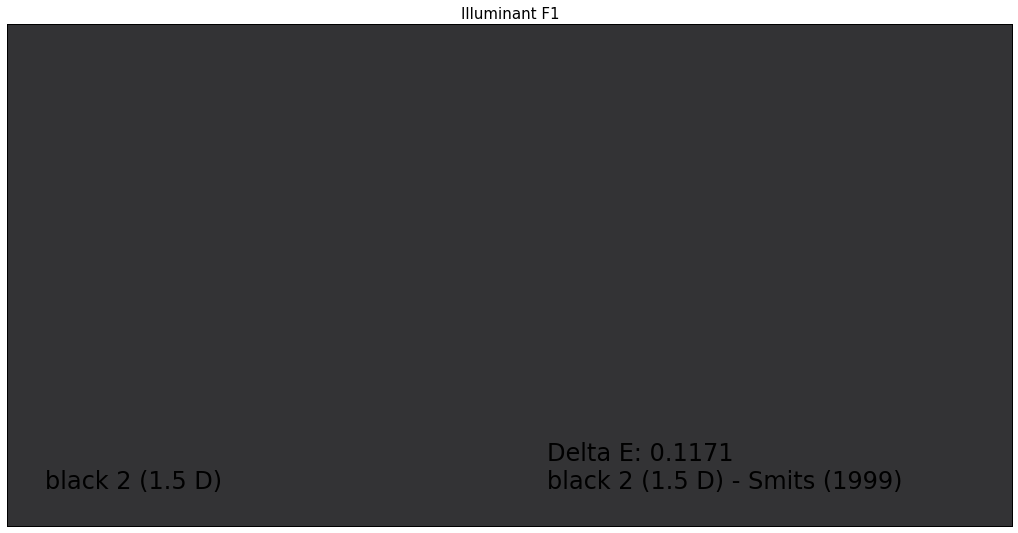

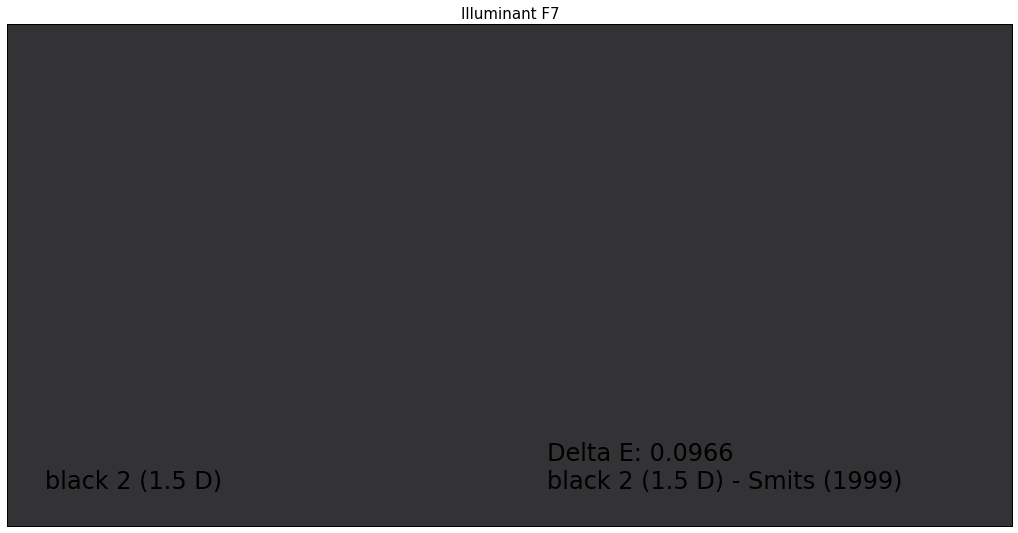

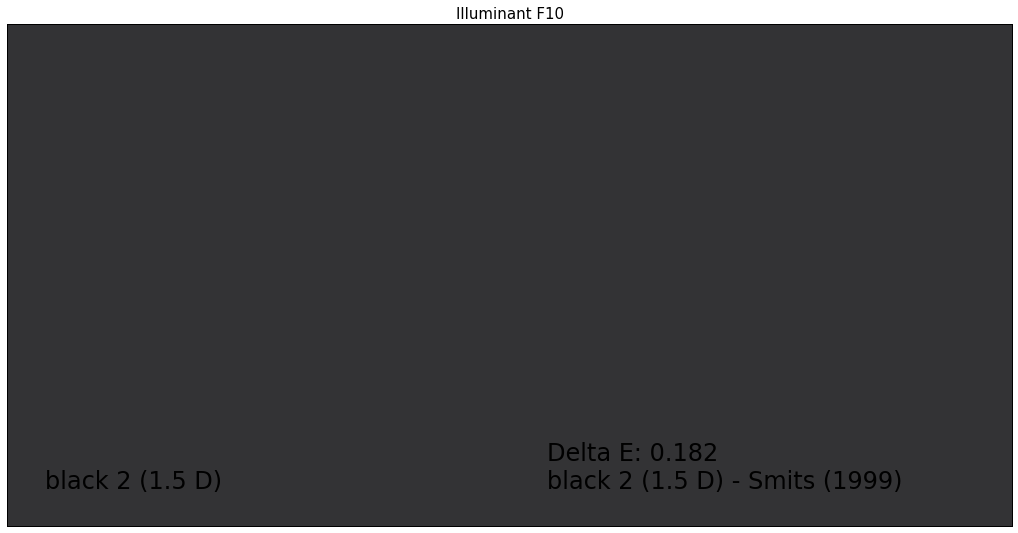

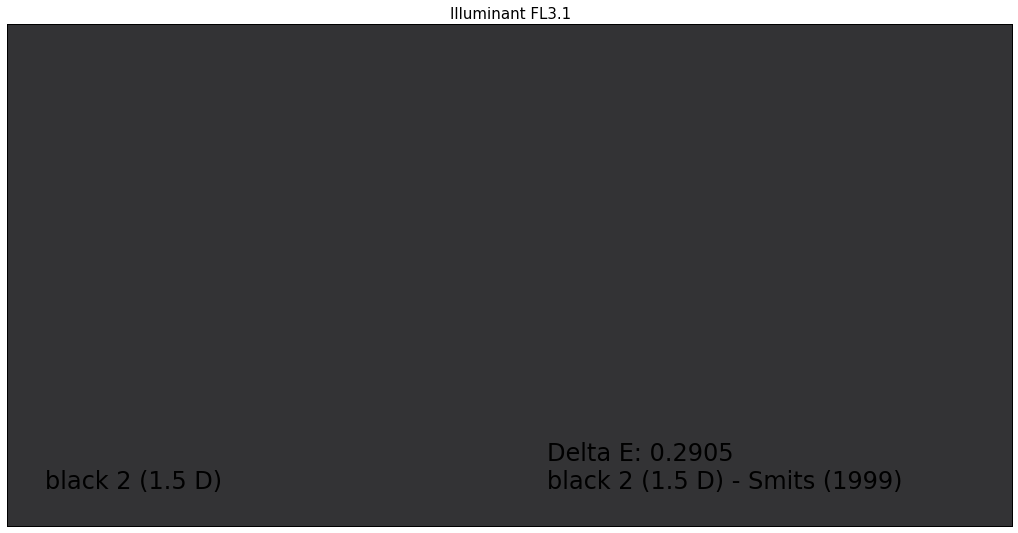

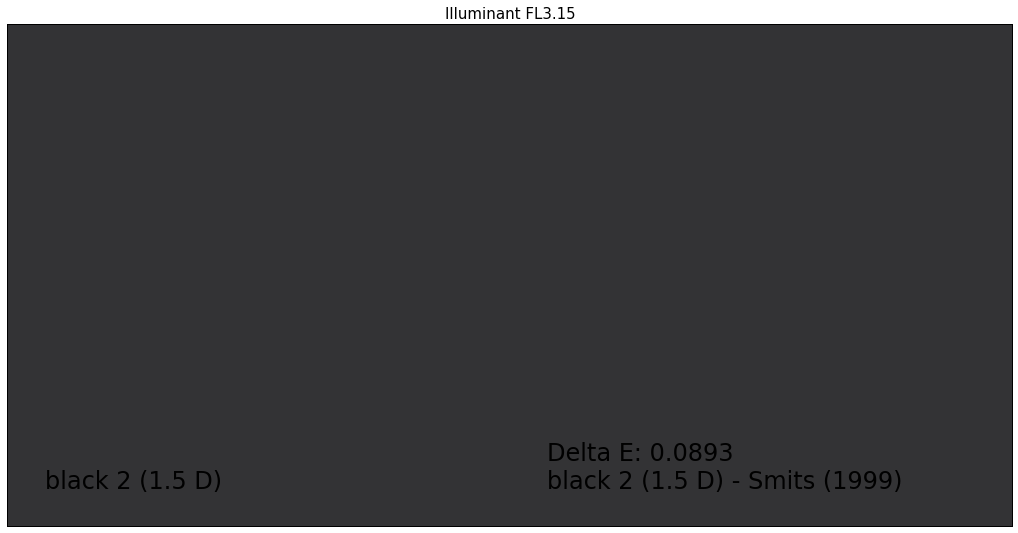

In [2]:
import numpy as np
from itertools import chain

import colour
from colour.plotting import *
from colour.recovery.smits1999 import (
    SMITS1999_WHITEPOINT,
    XYZ_to_RGB_Smits1999)
from colour.utilities.verbose import message_box

TEST_ILLUMINANTS = ('A', 'C', 'D65', 'F1', 'F7', 'F10', 'FL3.1', 'FL3.15')

CAT = 'Bradford'


def batch(iterable, k=3):
    for i in range(0, len(iterable), k):
        yield iterable[i:i + k]


def clamp(RGB):
    return np.clip(RGB, 0, 1)


def reflectance_recovery_plot(samples):
    message_box('"{0}" - Reflectance Recovery'.format(', '.join(samples)))

    spds = []
    colour_parameters_data = []
    for sample in samples:
        spd_r = colour.COLOURCHECKERS_SPDS['ColorChecker N Ohta'][sample]
        XYZ_r = colour.spectral_to_XYZ(
            spd_r,
            illuminant=colour.ILLUMINANTS_RELATIVE_SPDS['E']) / 100
        sRGB_r = XYZ_to_RGB_Smits1999(XYZ_r)
        Lab_r = colour.XYZ_to_Lab(XYZ_r, SMITS1999_WHITEPOINT)

        spd_m = colour.RGB_to_spectral_Smits1999(sRGB_r).align(spd_r.shape)
        XYZ_m = colour.spectral_to_XYZ(
            spd_m,
            illuminant=colour.ILLUMINANTS_RELATIVE_SPDS['E']) / 100
        sRGB_m = colour.XYZ_to_sRGB(XYZ_m,
                                    SMITS1999_WHITEPOINT,
                                    CAT)
        Lab_m = colour.XYZ_to_Lab(XYZ_m, SMITS1999_WHITEPOINT)

        delta_E = colour.delta_E_CIE2000(Lab_r, Lab_m)

        spd_m.name = '{0} - Smits (1999)'.format(sample)
        spds.append((spd_r, spd_m))

        colour_parameters_data.append(
            ('E - Reference',
             spd_r.name,
             [colour.sRGB_COLOURSPACE.transfer_function(c) for c in sRGB_r],
             spd_m.name,
             sRGB_m,
             delta_E))

        for illuminant in TEST_ILLUMINANTS:
            xy = colour.ILLUMINANTS['cie_2_1931'][illuminant]
            XYZ_r = colour.spectral_to_XYZ(
                spd_r,
                illuminant=colour.ILLUMINANTS_RELATIVE_SPDS[illuminant]) / 100
            sRGB_r = colour.XYZ_to_sRGB(XYZ_r, xy, CAT)
            Lab_r = colour.XYZ_to_Lab(XYZ_r, xy)

            XYZ_m = colour.spectral_to_XYZ(
                spd_m,
                illuminant=colour.ILLUMINANTS_RELATIVE_SPDS[illuminant]) / 100
            sRGB_m = colour.XYZ_to_sRGB(XYZ_m, xy, CAT)
            Lab_m = colour.XYZ_to_Lab(XYZ_m, xy)

            delta_E = colour.delta_E_CIE2000(Lab_r, Lab_m)

            colour_parameters_data.append(
                (illuminant, spd_r.name, sRGB_r, spd_m.name, sRGB_m, delta_E))

    multi_spd_plot(chain.from_iterable(spds), legend_location='upper right')
    for data in colour_parameters_data:
        illuminant, name_r, sRGB_r, name_m, sRGB_m, delta_E = data
        multi_colour_plot(
            [colour_parameter(name_r,
                              clamp(sRGB_r)),
             colour_parameter(
                 "Delta E: {0}\n{1}".format(np.around(delta_E, 4), name_m),
                 clamp(sRGB_m))],
            title='Illuminant {0}'.format(illuminant),
            text_size=24)


samples = [sample for _, sample in
           sorted(colour.COLOURCHECKER_INDEXES_TO_NAMES_MAPPING.items())]
for samples_batch in batch(samples, 1):
    reflectance_recovery_plot(samples_batch)